In [18]:
import sys

sys.path.append("../")

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from rumboost.rumboost import rum_train
from rumboost.datasets import load_preprocess_LPMC
from rumboost.utility_plotting import plot_parameters 
from rumboost.metrics import cross_entropy

import lightgbm

# Example: Shared Ensembles 

This notebook shows features implemented in RUMBoost through an example on the LPMC dataset, a mode choice dataset in London developed Hillel et al. (2018). You can find the original source of data [here](https://www.icevirtuallibrary.com/doi/suppl/10.1680/jsmic.17.00018) and the original paper [here](https://www.icevirtuallibrary.com/doi/full/10.1680/jsmic.17.00018).

We first load the preprocessed dataset and its folds for cross-validation. You can find the data in the Data folder.

In [21]:
#load dataset
LPMC_train, LPMC_test, folds = load_preprocess_LPMC(path="../Data/")

## Shared ensembles model

For small datasets or dataset with high dimensionality, it can be helpful to share the ensembles across alternatives. We mean by share the ensembles is that, for J shared ensembles, we fit only one tree for all the data across the J alternatives, instead of J trees (one per alternative). This can be done for features of the same unit that would be in differerent alternaive utility specifications. It reduces the complexity of the model and provides a higher number of data points to fit the regression trees, but it is at the cost of some flexibility (i.e. predictive power).

In RUMBoost, this is done through the `rum_structure` dictionary, where a specific shared ensembles can be defined. You need to make sure that the key `shared` is set to `True`. We provide an example below where the features related to travel time are sharing an ensemble of regression trees.

In [25]:
# parameters
general_params = {
    "n_jobs": -1,
    "num_classes": 4,  # important
    "verbosity": 1,  # specific RUMBoost parameter
    "num_iterations": 3000,
    "early_stopping_round": 100,
    "max_booster_to_update": 5,
}

In [26]:
rum_structure = [
    {
        "utility": [0],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
            ],
        },
        "shared": False,
    },
    {
        "utility": [1],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
            ],
        },
        "shared": False,
    },
    {
        "utility": [2],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "dur_pt_access",
            "dur_pt_bus",
            "dur_pt_int_waiting",
            "dur_pt_int_walking",
            "pt_n_interchanges",
            "cost_transit",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
            ],
        },
        "shared": False,
    },
    {
        "utility": [3],
        "variables": [
            "age",
            "female",
            "day_of_week",
            "start_time_linear",
            "car_ownership",
            "driving_license",
            "purpose_B",
            "purpose_HBE",
            "purpose_HBO",
            "purpose_HBW",
            "purpose_NHBO",
            "fueltype_Average",
            "fueltype_Diesel",
            "fueltype_Hybrid",
            "fueltype_Petrol",
            "distance",
            "cost_driving_fuel",
            "congestion_charge",
            "driving_traffic_percent",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                -1,
                -1,
                -1,
                -1,
            ],
            "interaction_constraints": [
                [0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
            ],
        },
        "shared": False,
    },
    {
        "utility": [0, 1, 2, 3],
        "variables": [
            "dur_walking",
            "dur_cycling",
            "dur_pt_rail",
            "dur_driving",
        ],
        "boosting_params": {
            "monotone_constraints_method": "advanced",
            "max_depth": 1,
            "n_jobs": -1,
            "learning_rate": 0.1,
            "monotone_constraints": [-1], # only one ensemble so only one constraint
        },
        "shared": True,
    }
]

In [27]:
model_specification = {
    "general_params": general_params,
    "rum_structure": rum_structure,
}

### Training with 5-fold CV

In [28]:
#features and label column names
features = [f for f in LPMC_train.columns if f != "choice"]
label = "choice"

#create lightgbm dataset
lgb_train_set = lightgbm.Dataset(LPMC_train[features], label=LPMC_train[label], free_raw_data=False)
lgb_test_set = lightgbm.Dataset(LPMC_test[features], label=LPMC_test[label], free_raw_data=False)

ce_loss = 0
num_trees = 0

for i, (train_idx, test_idx) in enumerate(folds):
    train_set = lgb_train_set.subset(sorted(train_idx))
    test_set = lgb_train_set.subset(sorted(test_idx))

    print('-'*50 + '\n')
    print(f'Iteration {i+1}')
    LPMC_model_trained = rum_train(train_set, model_specification, valid_sets = [test_set])
    ce_loss += LPMC_model_trained.best_score
    num_trees += LPMC_model_trained.best_iteration
    print('-'*50 + '\n')
    print(f'Best cross entropy loss: {LPMC_model_trained.best_score}')
    print(f'Best number of trees: {LPMC_model_trained.best_iteration}')

ce_loss = ce_loss/5
num_trees = num_trees/5
print('-'*50 + '\n')
print(f'Cross validation negative cross entropy loss: {ce_loss}')
print(f'With a number of trees on average of {num_trees}')

--------------------------------------------------

Iteration 1
[LightGBM] [Warning] Unknown parameter: max_booster_to_update
[LightGBM] [Warning] Unknown parameter: max_booster_to_update
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 16
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 16
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You 

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[11]-----NCE value on train set : 0.8867
---------NCE value on test set 1: 0.8889
[21]-----NCE value on train set : 0.7878
---------NCE value on test set 1: 0.7911
[31]-----NCE value on train set : 0.7488
---------NCE value on test set 1: 0.7527
[41]-----NCE value on train set : 0.7287
---------NCE value on test set 1: 0.7331
[51]-----NCE value on train set : 0.7158
---------NCE value on test set 1: 0.7198
[61]-----NCE value on train set : 0.7066
---------NCE value on test set 1: 0.7103
[71]-----NCE value on train set : 0.6995
---------NCE value on test set 1: 0.7031
[81]-----NCE value on train set : 0.6939
---------NCE value on test set 1: 0.6978
[91]-----NCE value on train set : 0.6894
---------NCE value on test set 1: 0.6936
[101]----NCE value on train set : 0.6855
---------NCE value on test set 1: 0.6899
[111]----NCE value on train set : 0.6822
---------NCE value on test set 1: 0.6869
[121]----NCE value on train set : 0.6794
---------NCE value on test set 1: 0.6844
[131]----NCE val

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[11]-----NCE value on train set : 0.8881
---------NCE value on test set 1: 0.8856
[21]-----NCE value on train set : 0.7891
---------NCE value on test set 1: 0.7869
[31]-----NCE value on train set : 0.7503
---------NCE value on test set 1: 0.7473
[41]-----NCE value on train set : 0.7304
---------NCE value on test set 1: 0.7265
[51]-----NCE value on train set : 0.7176
---------NCE value on test set 1: 0.7129
[61]-----NCE value on train set : 0.7084
---------NCE value on test set 1: 0.7033
[71]-----NCE value on train set : 0.7014
---------NCE value on test set 1: 0.6960
[81]-----NCE value on train set : 0.6959
---------NCE value on test set 1: 0.6906
[91]-----NCE value on train set : 0.6914
---------NCE value on test set 1: 0.6862
[101]----NCE value on train set : 0.6876
---------NCE value on test set 1: 0.6822
[111]----NCE value on train set : 0.6844
---------NCE value on test set 1: 0.6790
[121]----NCE value on train set : 0.6816
---------NCE value on test set 1: 0.6761
[131]----NCE val

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[11]-----NCE value on train set : 0.8876
---------NCE value on test set 1: 0.8848
[21]-----NCE value on train set : 0.7889
---------NCE value on test set 1: 0.7851
[31]-----NCE value on train set : 0.7500
---------NCE value on test set 1: 0.7458
[41]-----NCE value on train set : 0.7297
---------NCE value on test set 1: 0.7265
[51]-----NCE value on train set : 0.7165
---------NCE value on test set 1: 0.7146
[61]-----NCE value on train set : 0.7069
---------NCE value on test set 1: 0.7060
[71]-----NCE value on train set : 0.6996
---------NCE value on test set 1: 0.7000
[81]-----NCE value on train set : 0.6938
---------NCE value on test set 1: 0.6950
[91]-----NCE value on train set : 0.6891
---------NCE value on test set 1: 0.6911
[101]----NCE value on train set : 0.6852
---------NCE value on test set 1: 0.6881
[111]----NCE value on train set : 0.6819
---------NCE value on test set 1: 0.6853
[121]----NCE value on train set : 0.6790
---------NCE value on test set 1: 0.6830
[131]----NCE val

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[11]-----NCE value on train set : 0.8853
---------NCE value on test set 1: 0.8913
[21]-----NCE value on train set : 0.7858
---------NCE value on test set 1: 0.7948
[31]-----NCE value on train set : 0.7468
---------NCE value on test set 1: 0.7572
[41]-----NCE value on train set : 0.7267
---------NCE value on test set 1: 0.7377
[51]-----NCE value on train set : 0.7138
---------NCE value on test set 1: 0.7252
[61]-----NCE value on train set : 0.7046
---------NCE value on test set 1: 0.7162
[71]-----NCE value on train set : 0.6975
---------NCE value on test set 1: 0.7095
[81]-----NCE value on train set : 0.6919
---------NCE value on test set 1: 0.7043
[91]-----NCE value on train set : 0.6873
---------NCE value on test set 1: 0.7001
[101]----NCE value on train set : 0.6835
---------NCE value on test set 1: 0.6965
[111]----NCE value on train set : 0.6802
---------NCE value on test set 1: 0.6936
[121]----NCE value on train set : 0.6774
---------NCE value on test set 1: 0.6910
[131]----NCE val

/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[11]-----NCE value on train set : 0.8862
---------NCE value on test set 1: 0.8887
[21]-----NCE value on train set : 0.7869
---------NCE value on test set 1: 0.7909
[31]-----NCE value on train set : 0.7479
---------NCE value on test set 1: 0.7526
[41]-----NCE value on train set : 0.7275
---------NCE value on test set 1: 0.7339
[51]-----NCE value on train set : 0.7143
---------NCE value on test set 1: 0.7216
[61]-----NCE value on train set : 0.7048
---------NCE value on test set 1: 0.7133
[71]-----NCE value on train set : 0.6976
---------NCE value on test set 1: 0.7070
[81]-----NCE value on train set : 0.6918
---------NCE value on test set 1: 0.7021
[91]-----NCE value on train set : 0.6871
---------NCE value on test set 1: 0.6982
[101]----NCE value on train set : 0.6832
---------NCE value on test set 1: 0.6951
[111]----NCE value on train set : 0.6798
---------NCE value on test set 1: 0.6923
[121]----NCE value on train set : 0.6769
---------NCE value on test set 1: 0.6901
[131]----NCE val

### Testing the model on out-of-sample data

Now that we have the optimal number of trees (1270), we can train the final version of the model on the full dataset, and test it on out-of-sample data with the ```predict()``` function. Note that the dataset must be a lightgbm object in the ```predict()``` function.

In [29]:
general_params["num_iterations"] = int(num_trees)
general_params["early_stopping_round"] = None

LPMCshared_model_fully_trained = rum_train(lgb_train_set, model_specification)

preds = LPMCshared_model_fully_trained.predict(lgb_test_set)

ce_test = cross_entropy(preds, lgb_test_set.get_label().astype(int))

print('-'*50)
print(f'Final negative cross-entropy on the test set: {ce_test}')

[LightGBM] [Warning] Unknown parameter: max_booster_to_update


/home/nicolas-salvade/rumboost-dev/examples/../rumboost/rumboost.py:1815: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 54766, number of used features: 16
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 54766, number of used features: 16
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data poi

## Plotting parameter values

After training, we can plot the parameter values with the ```plot_parameters()``` function. See the last plot to see the shared utility function.


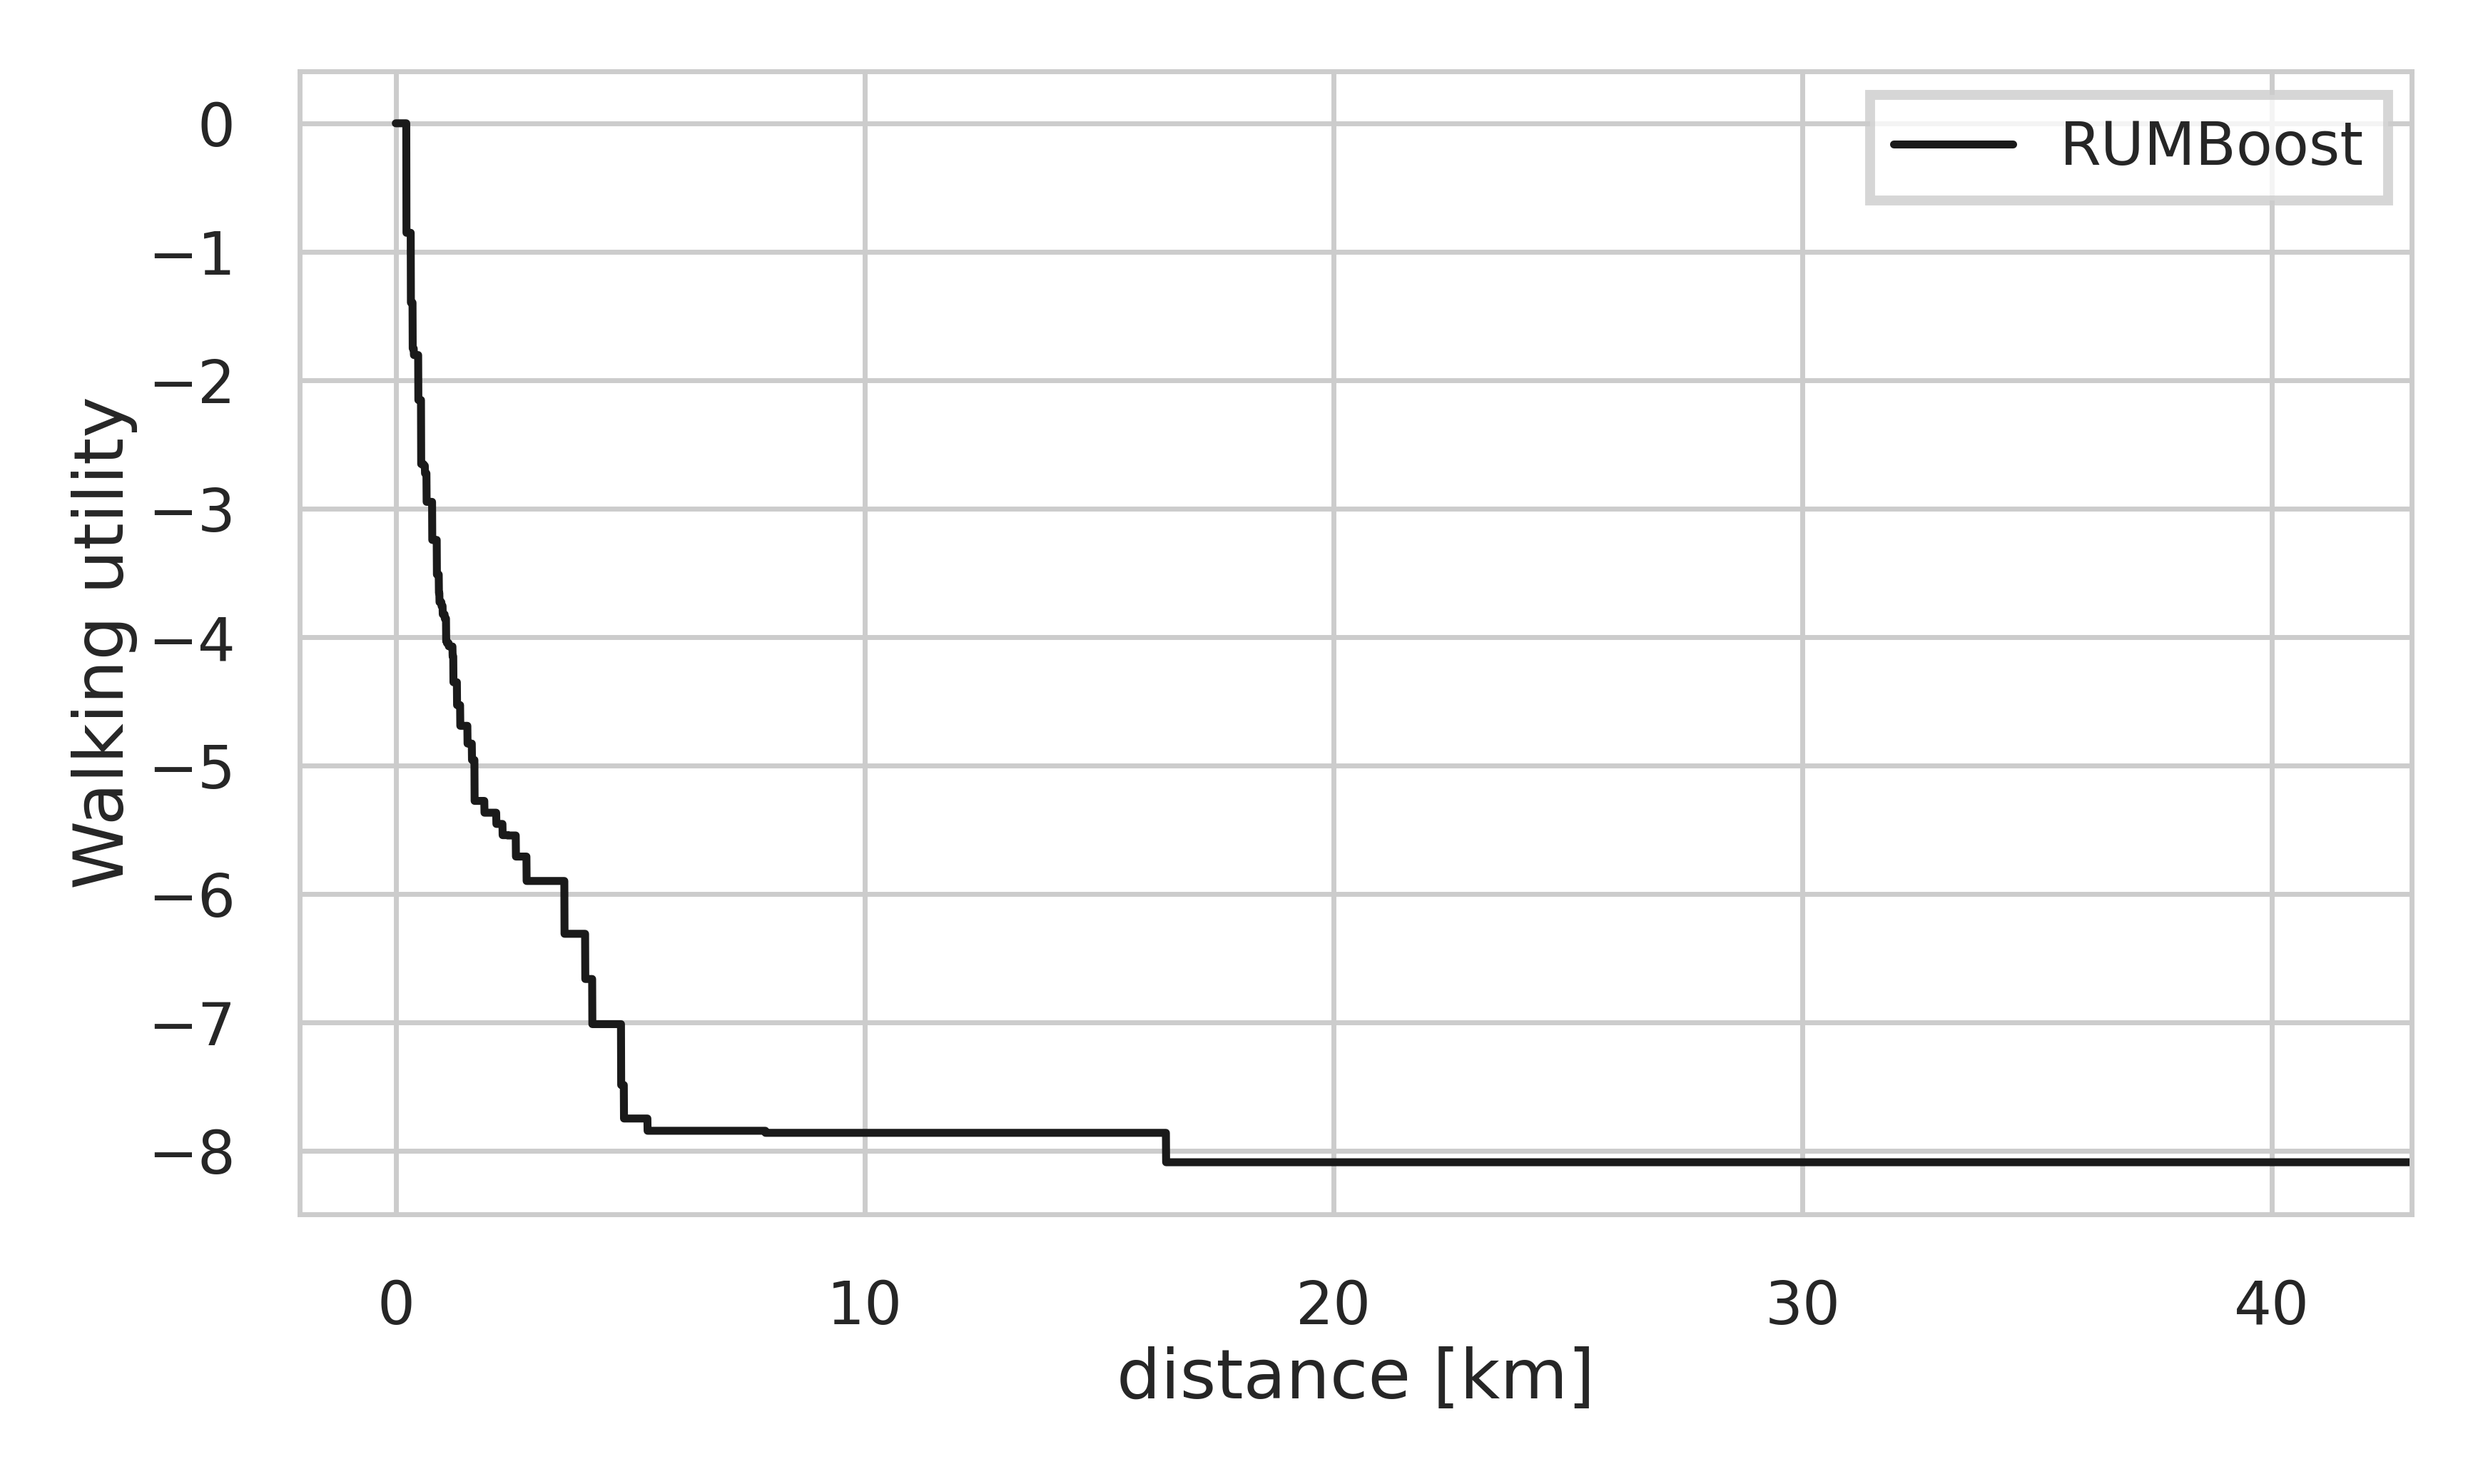

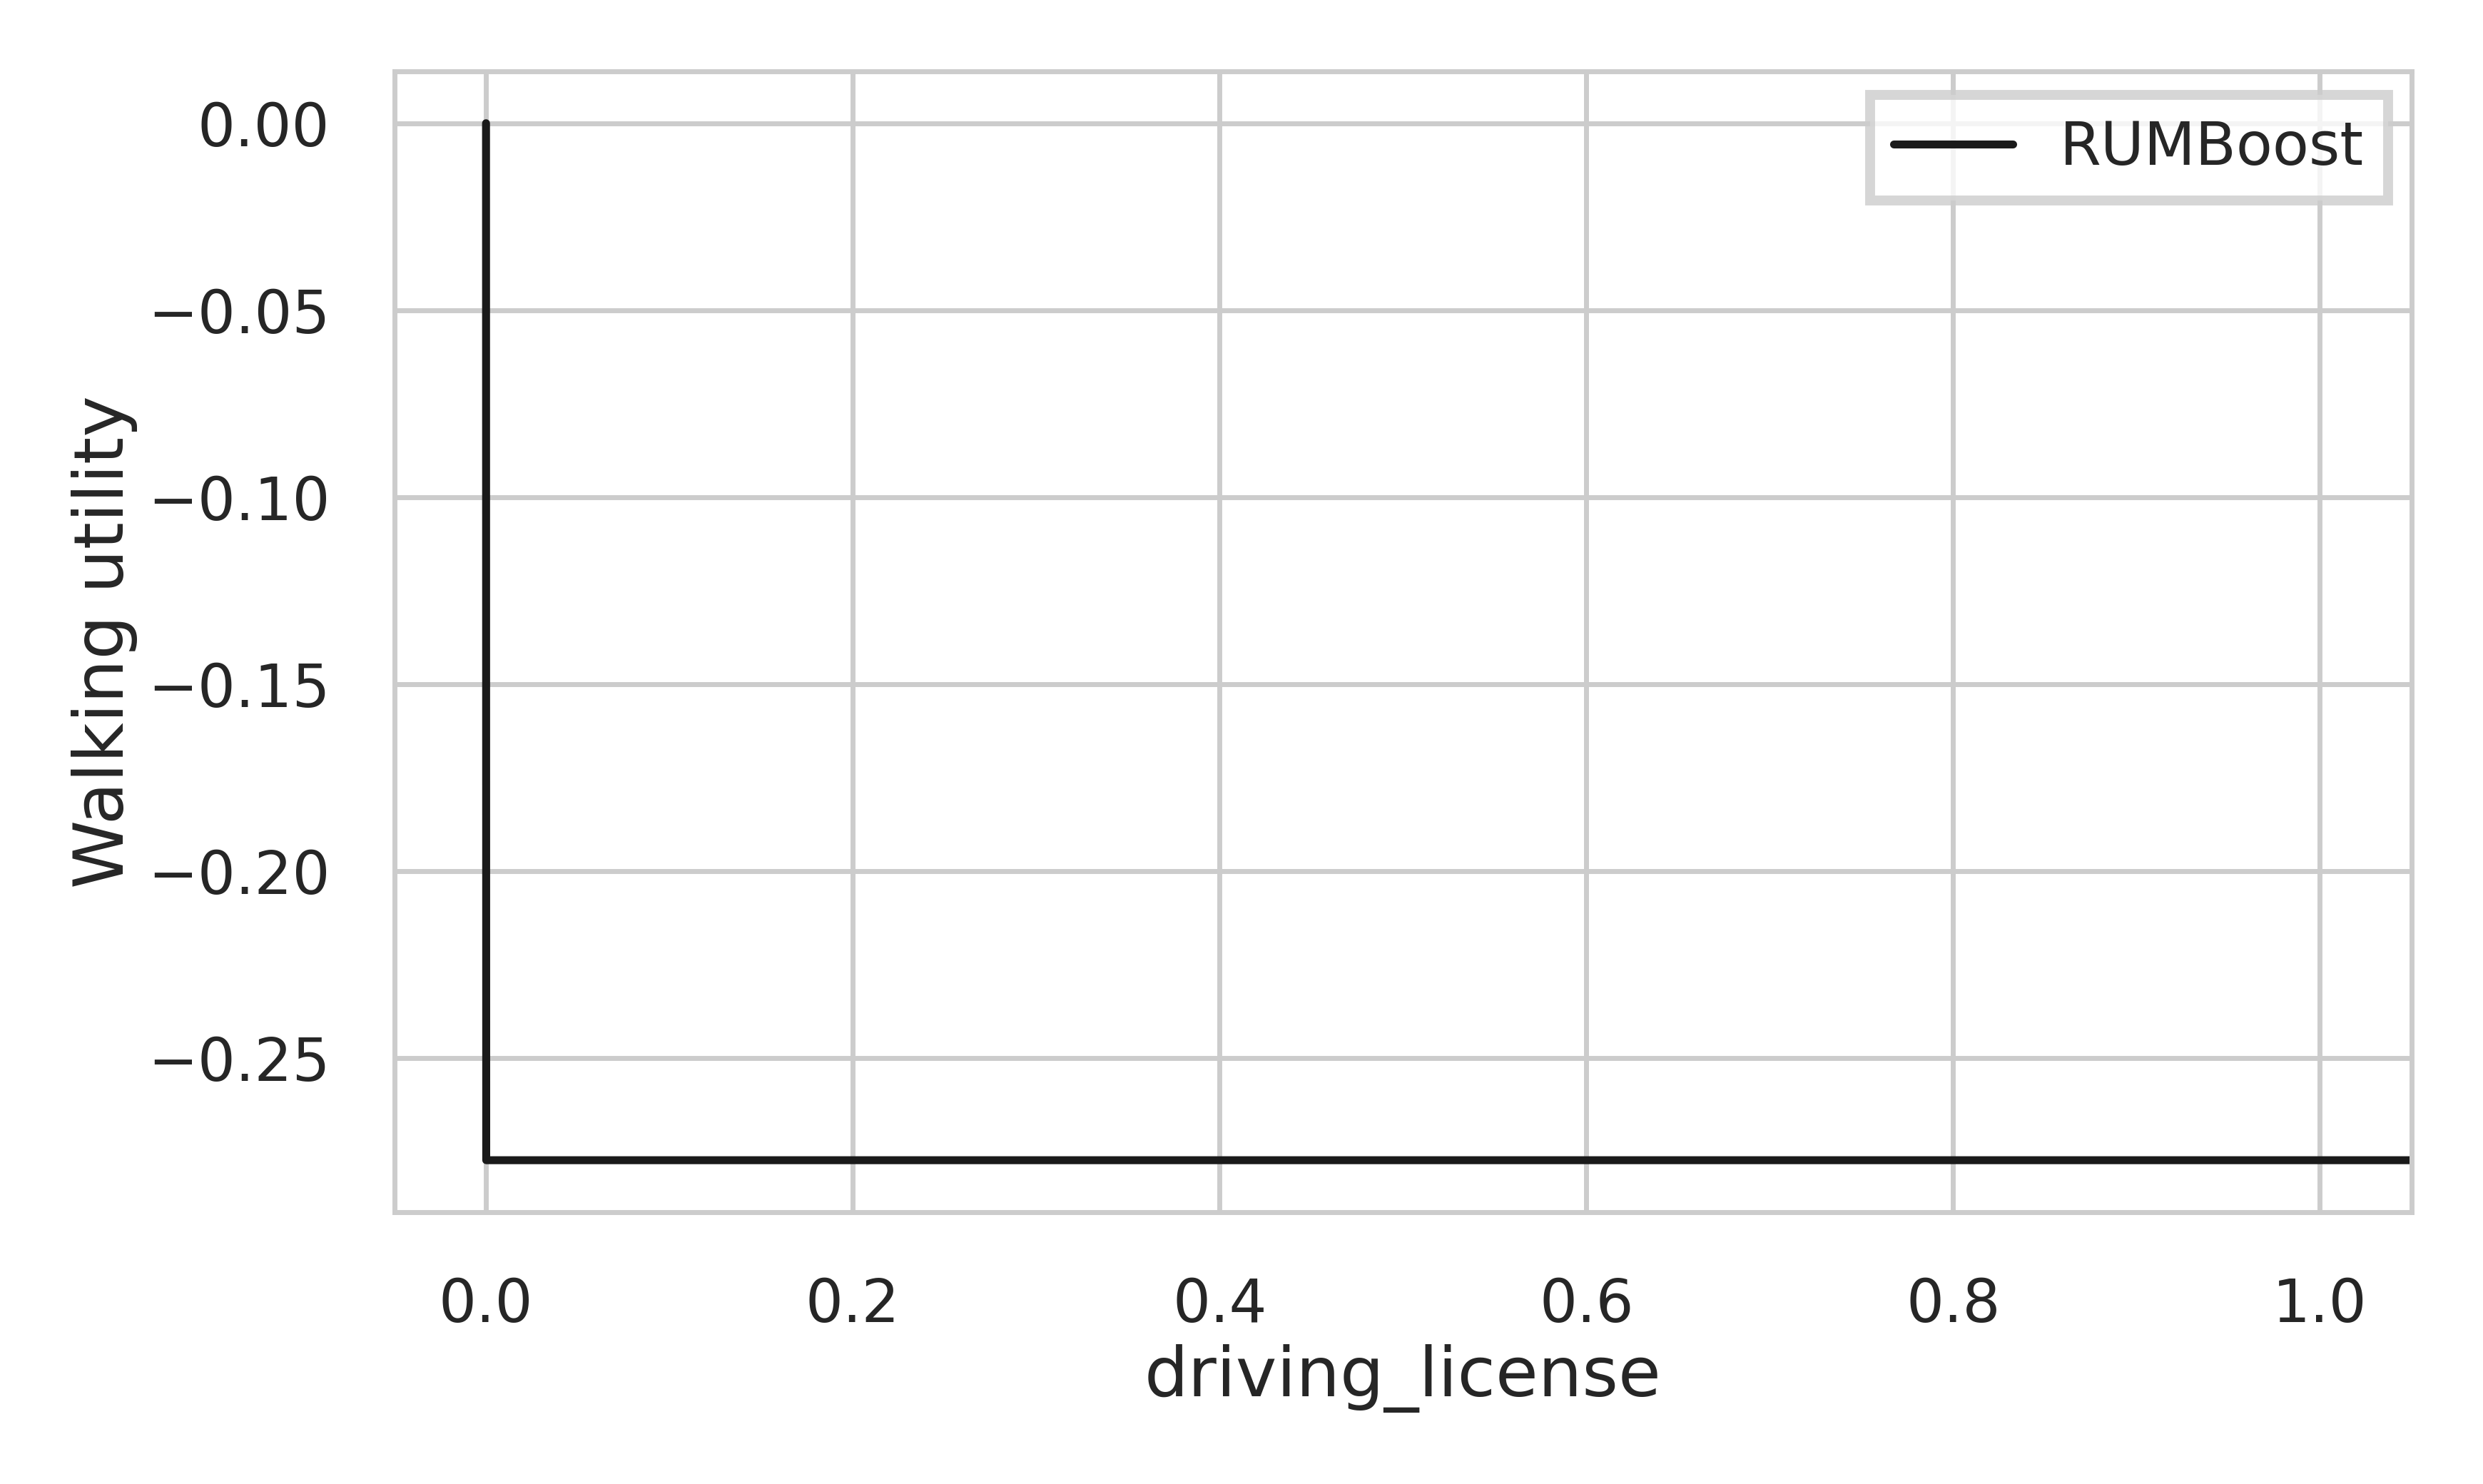

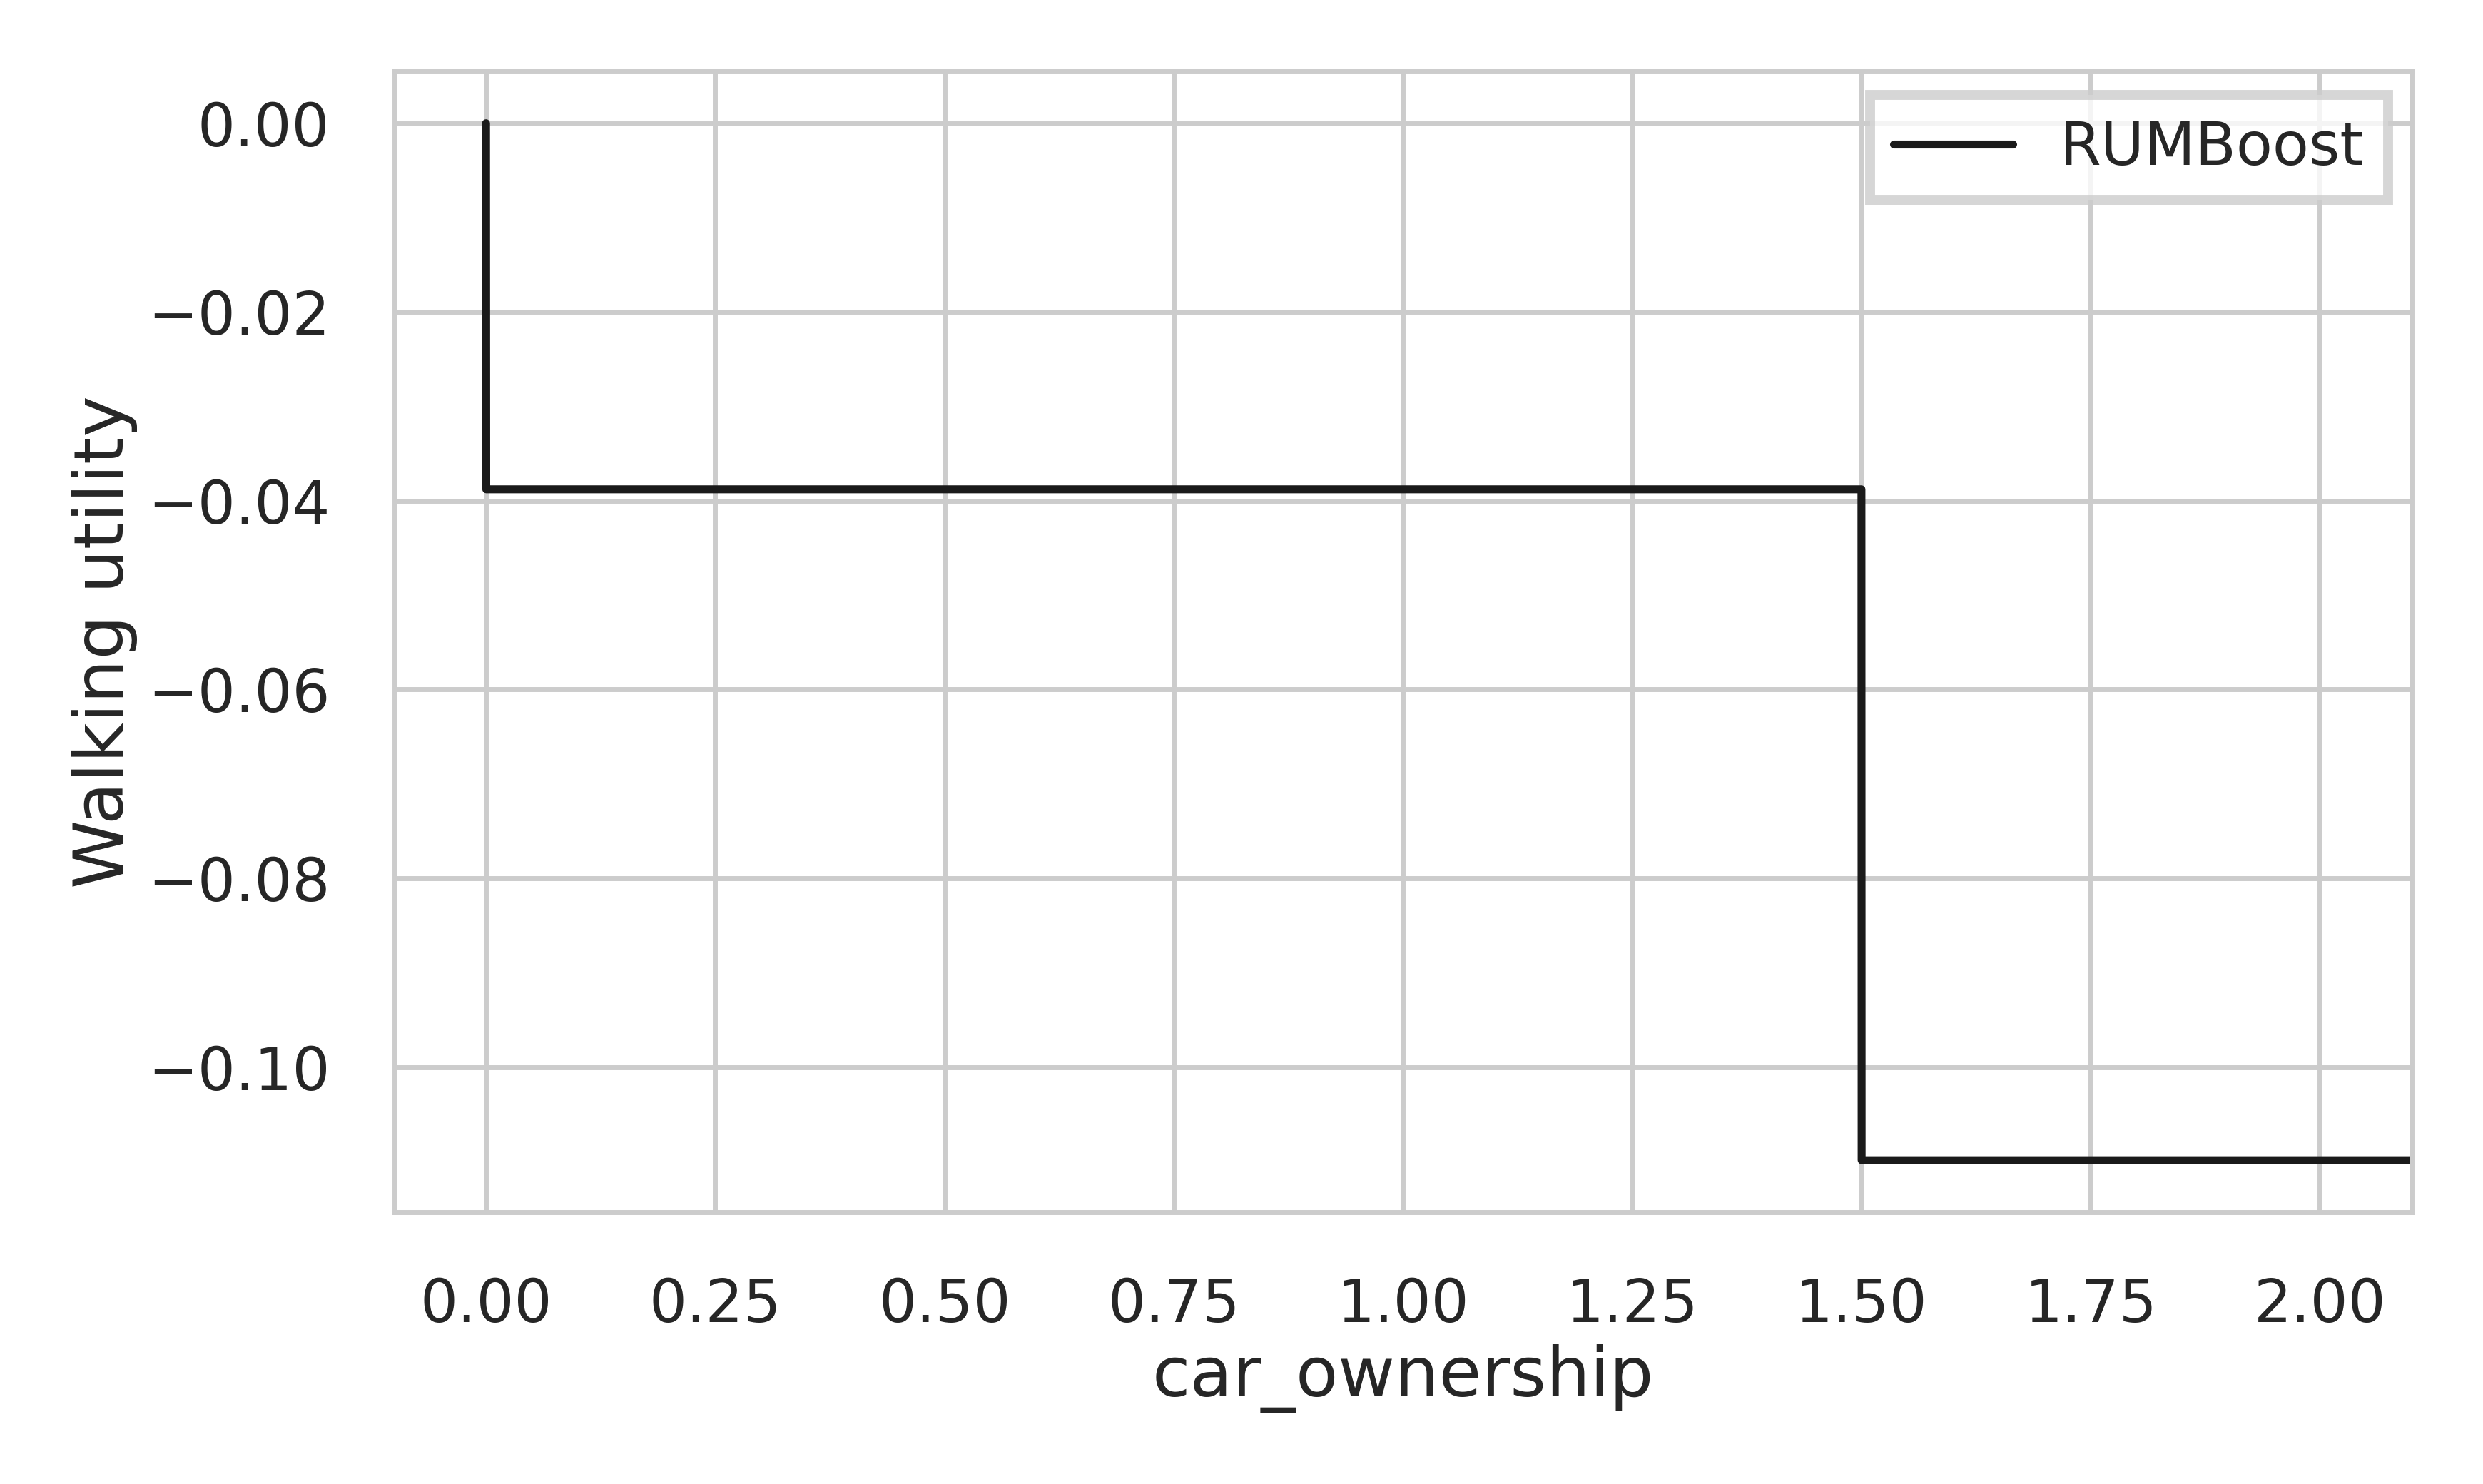

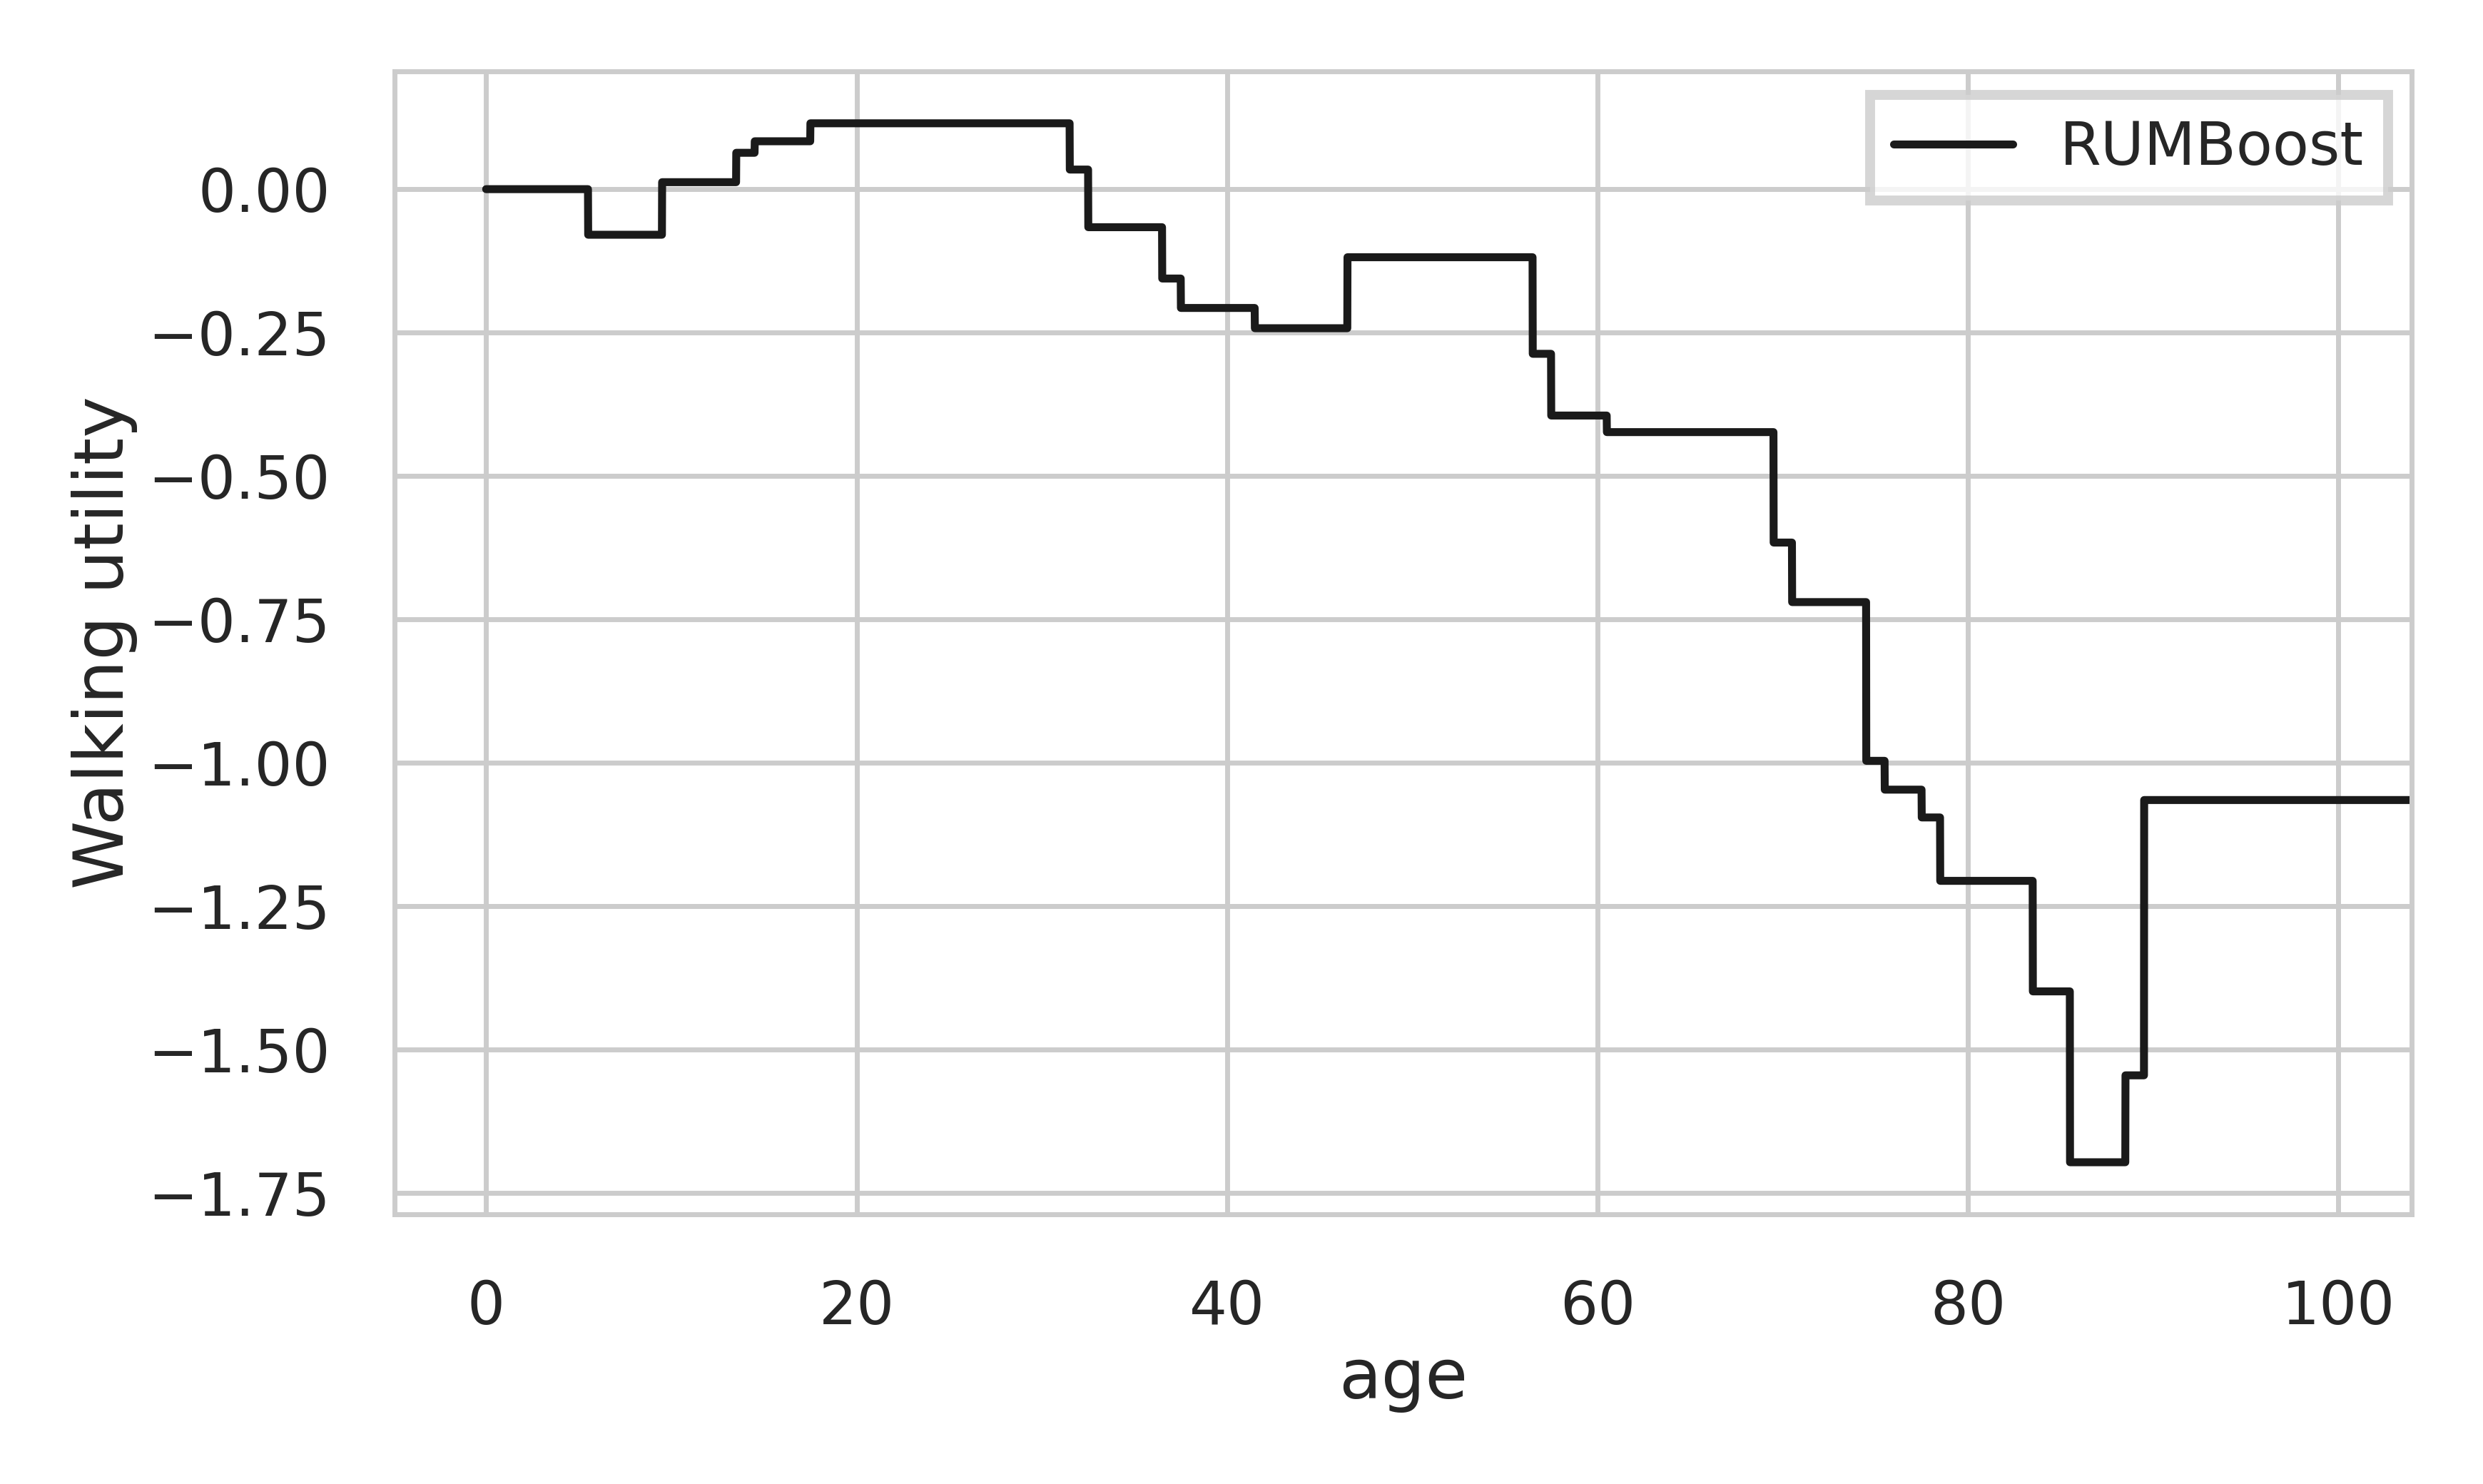

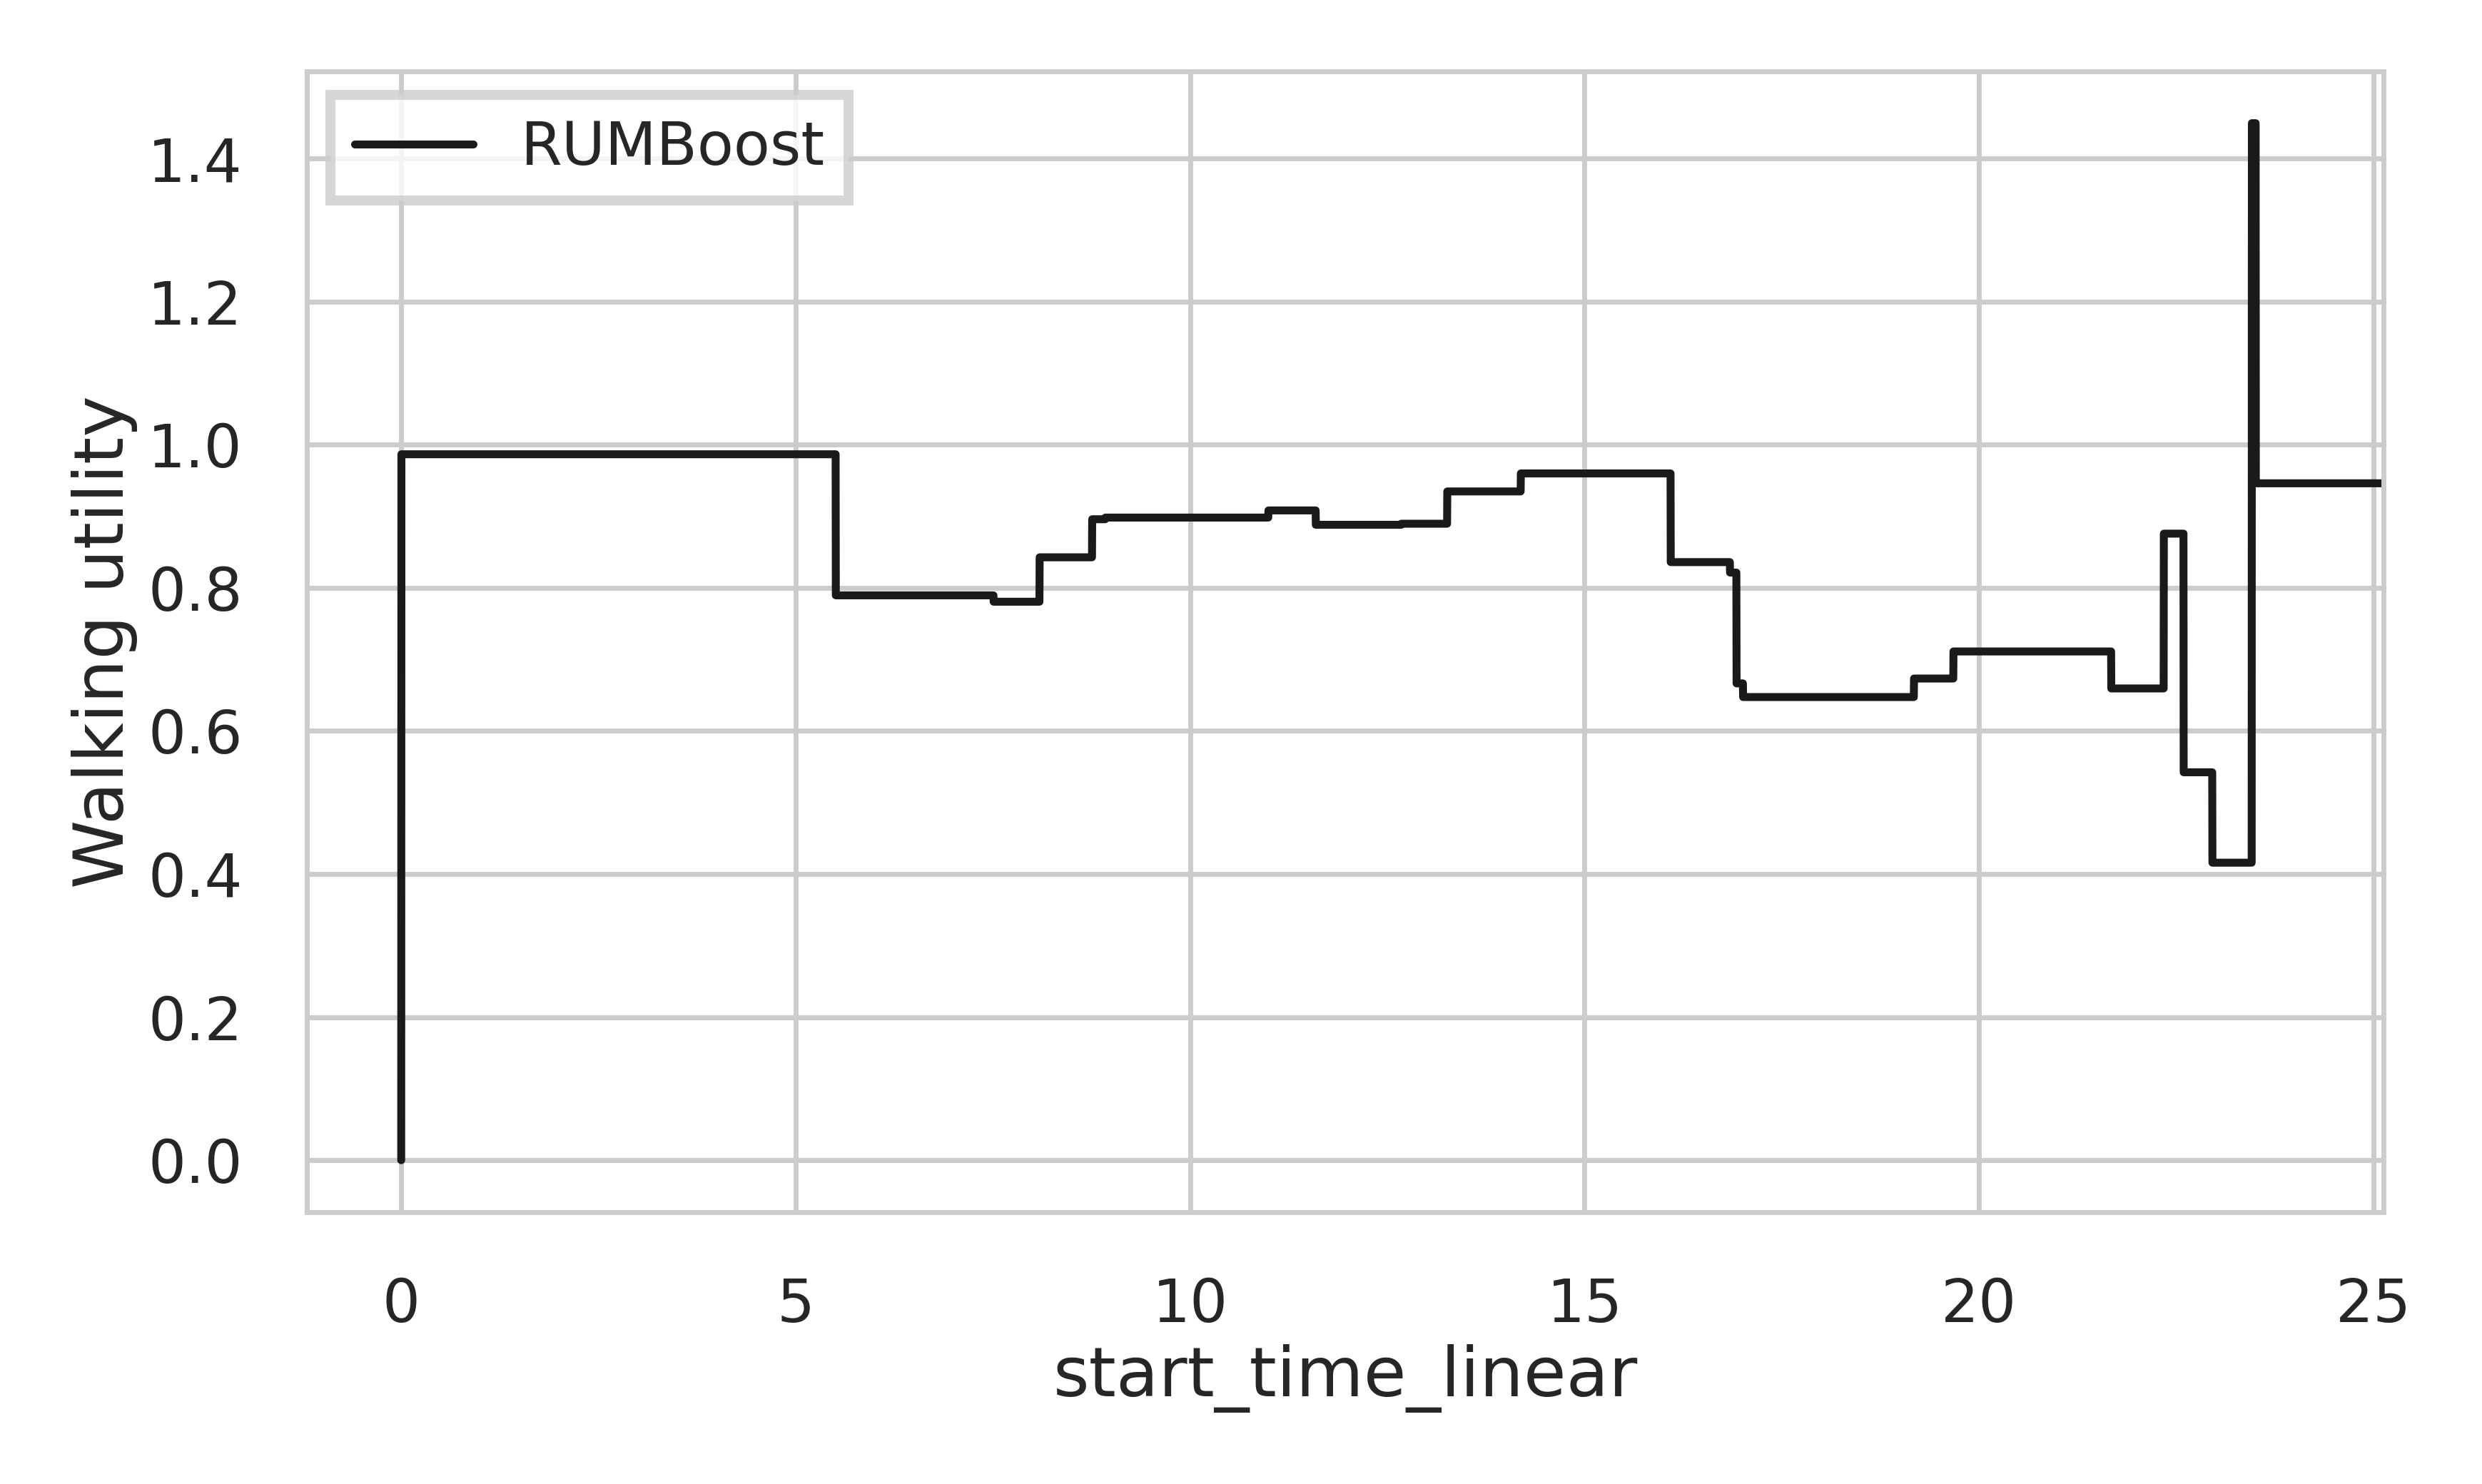

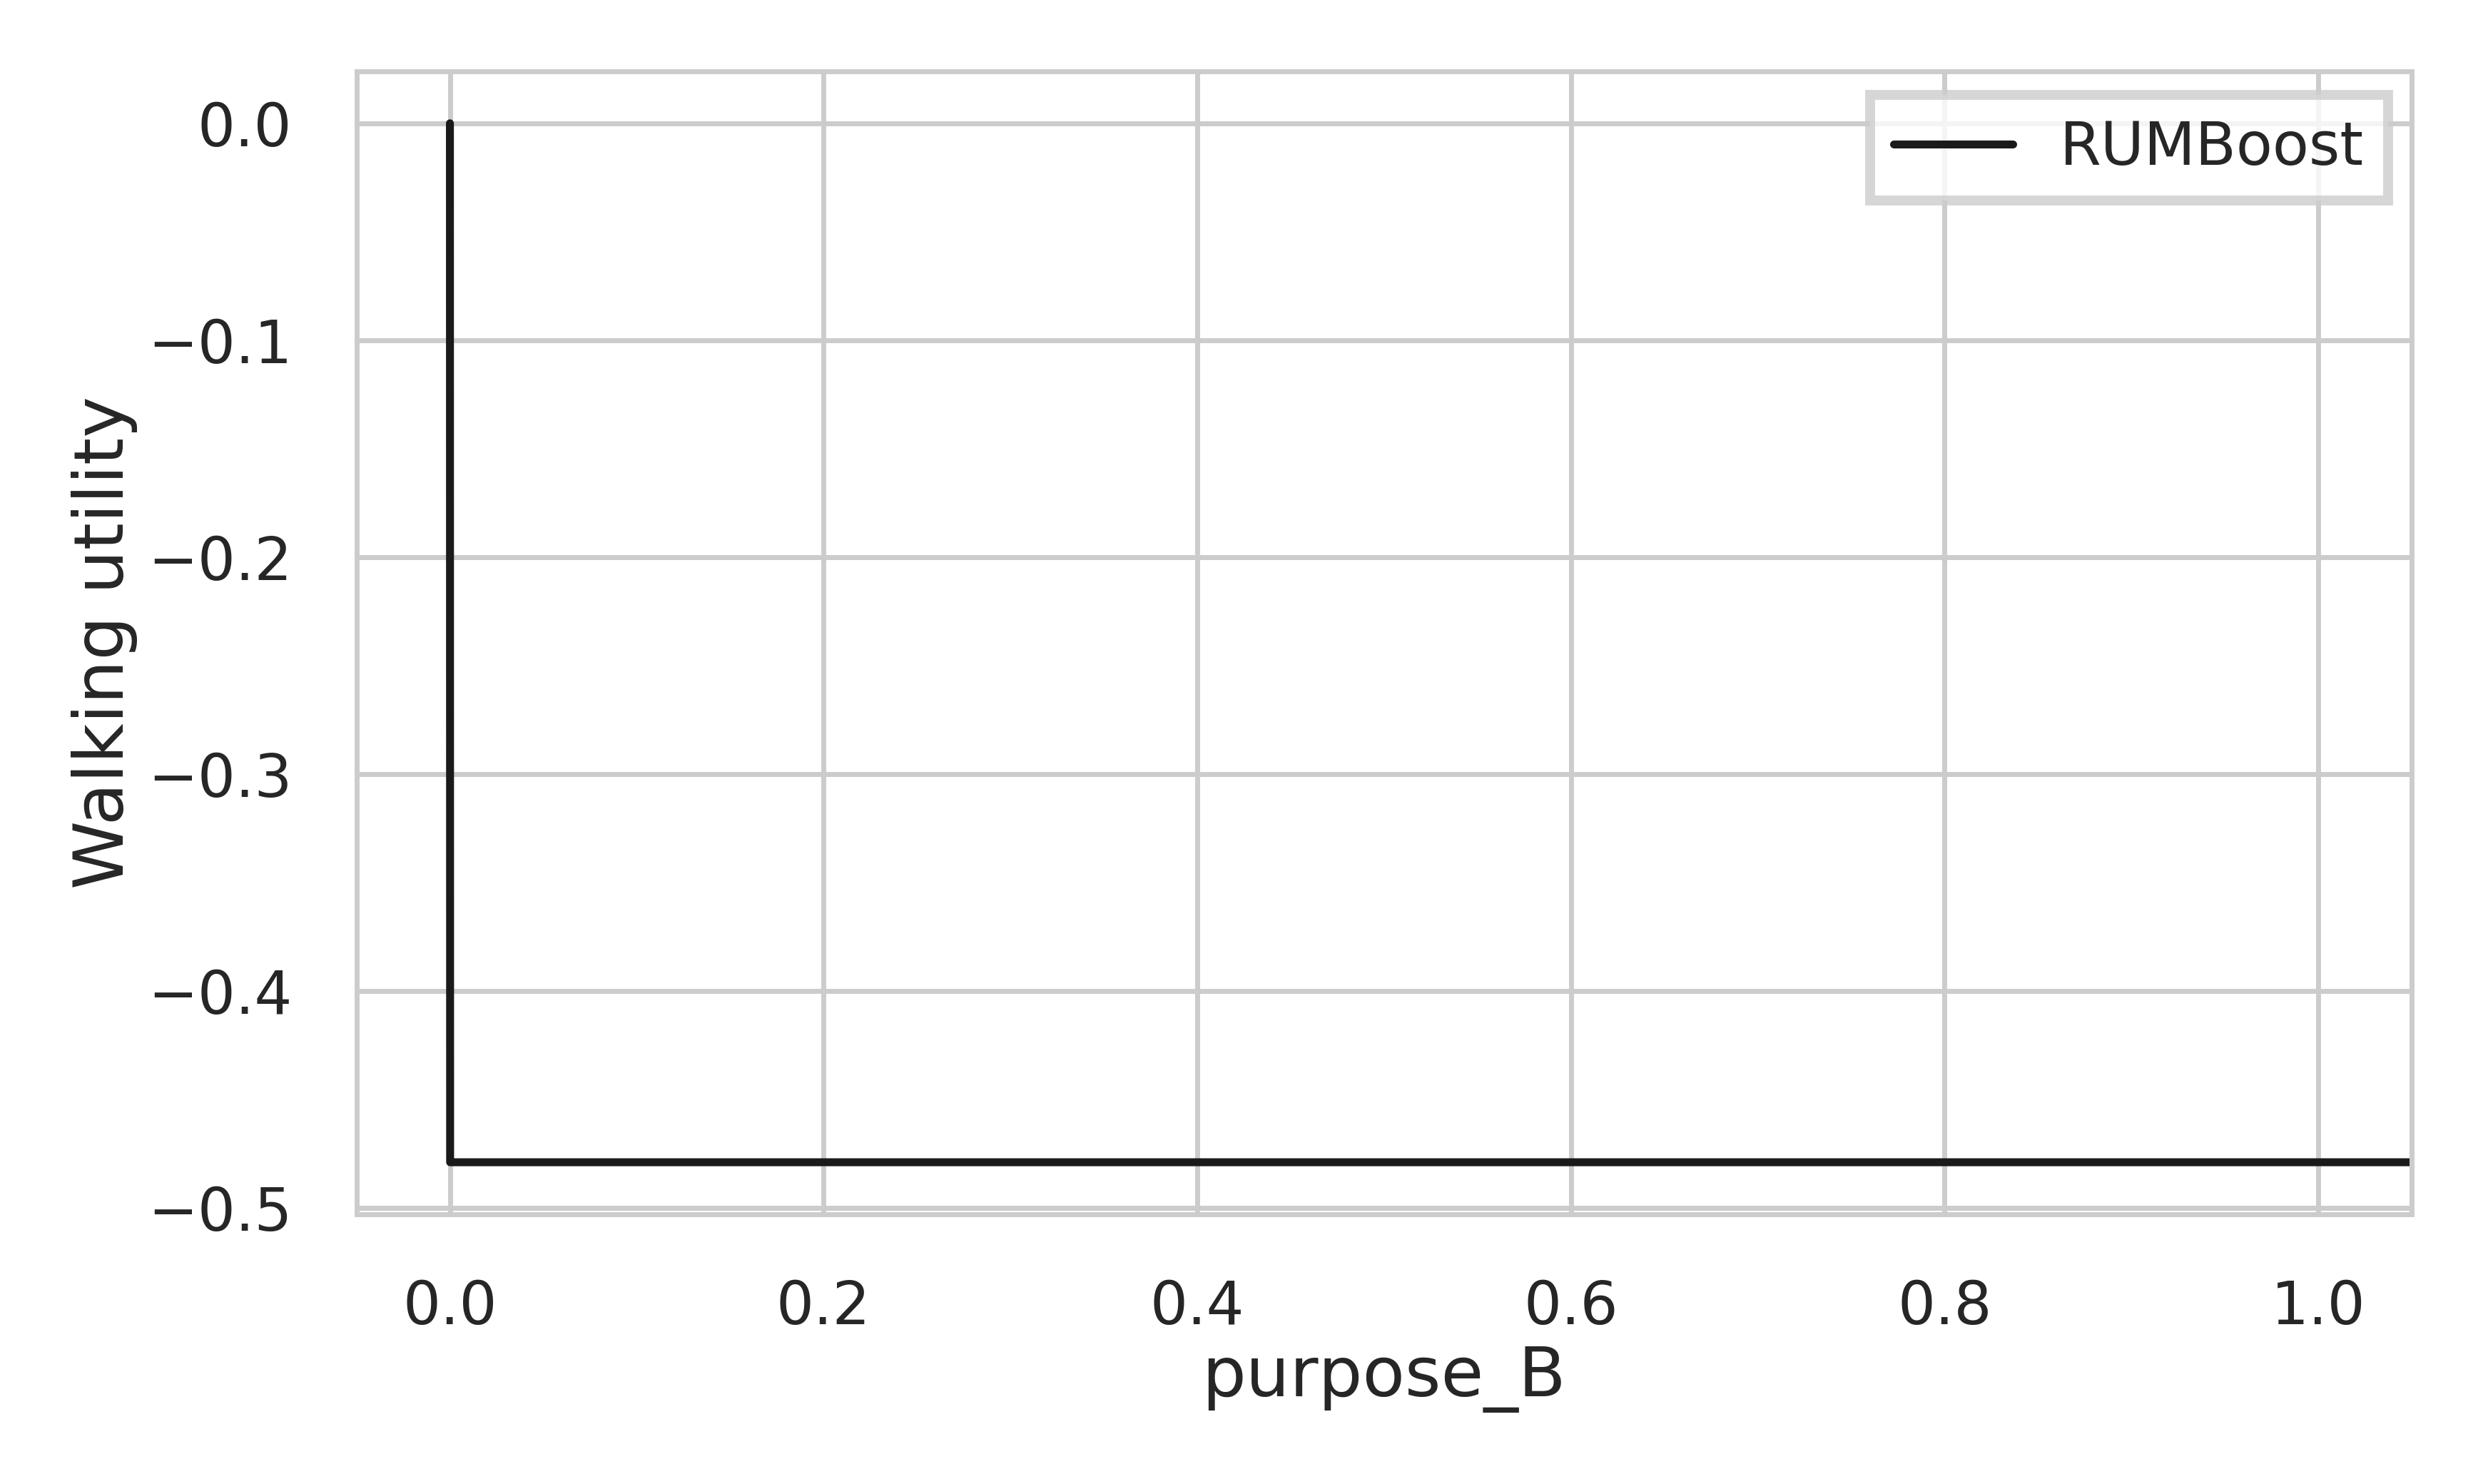

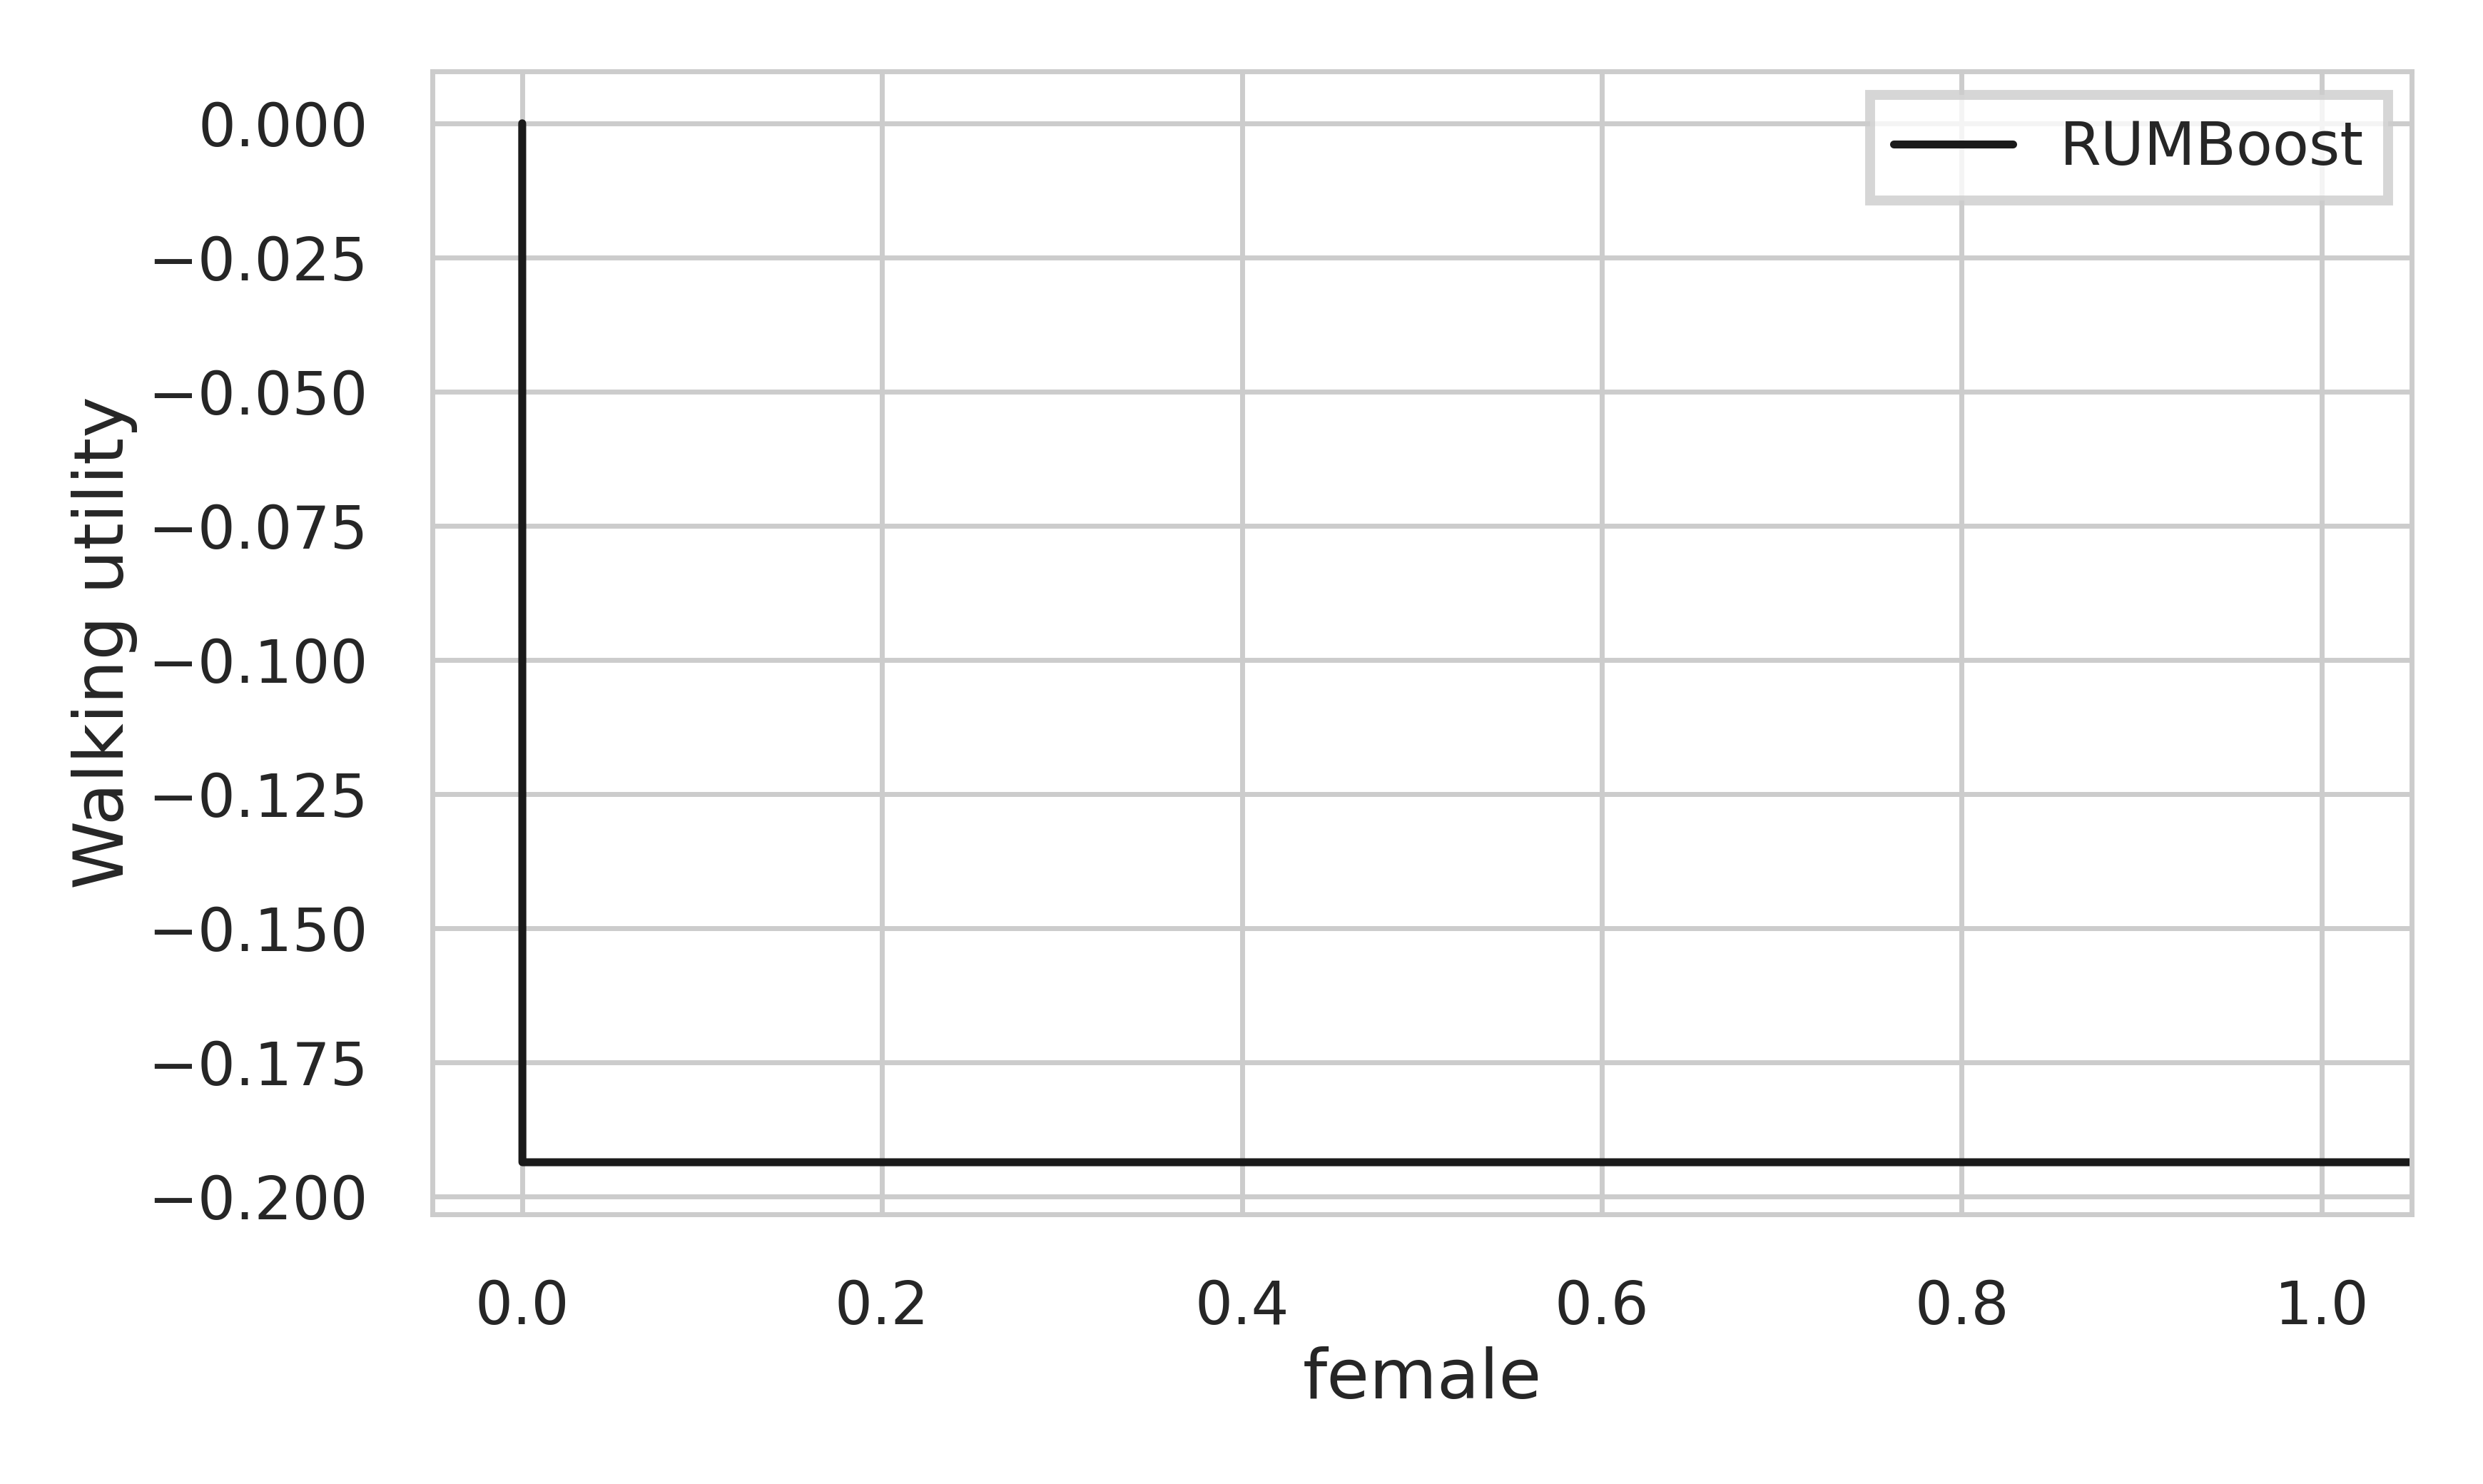

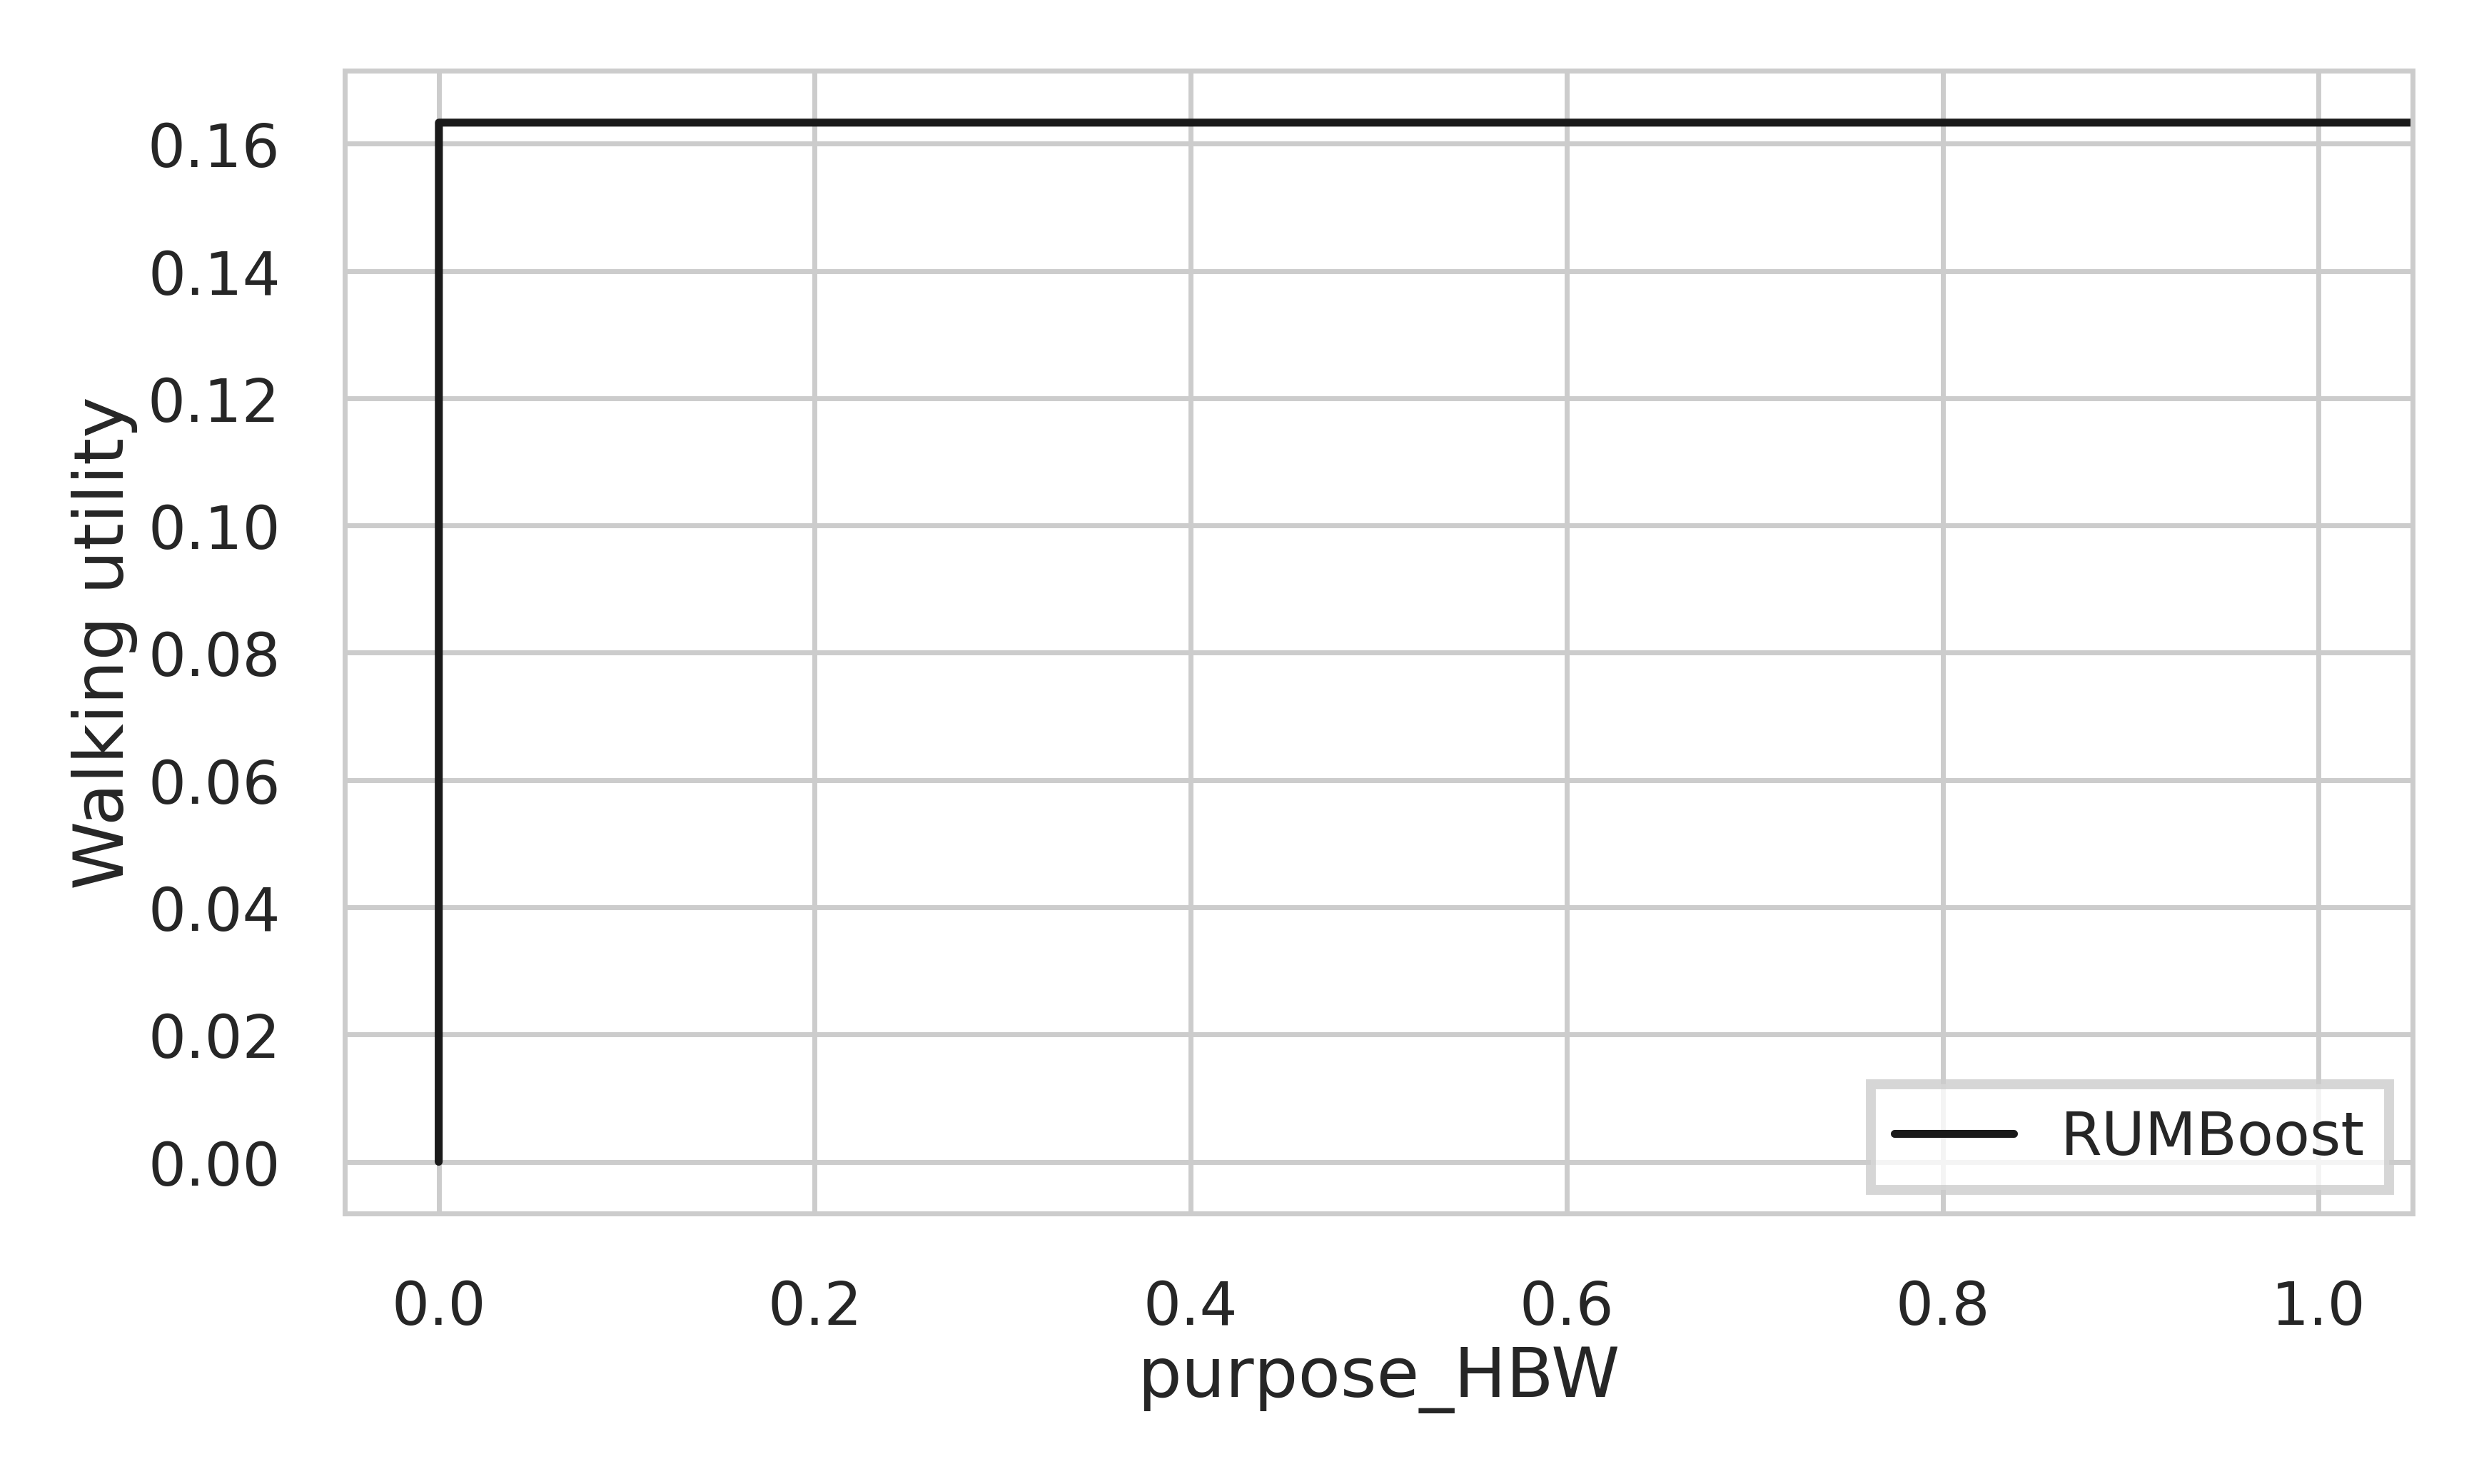

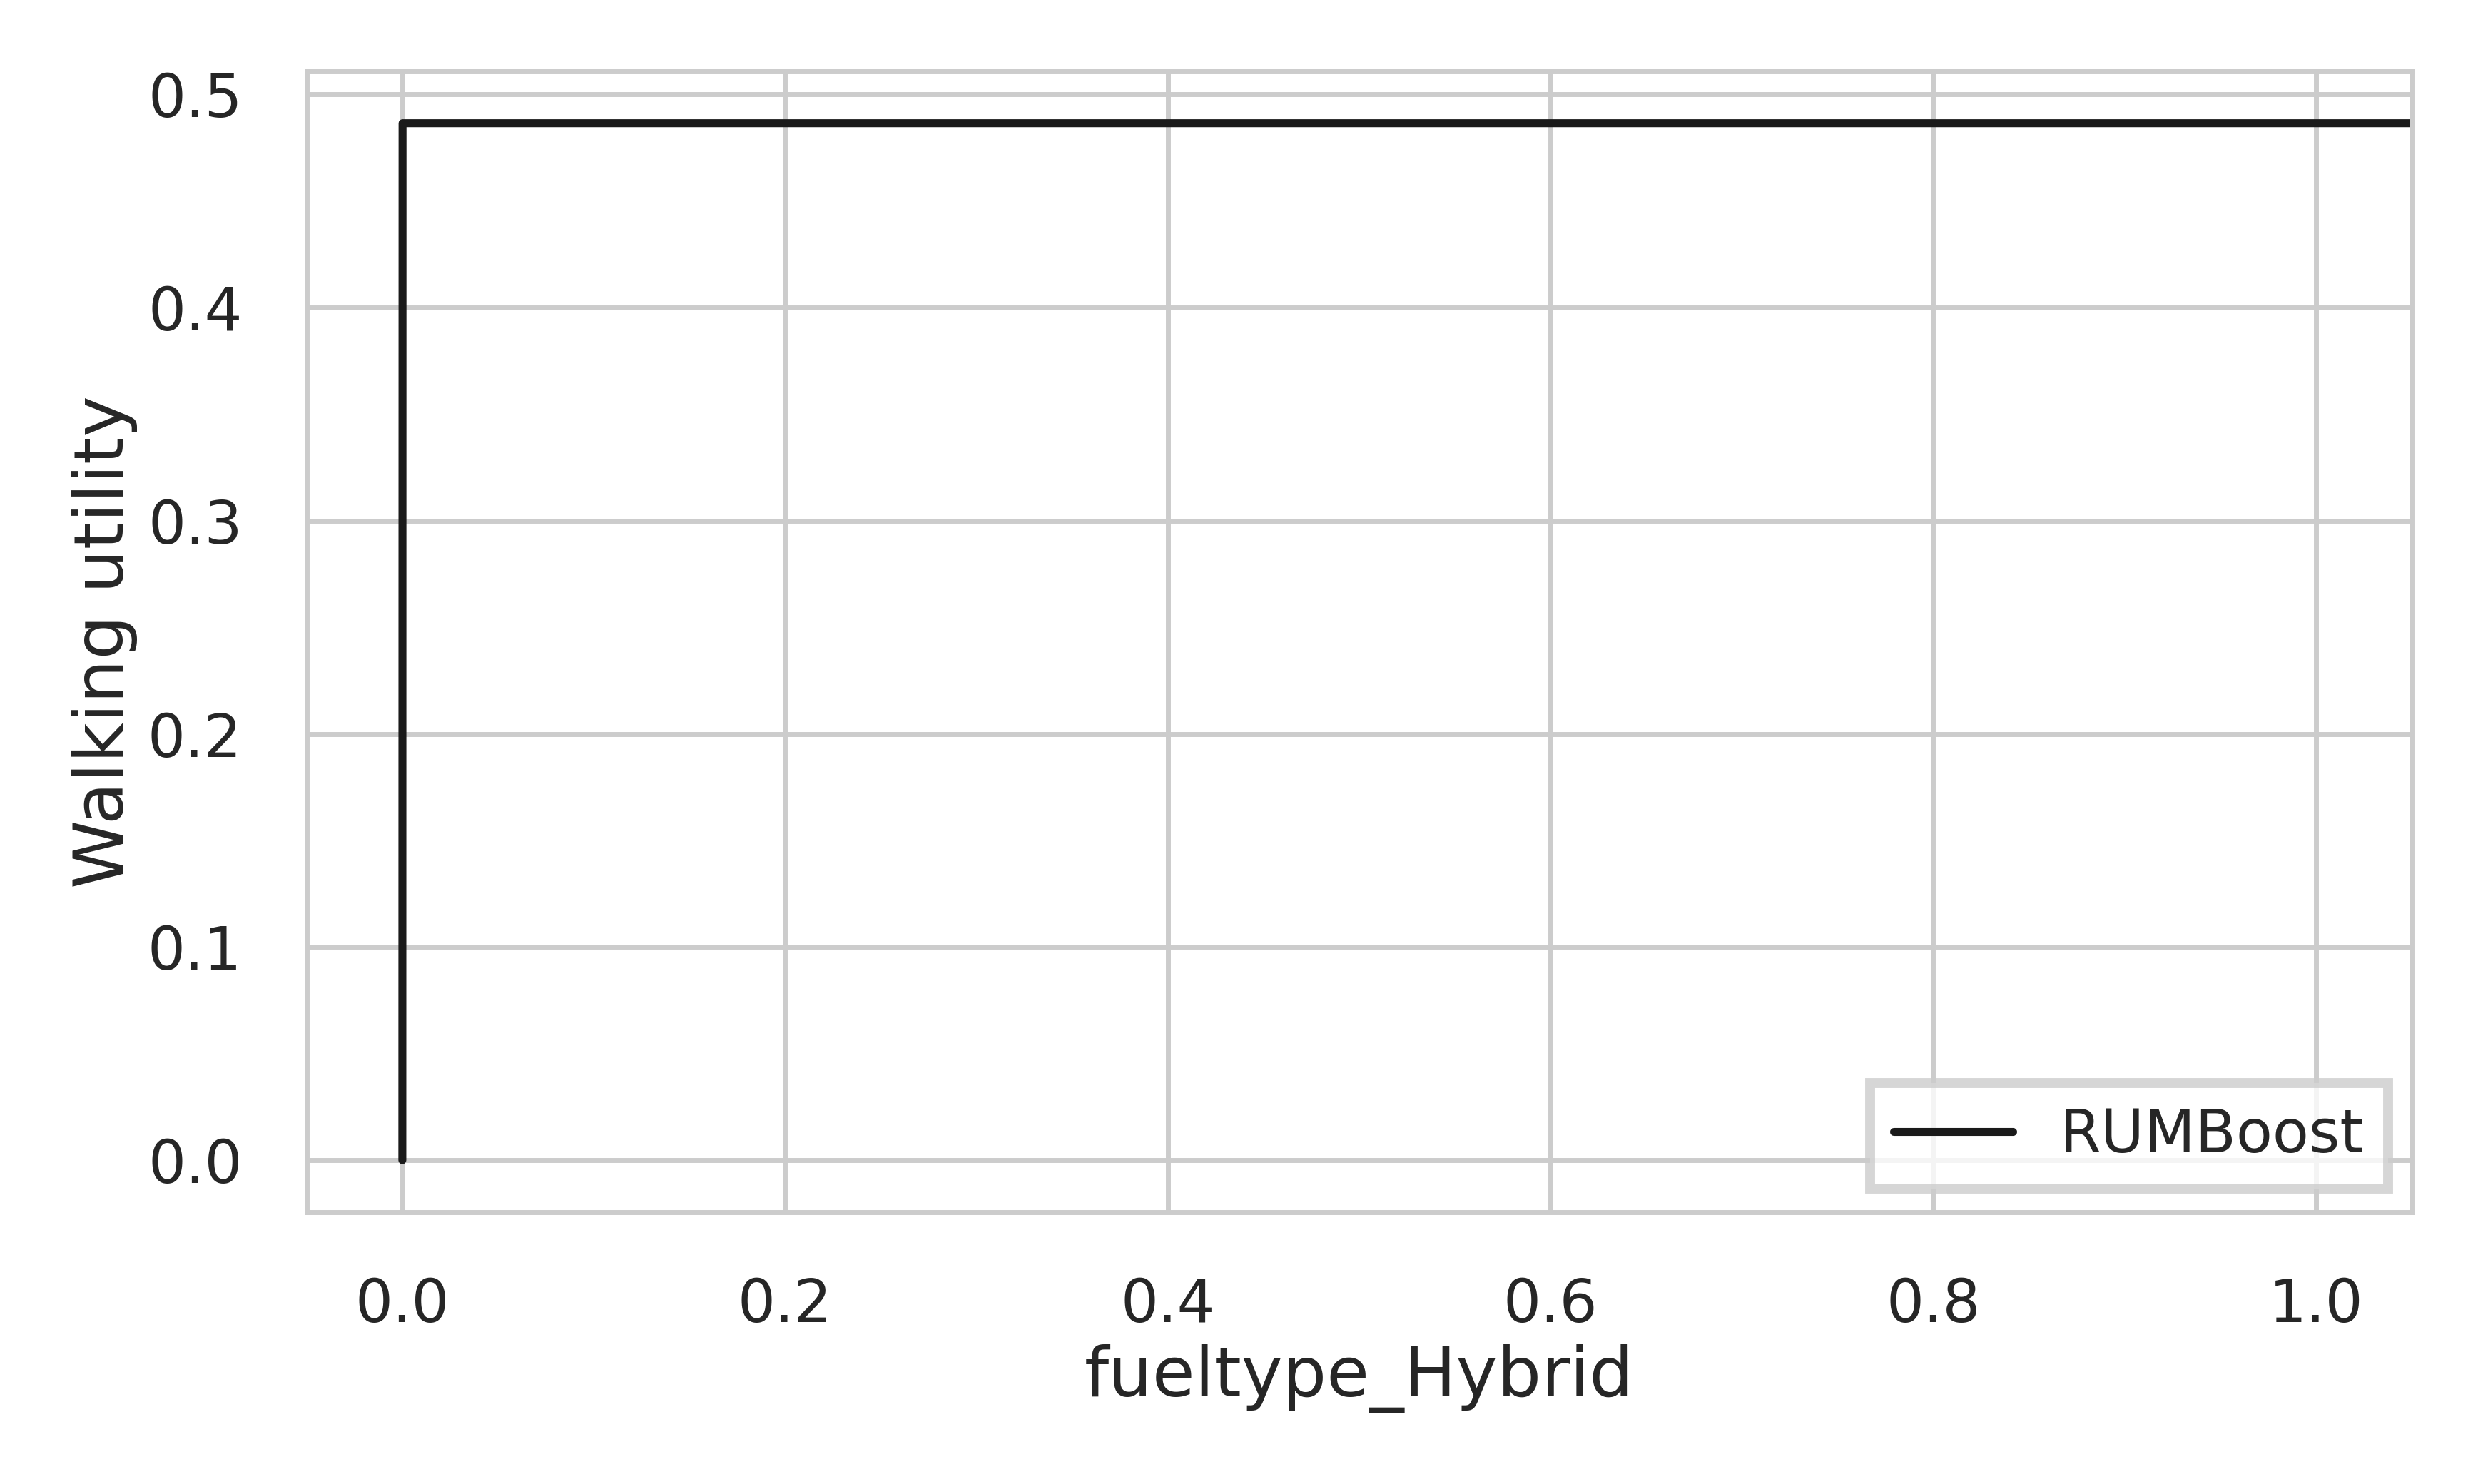

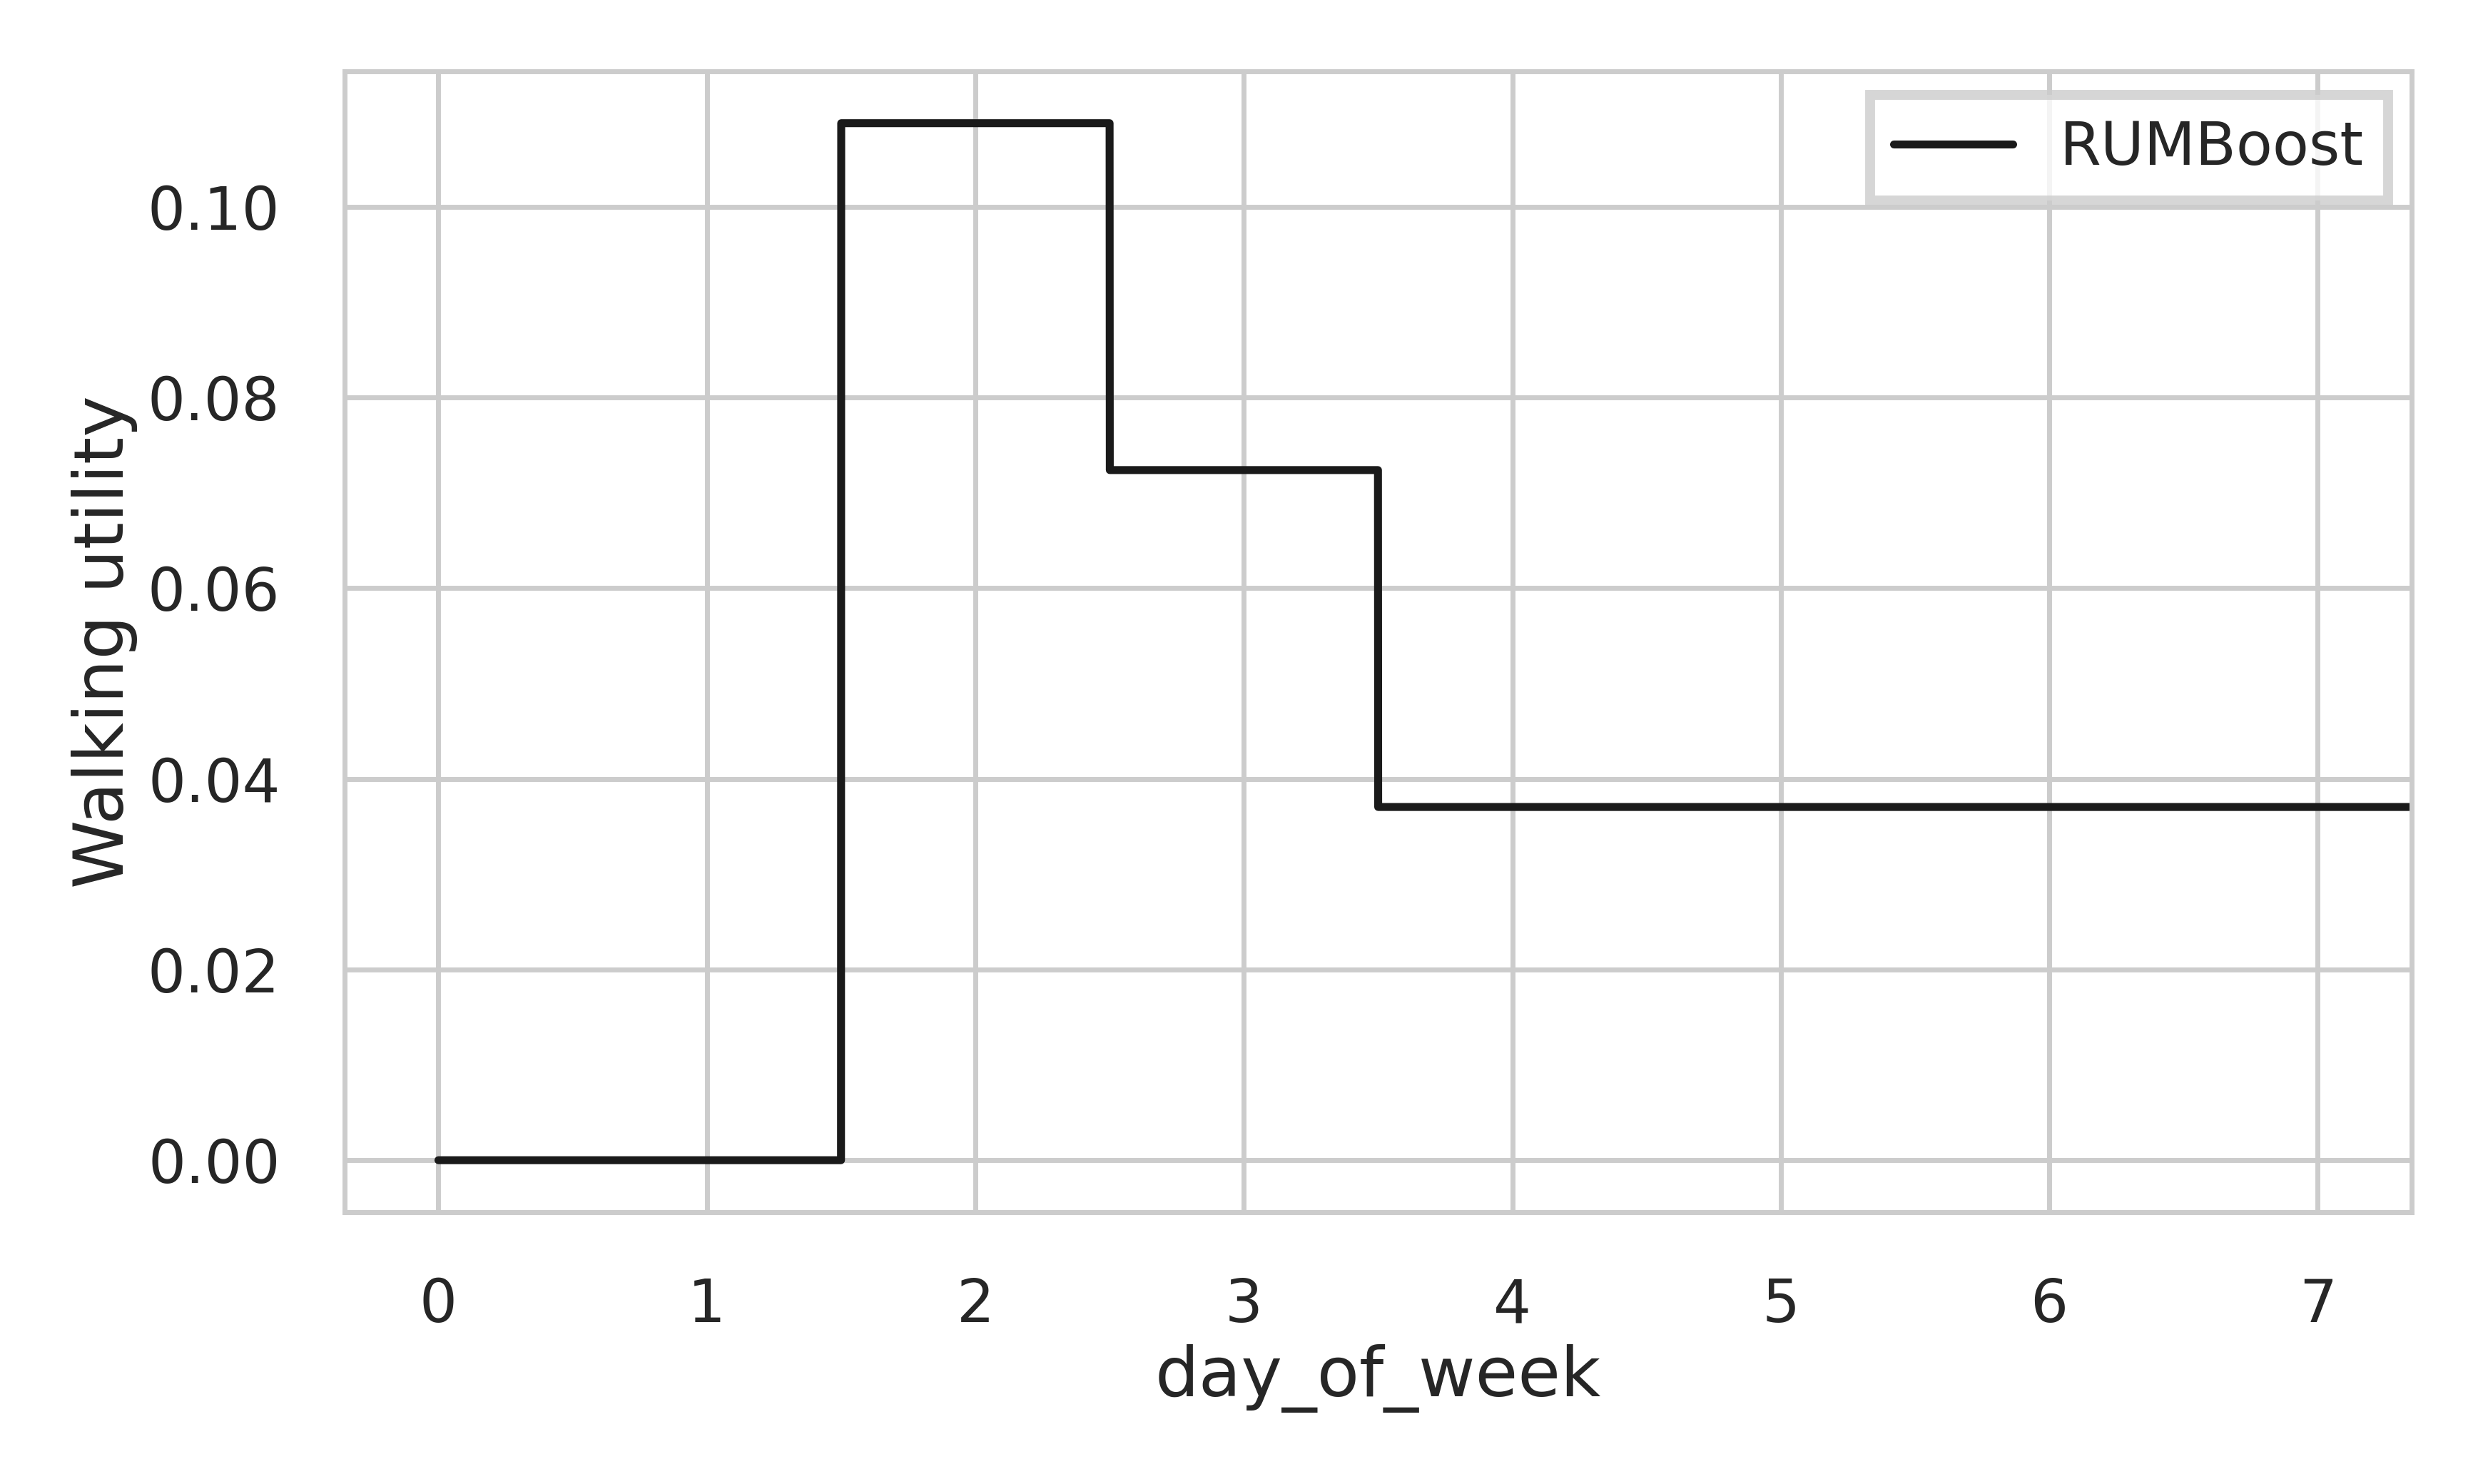

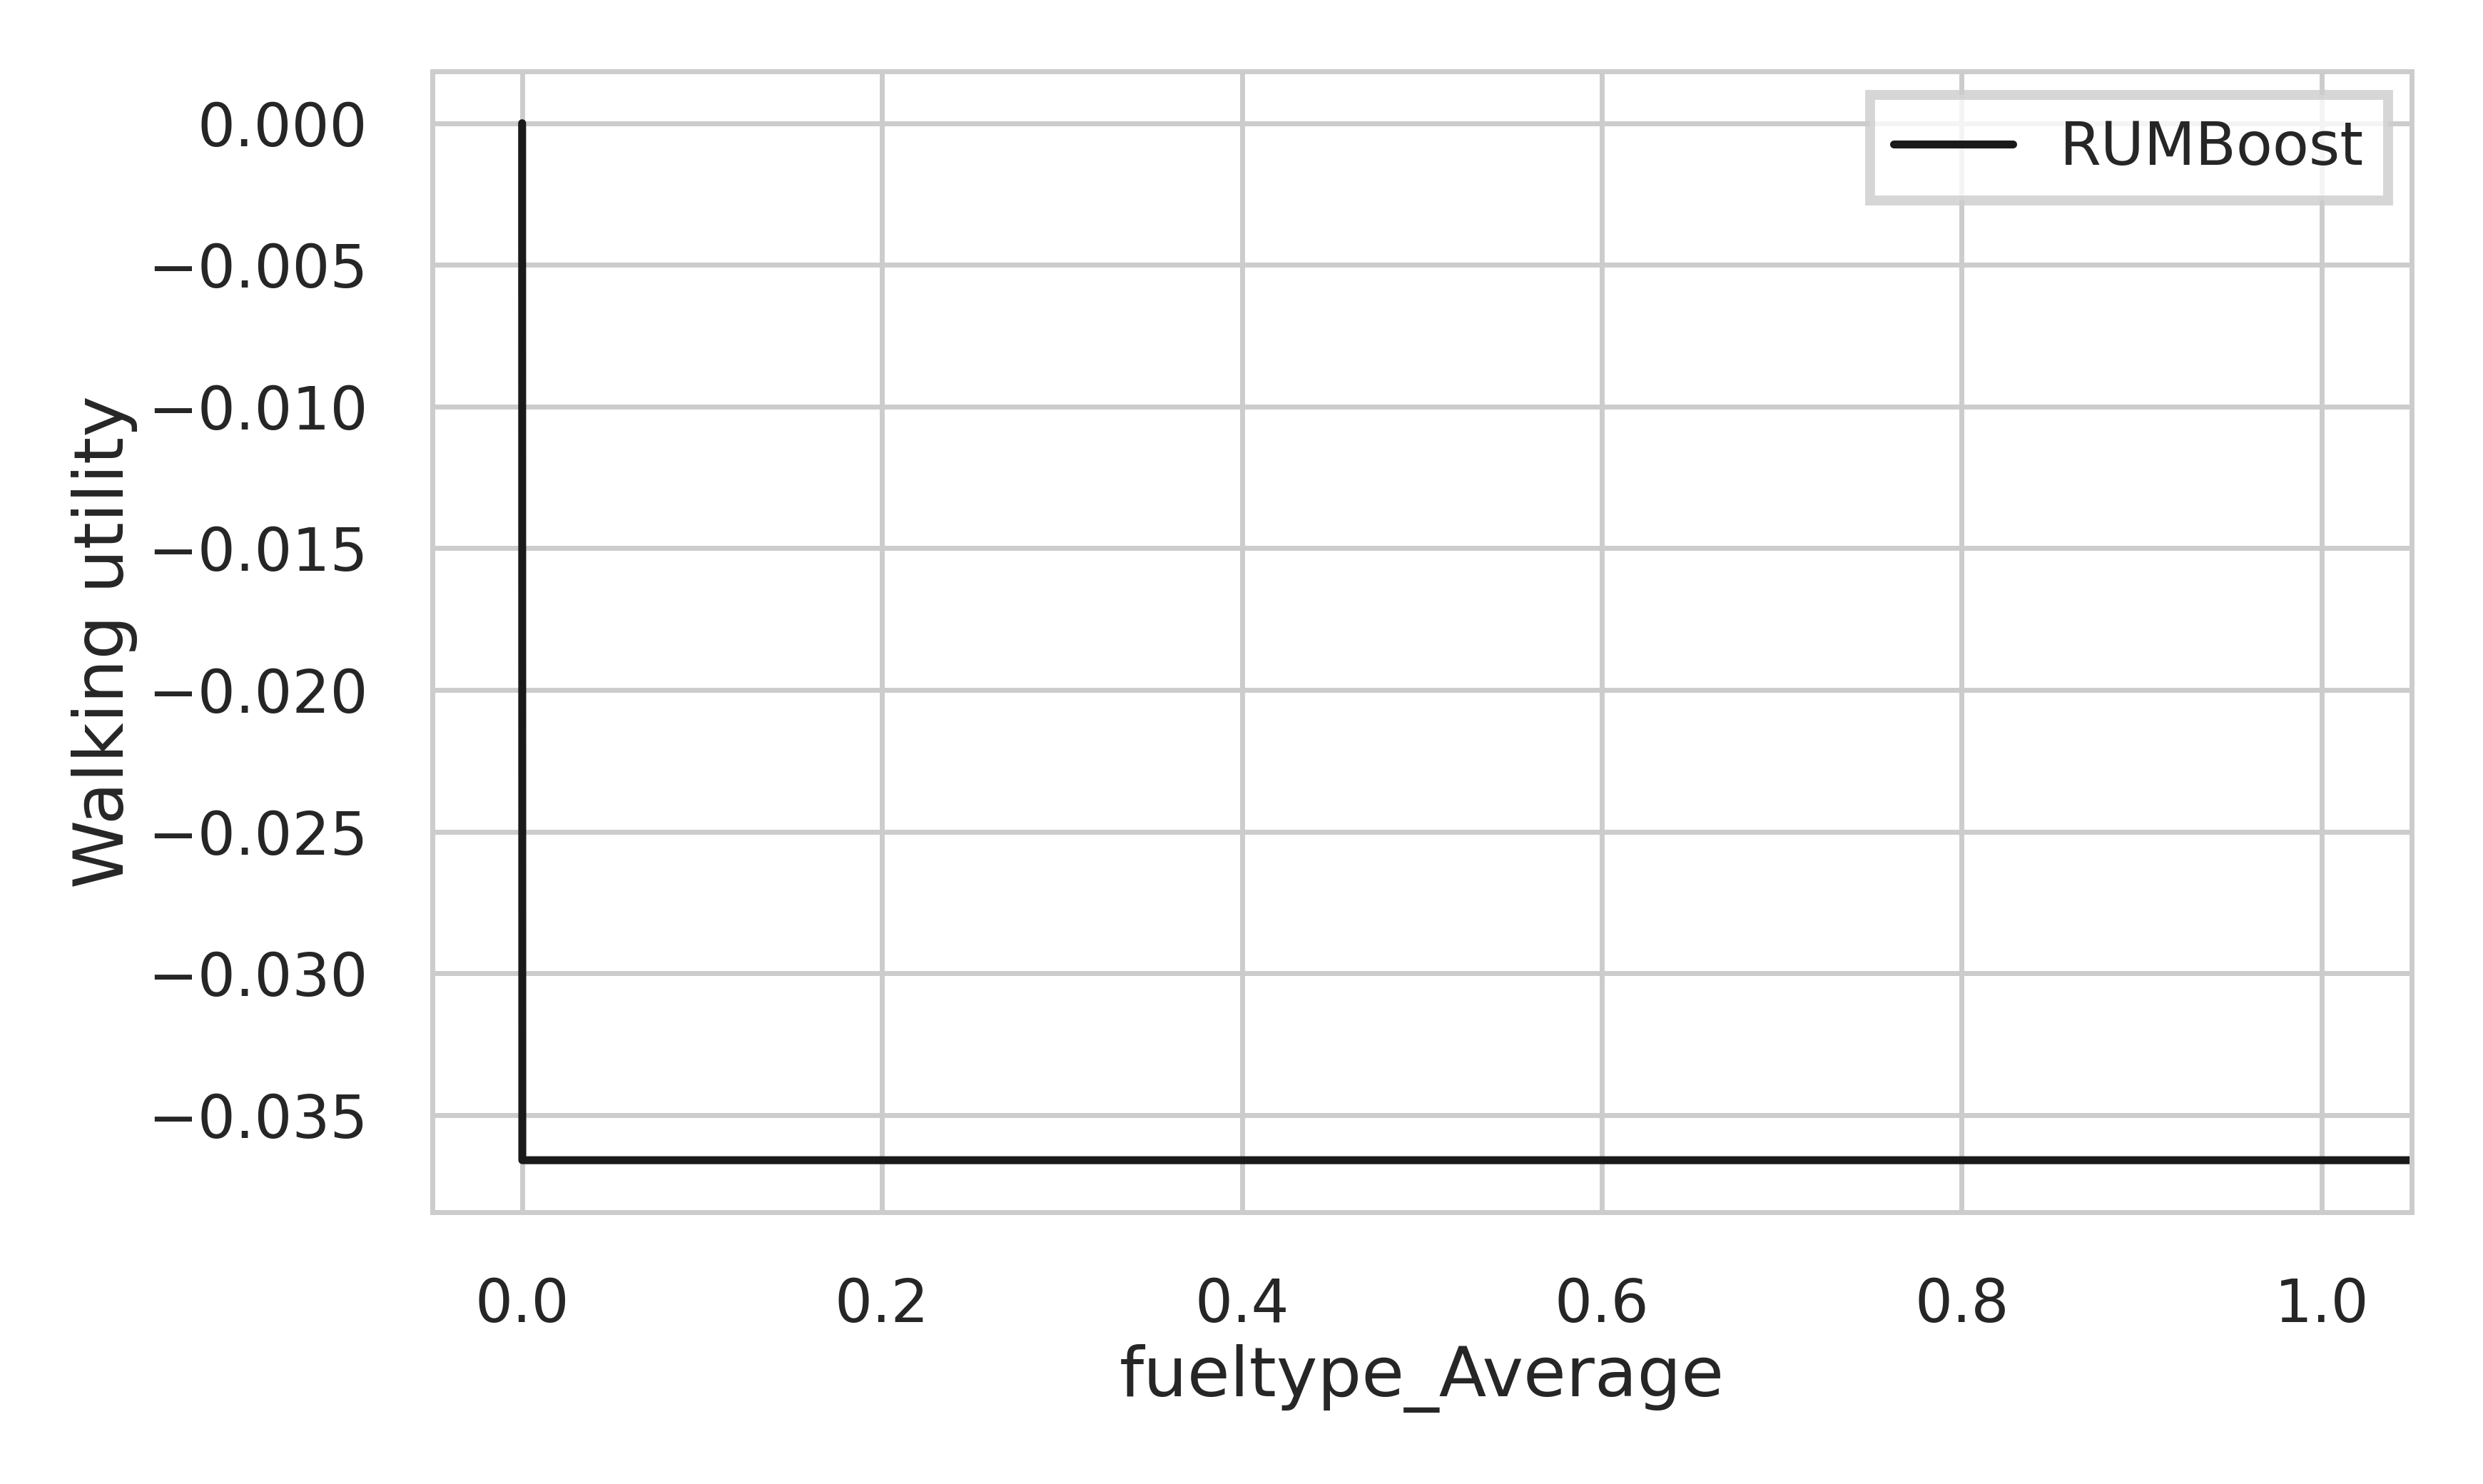

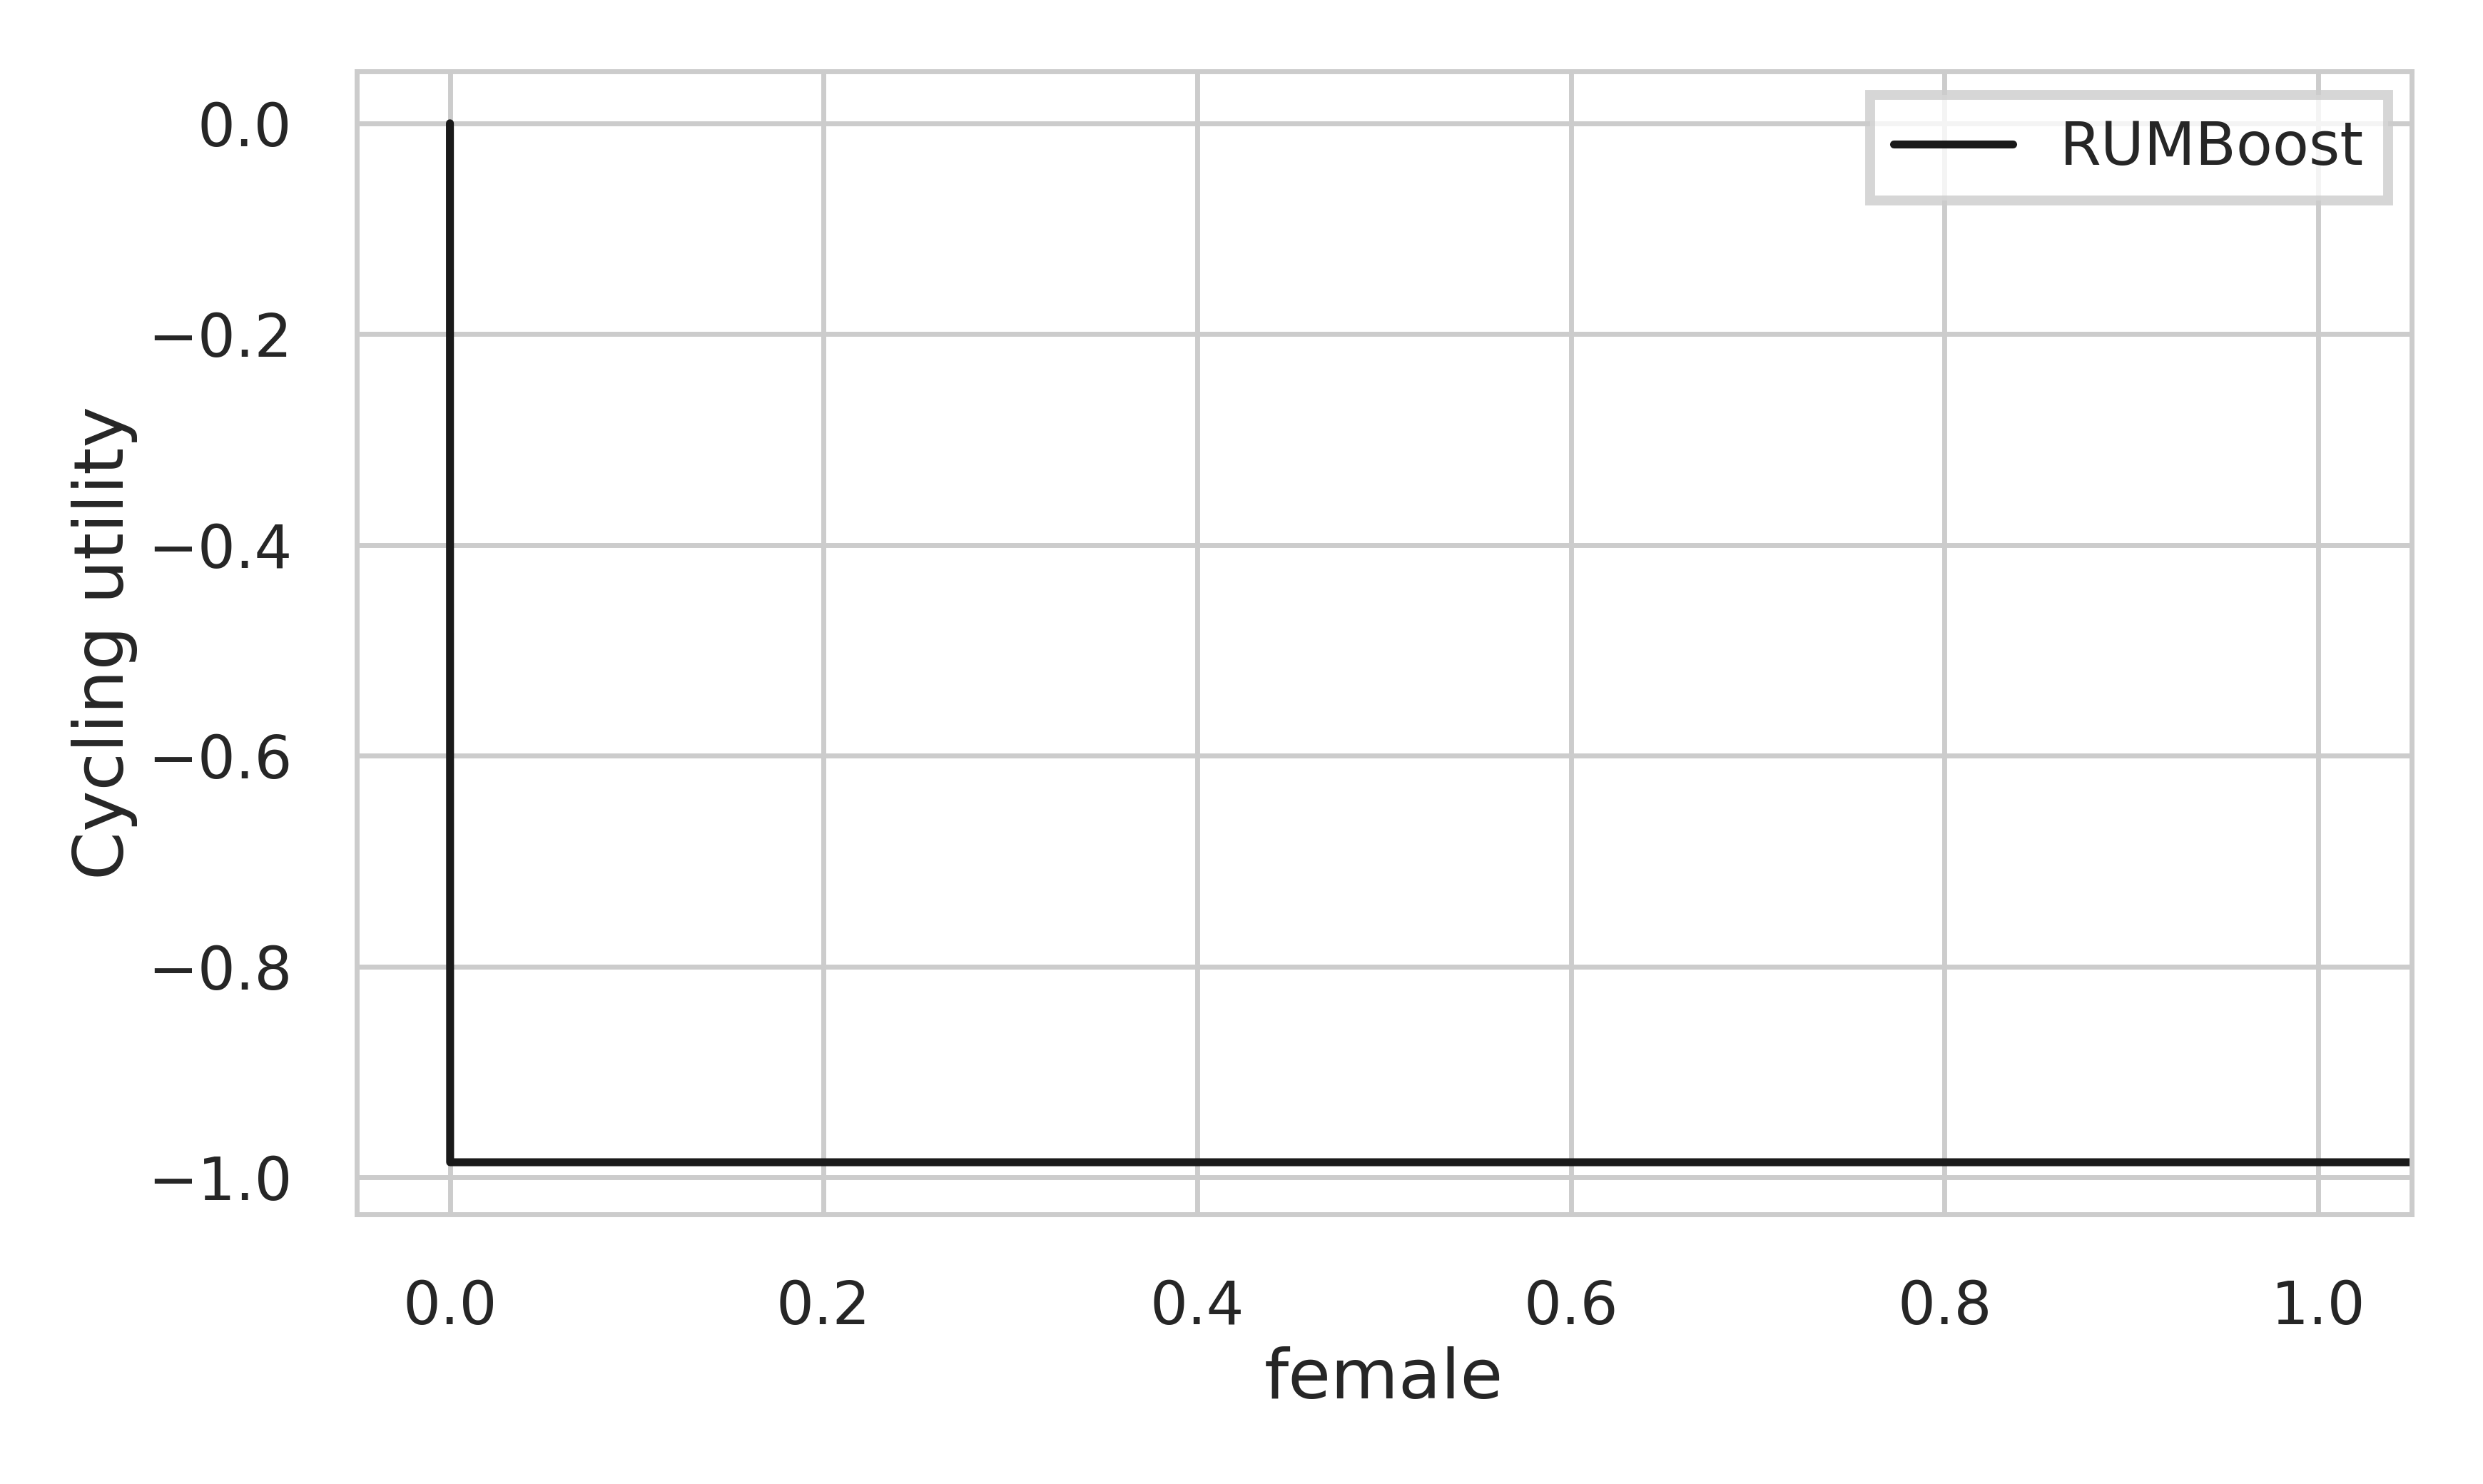

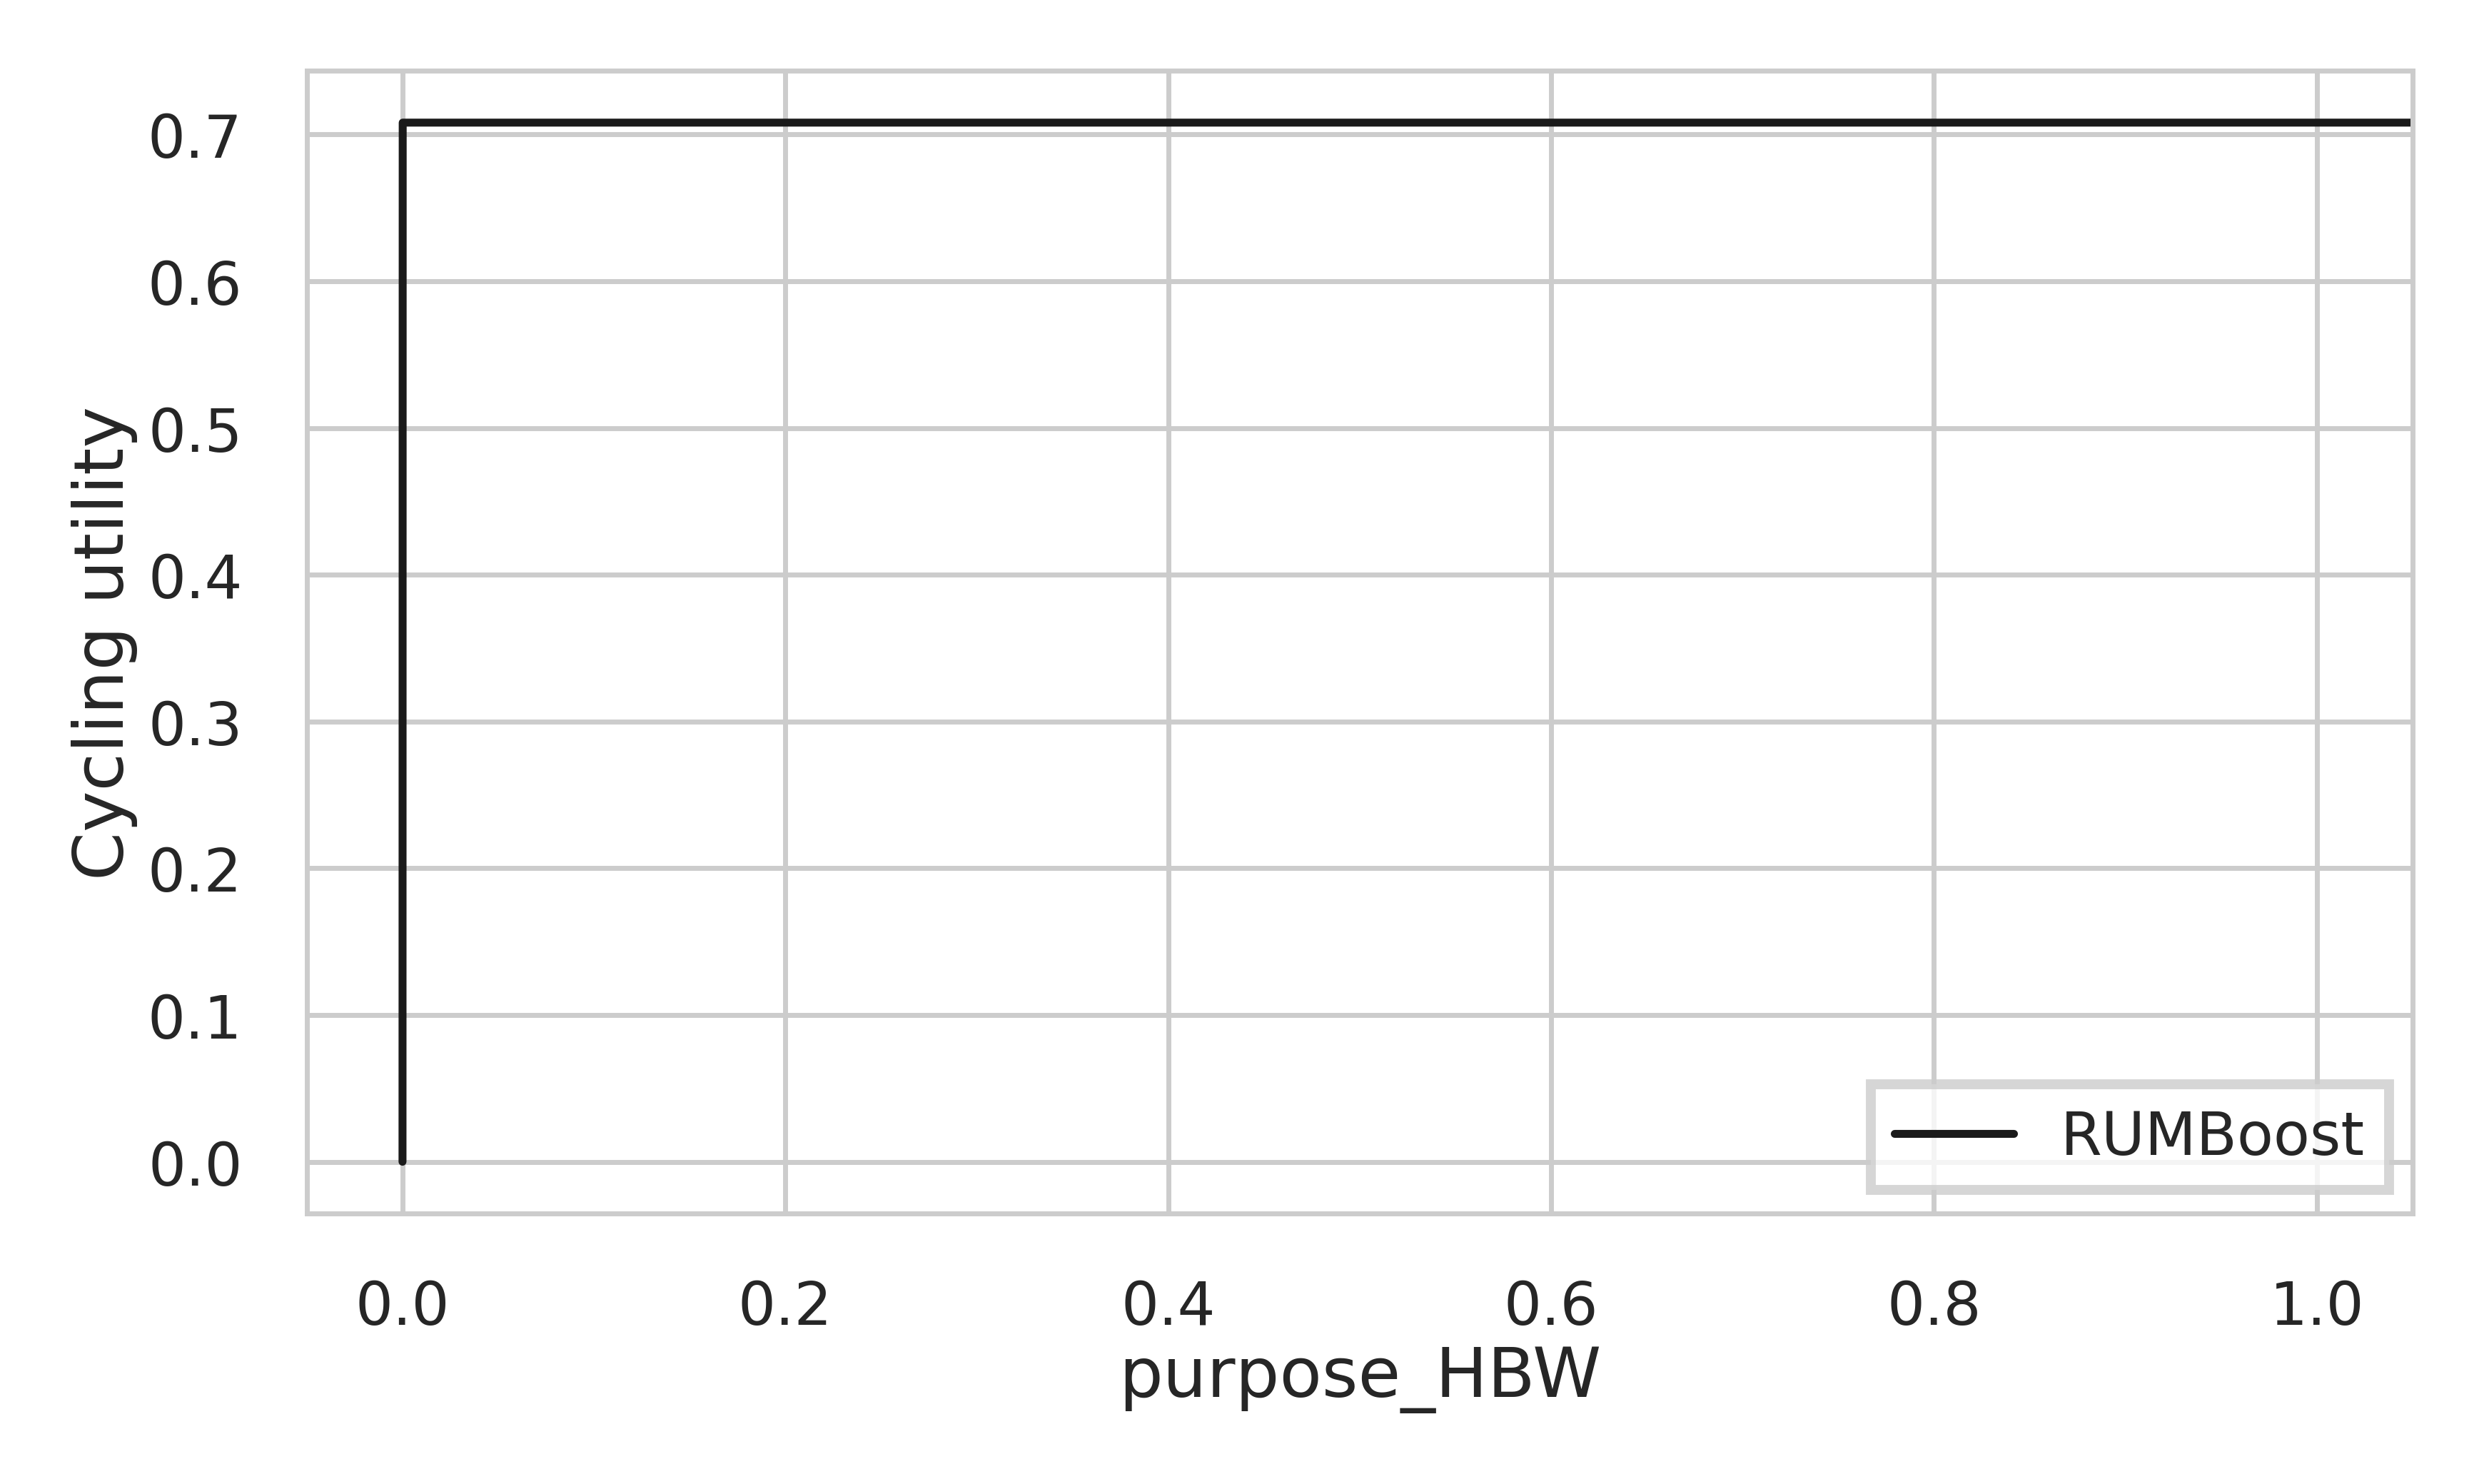

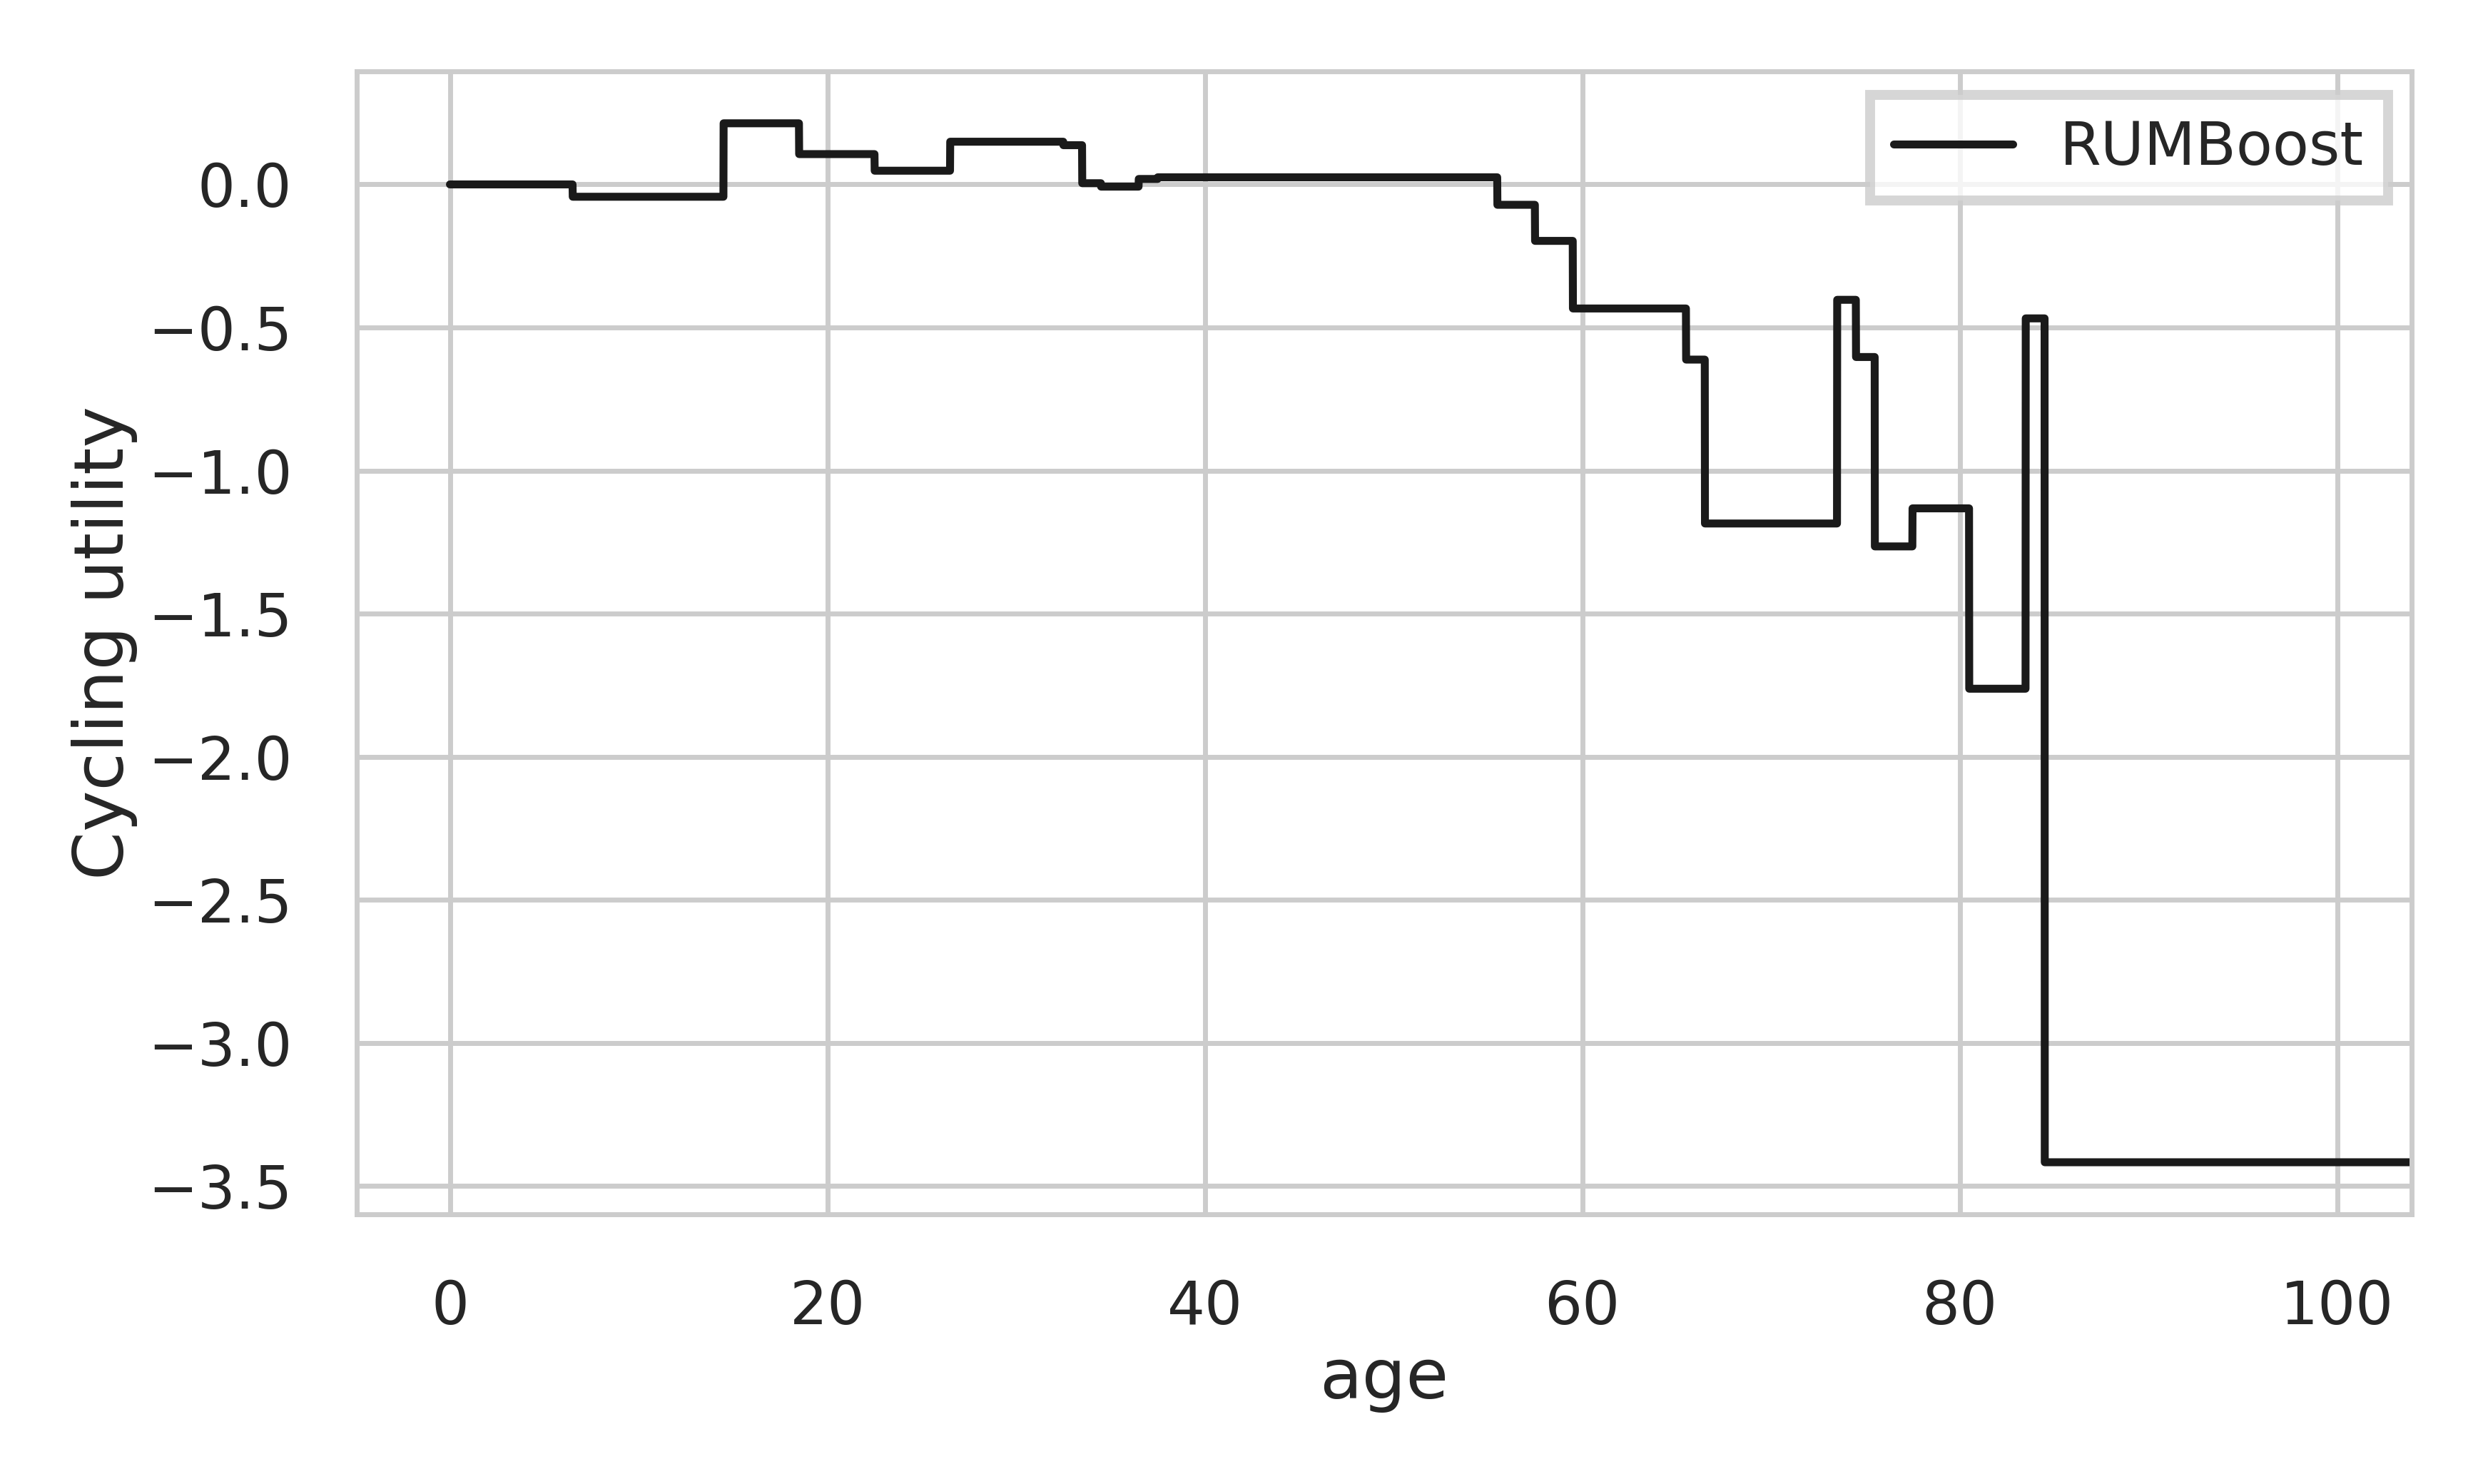

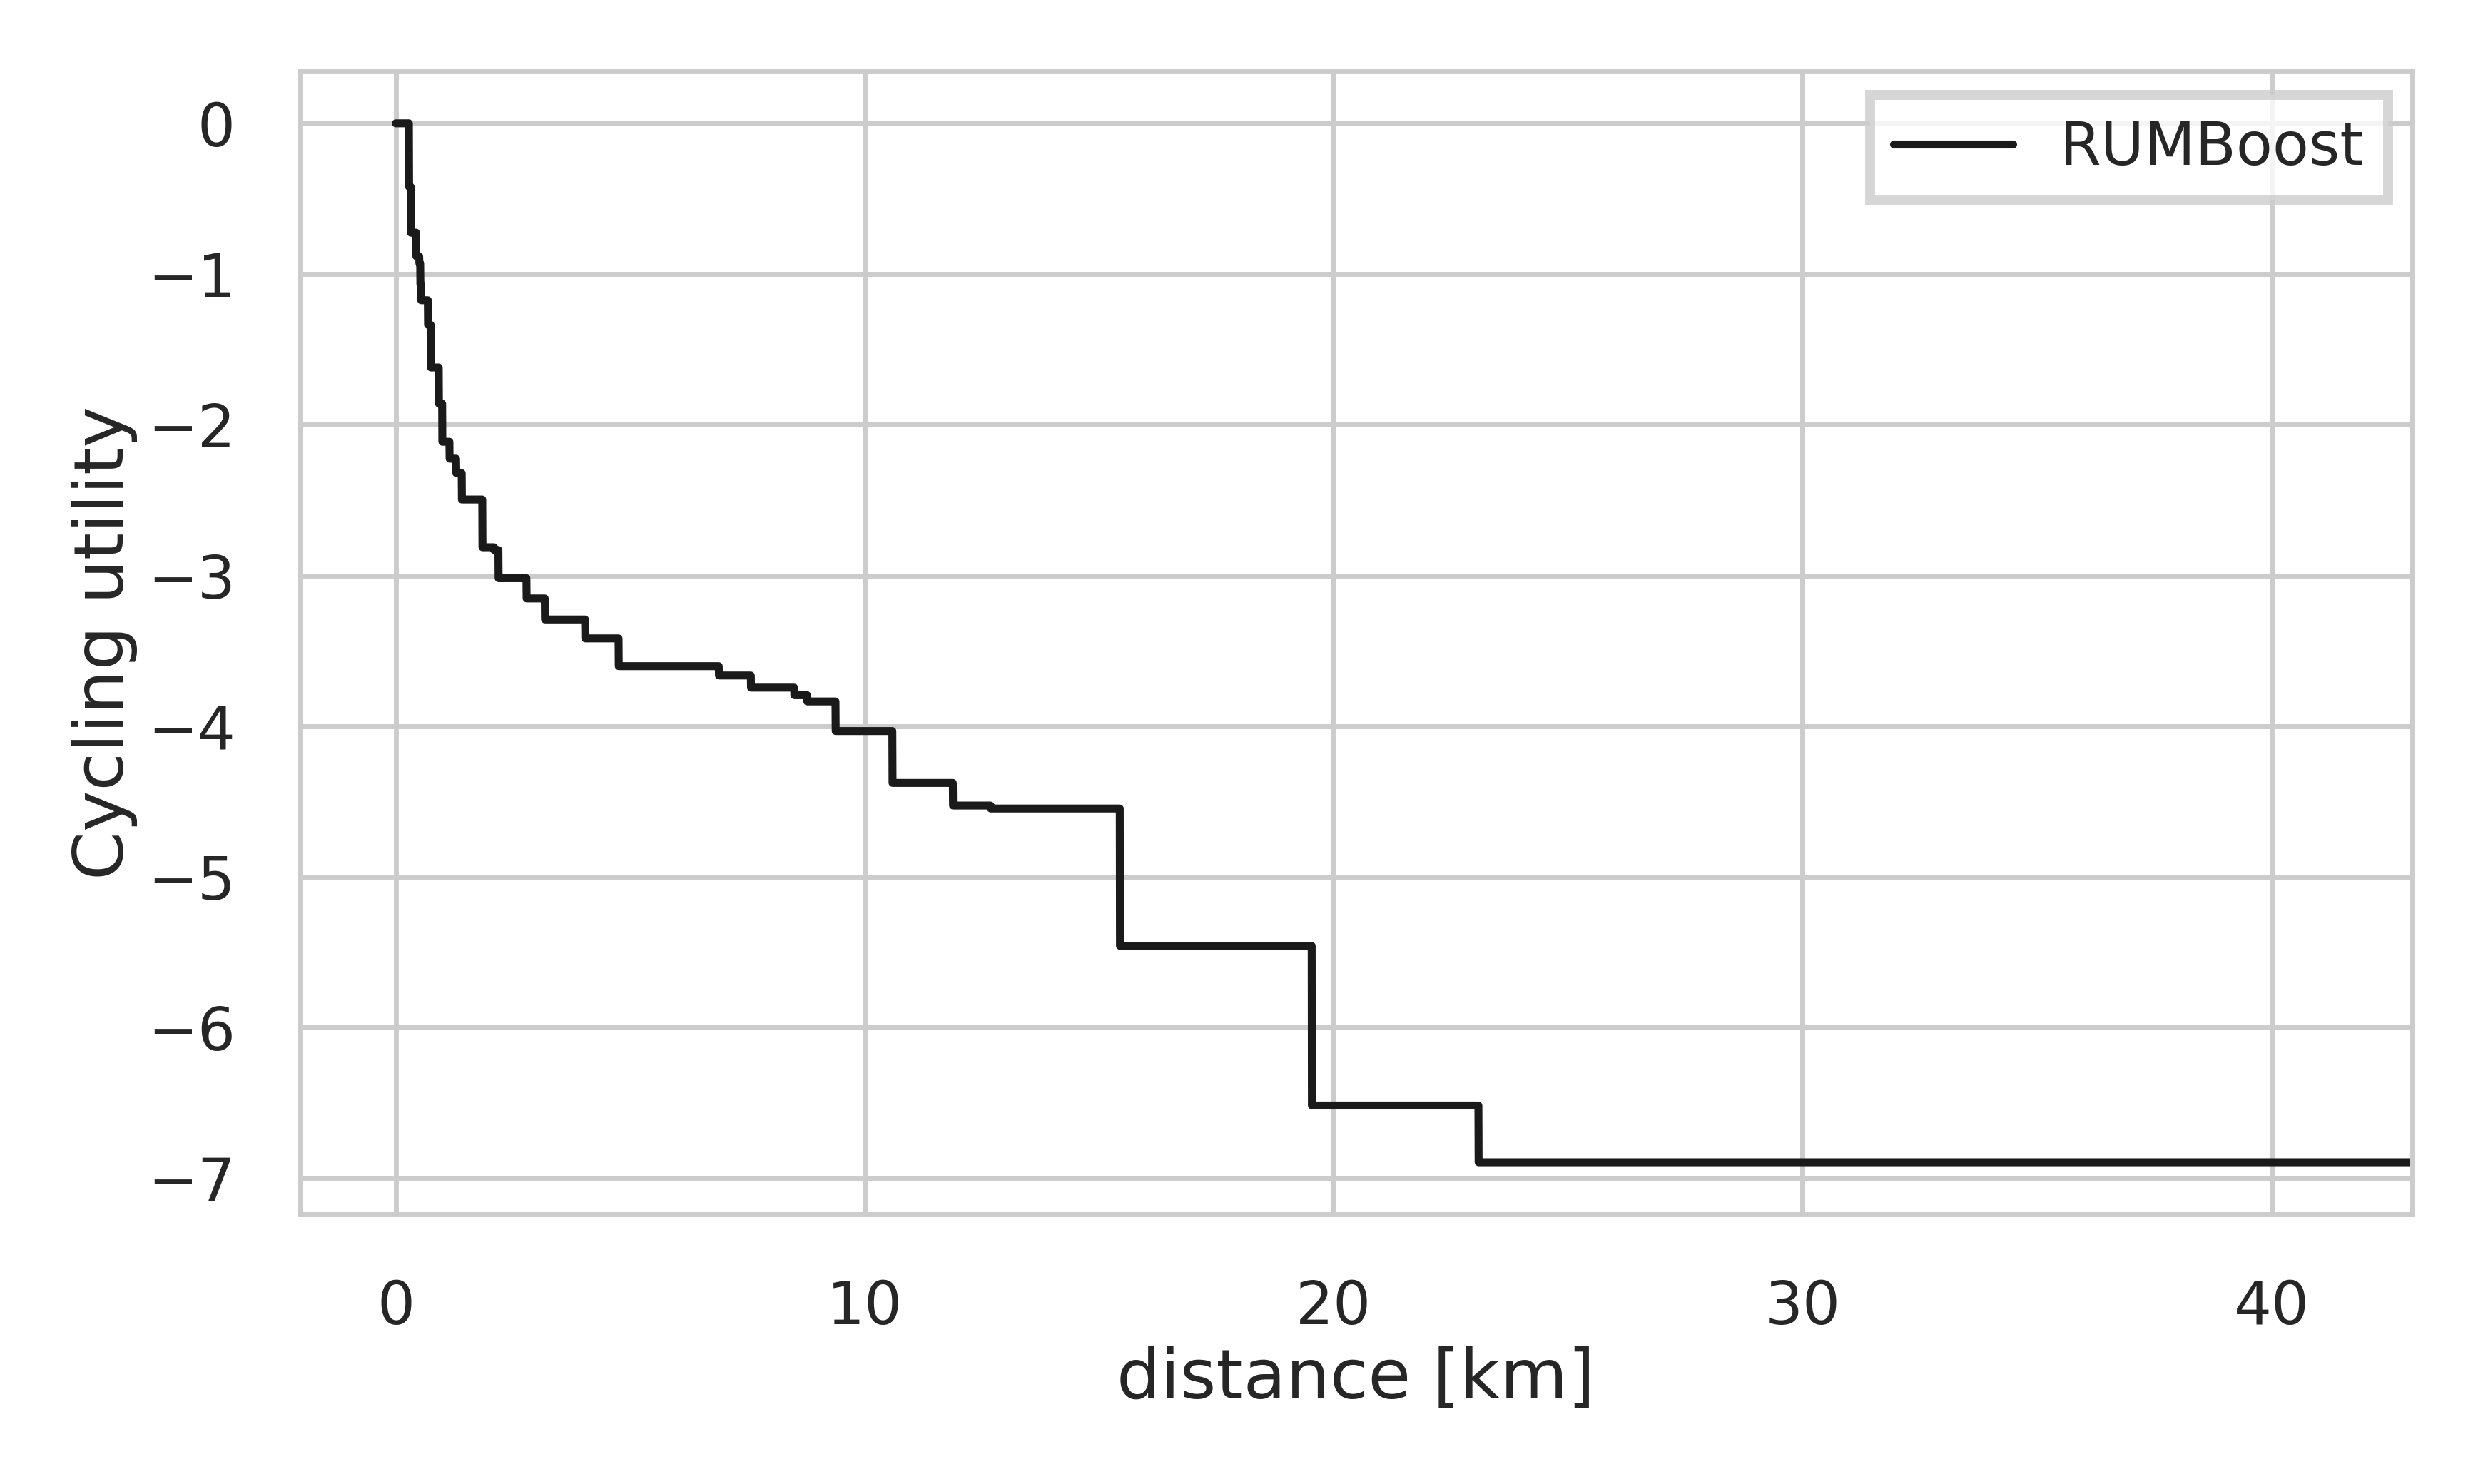

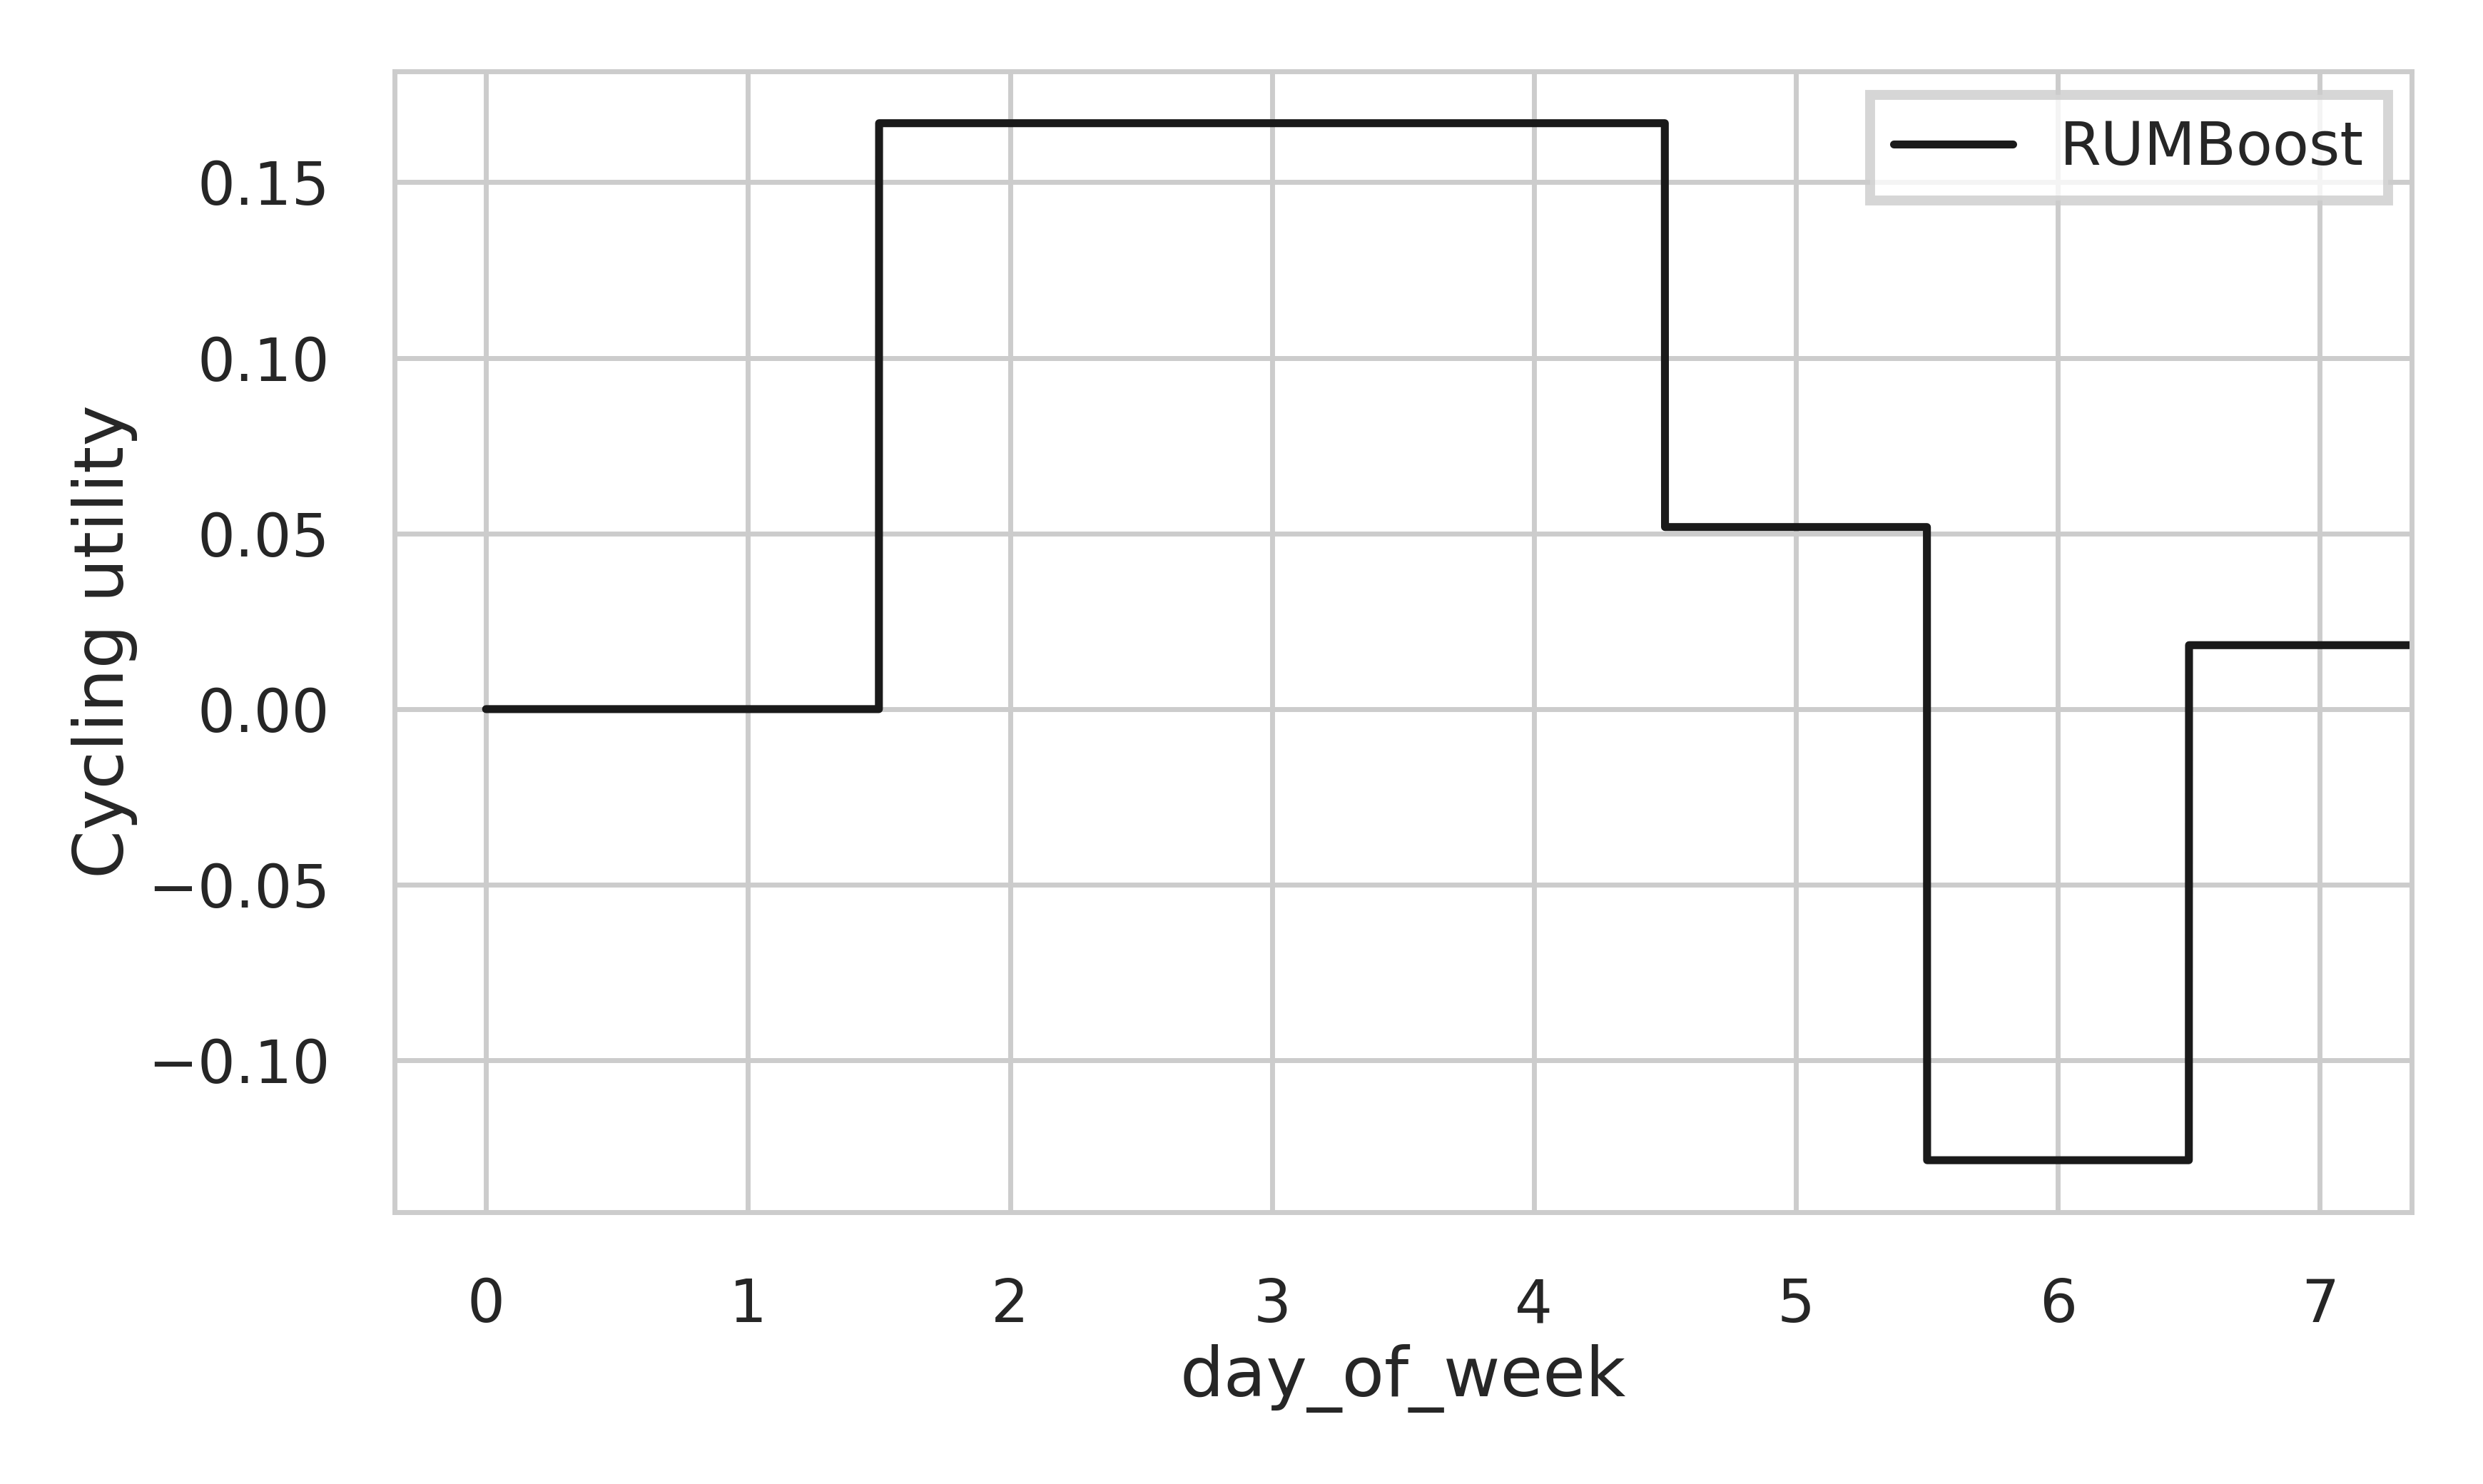

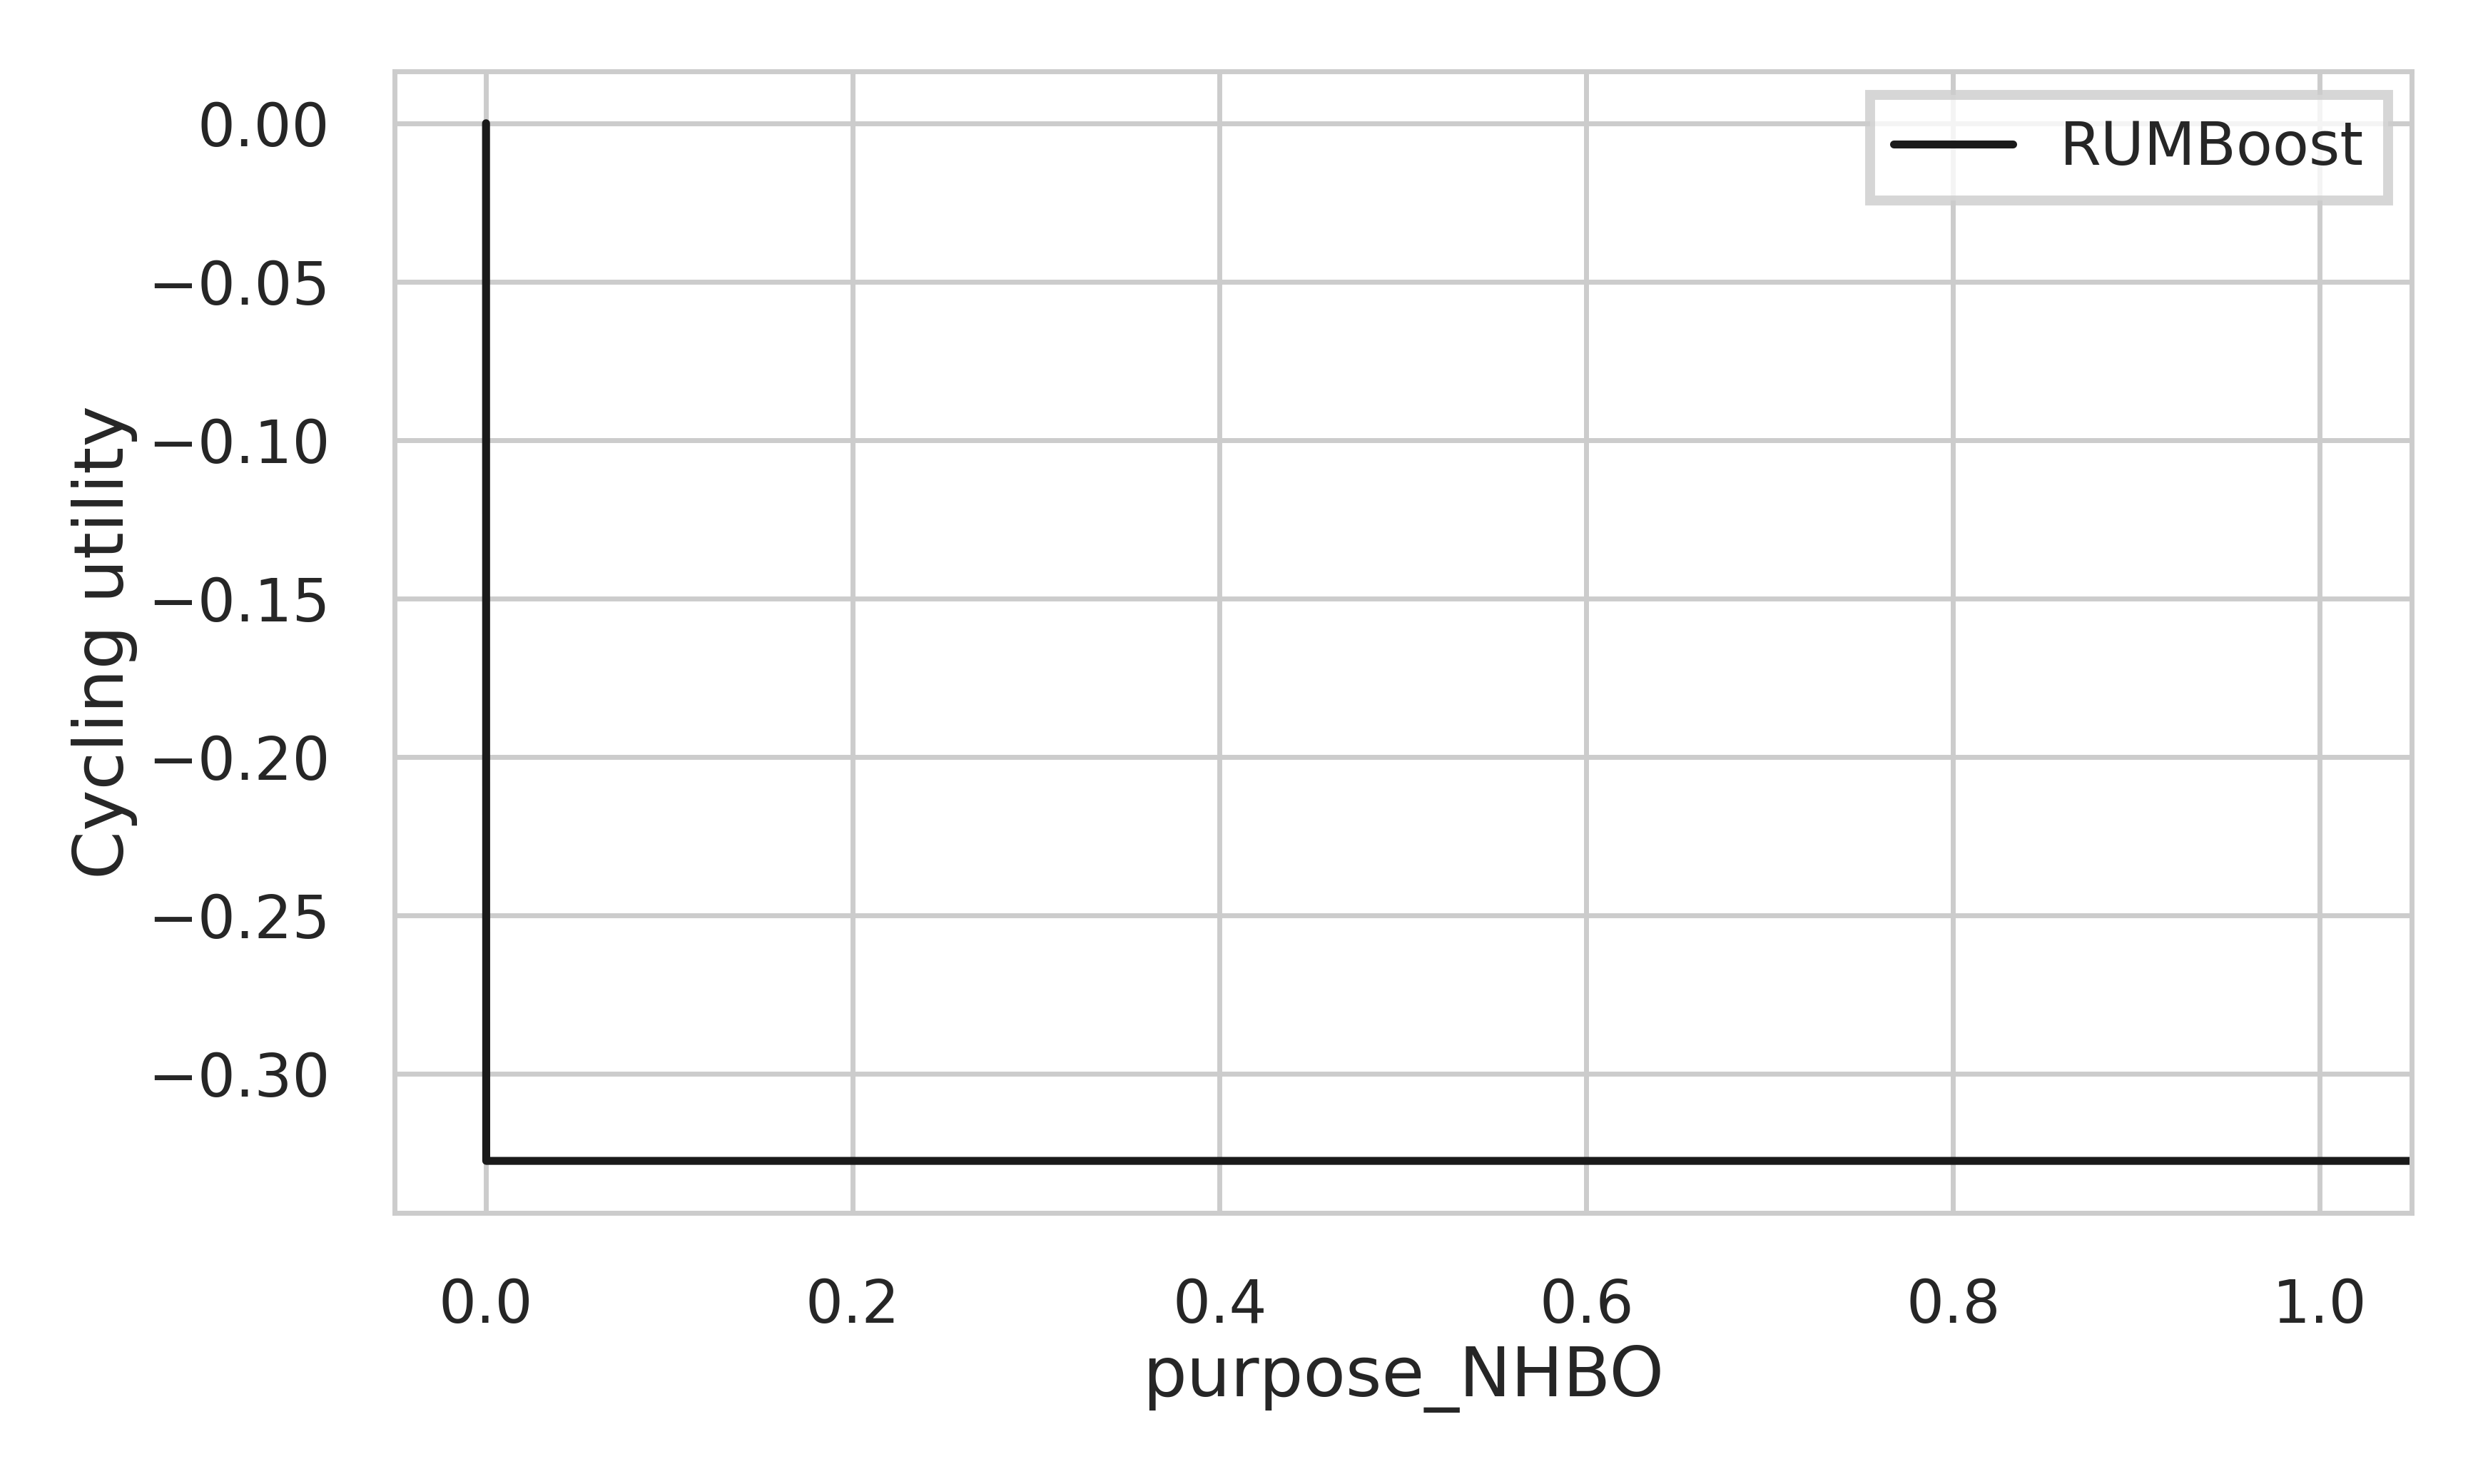

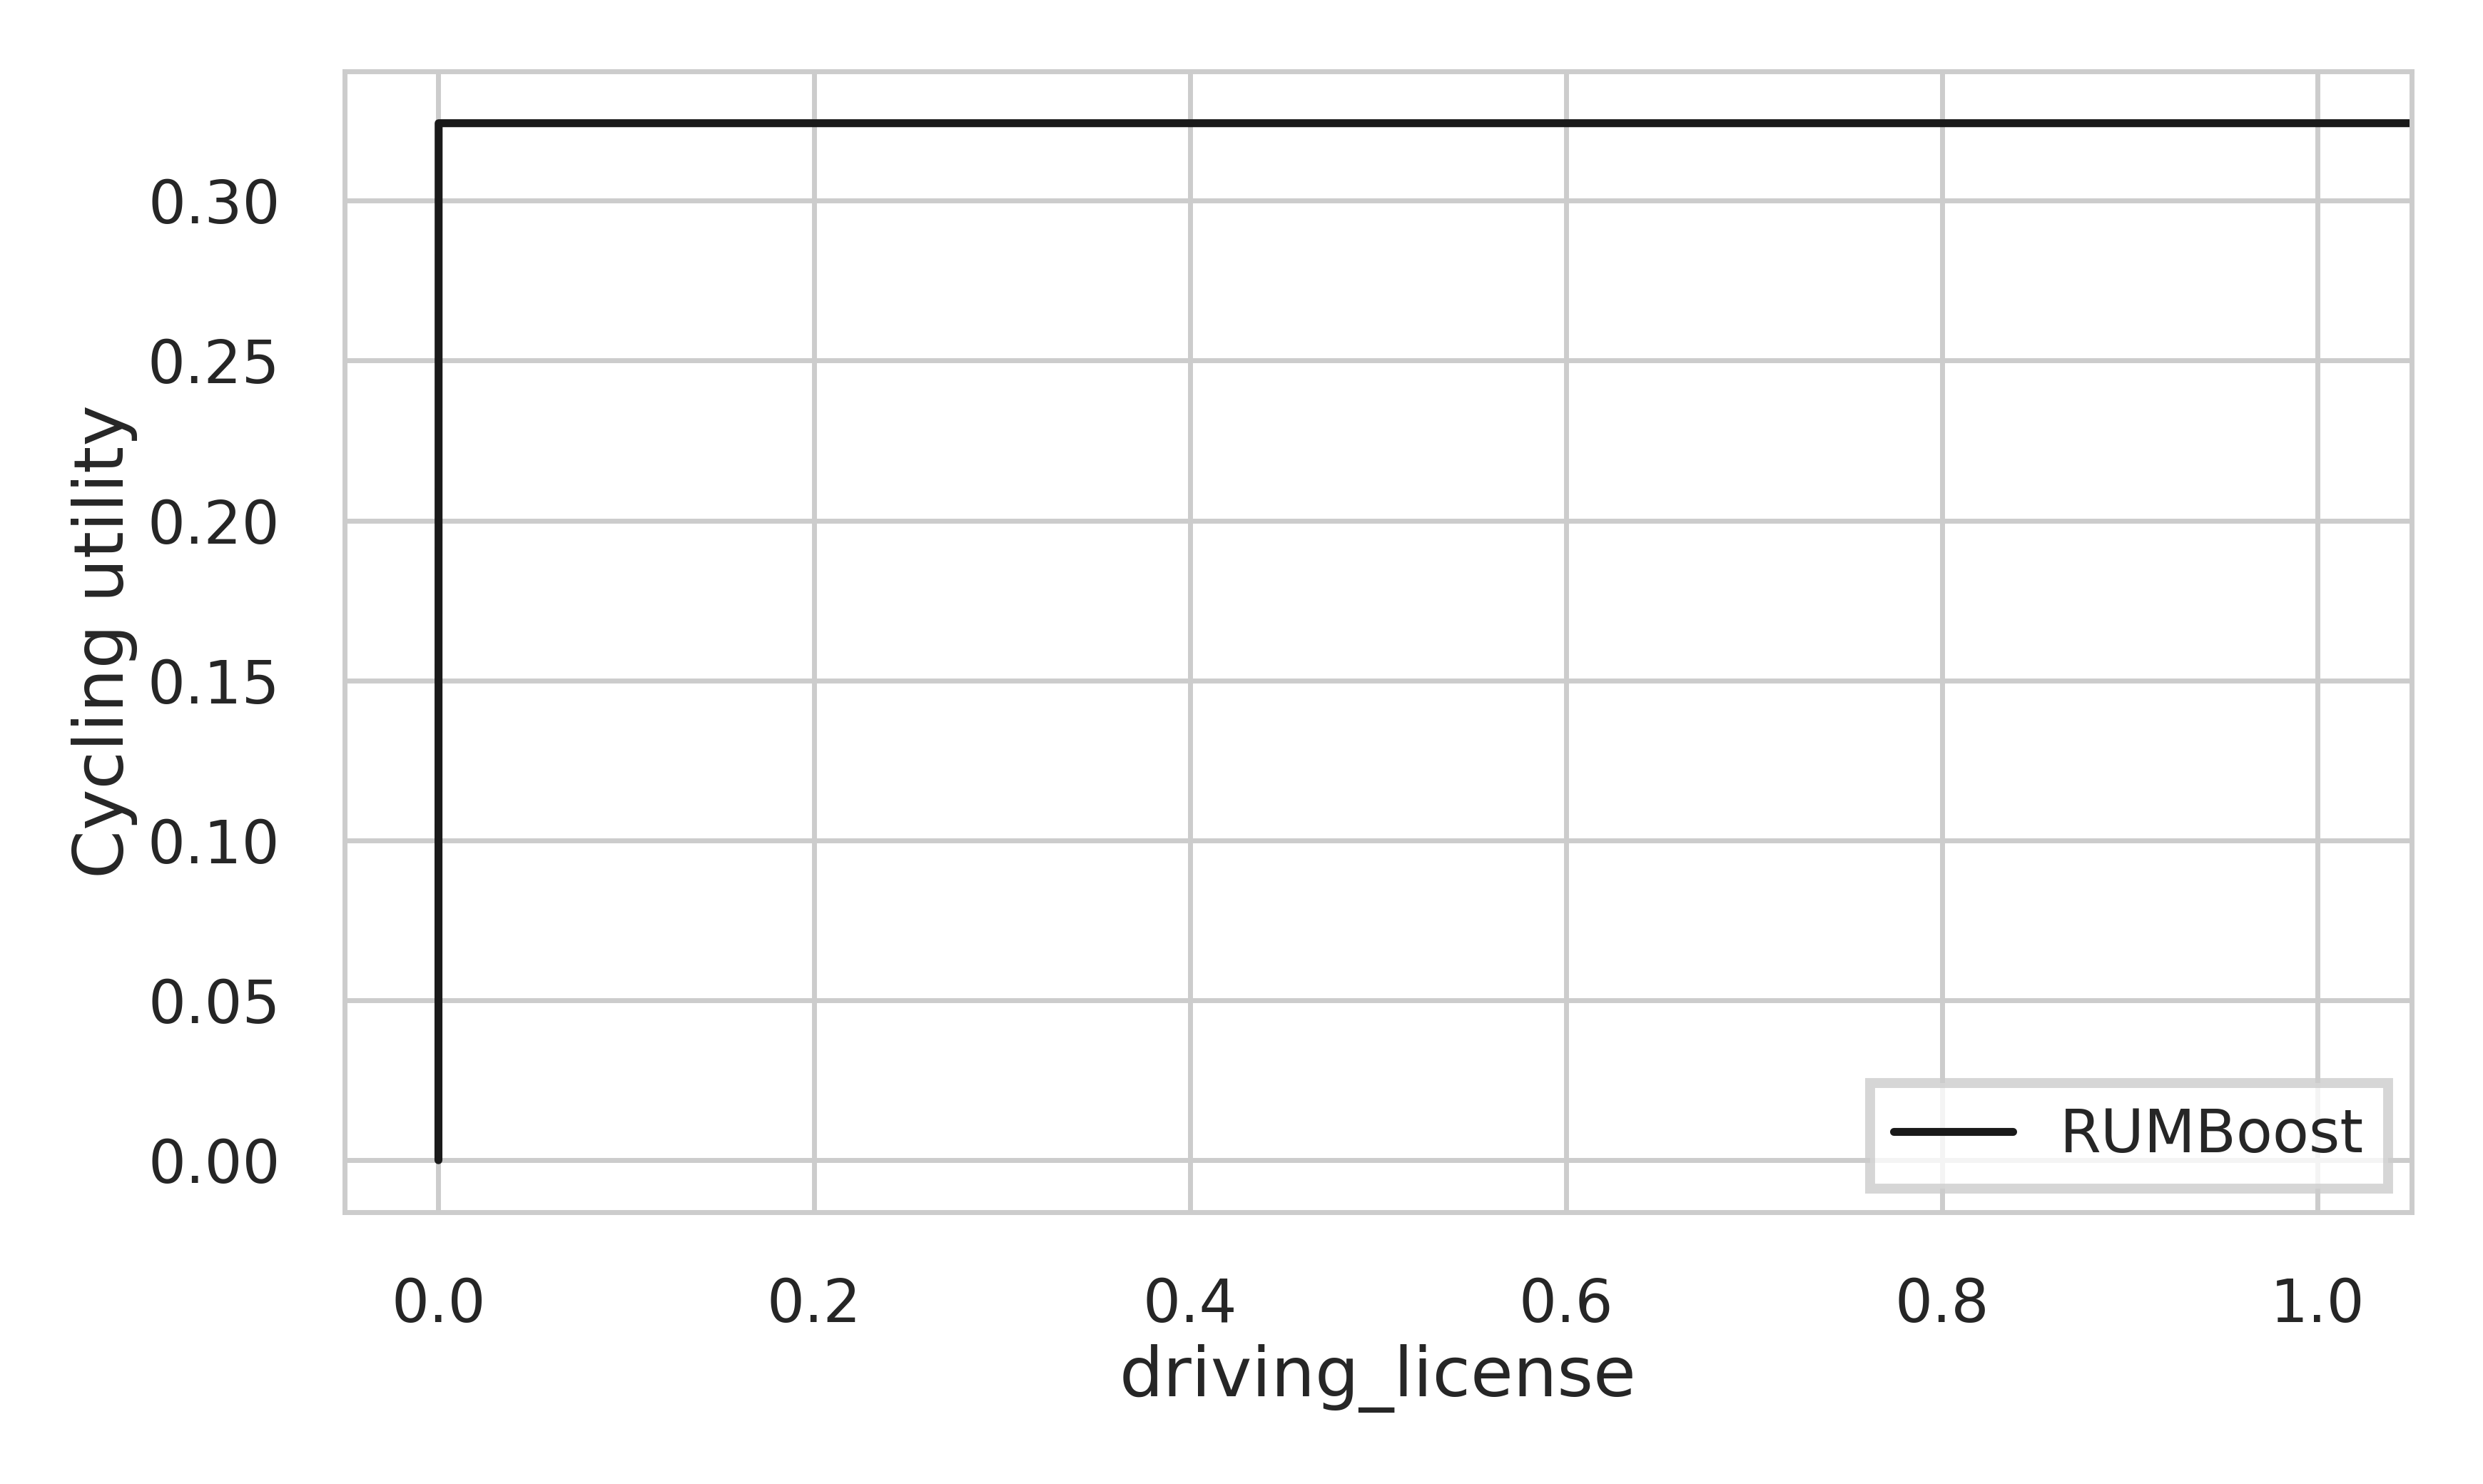

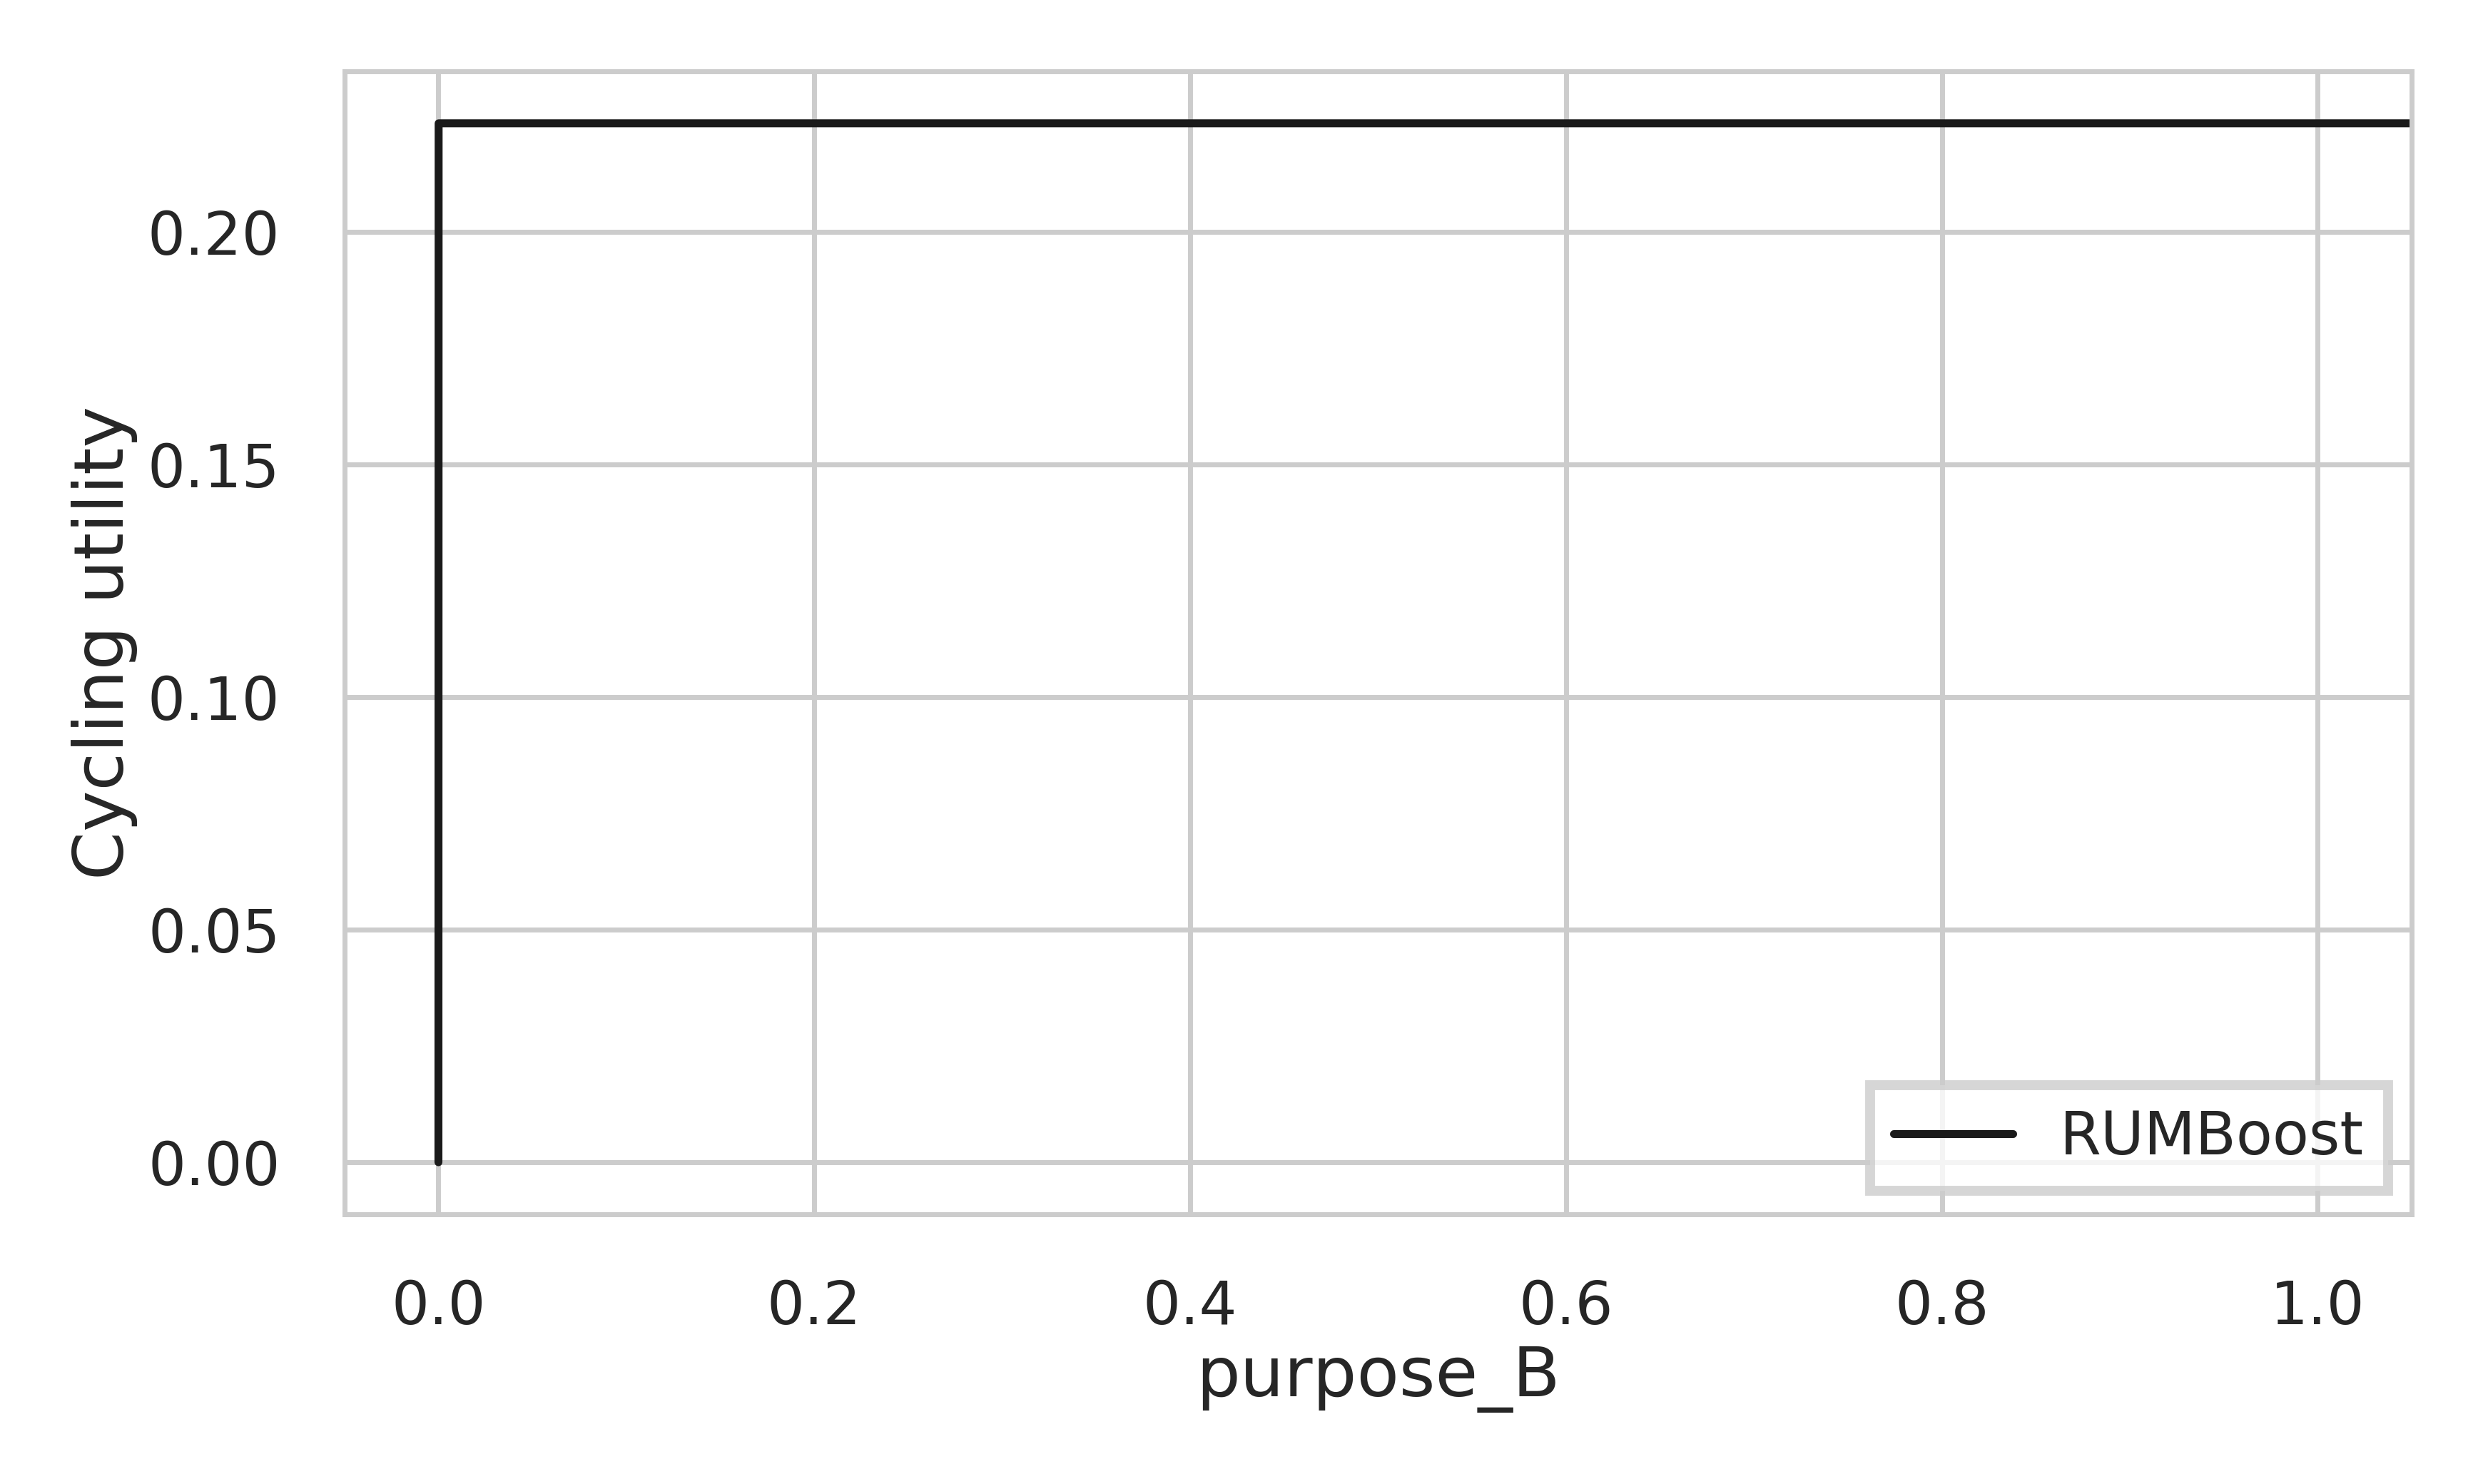

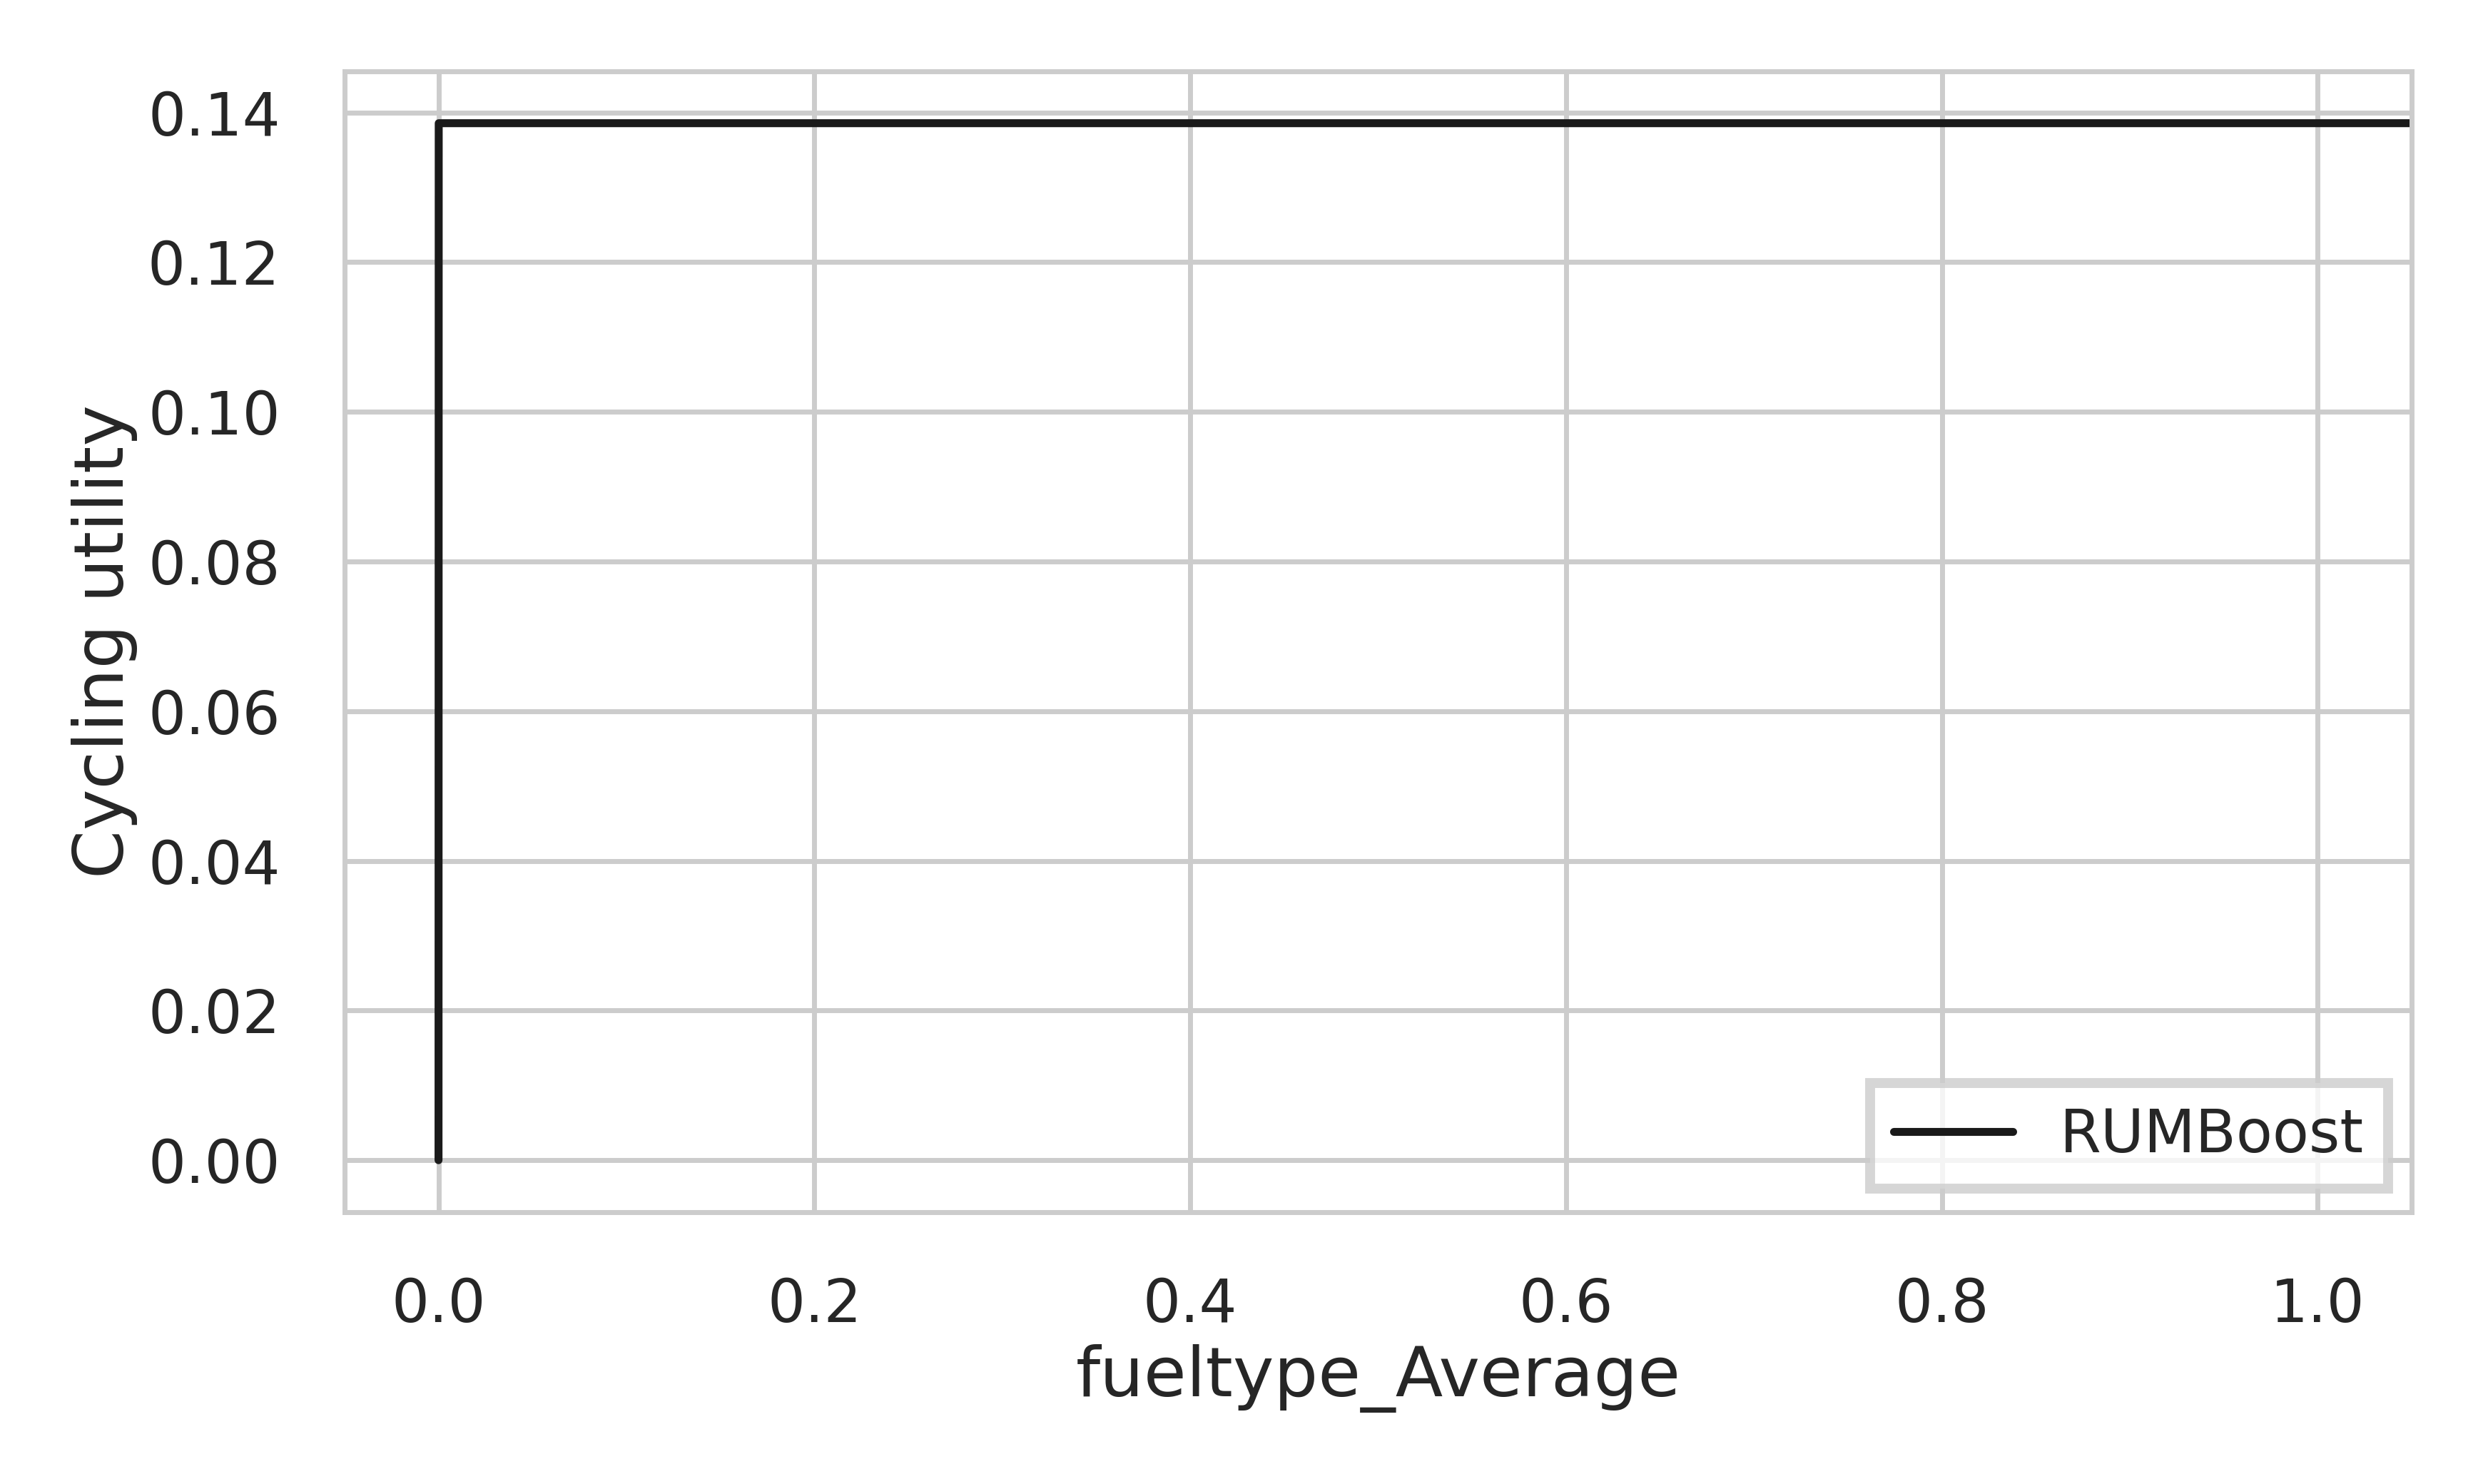

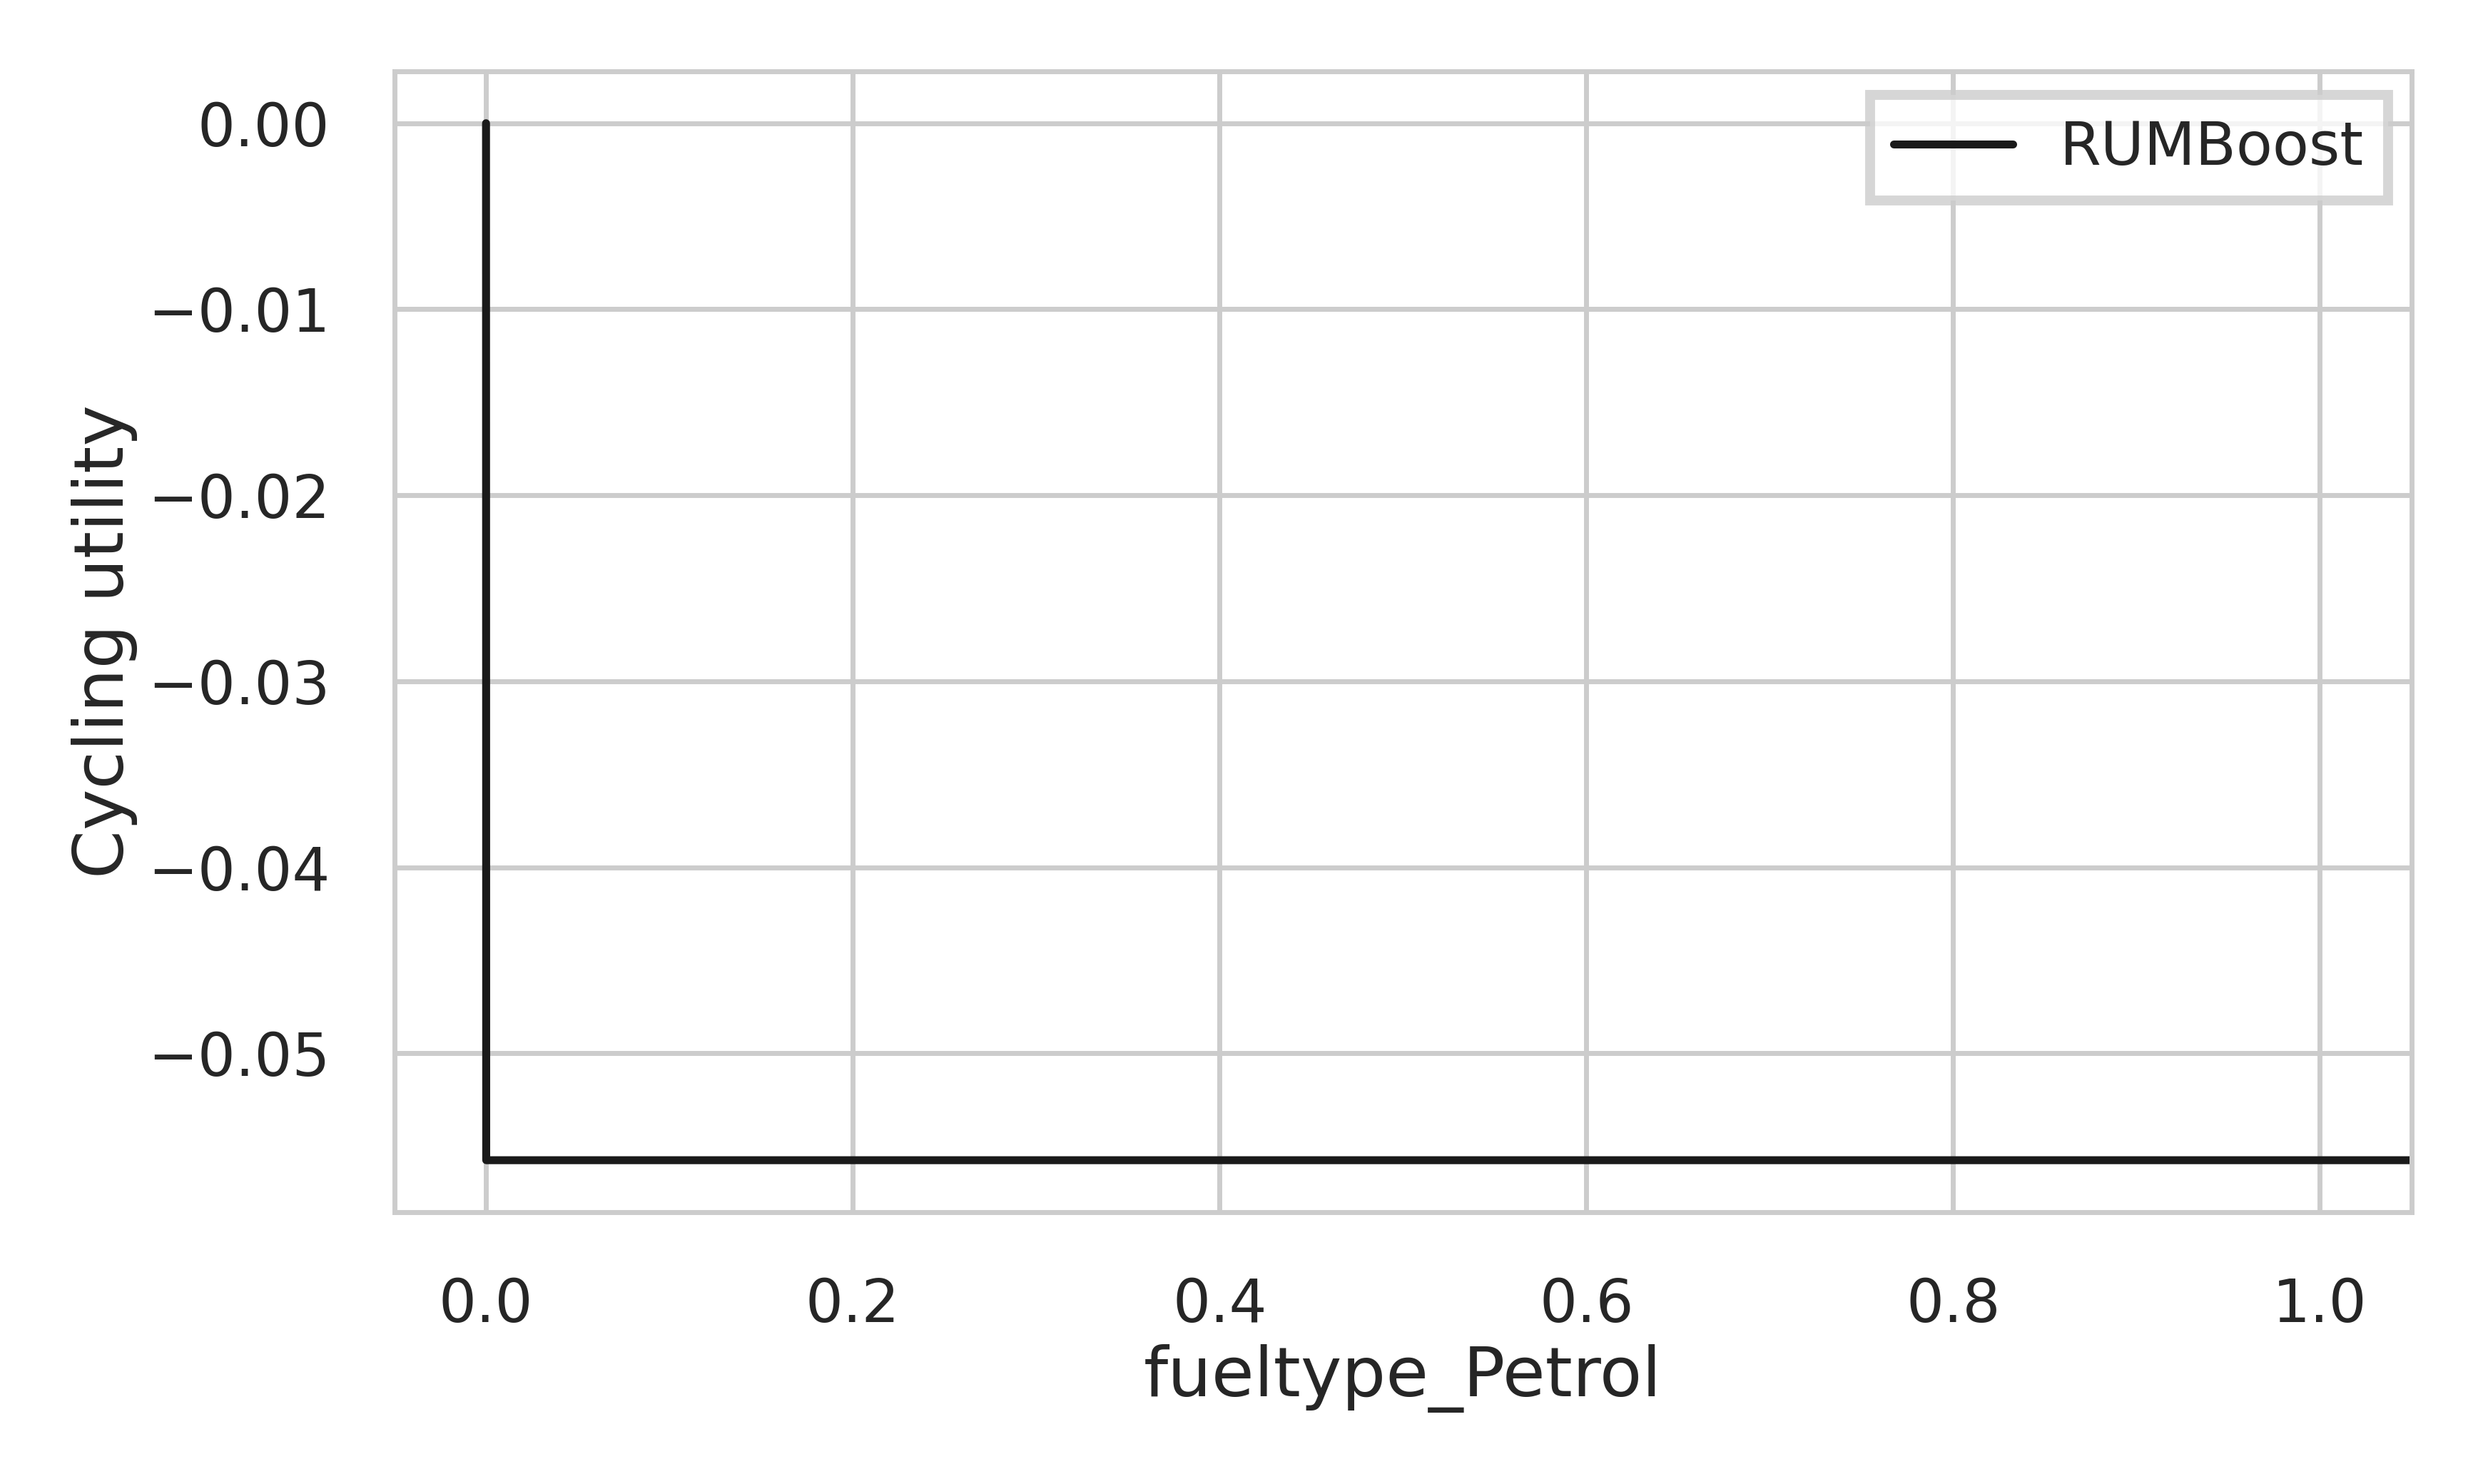

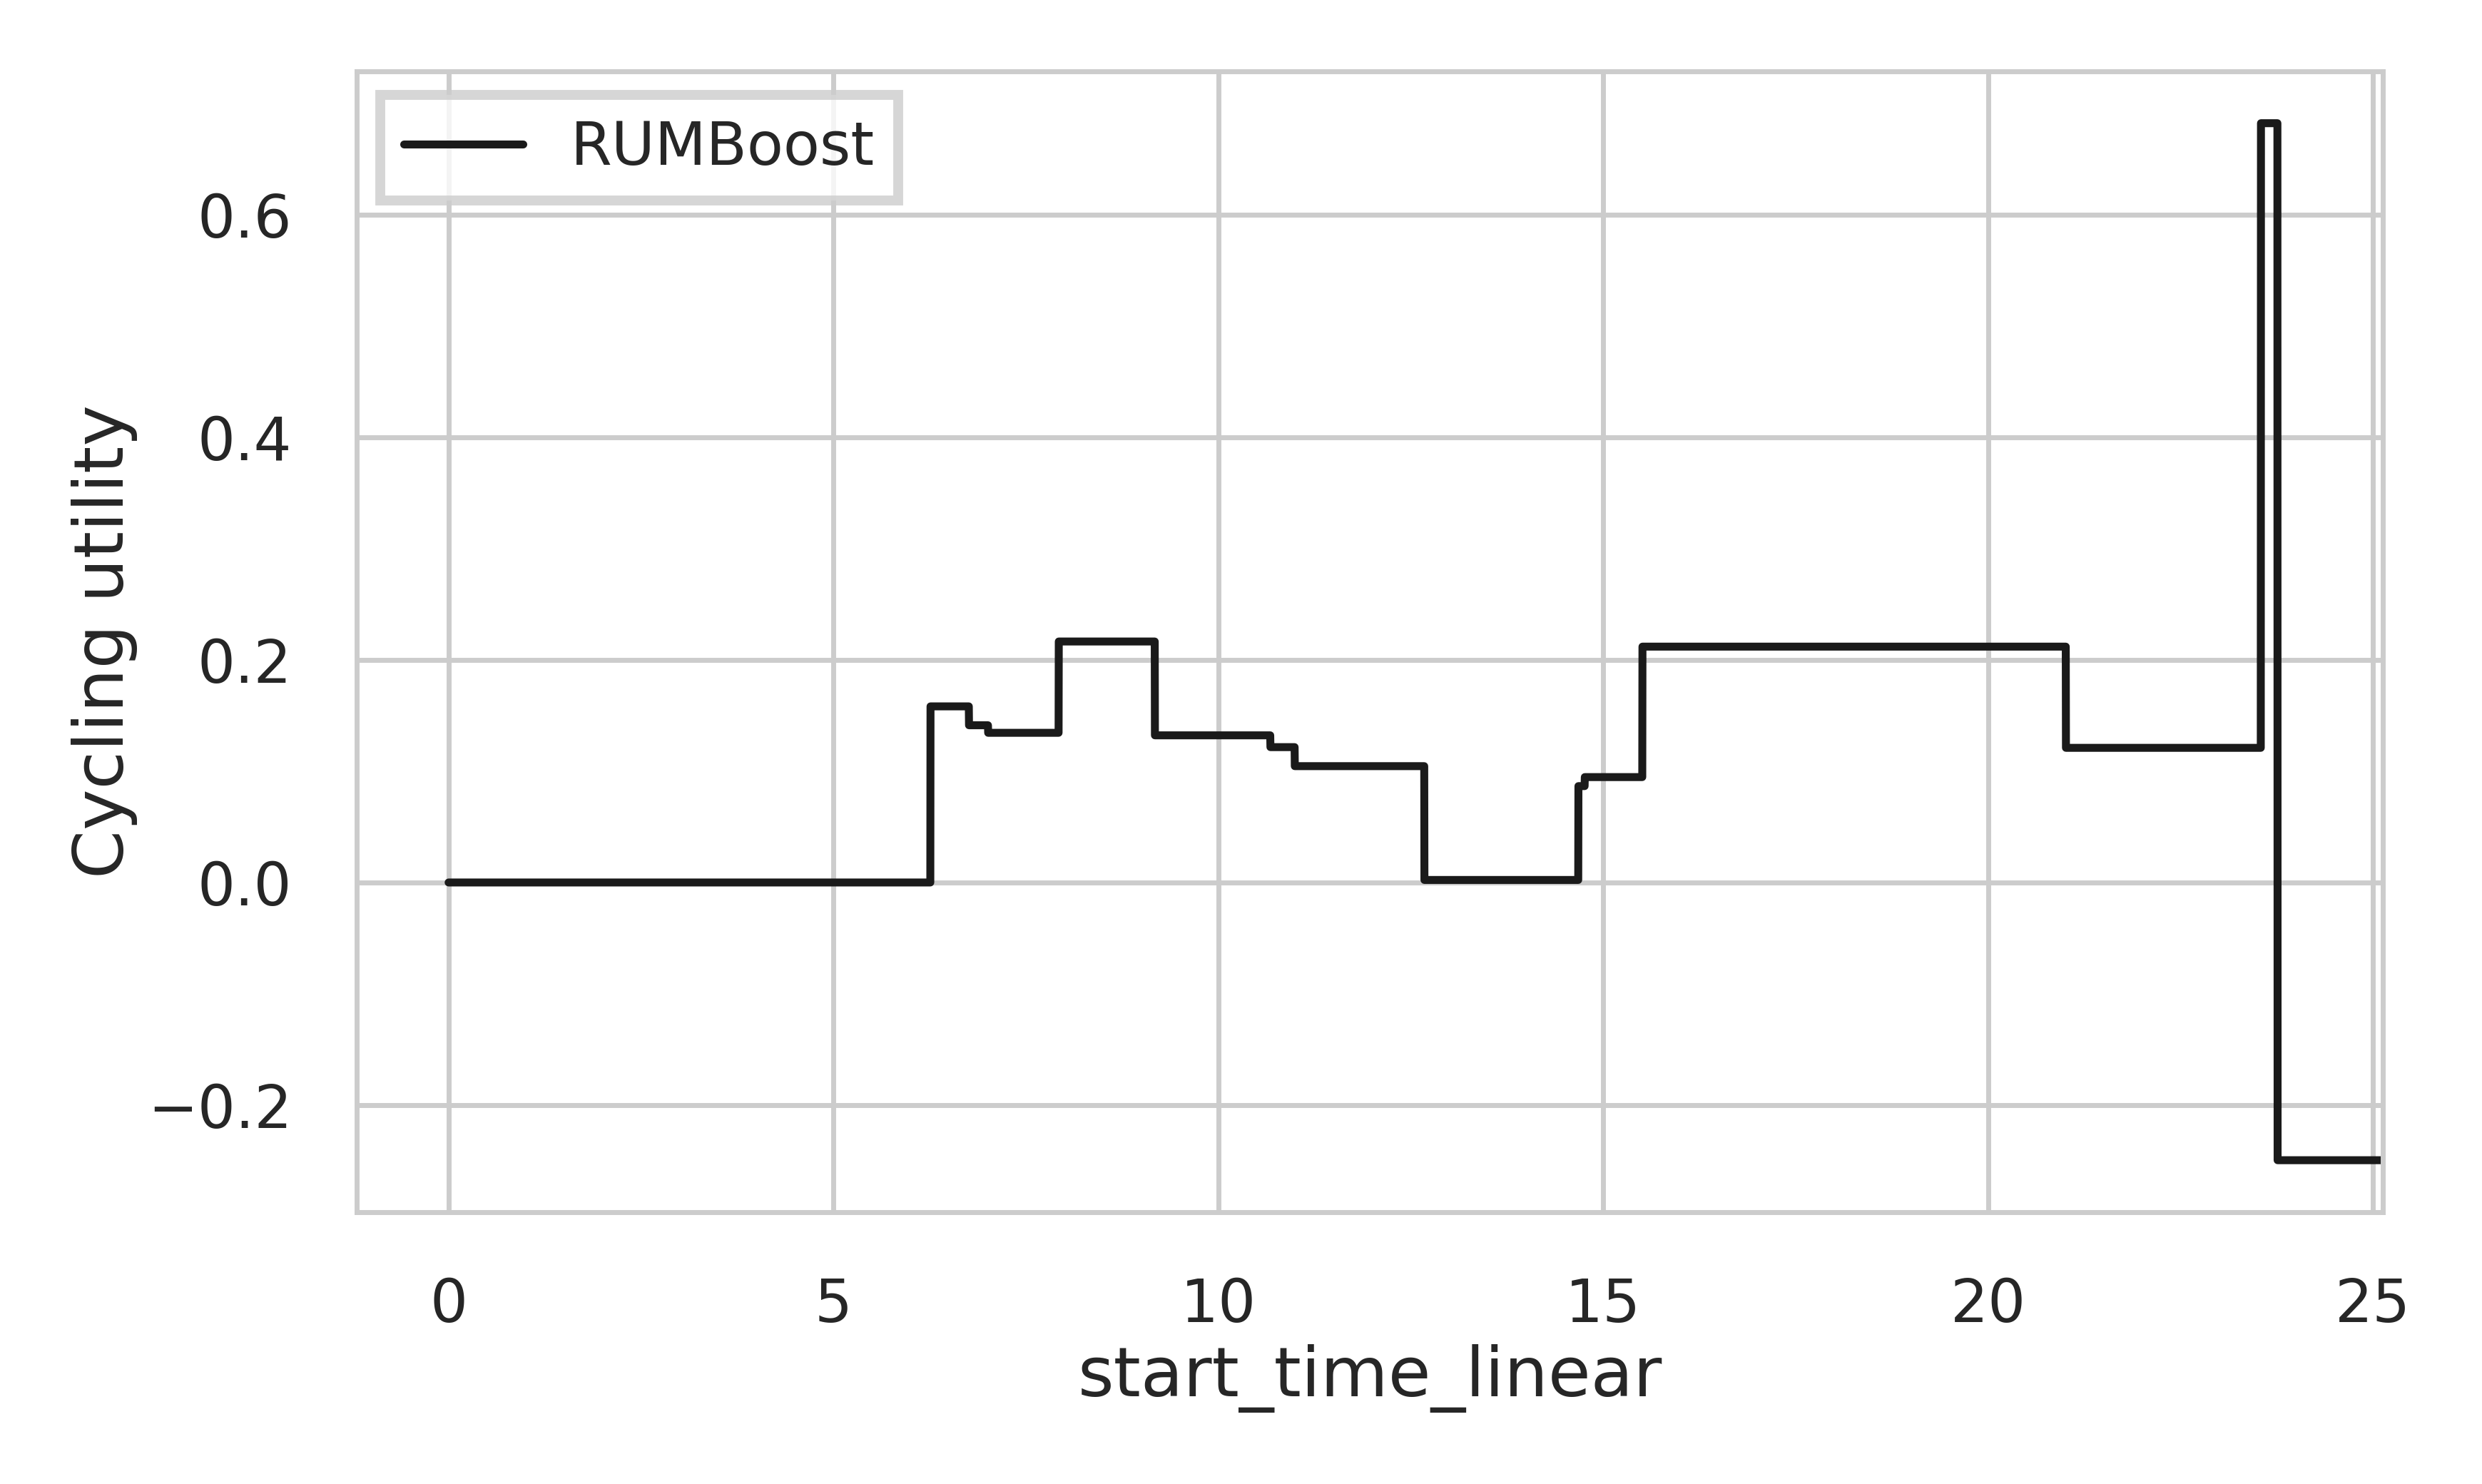

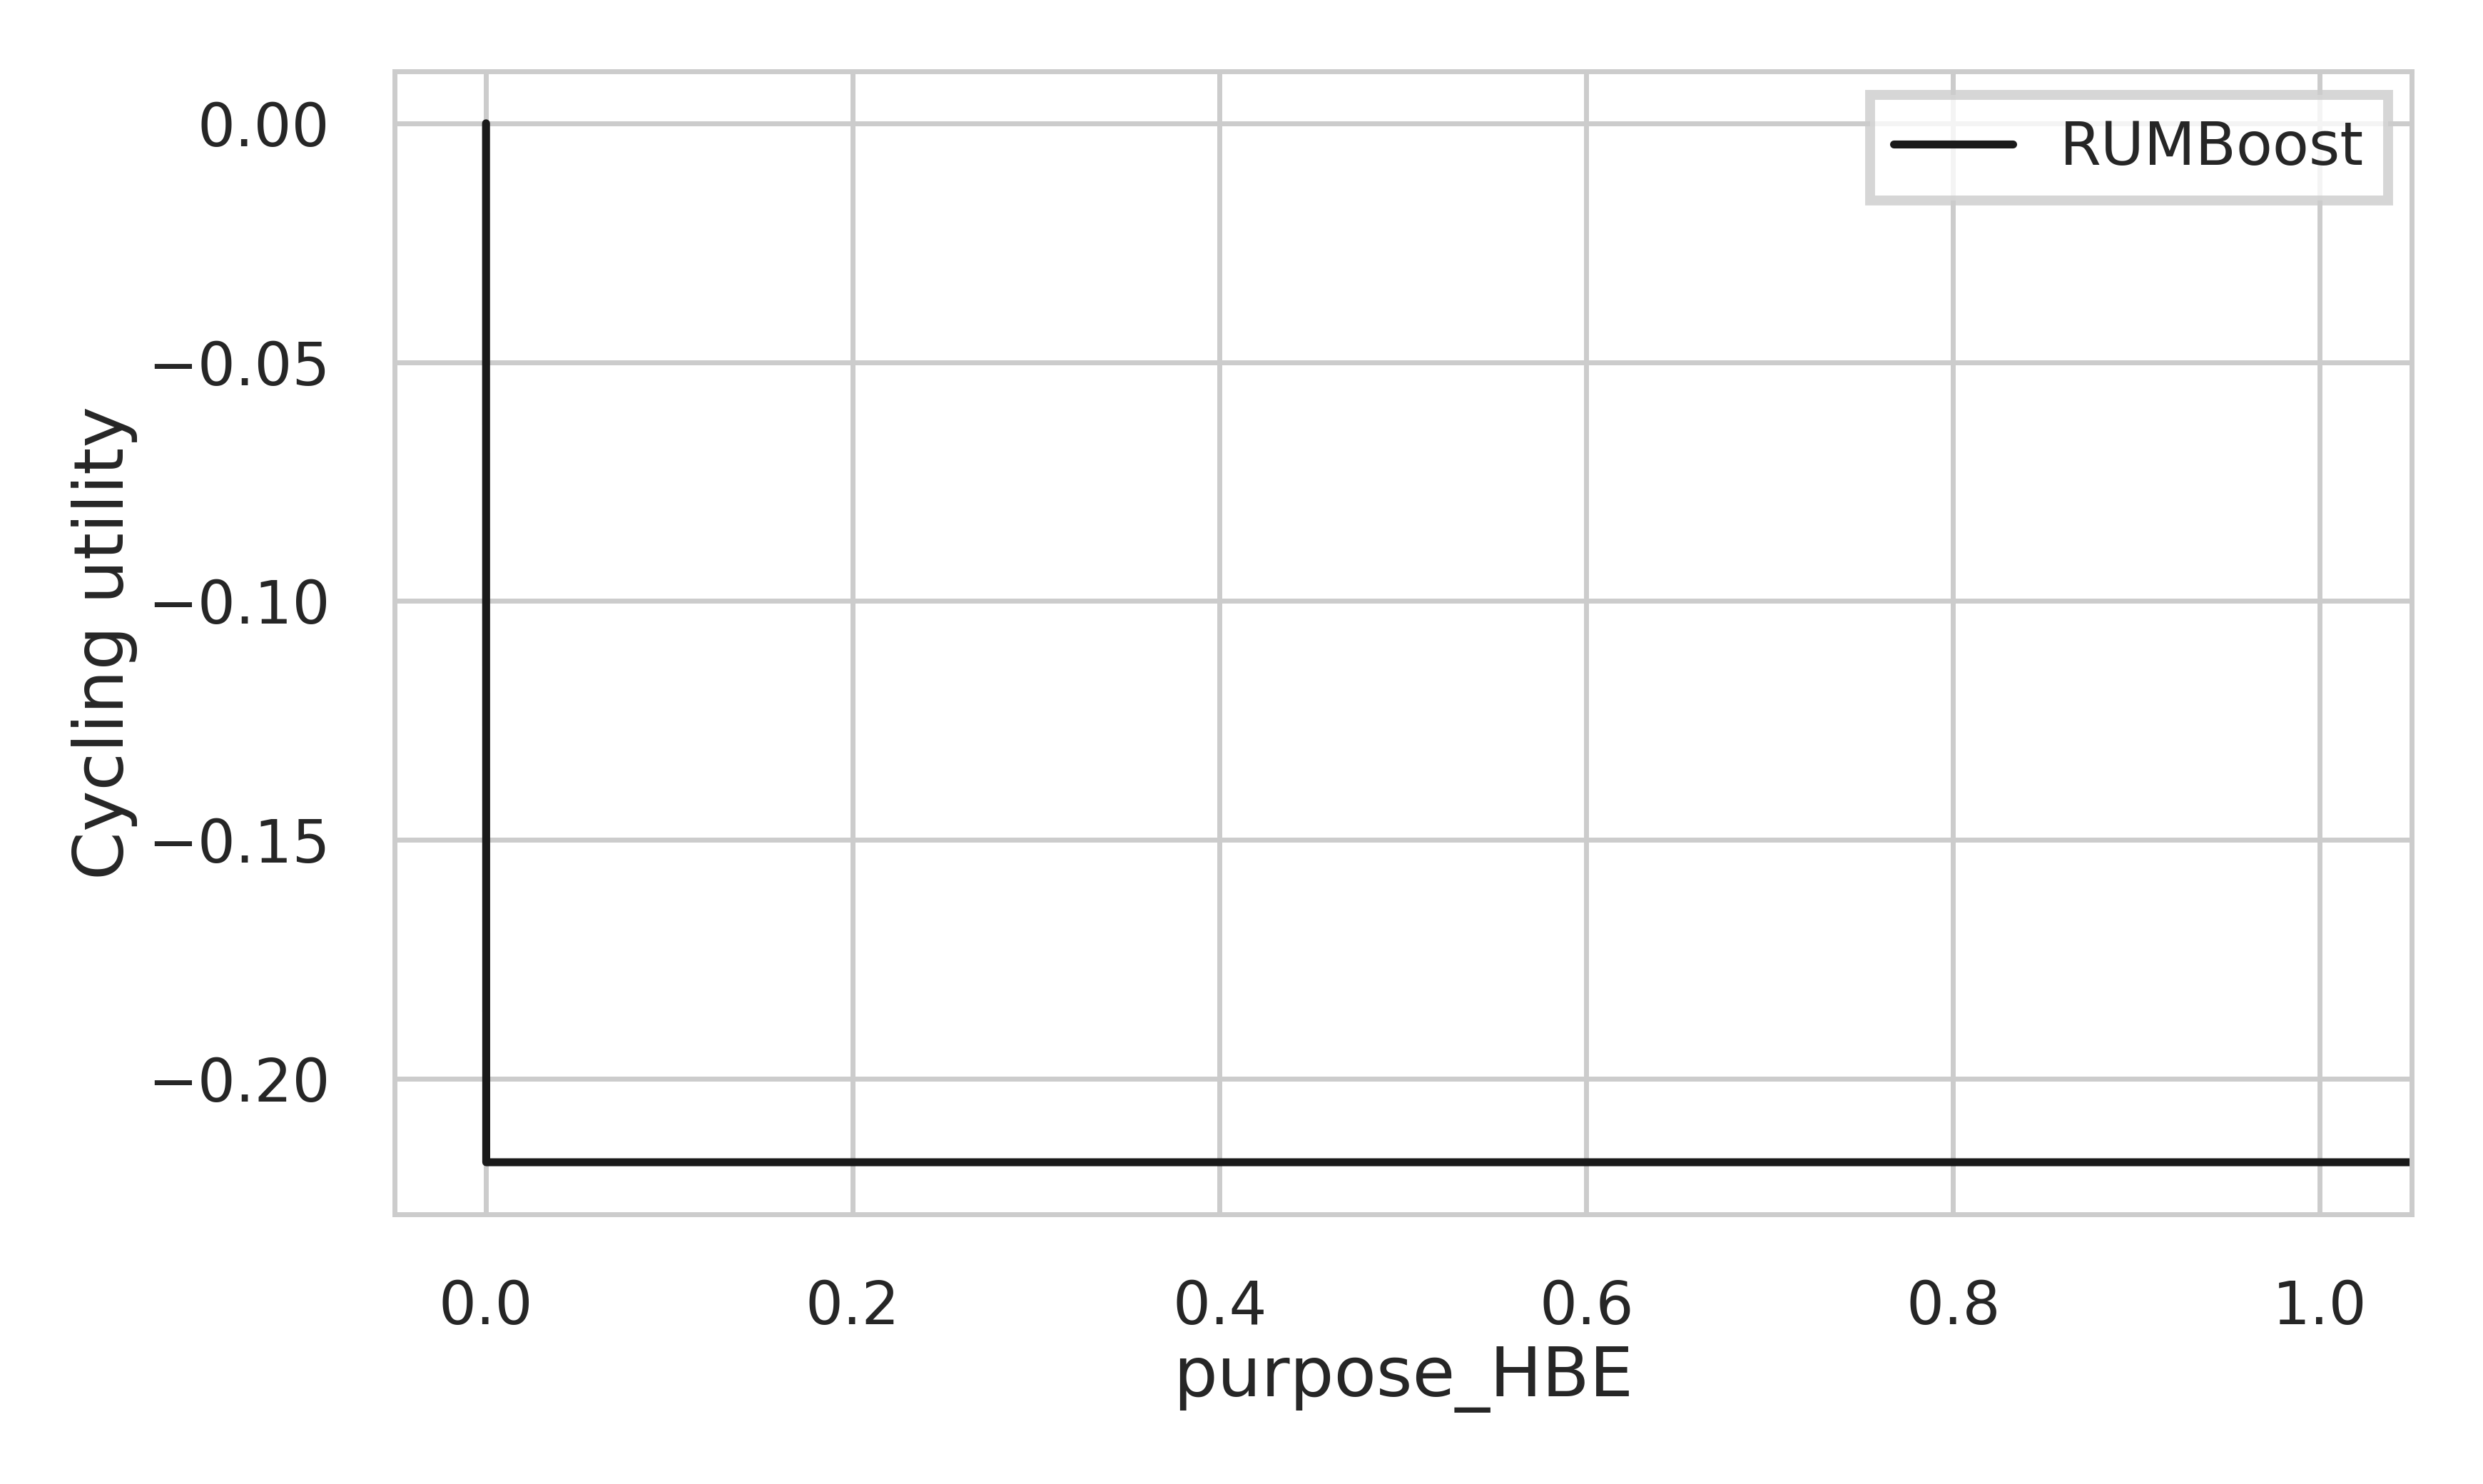

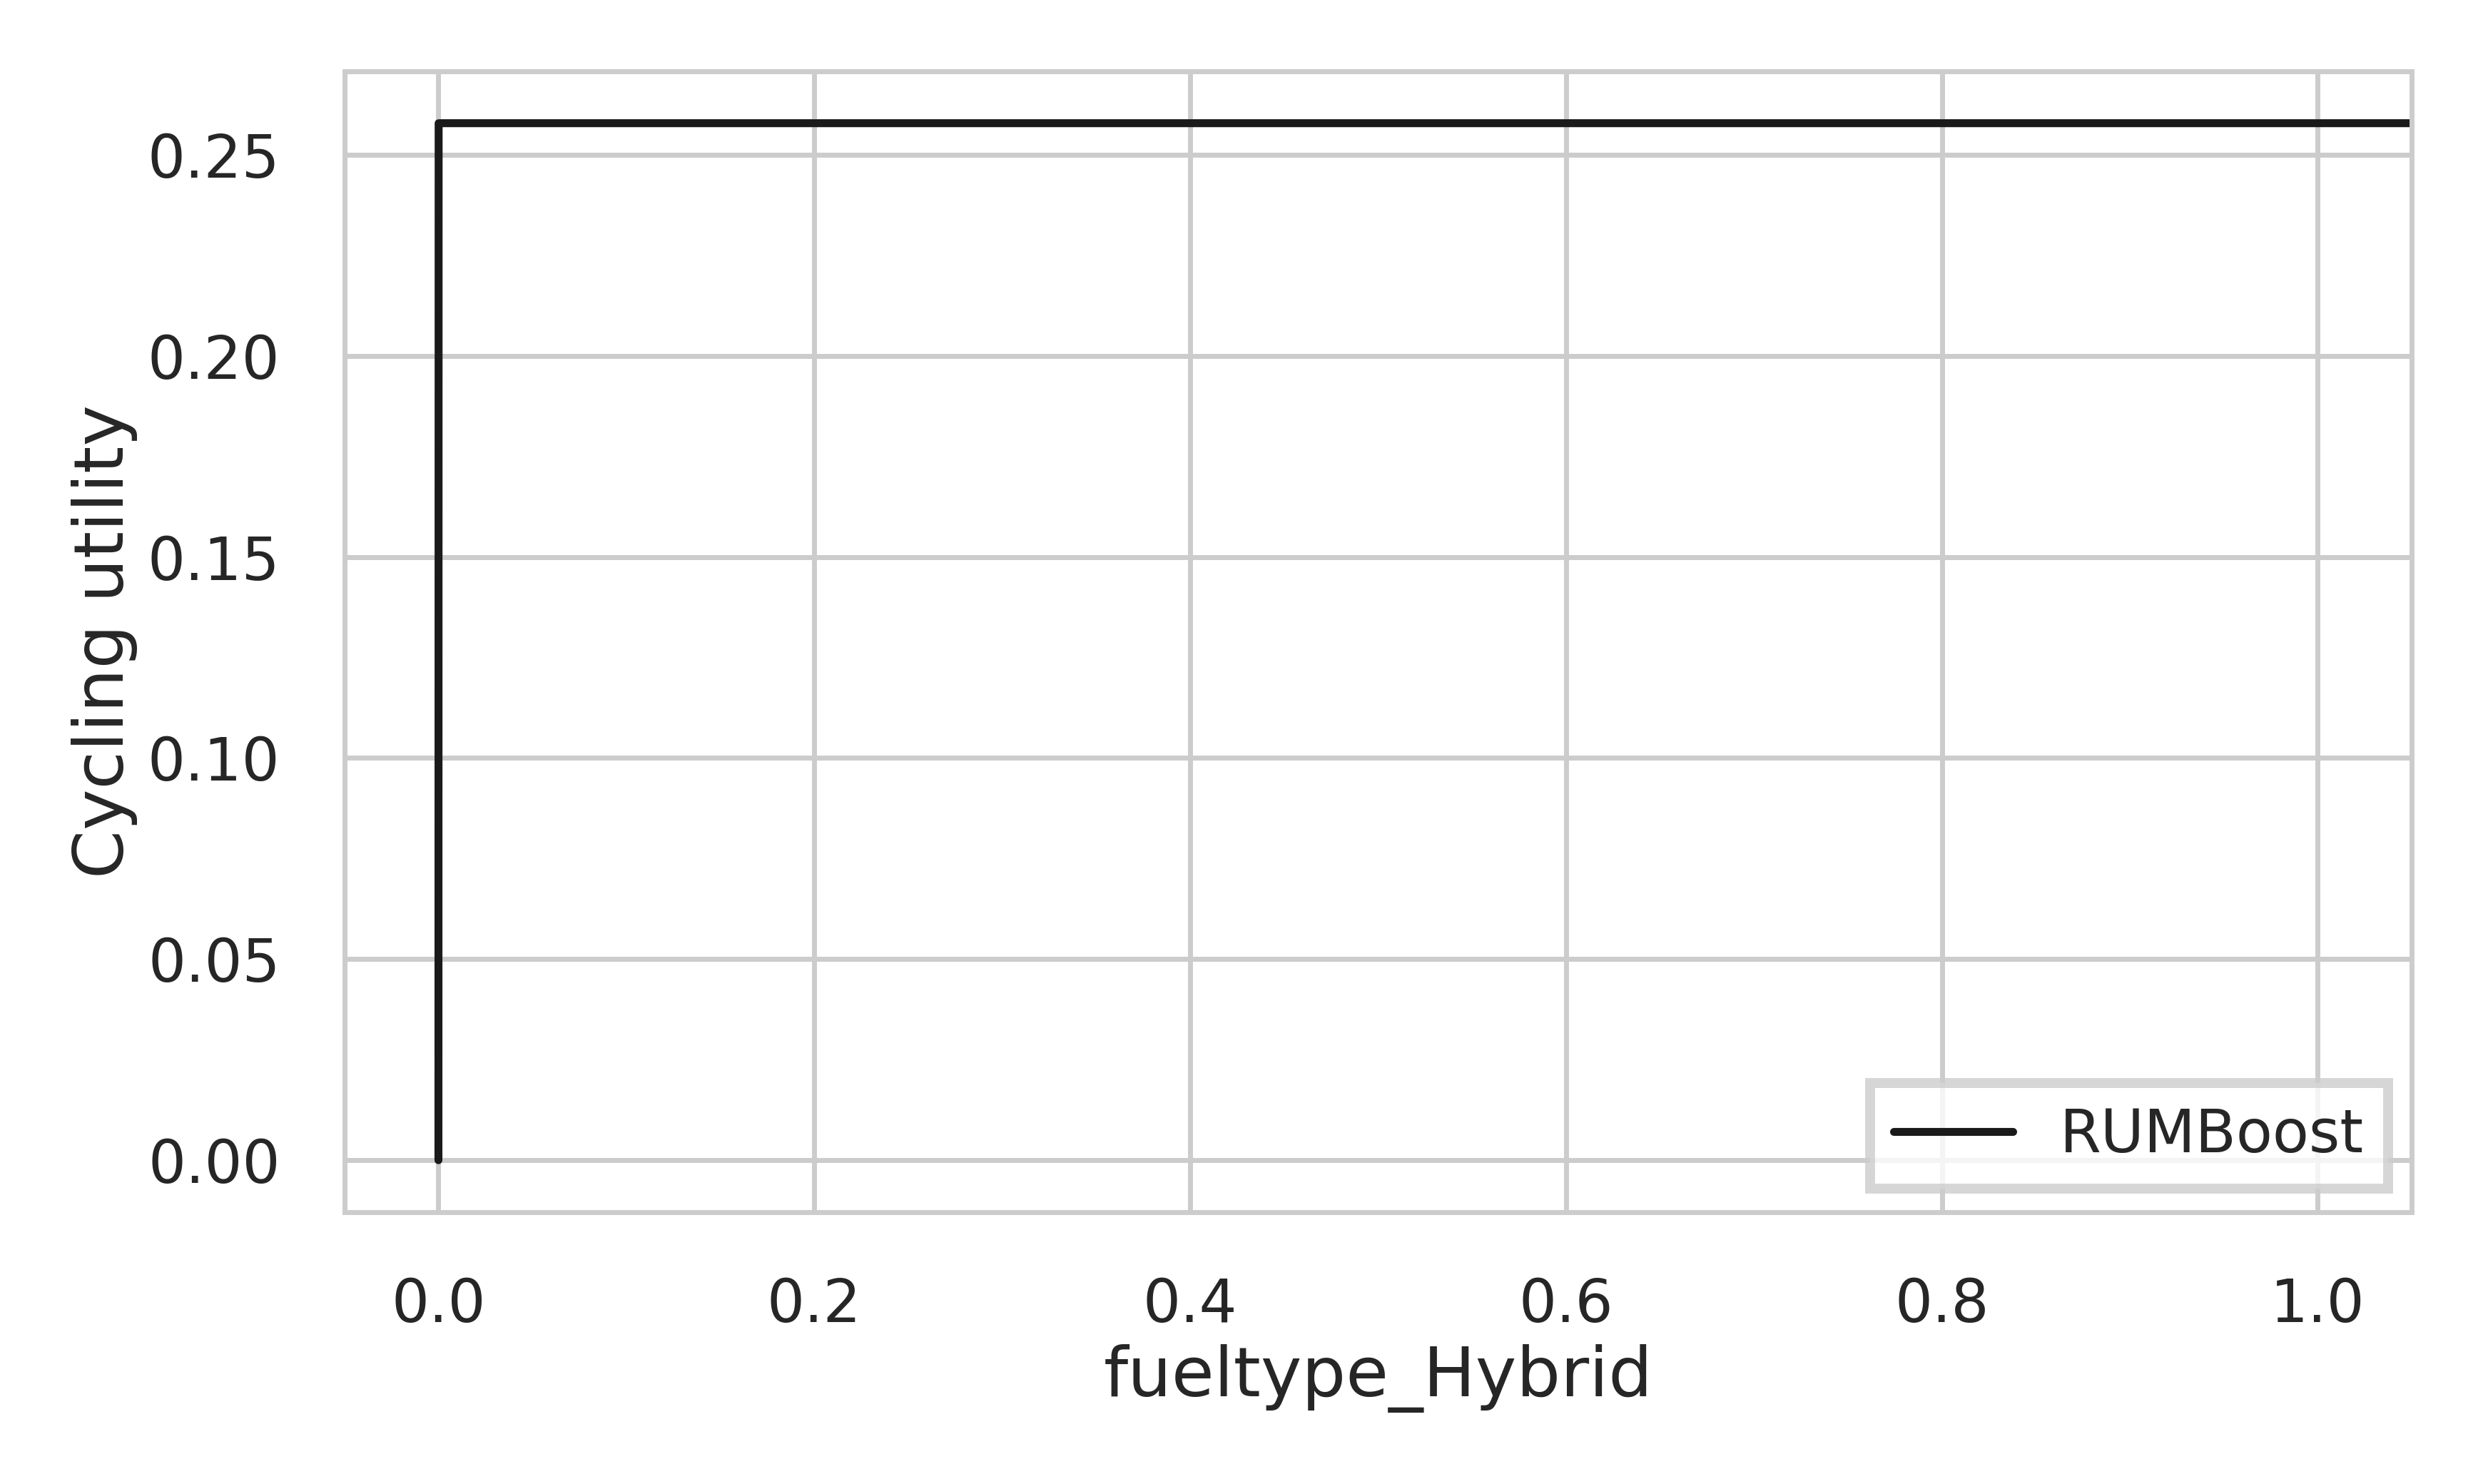

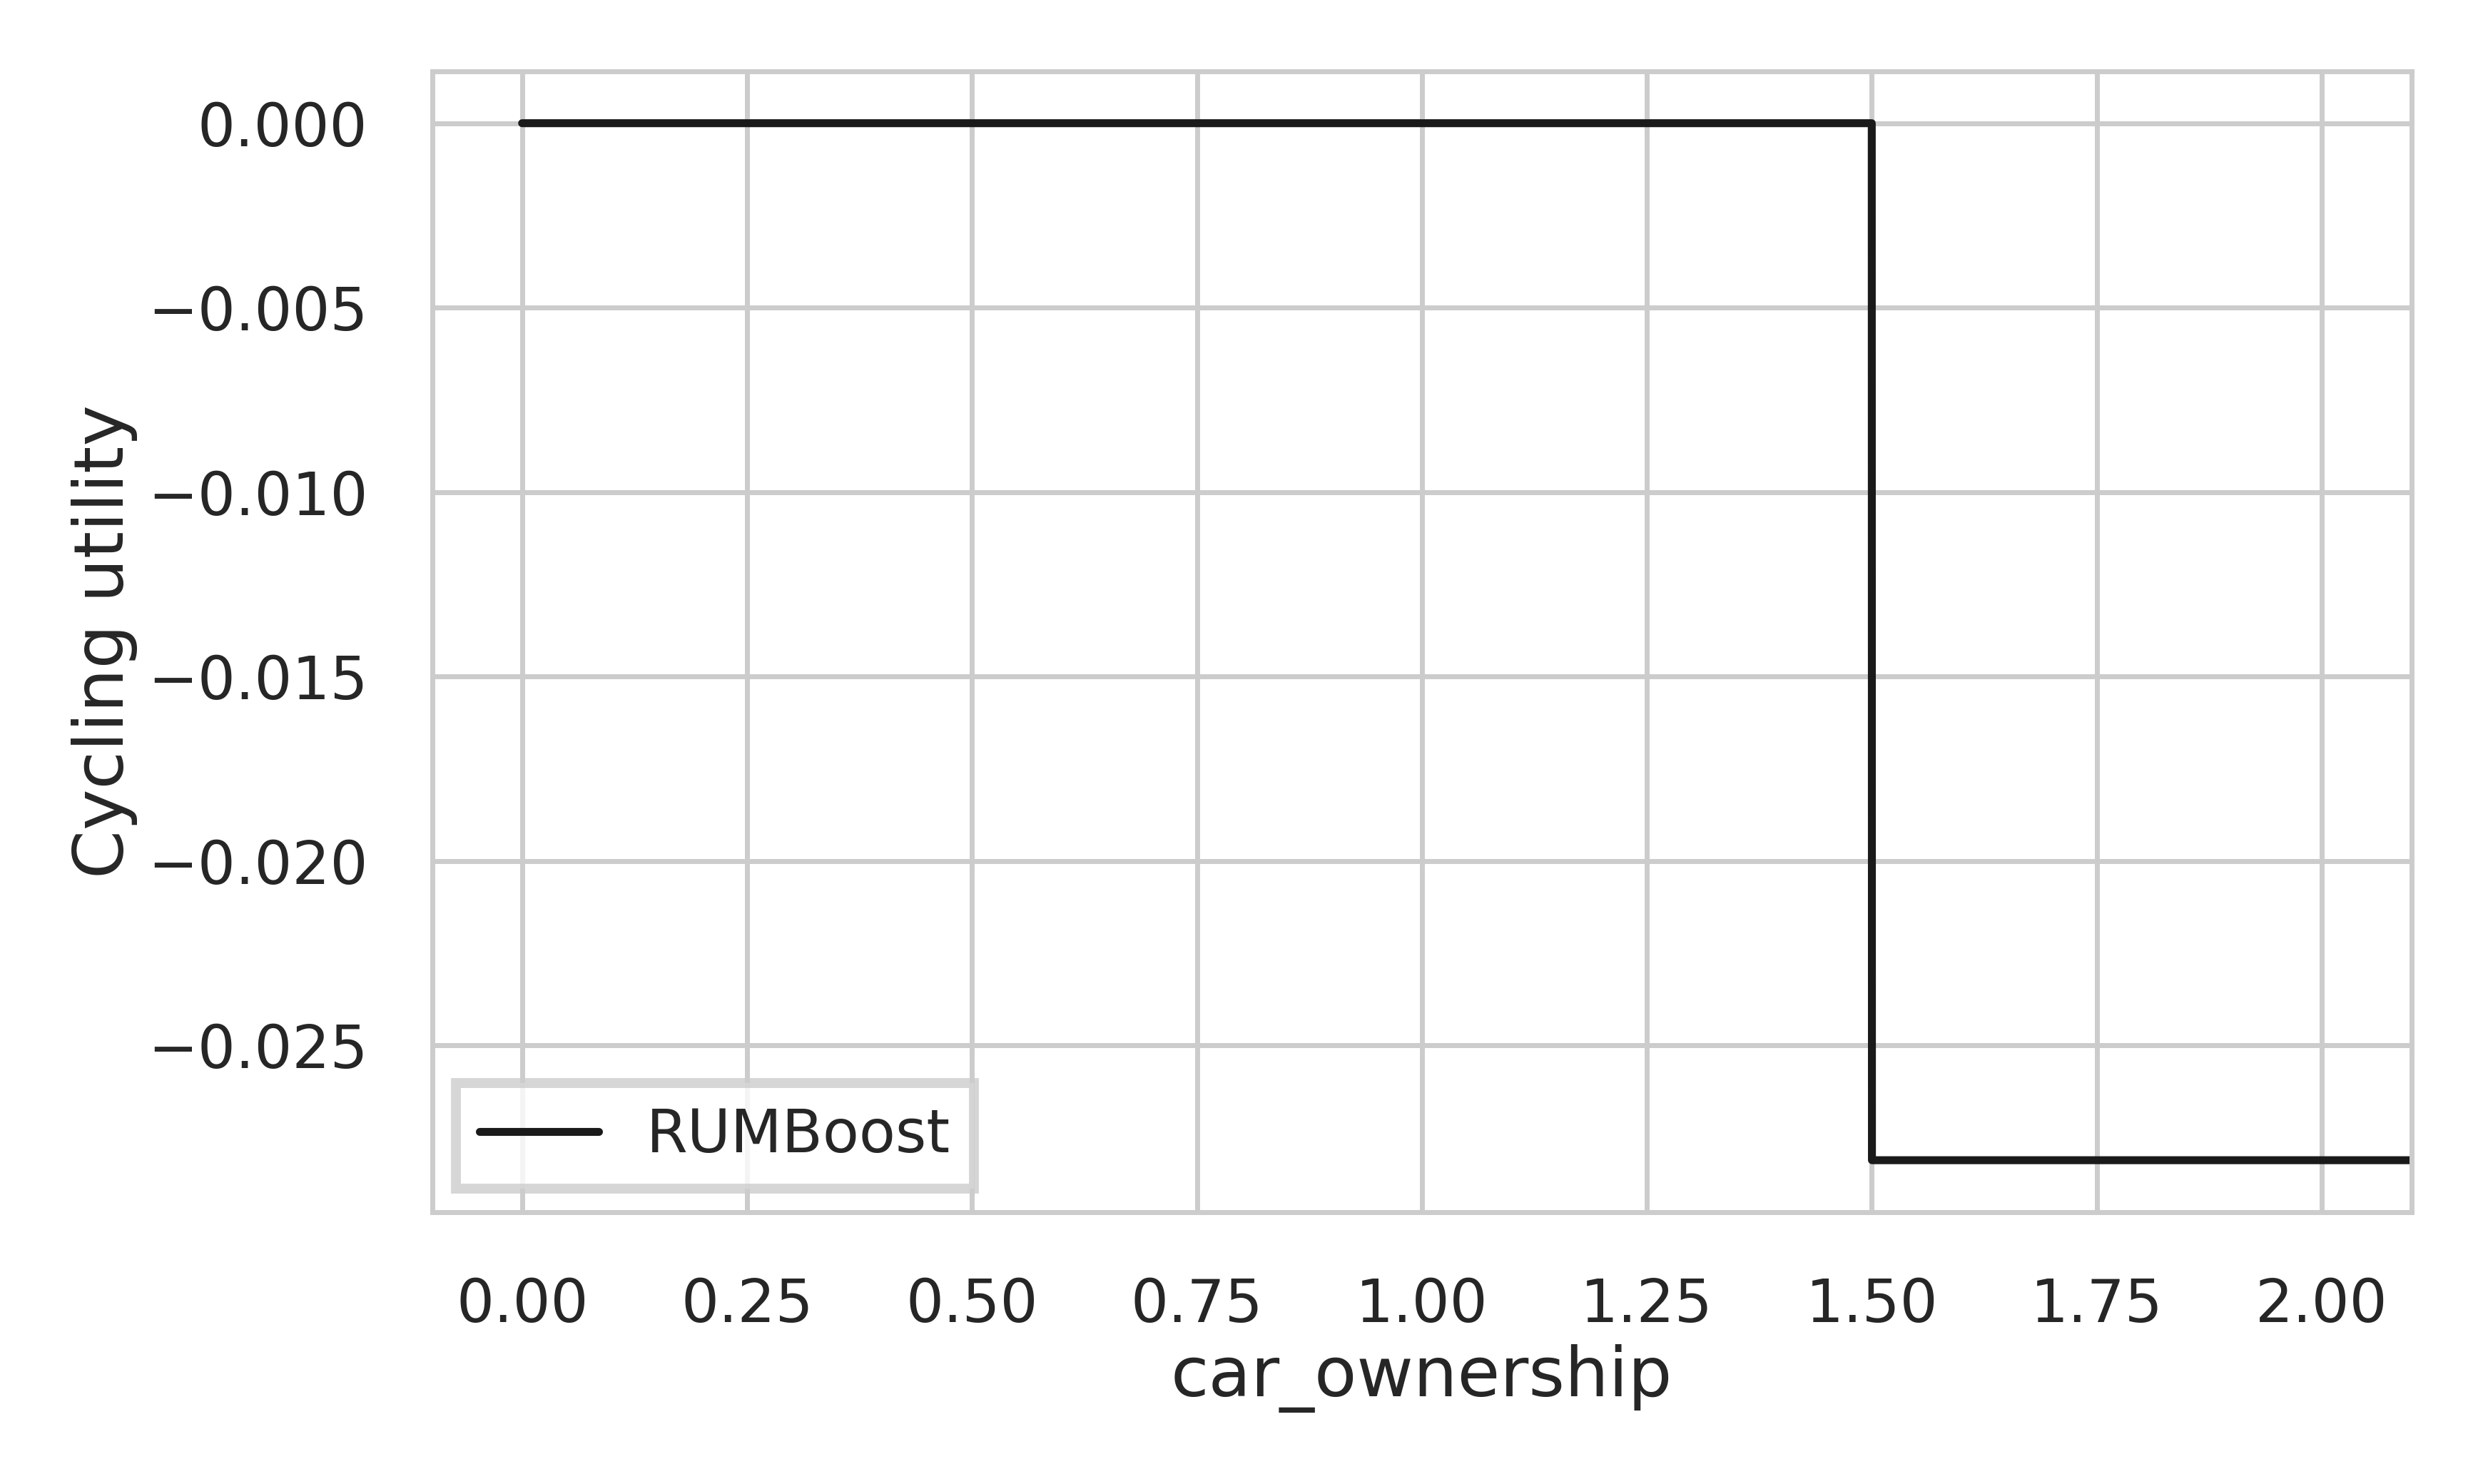

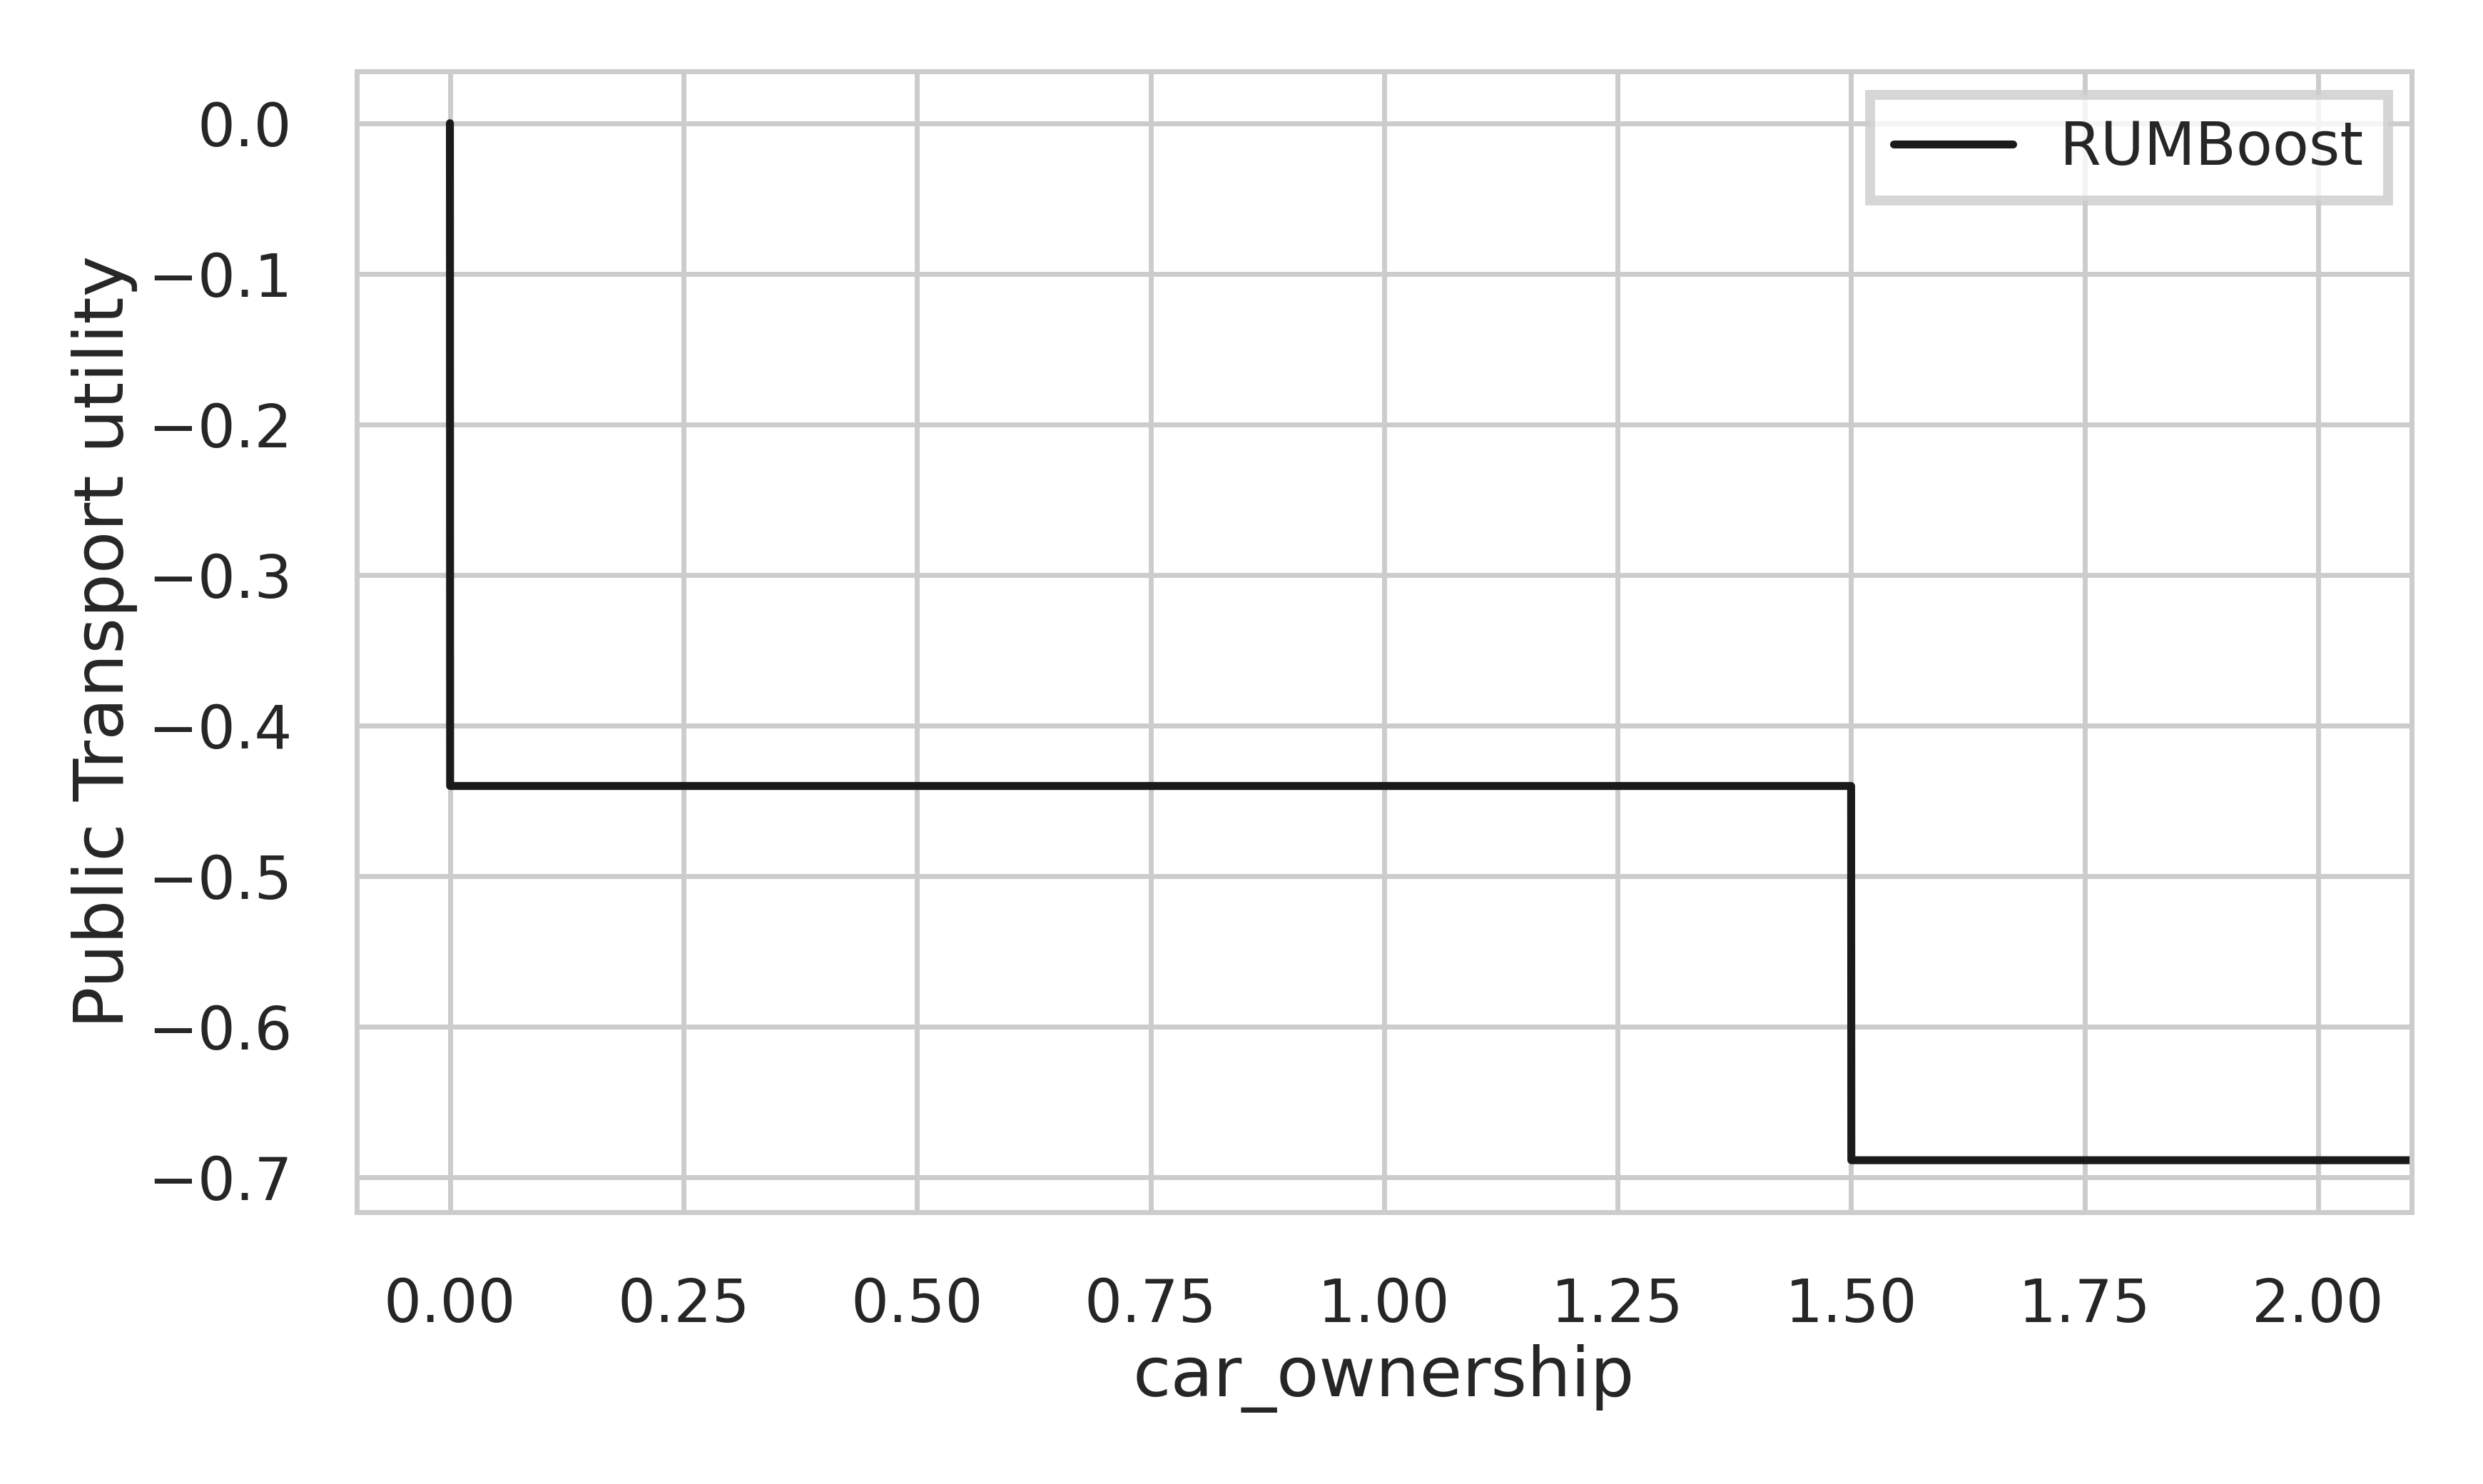

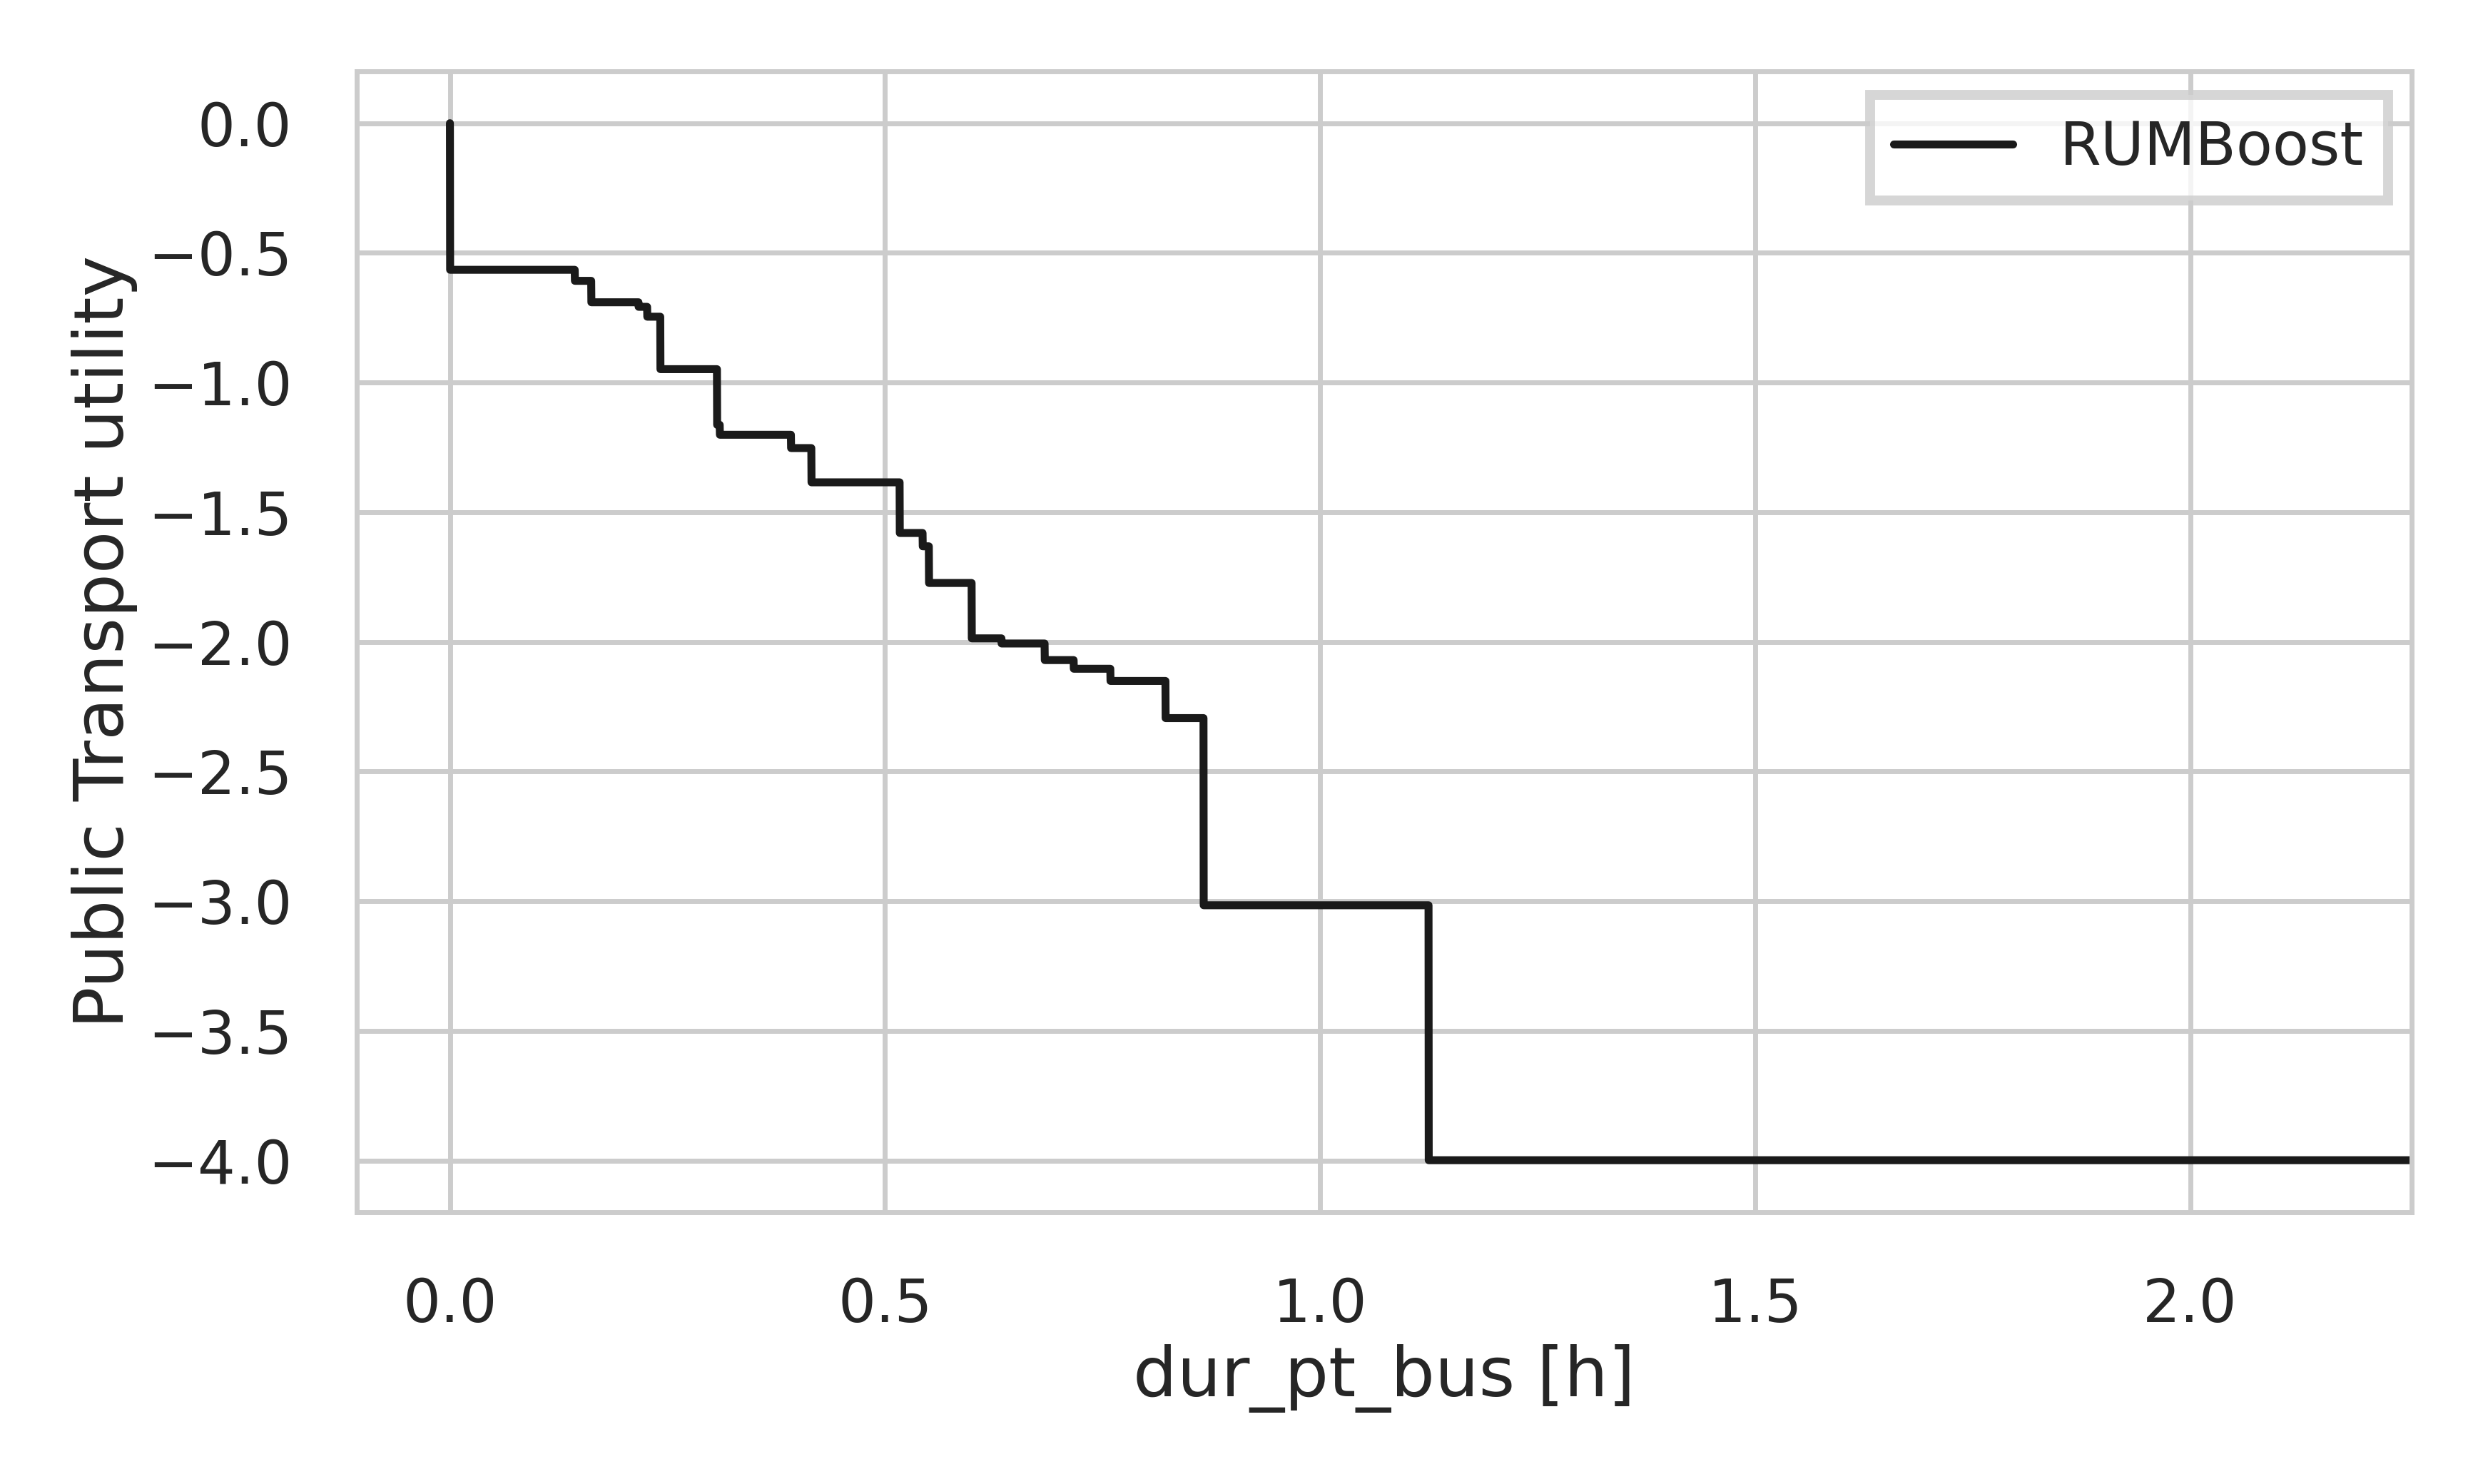

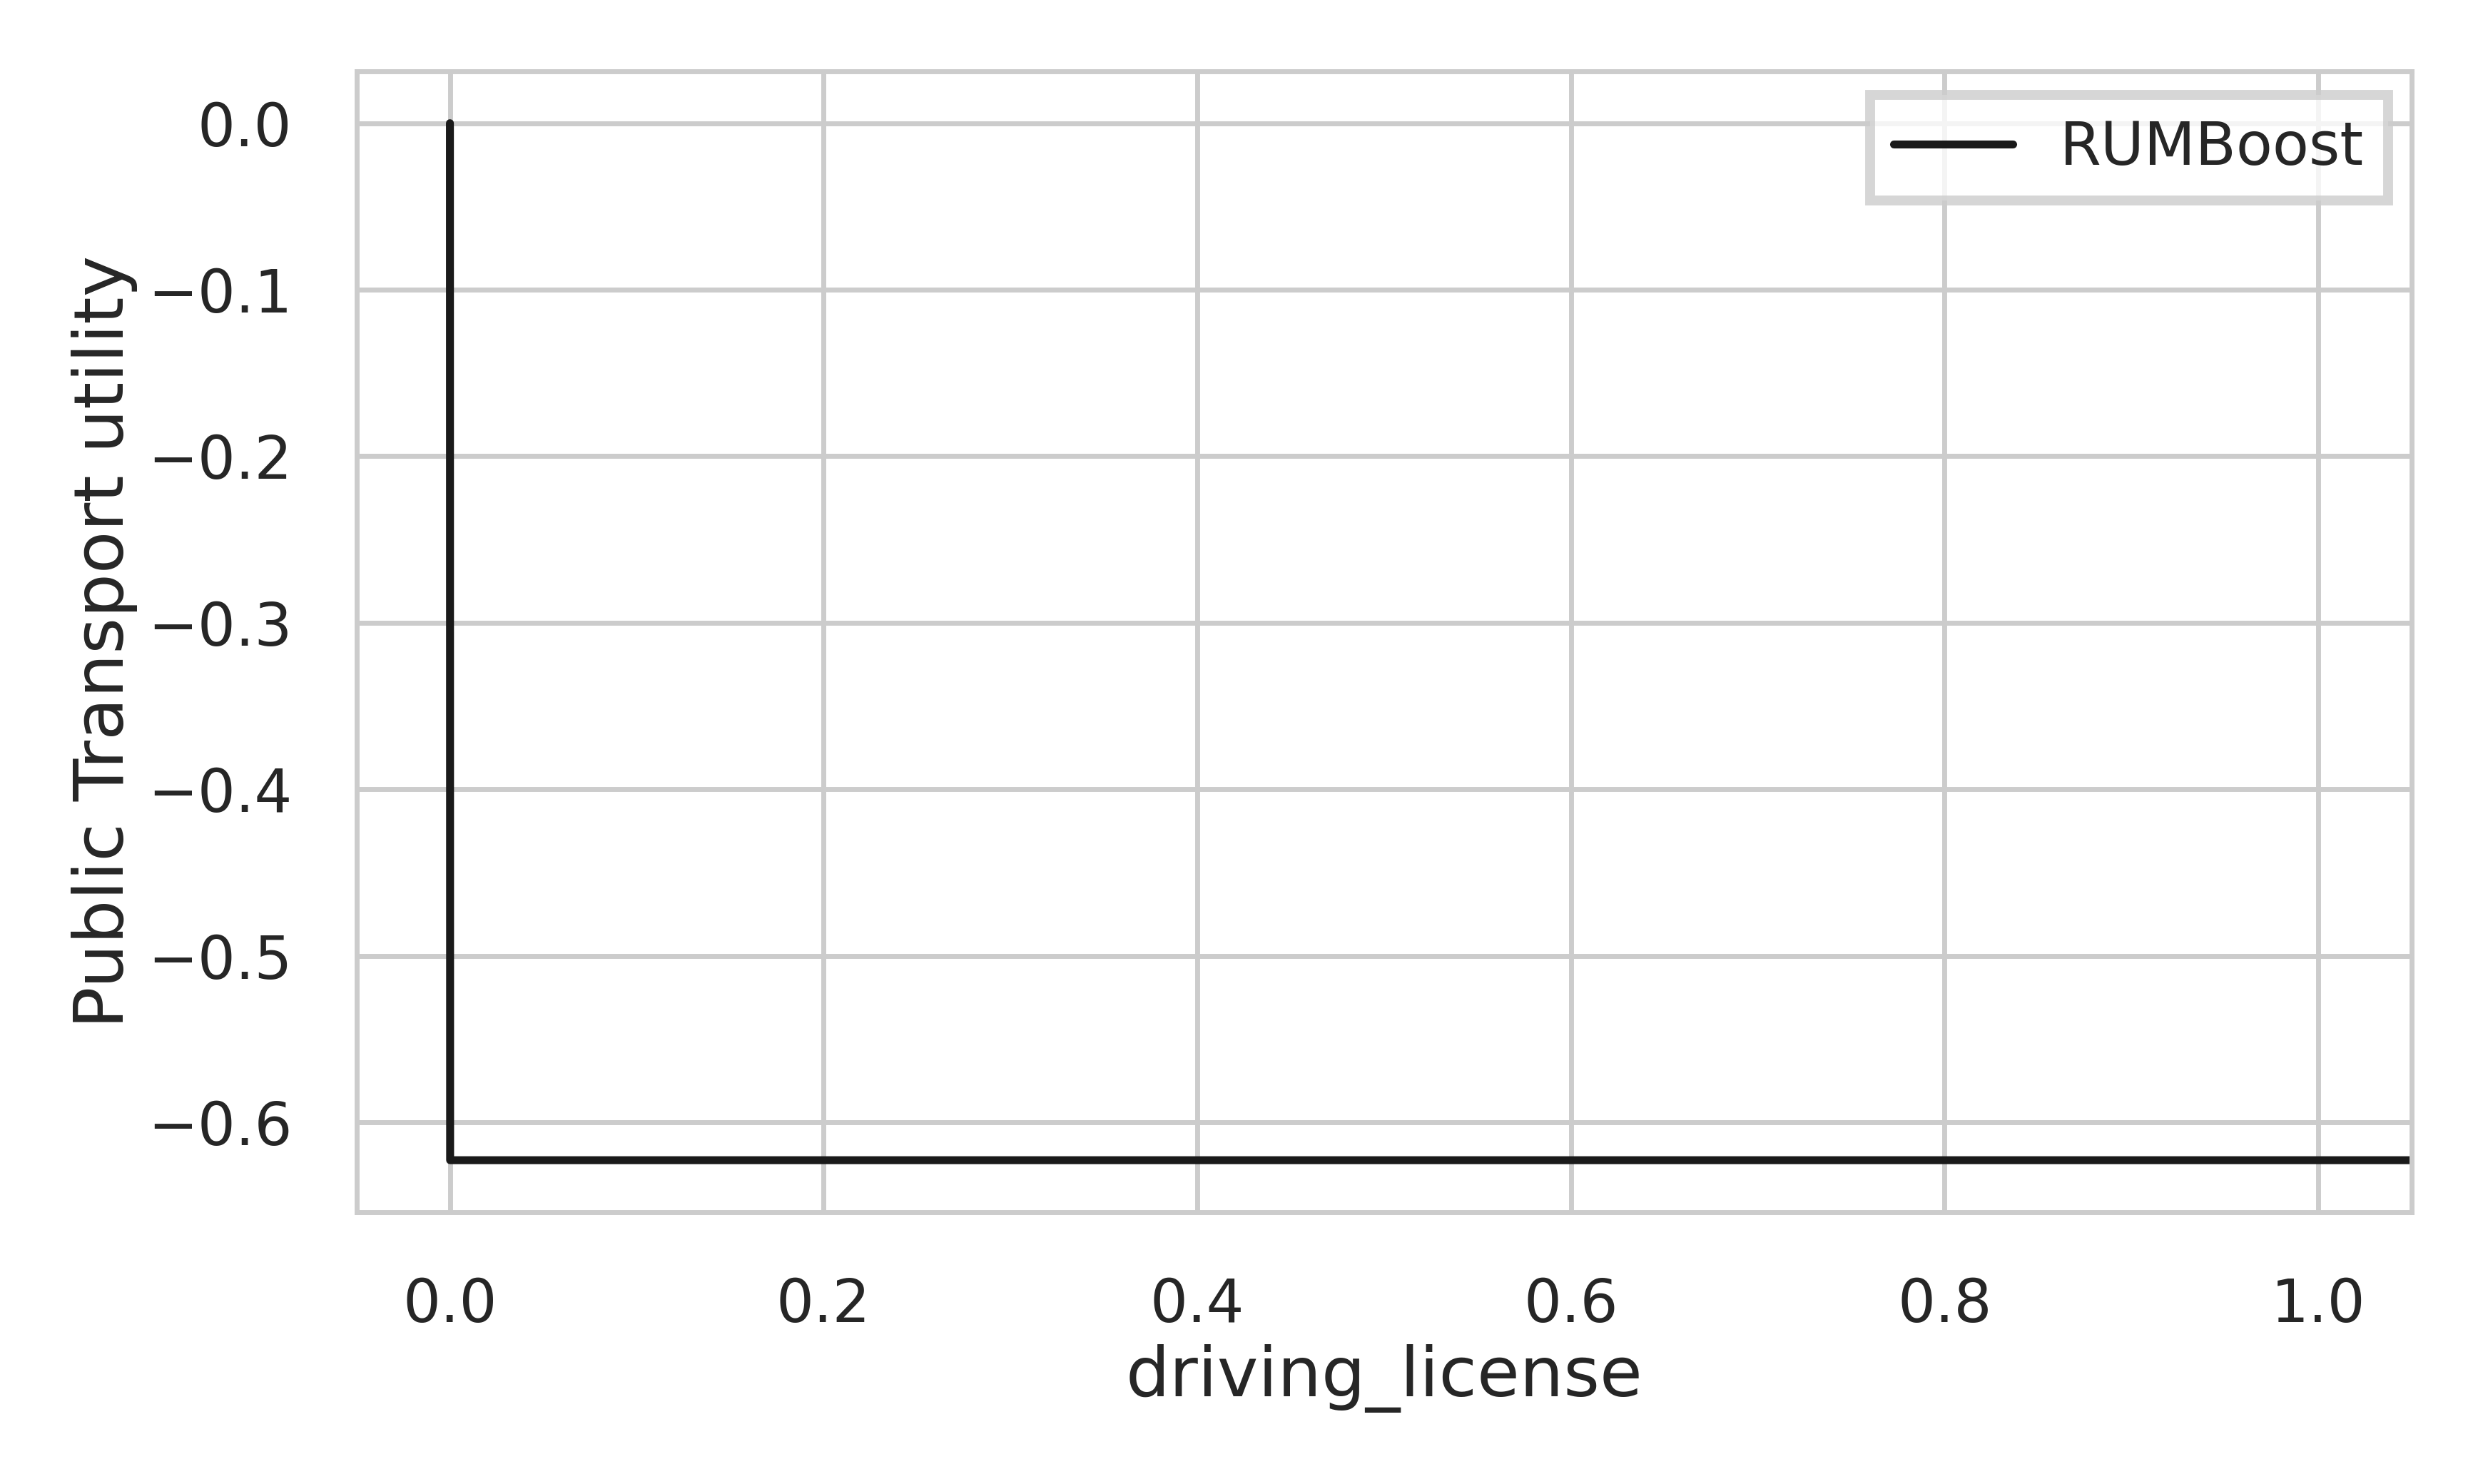

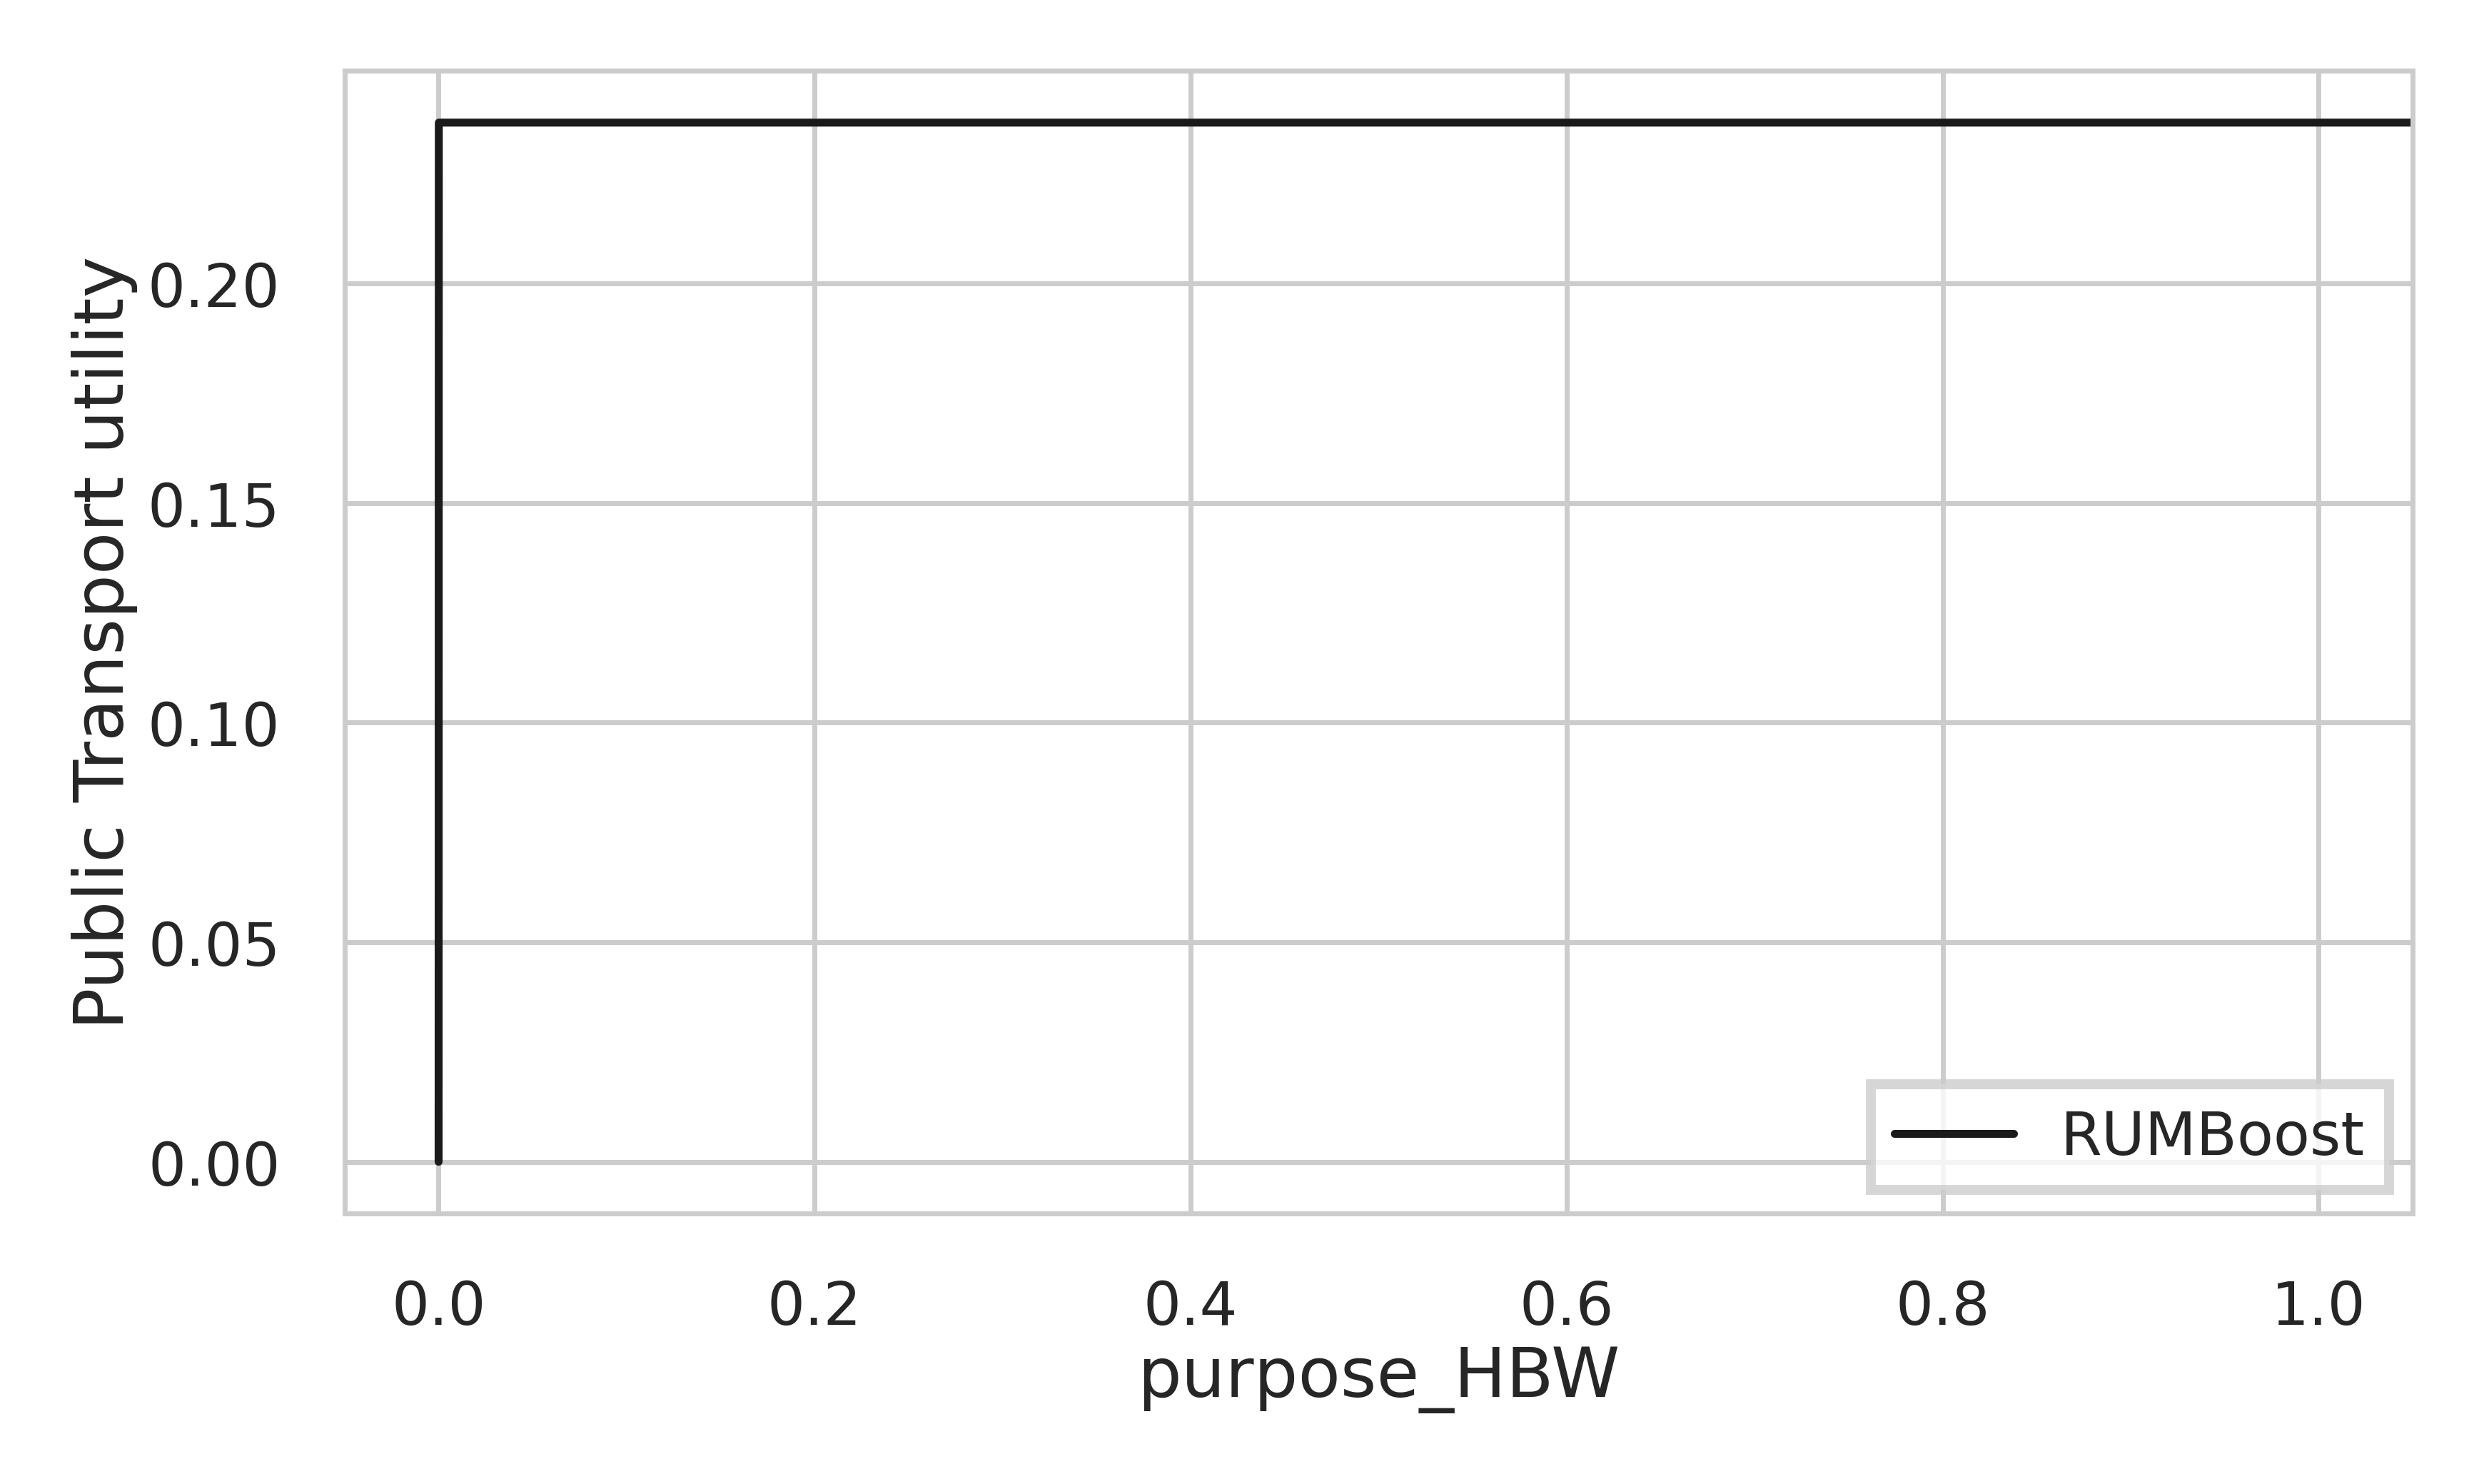

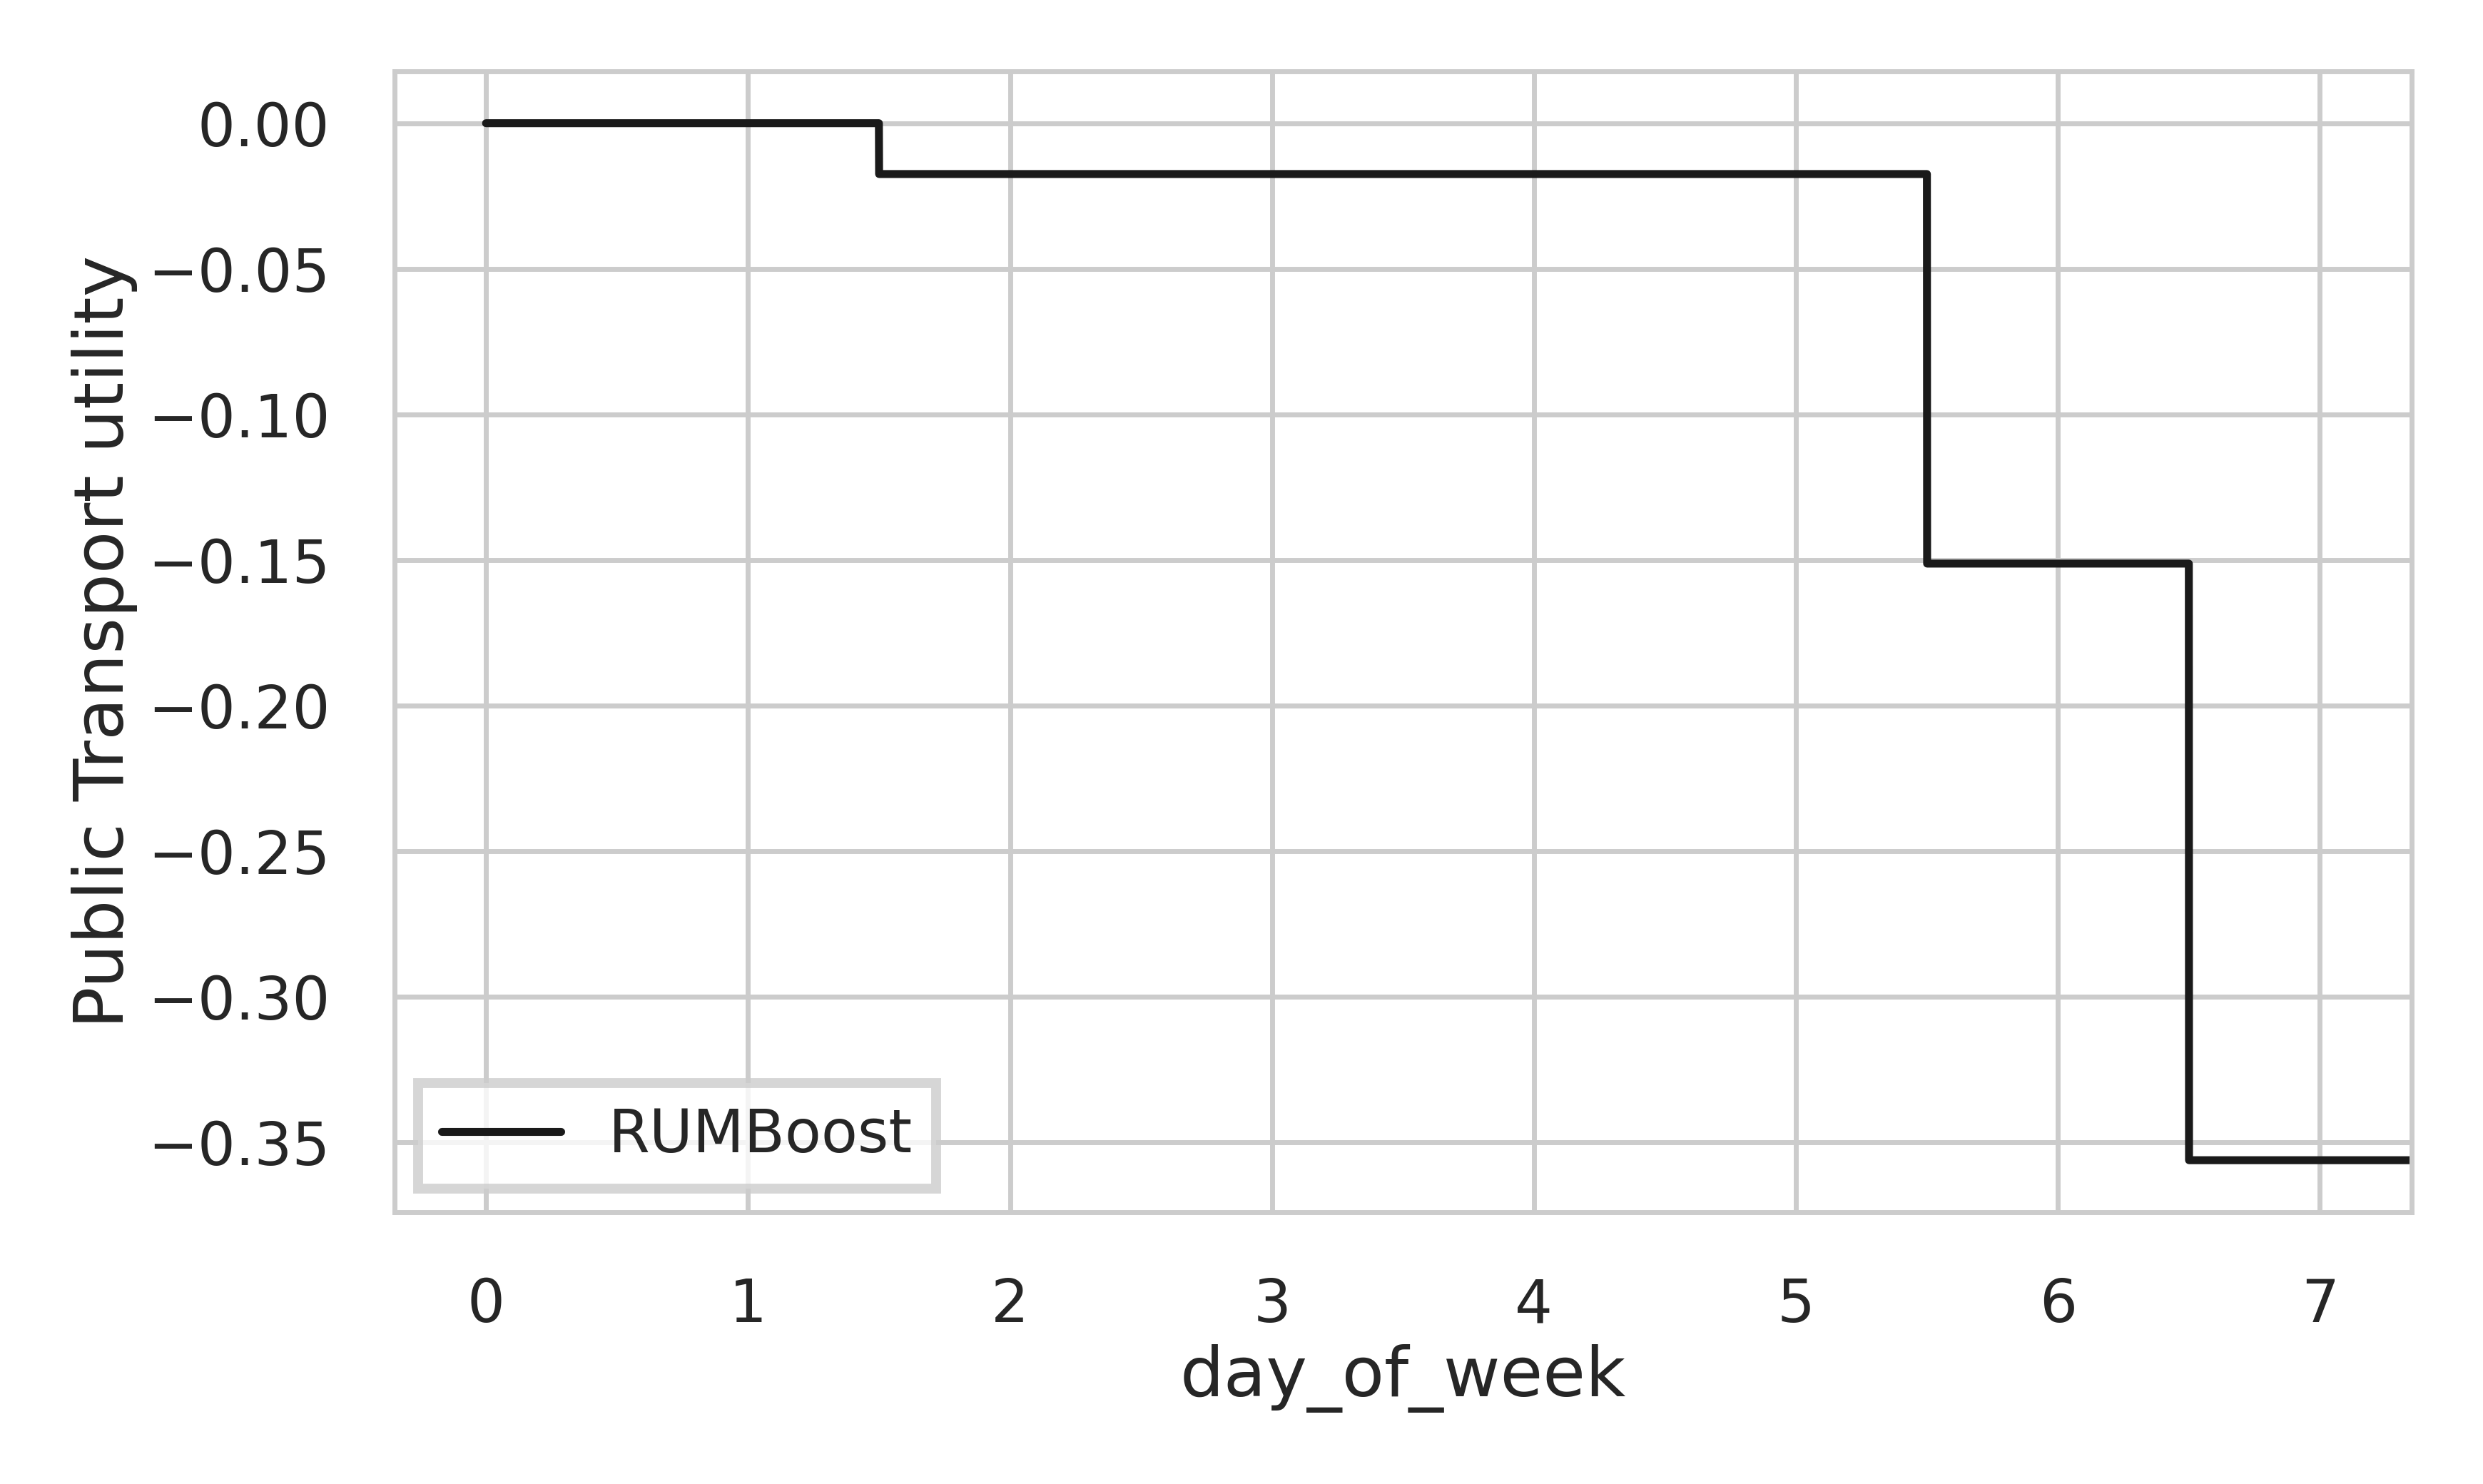

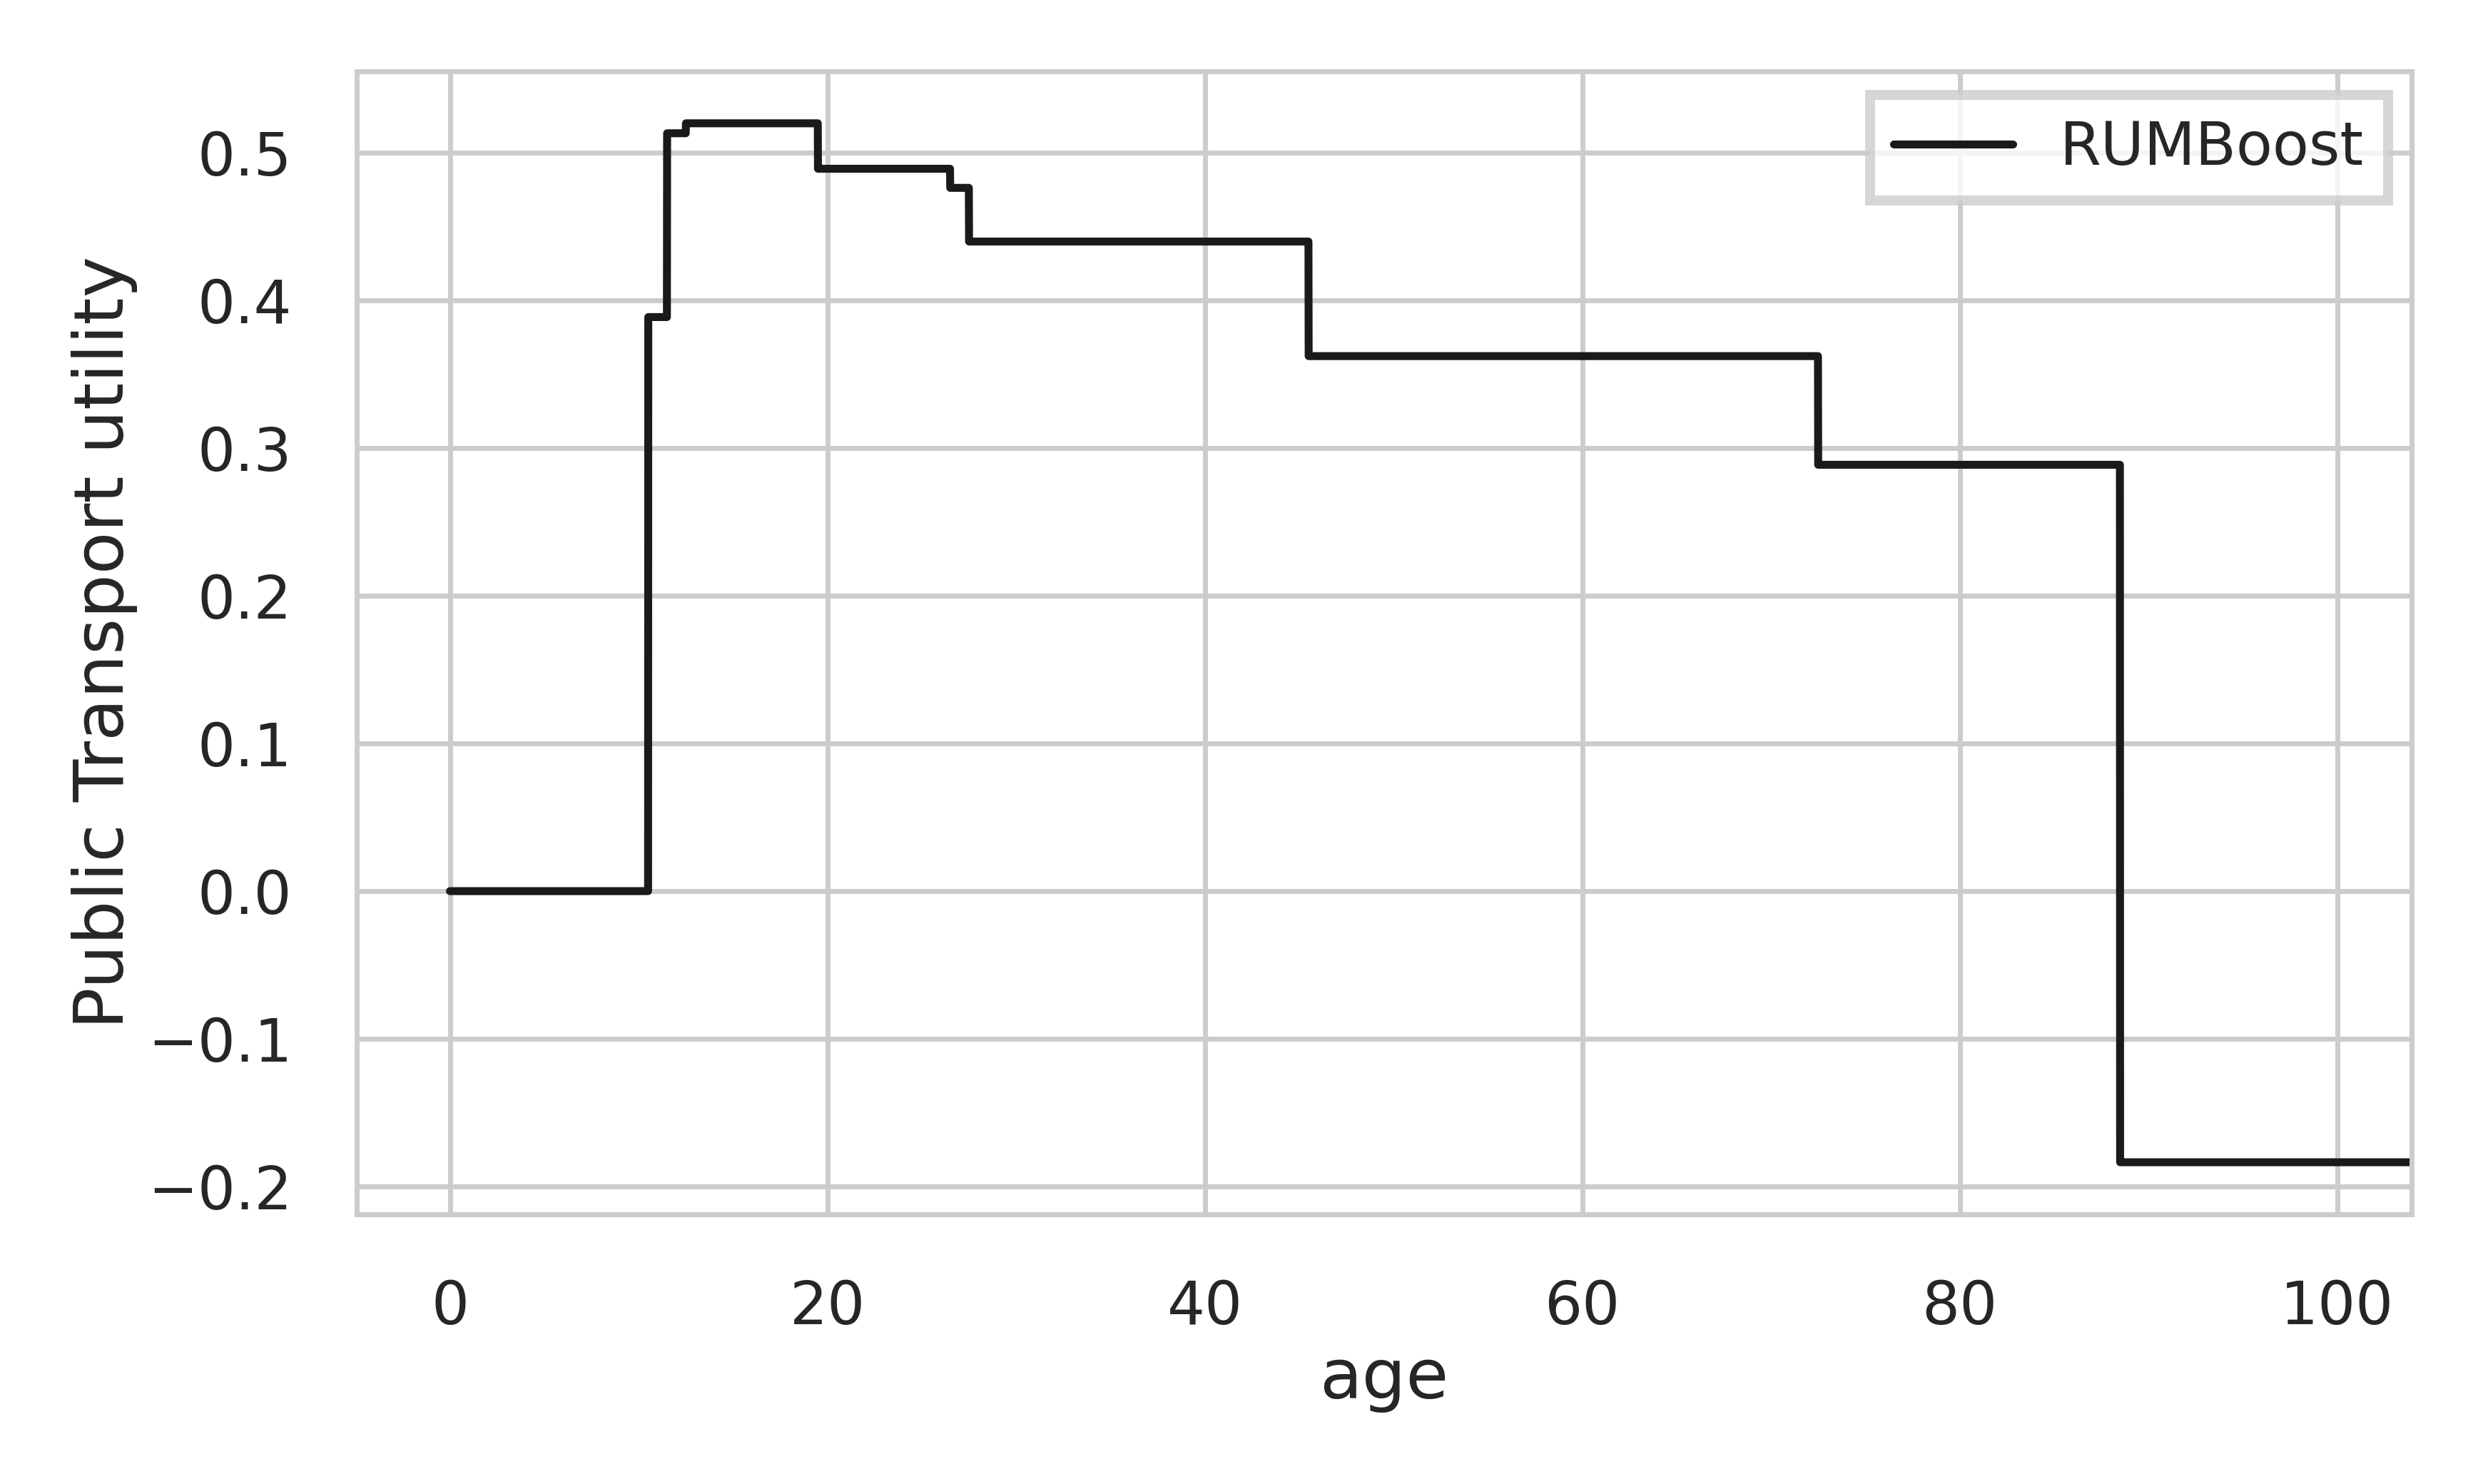

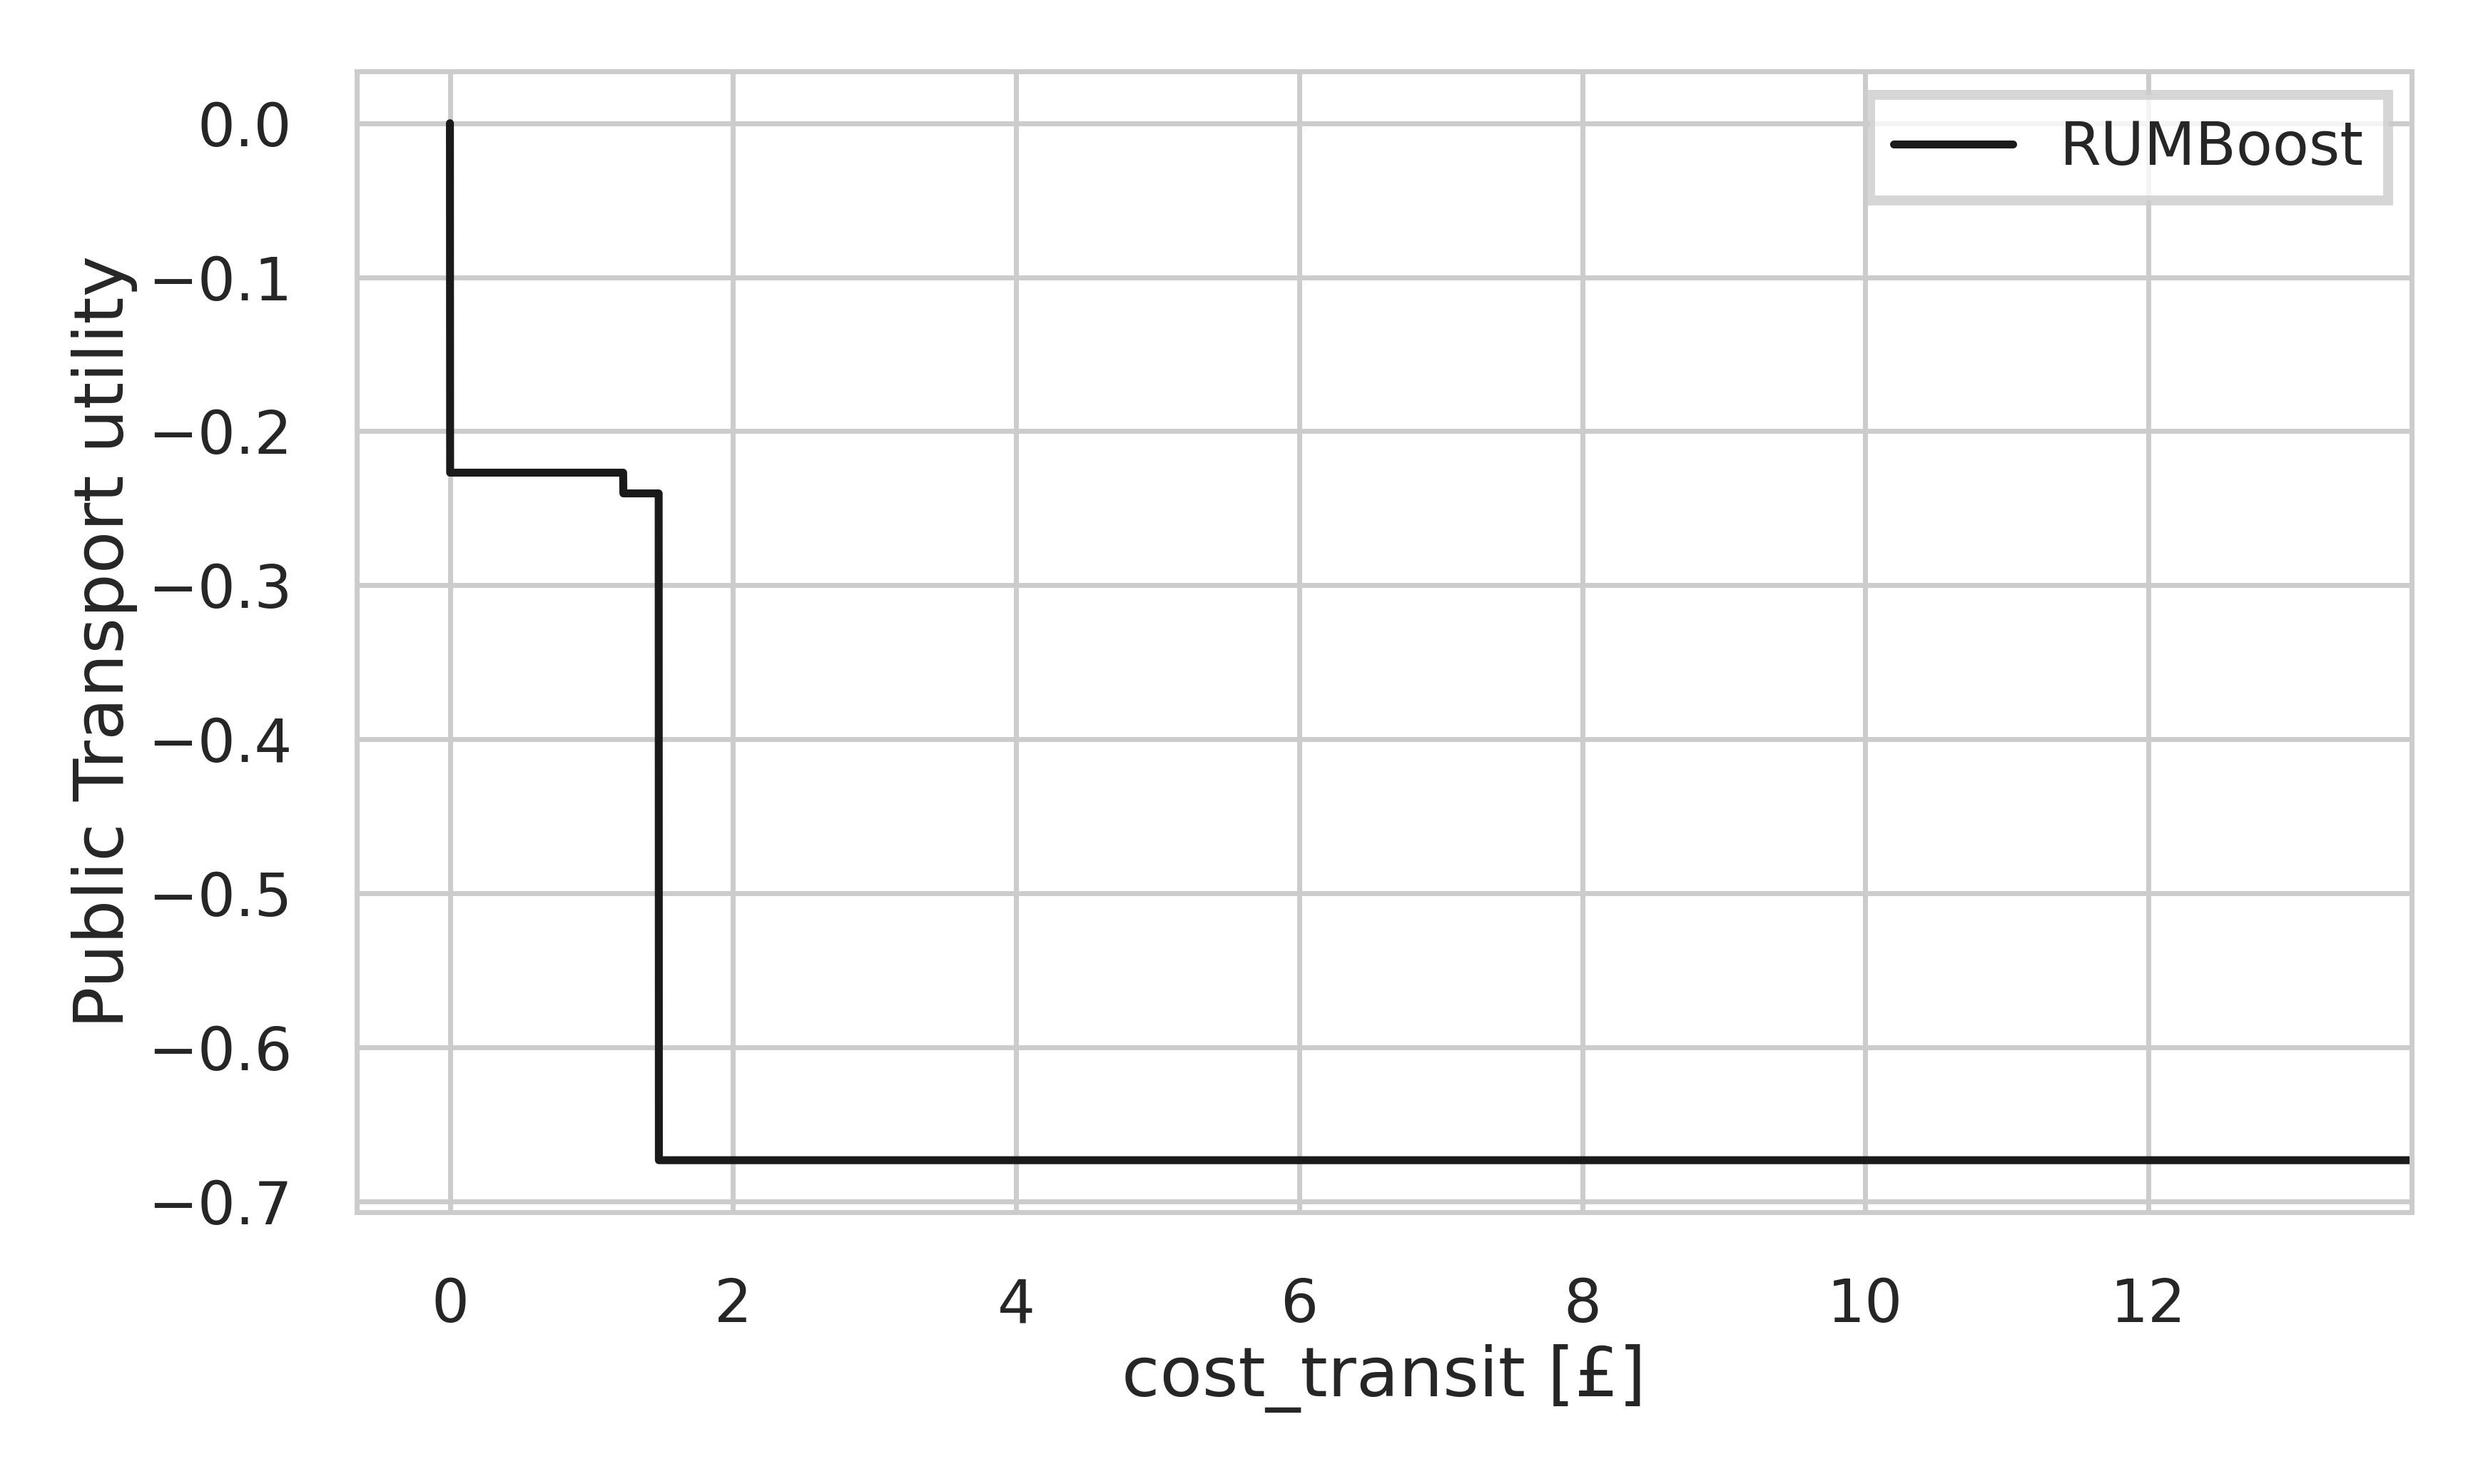

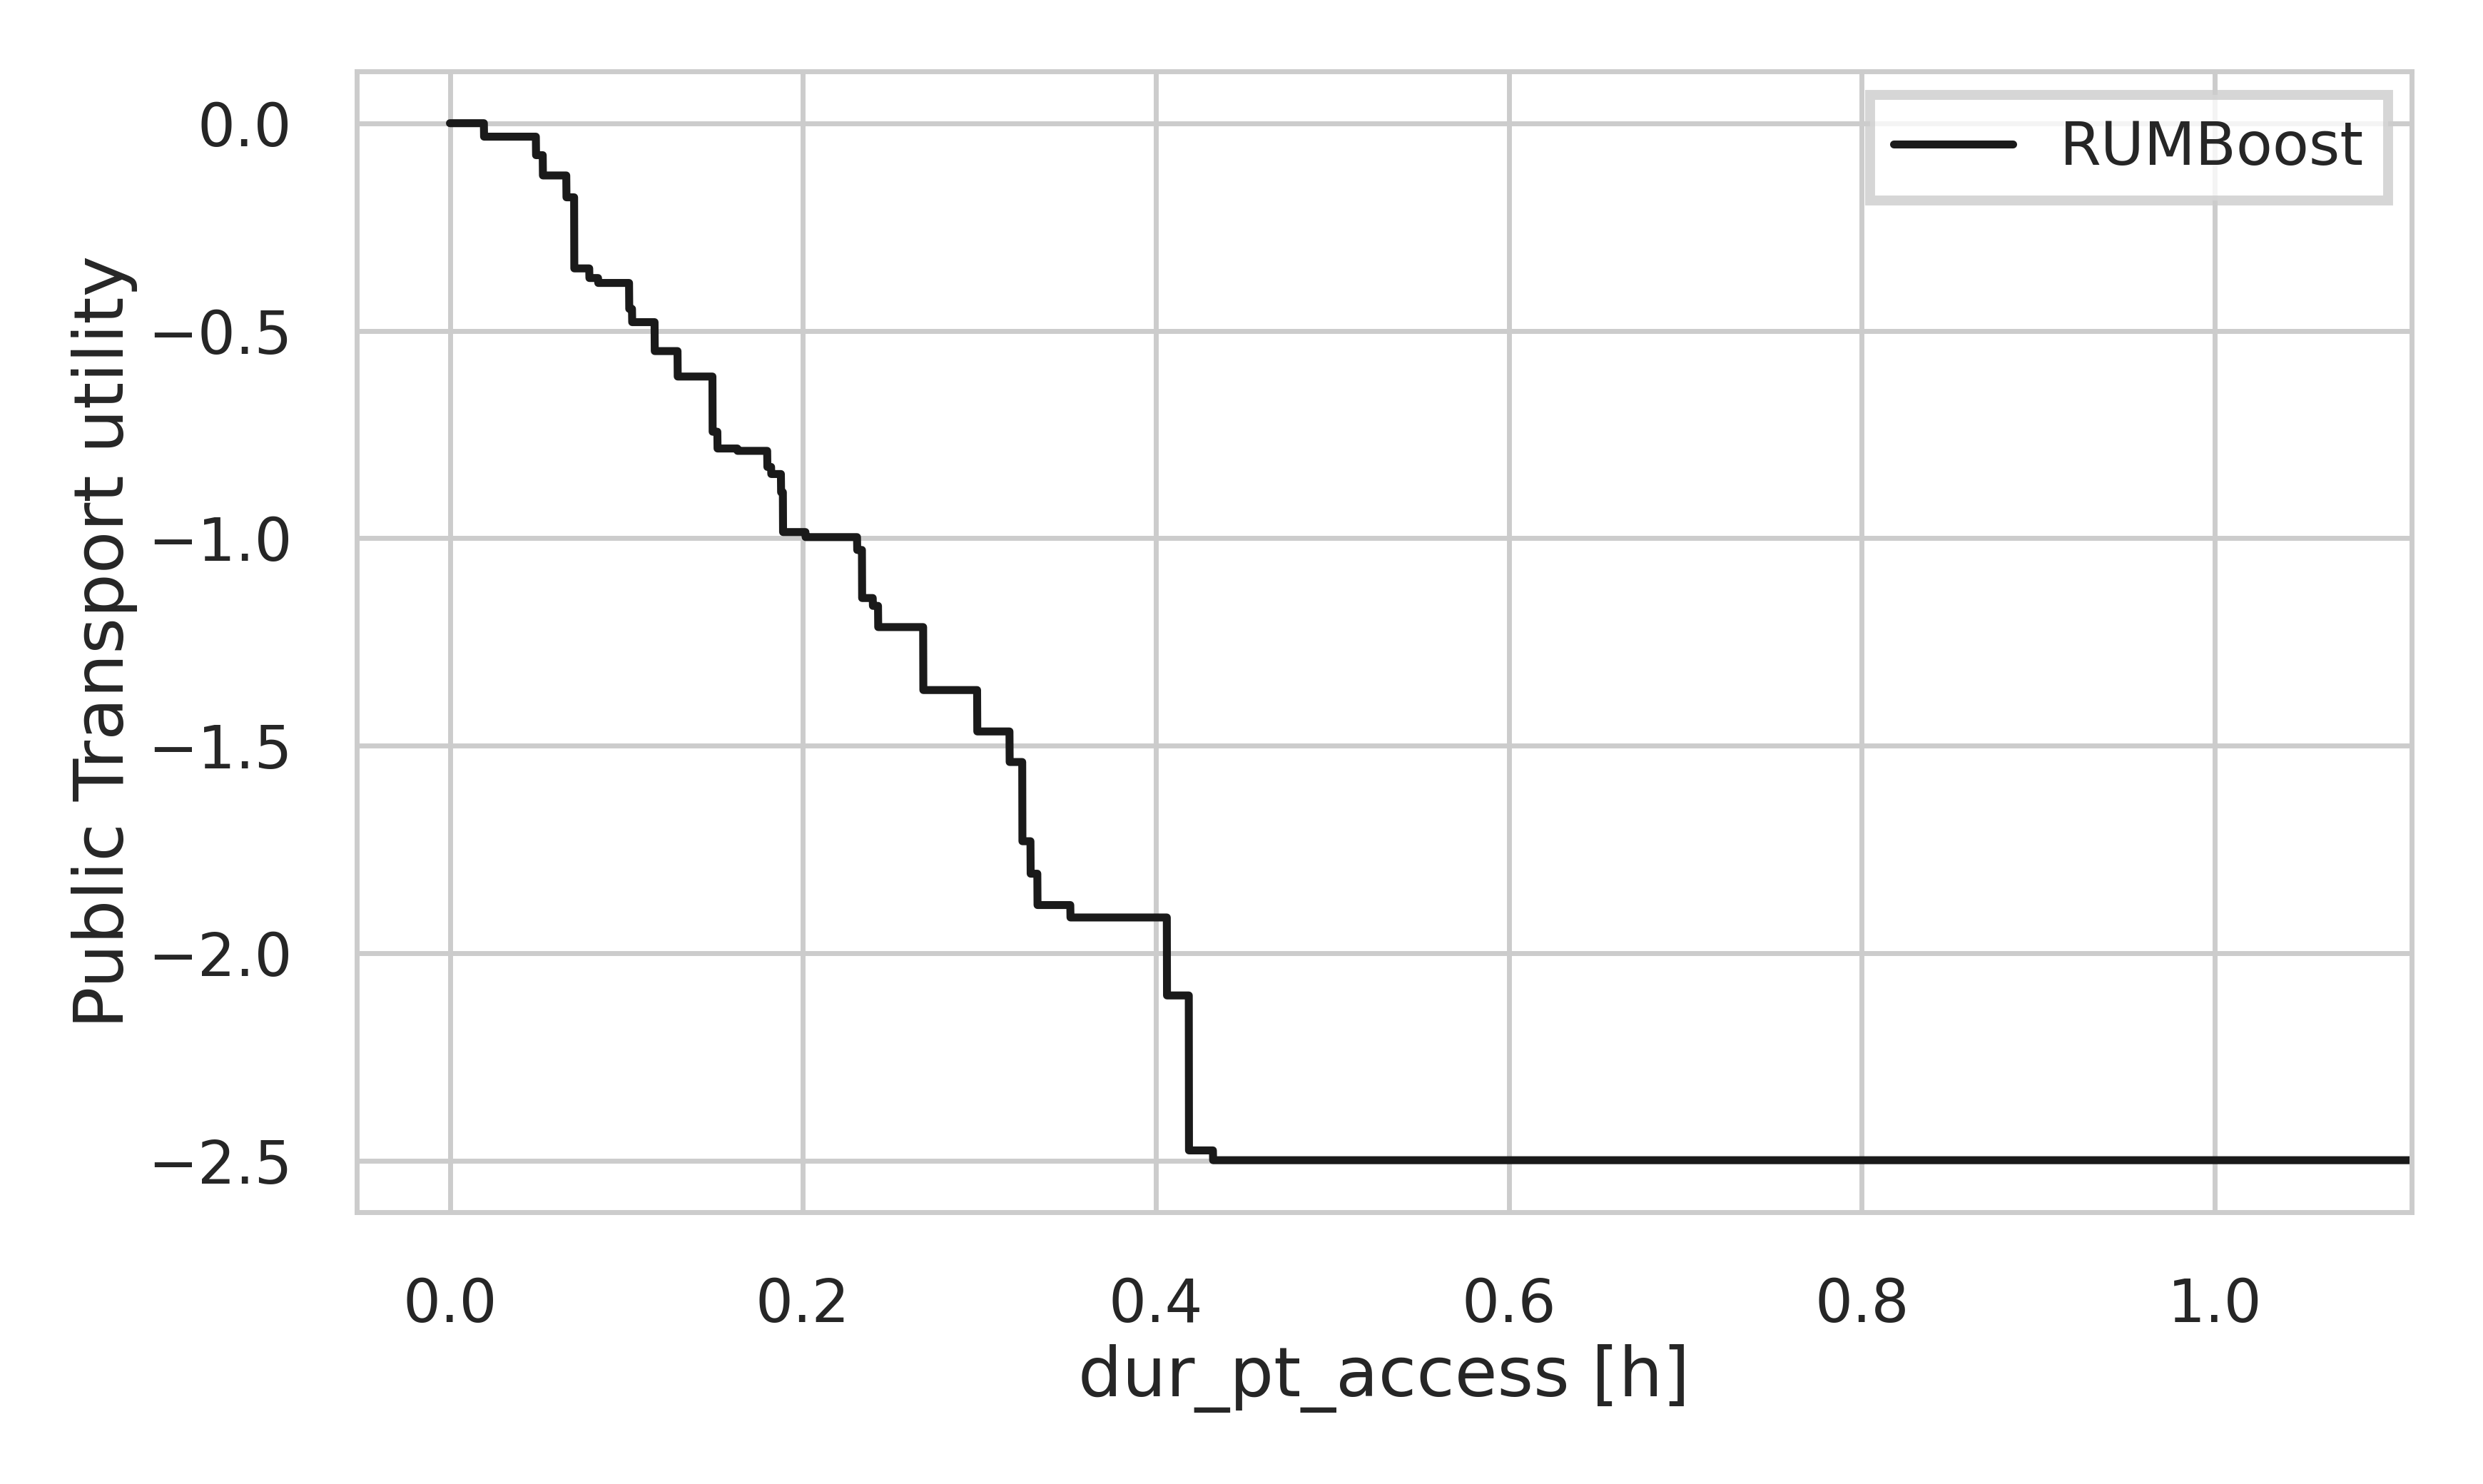

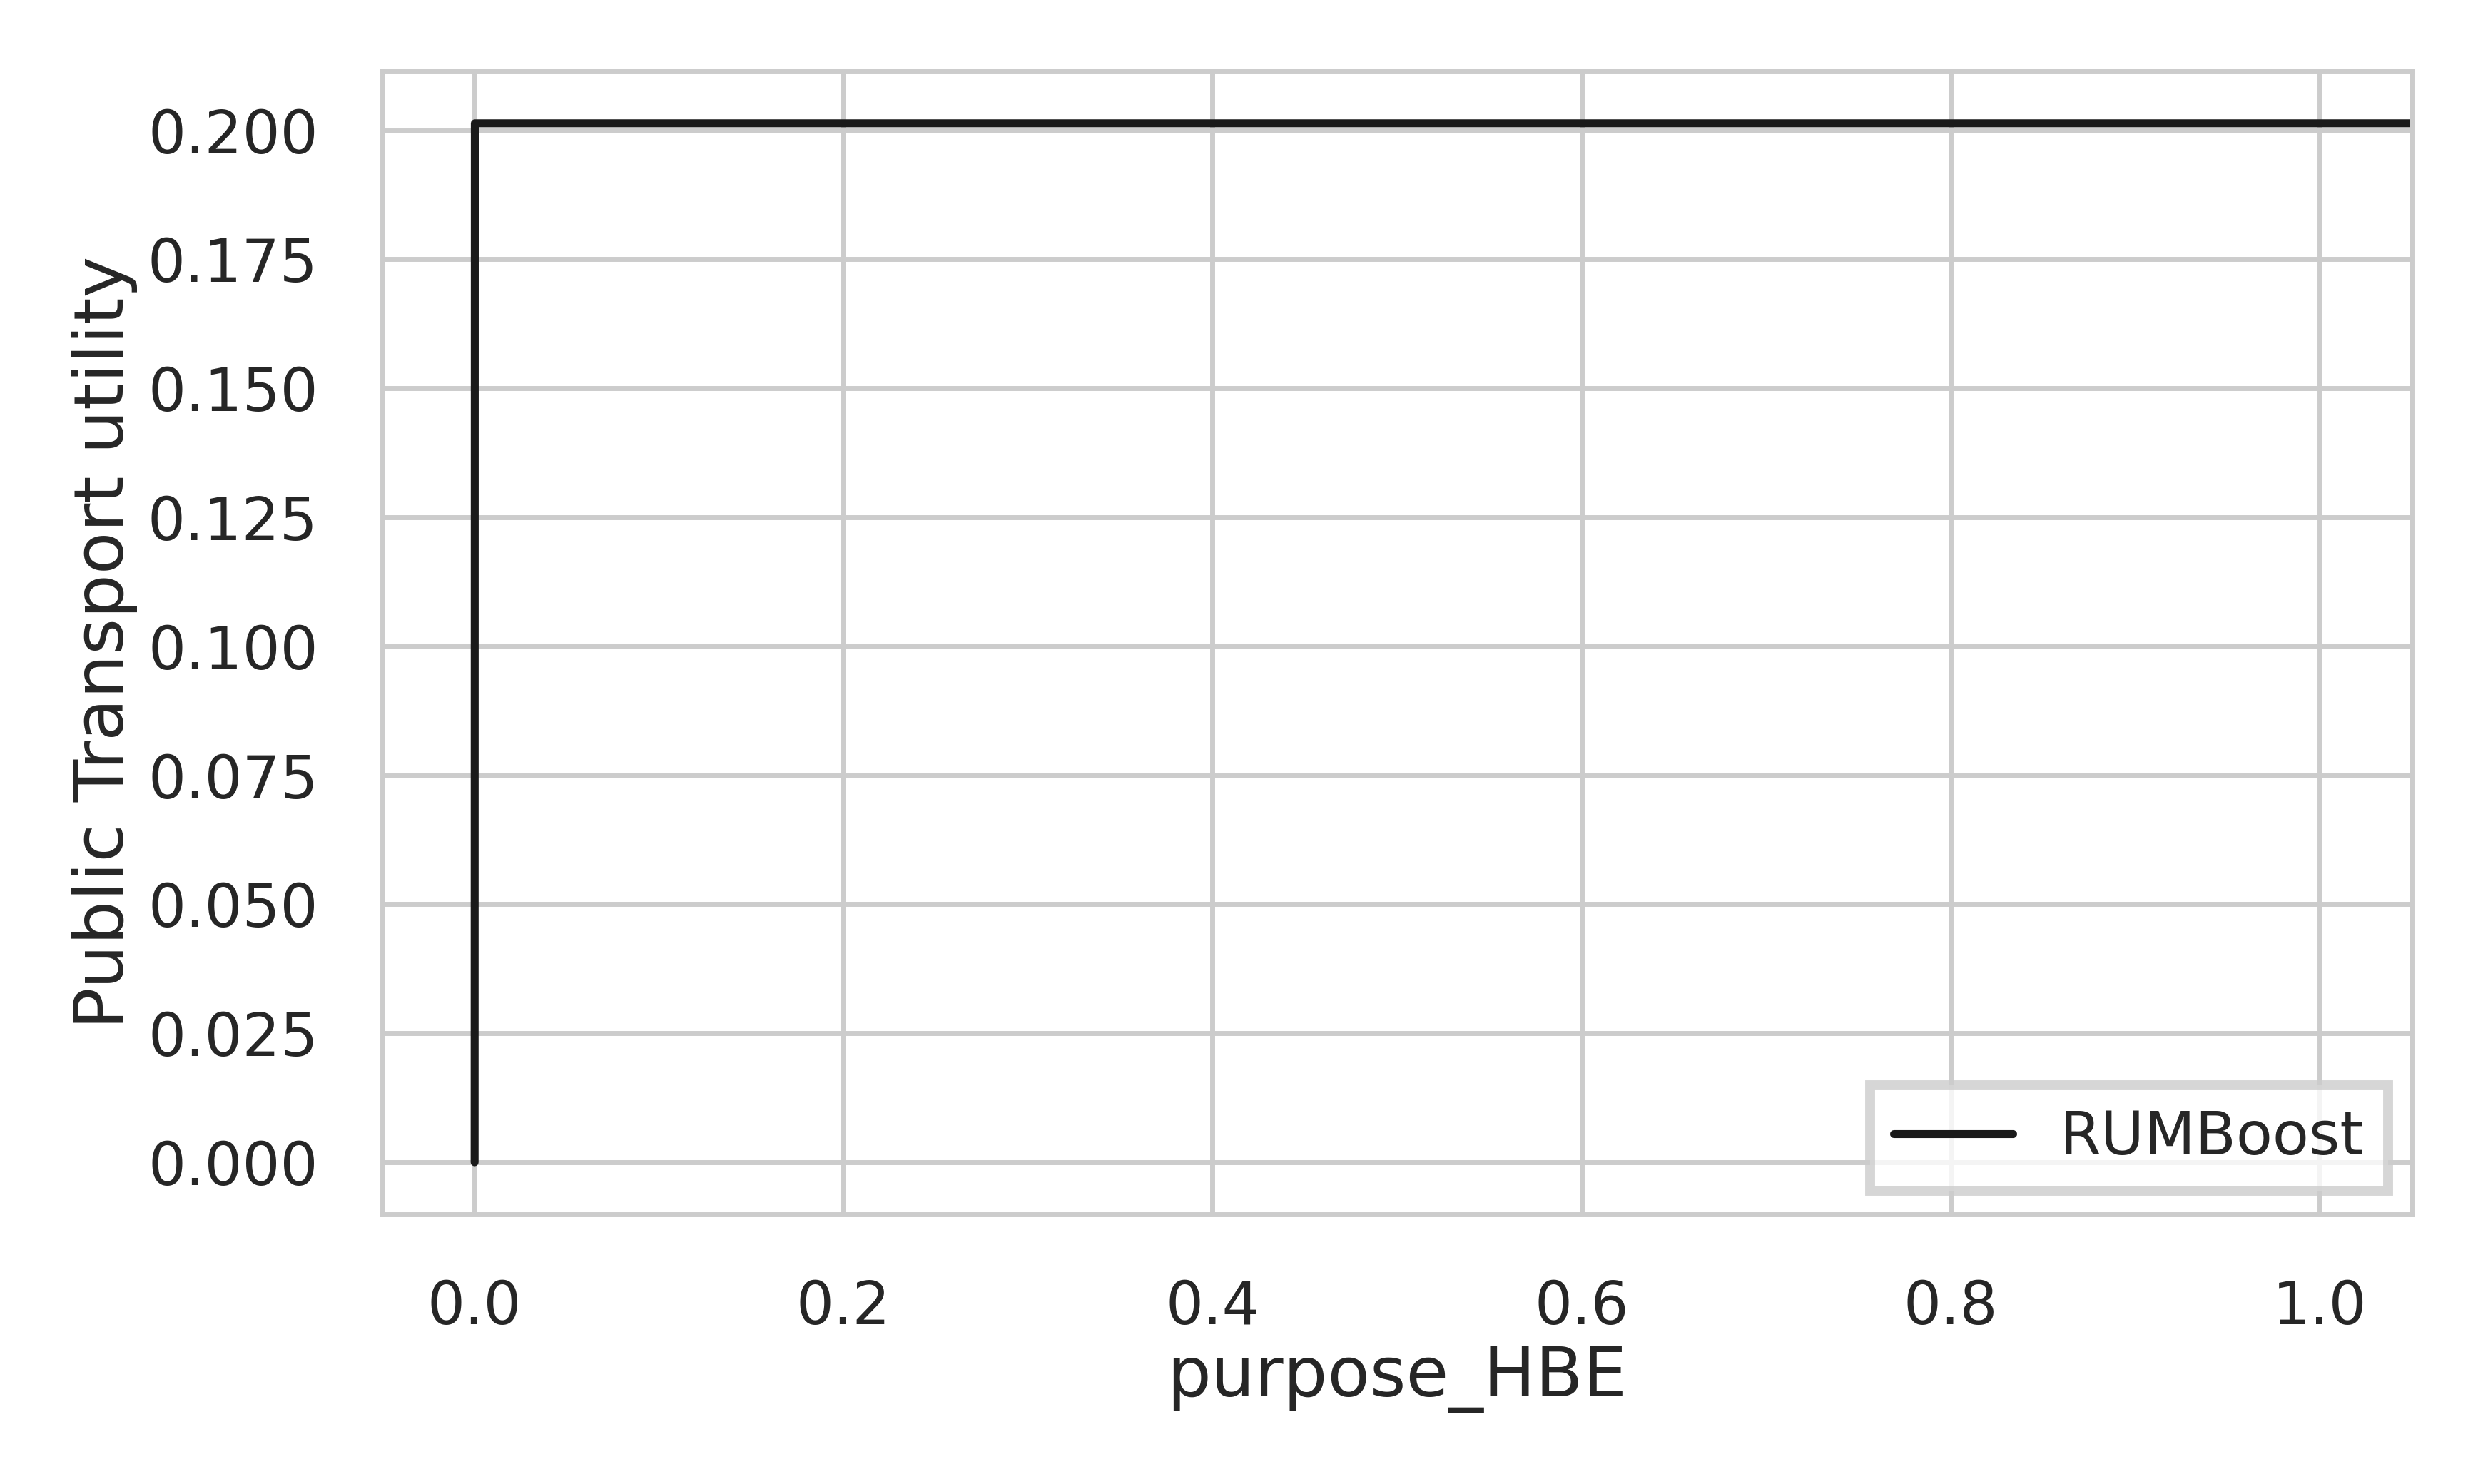

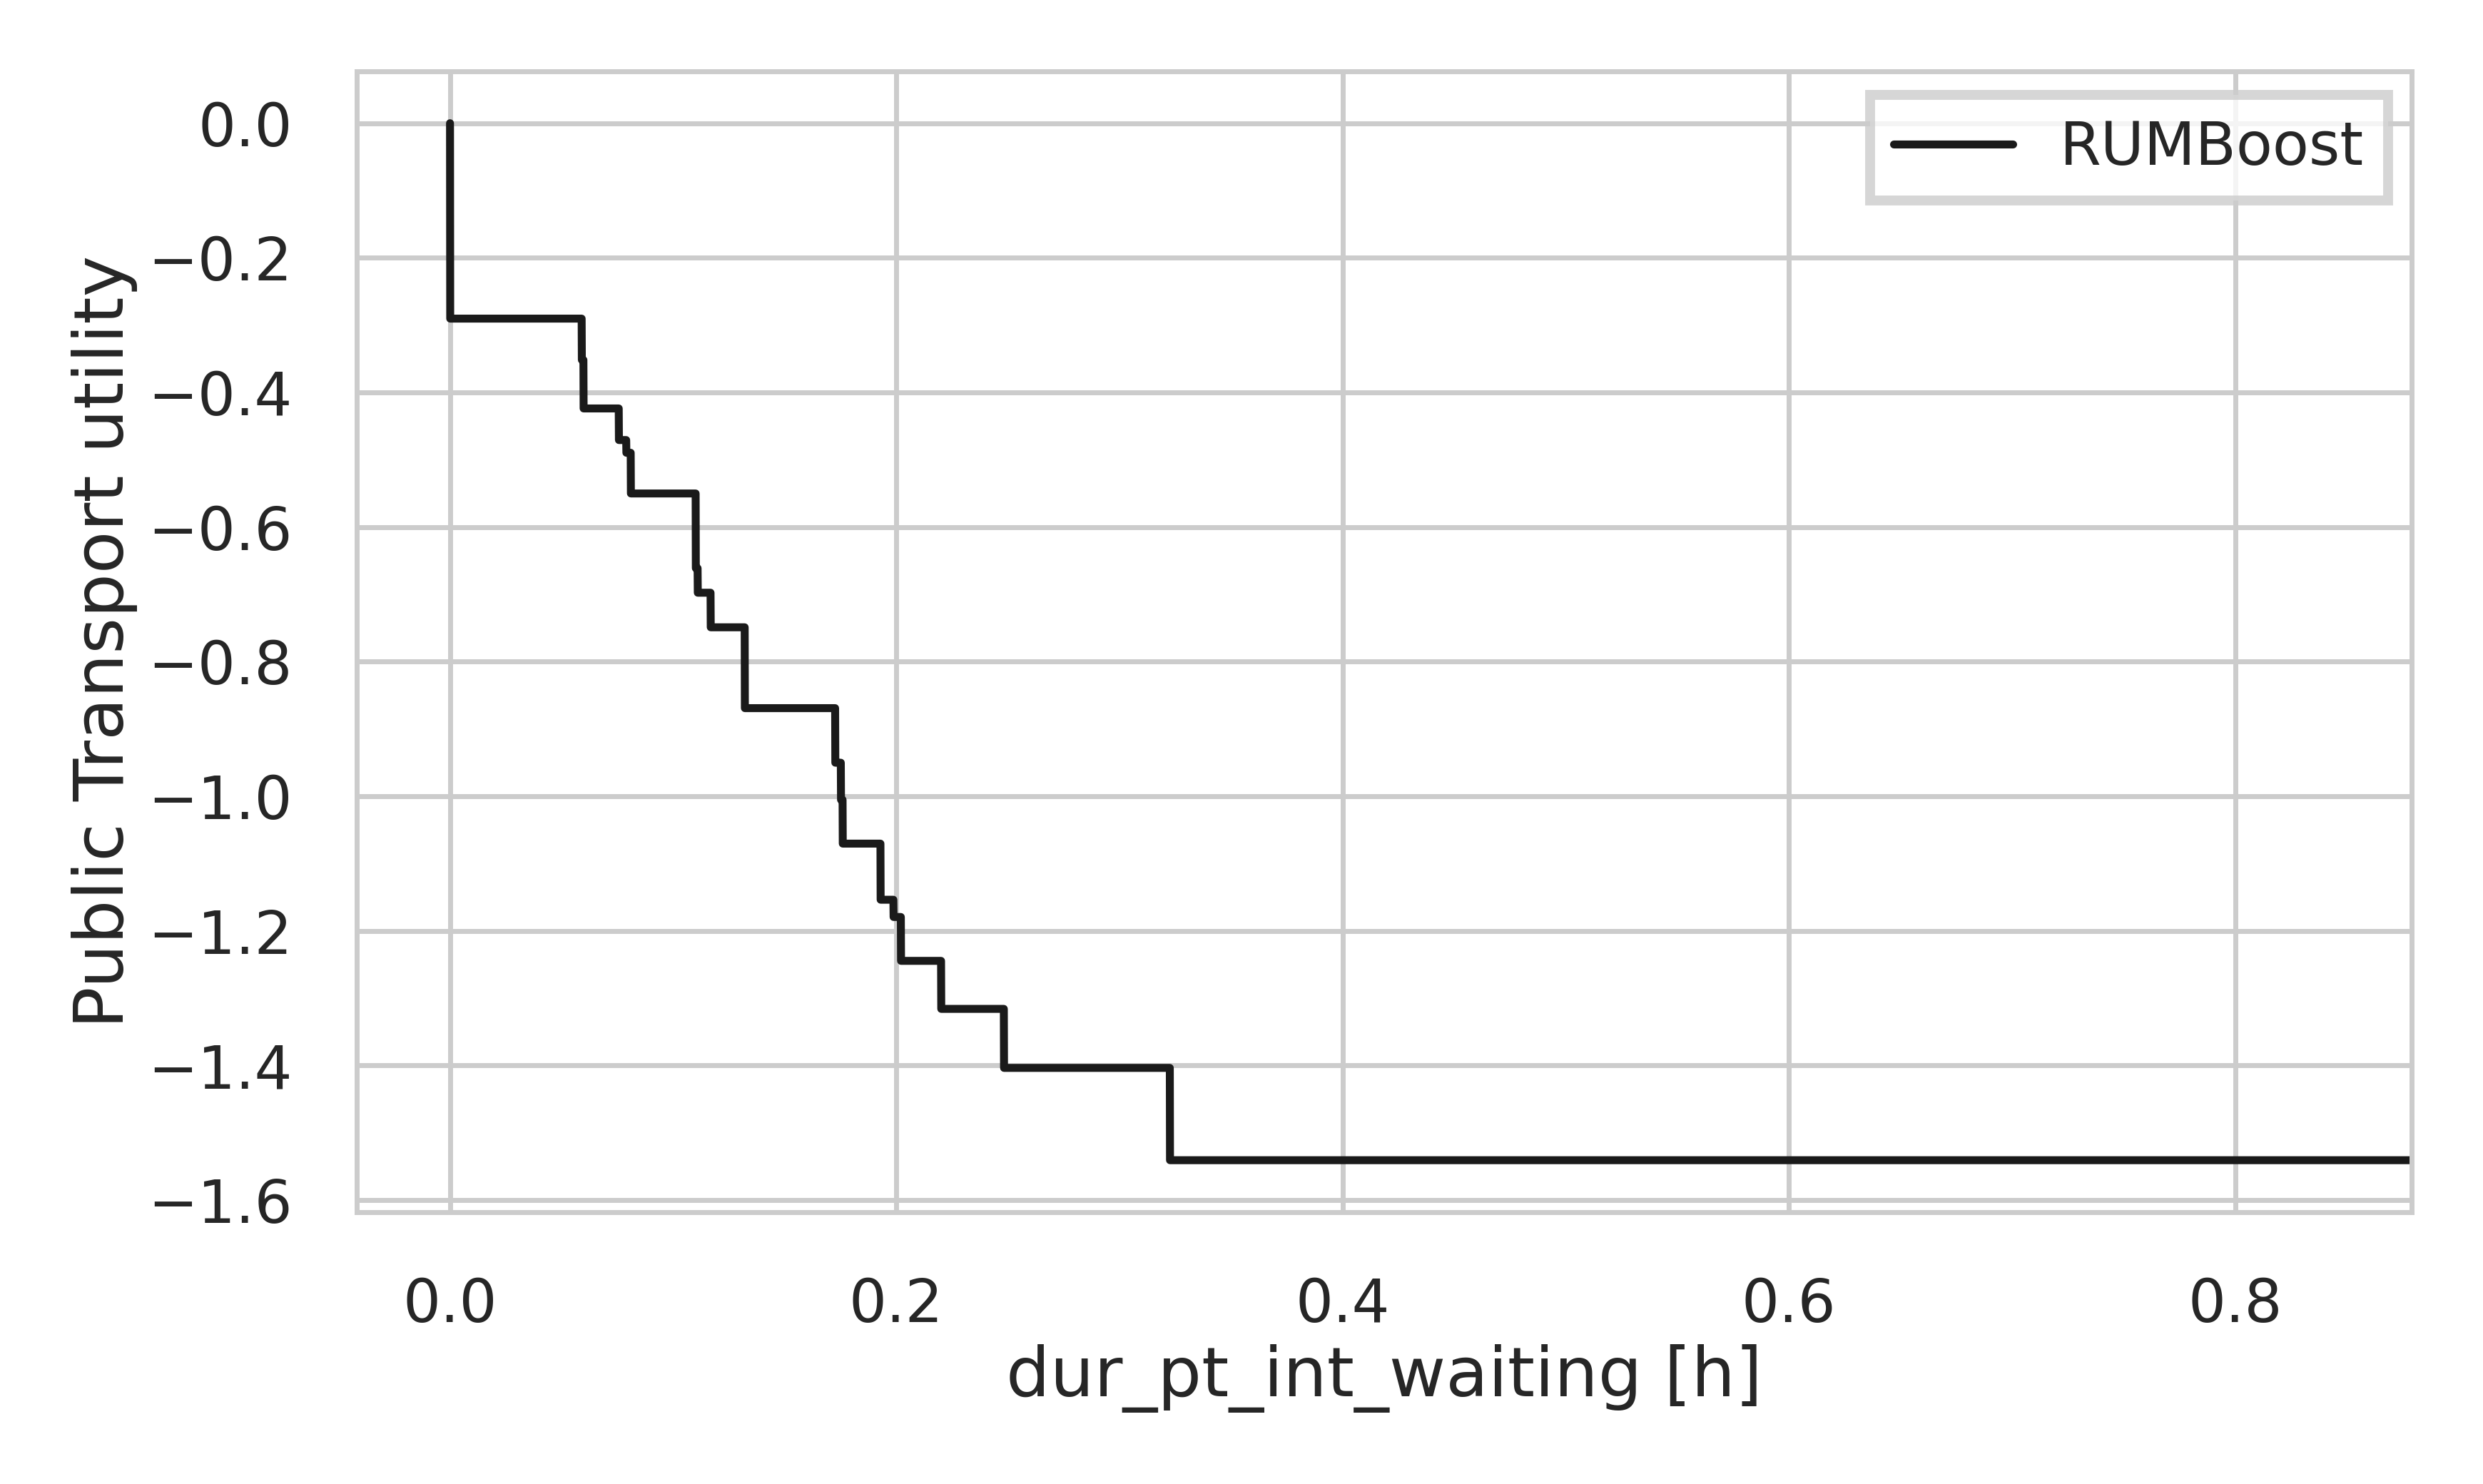

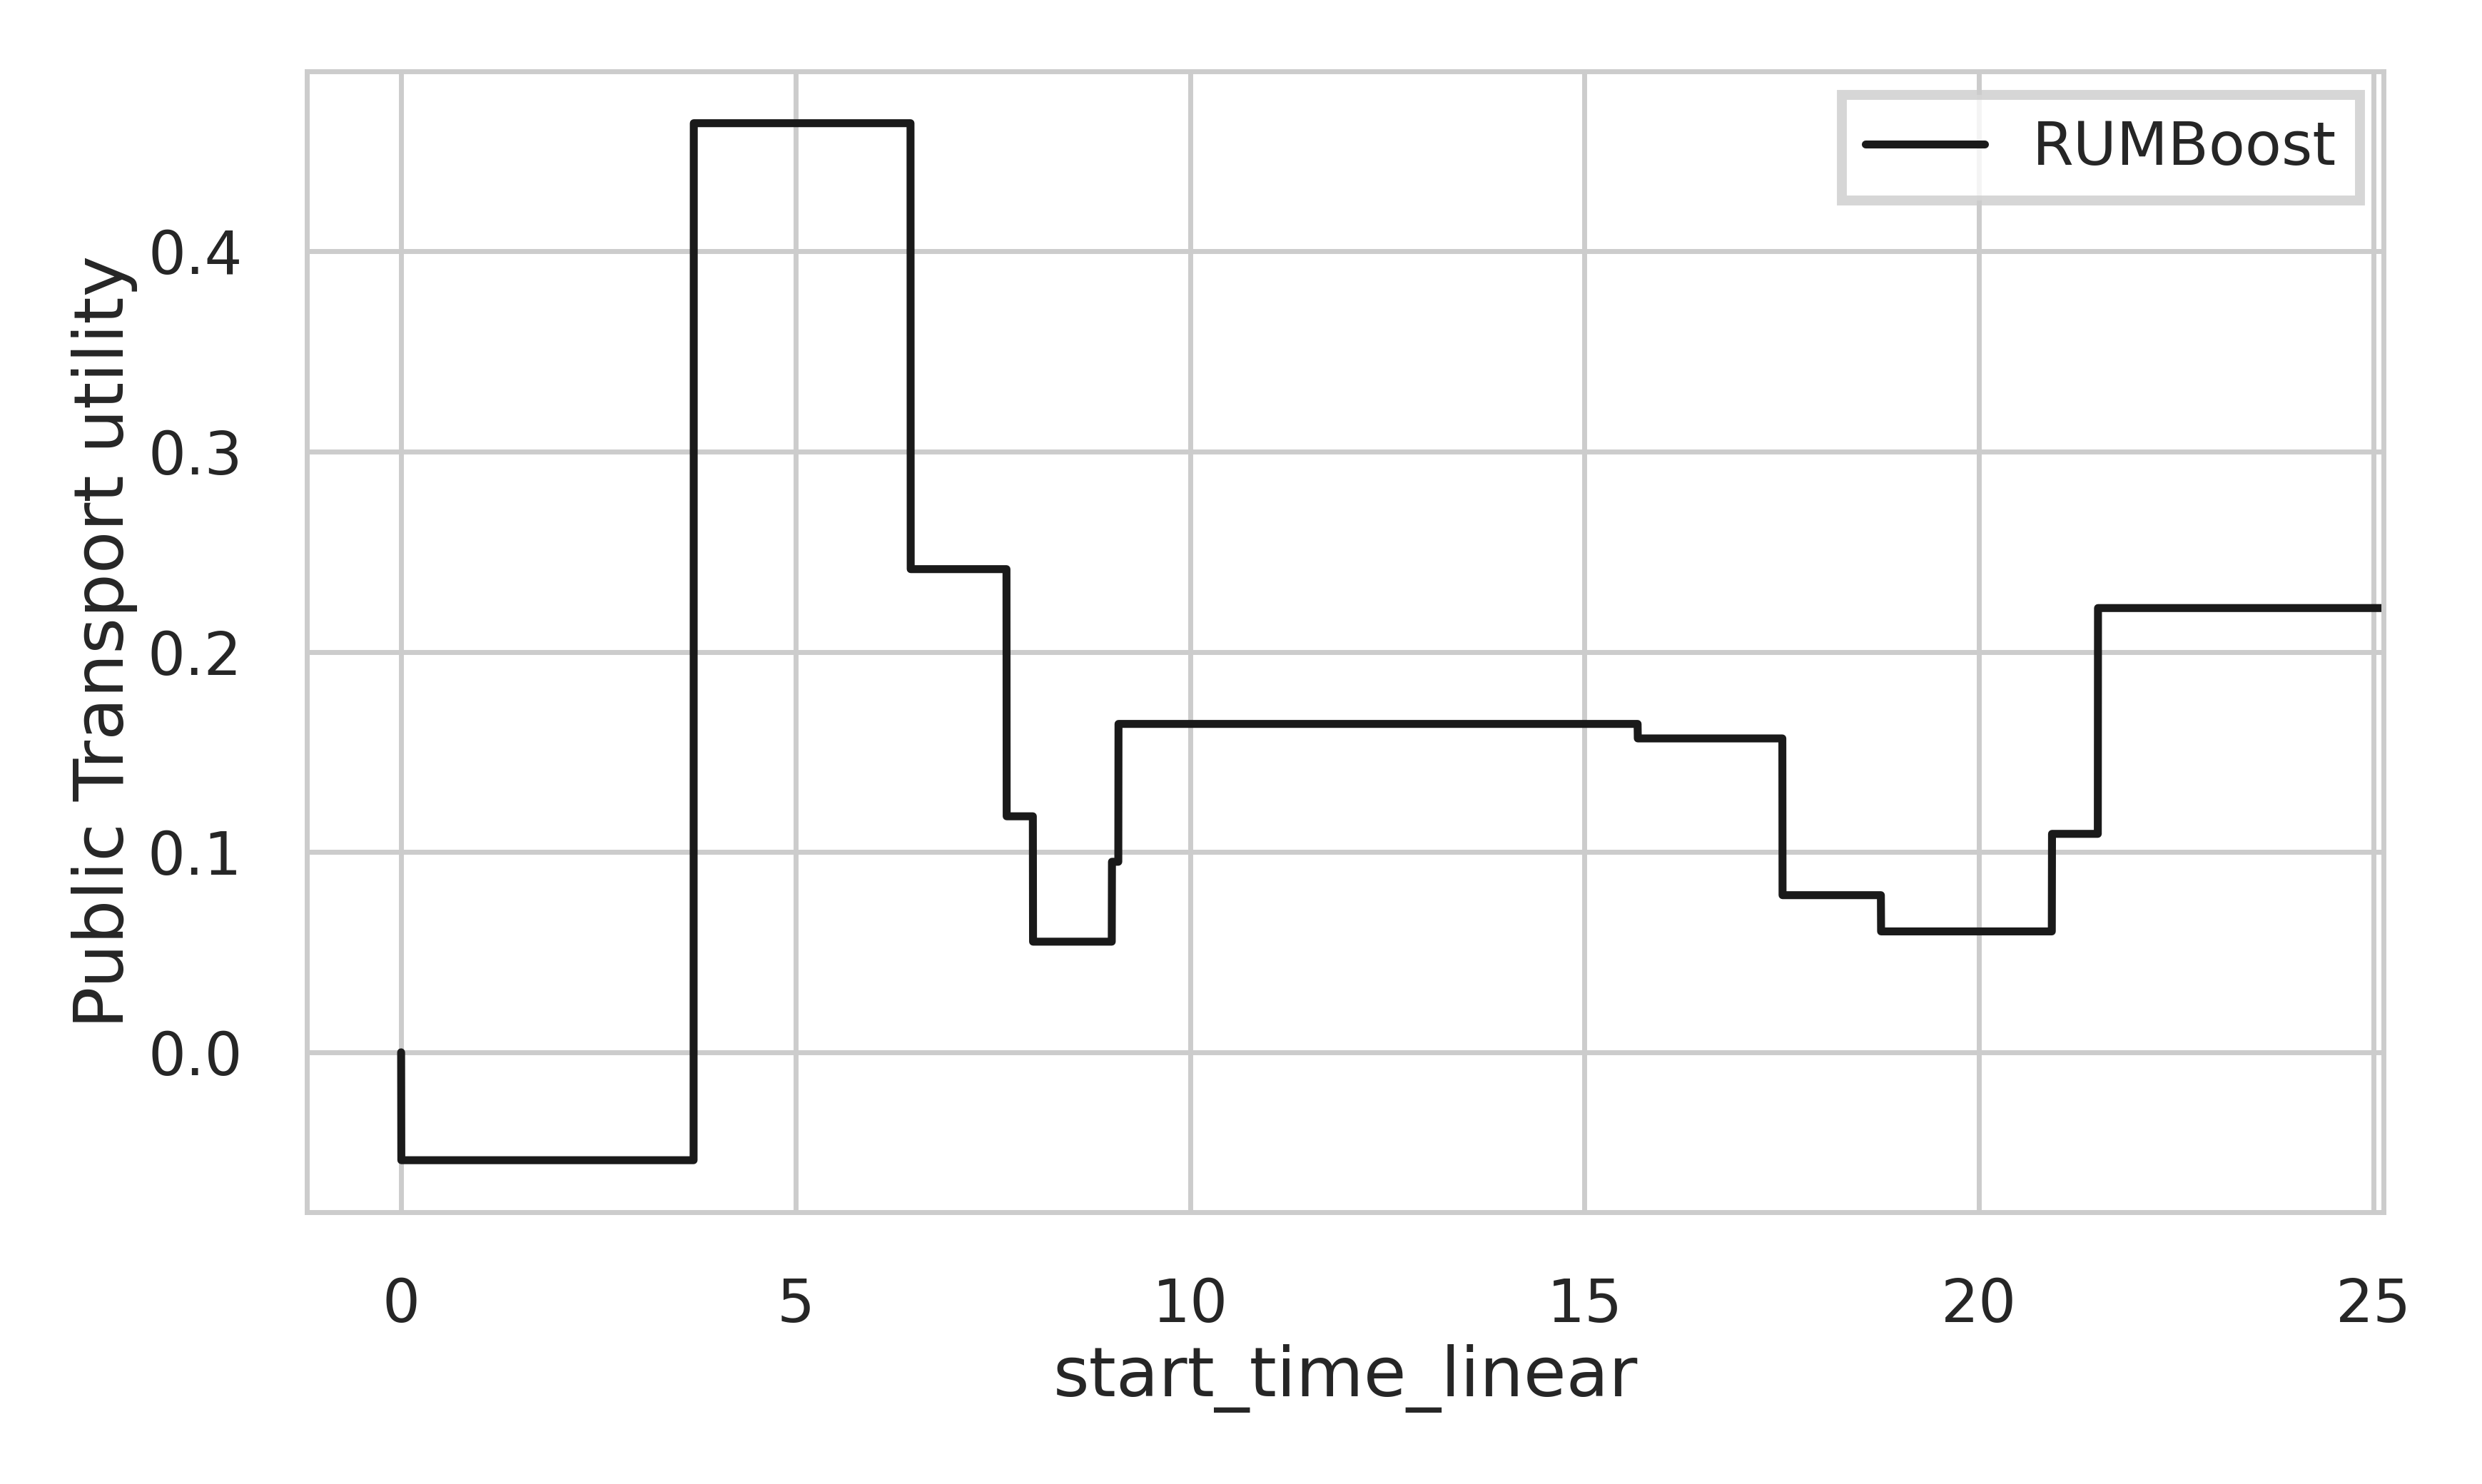

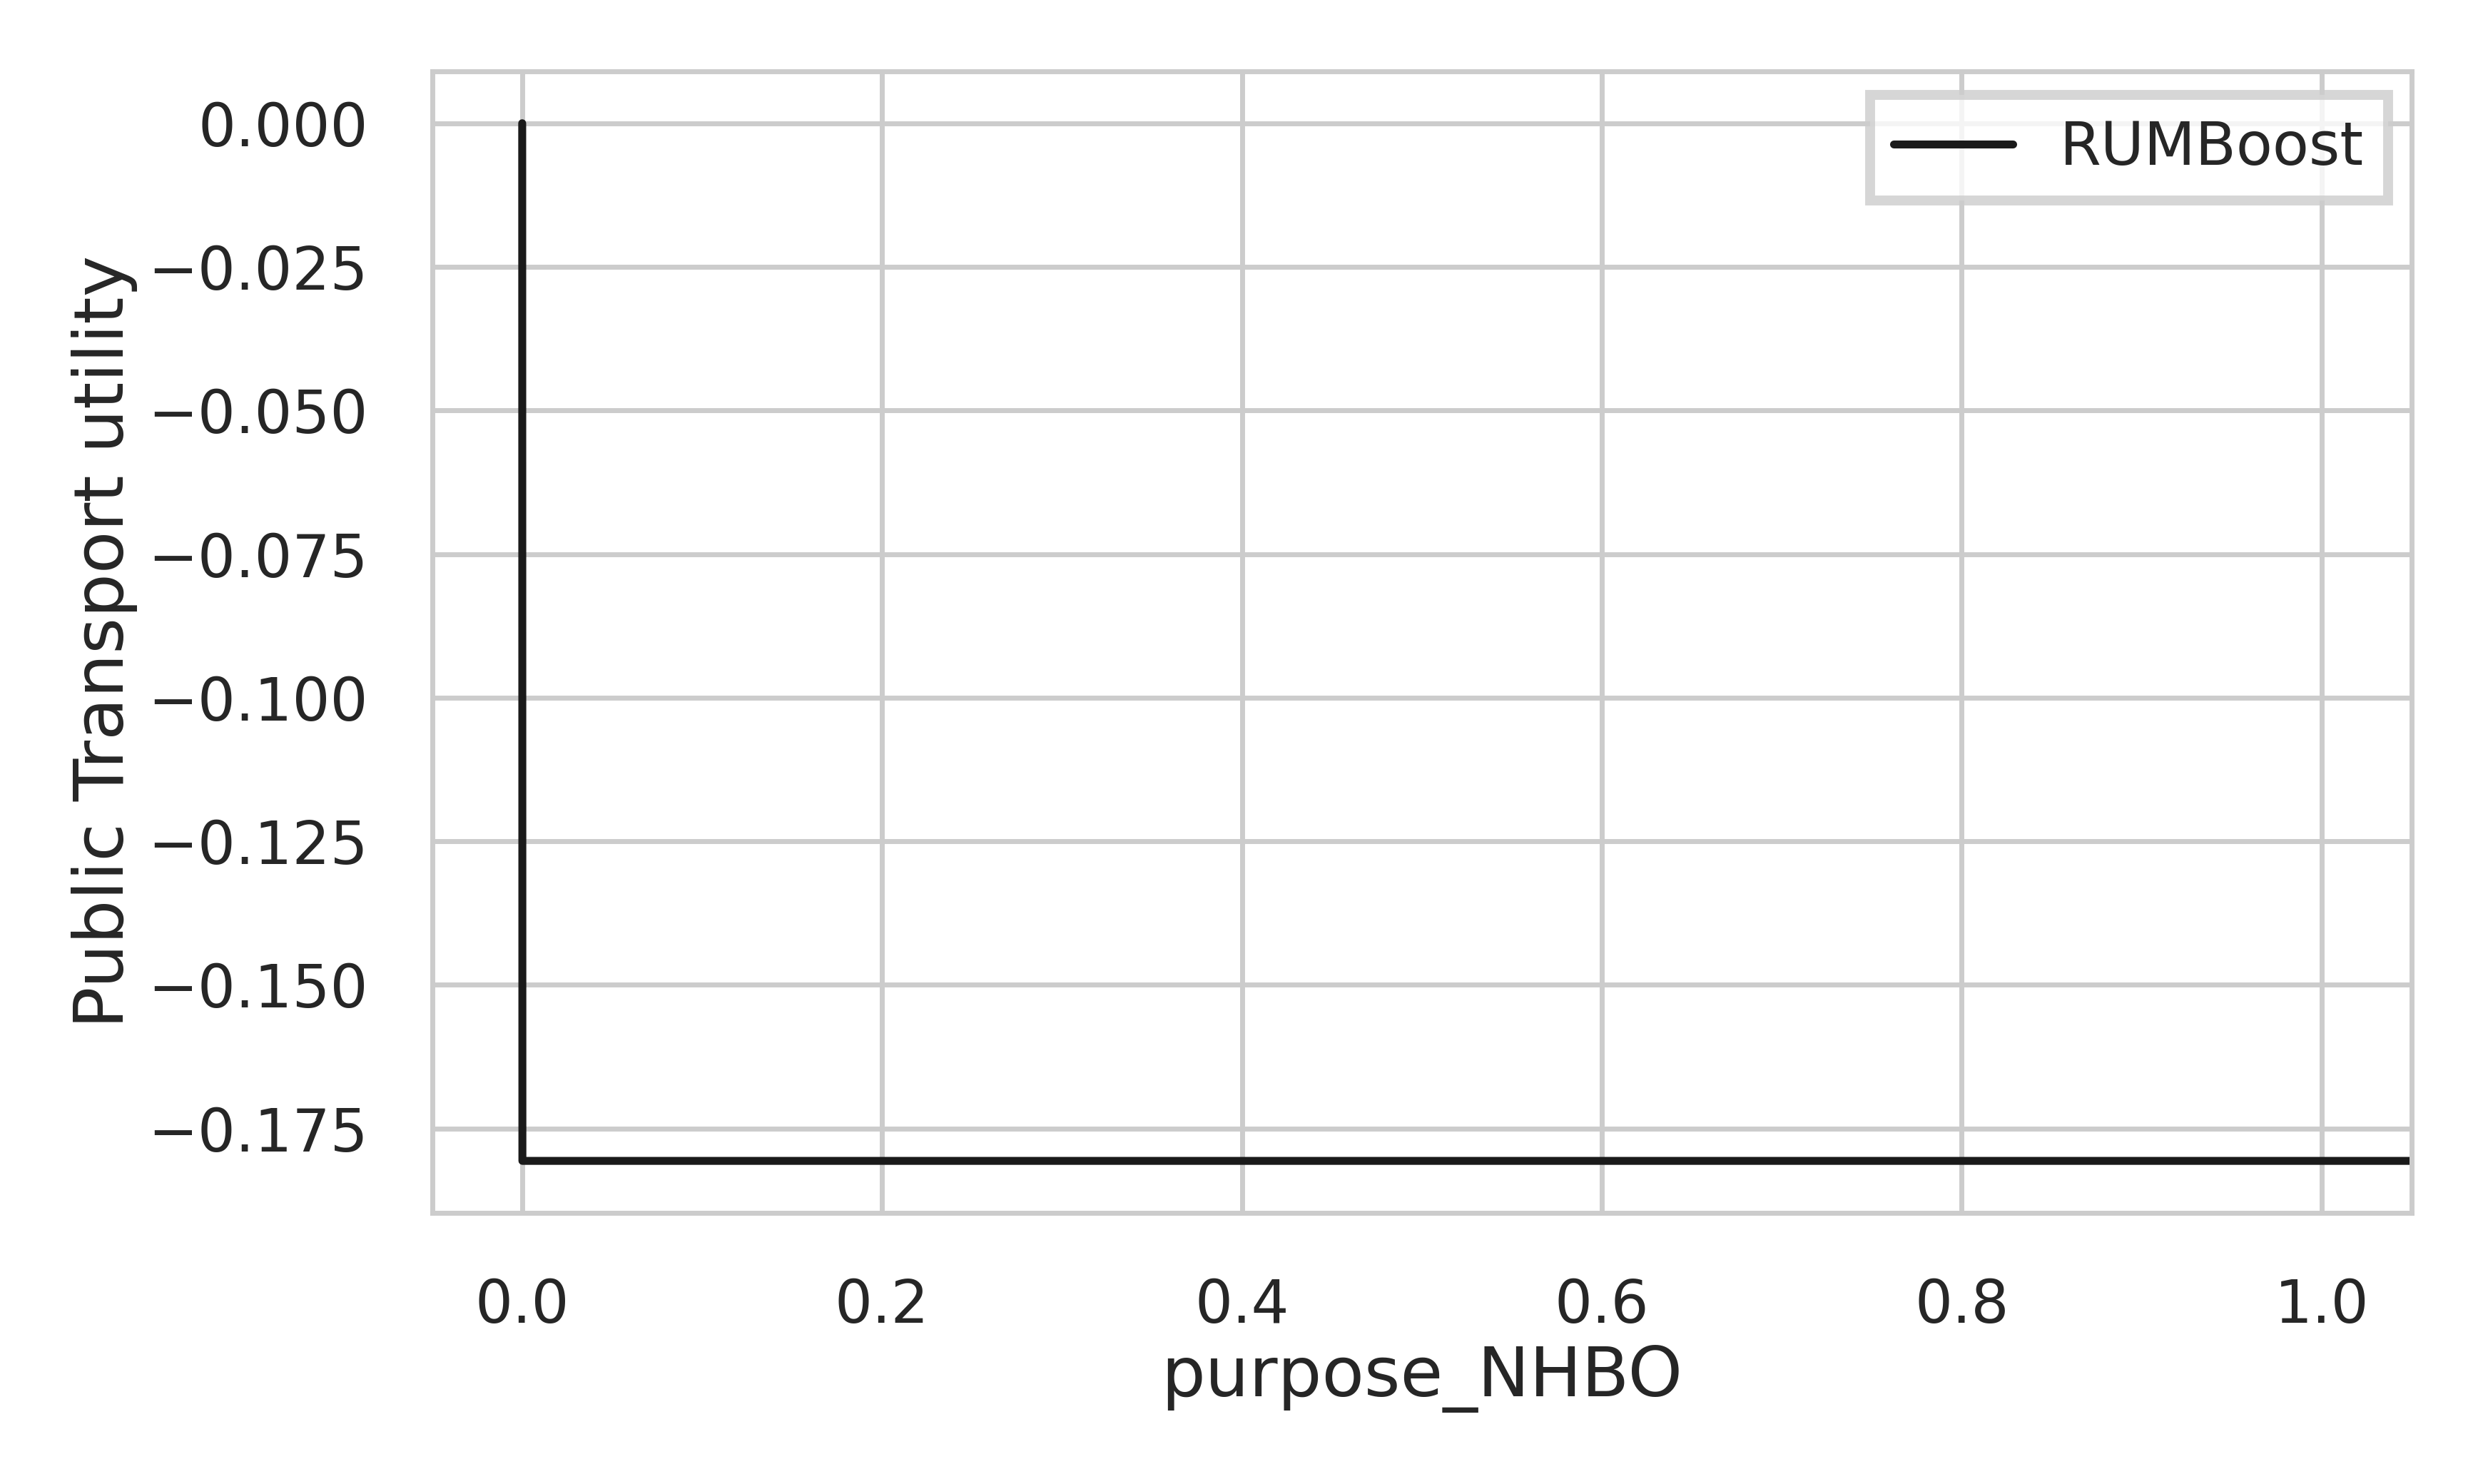

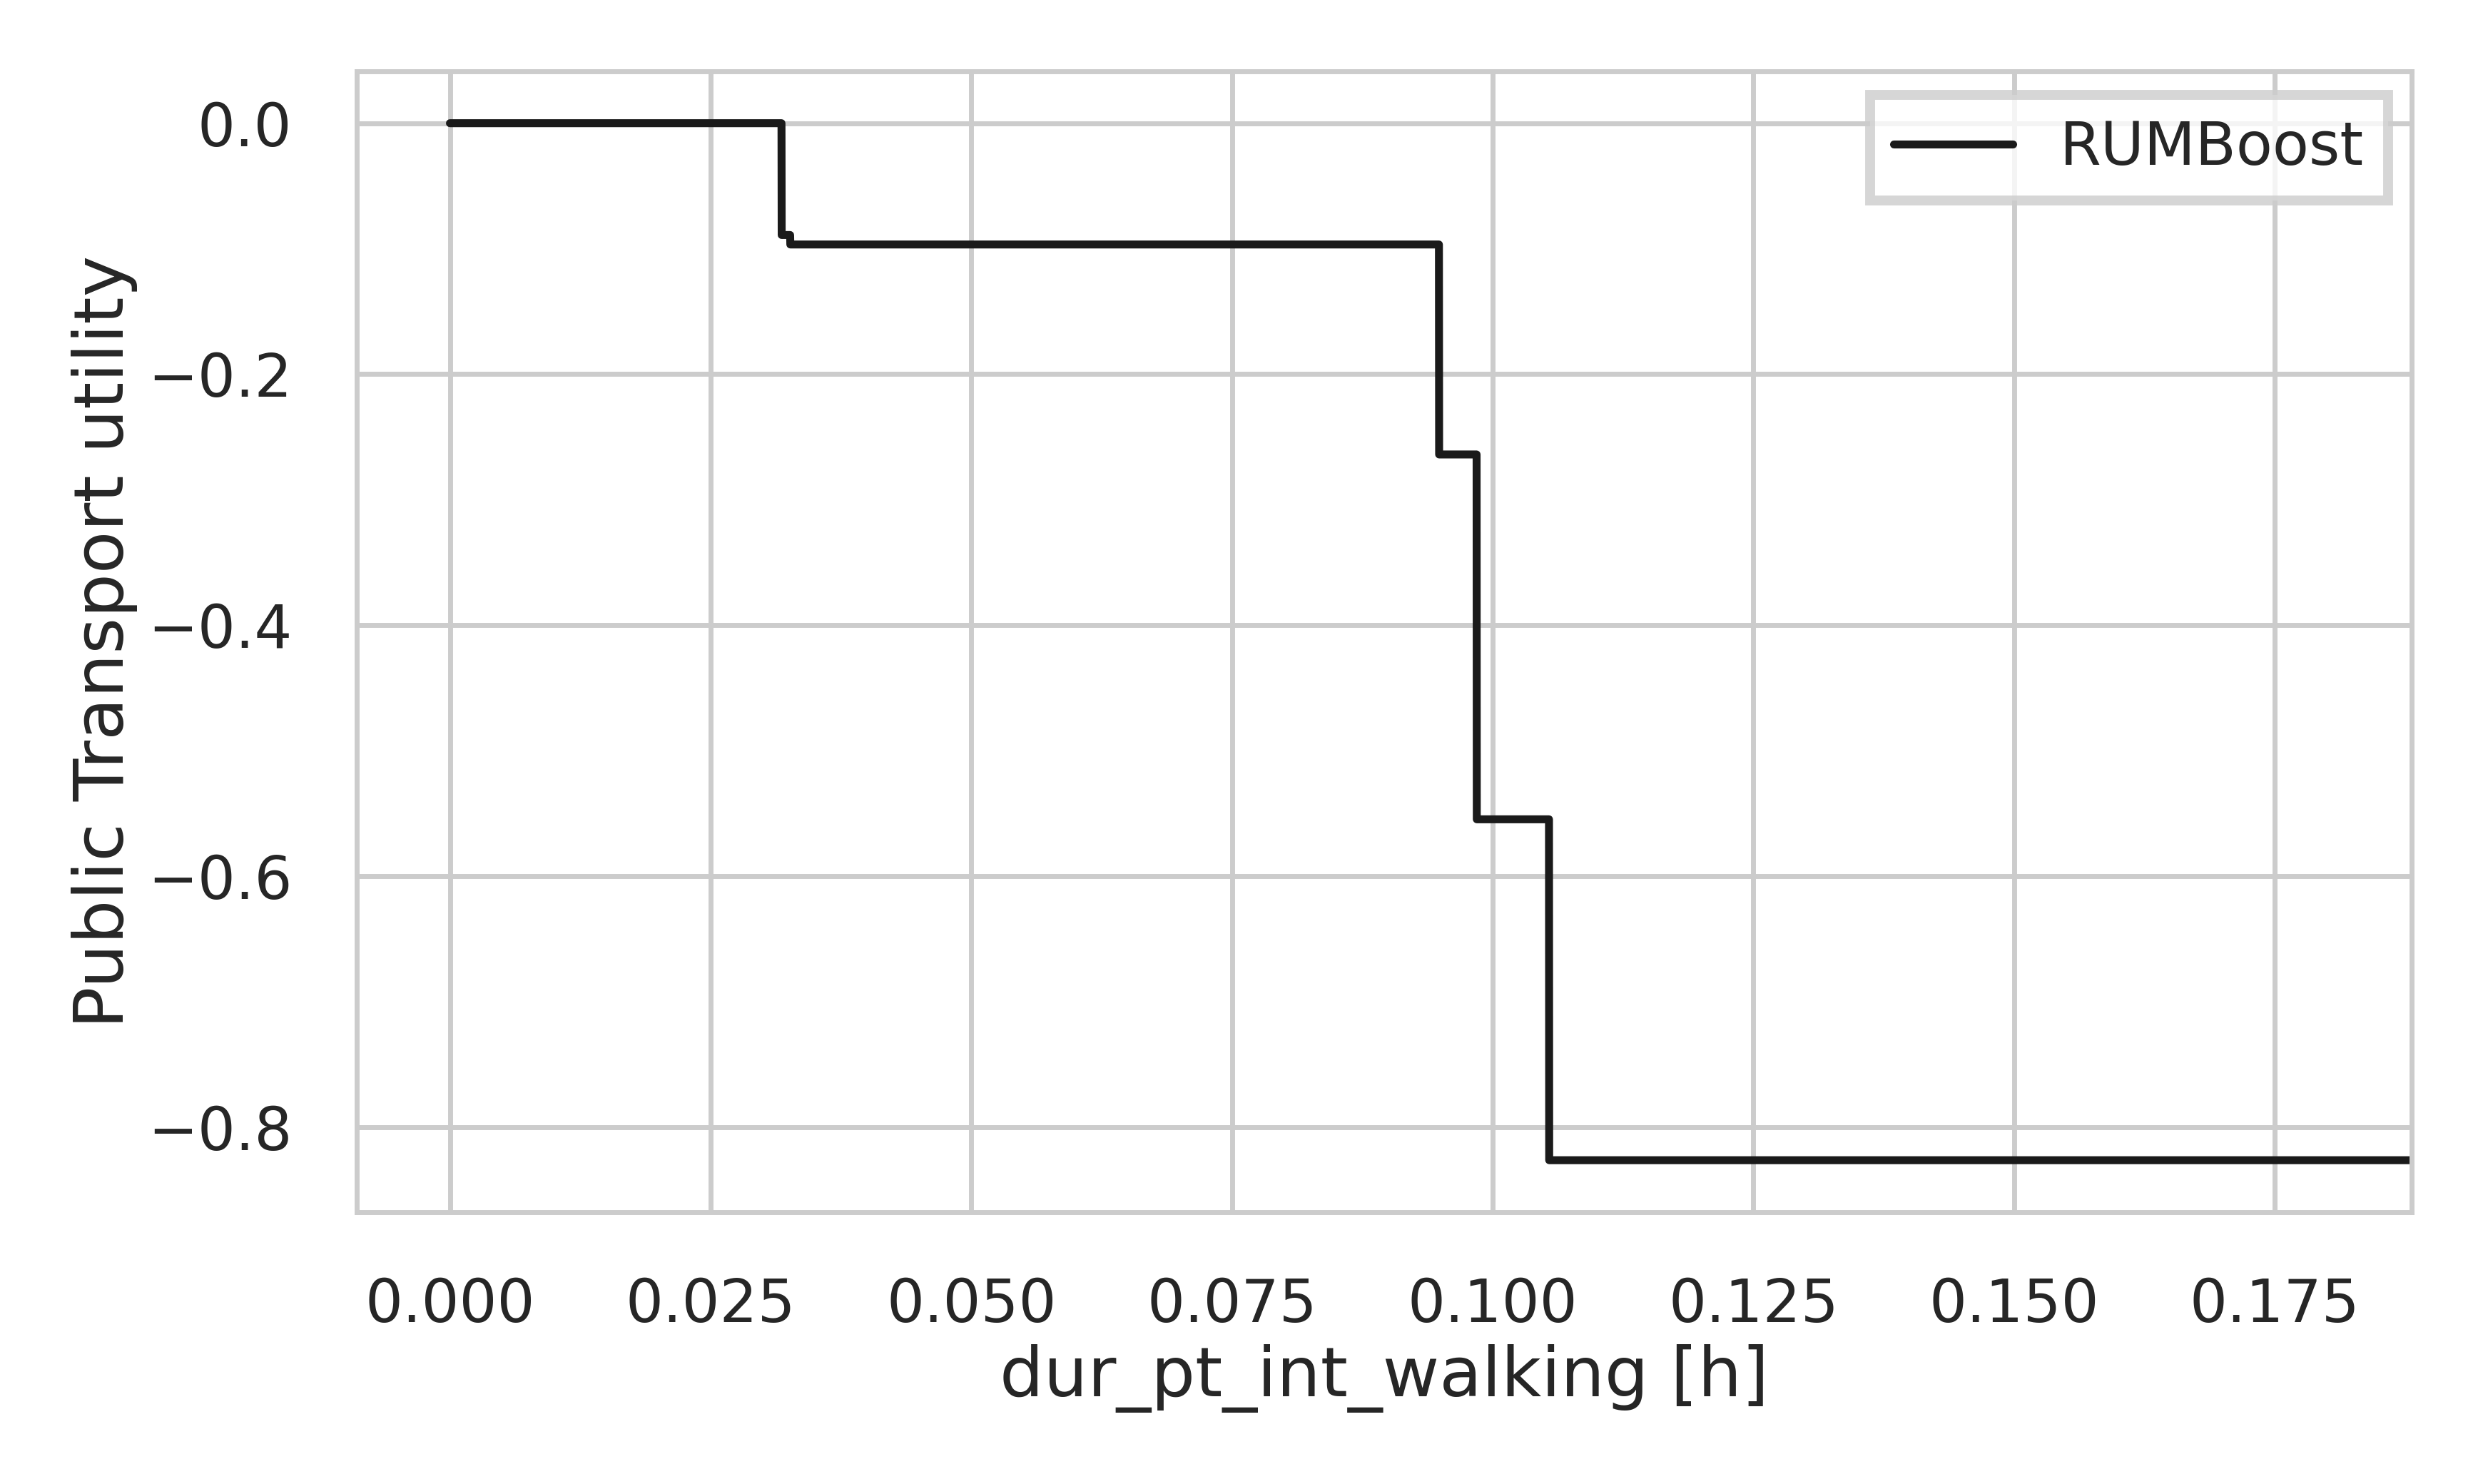

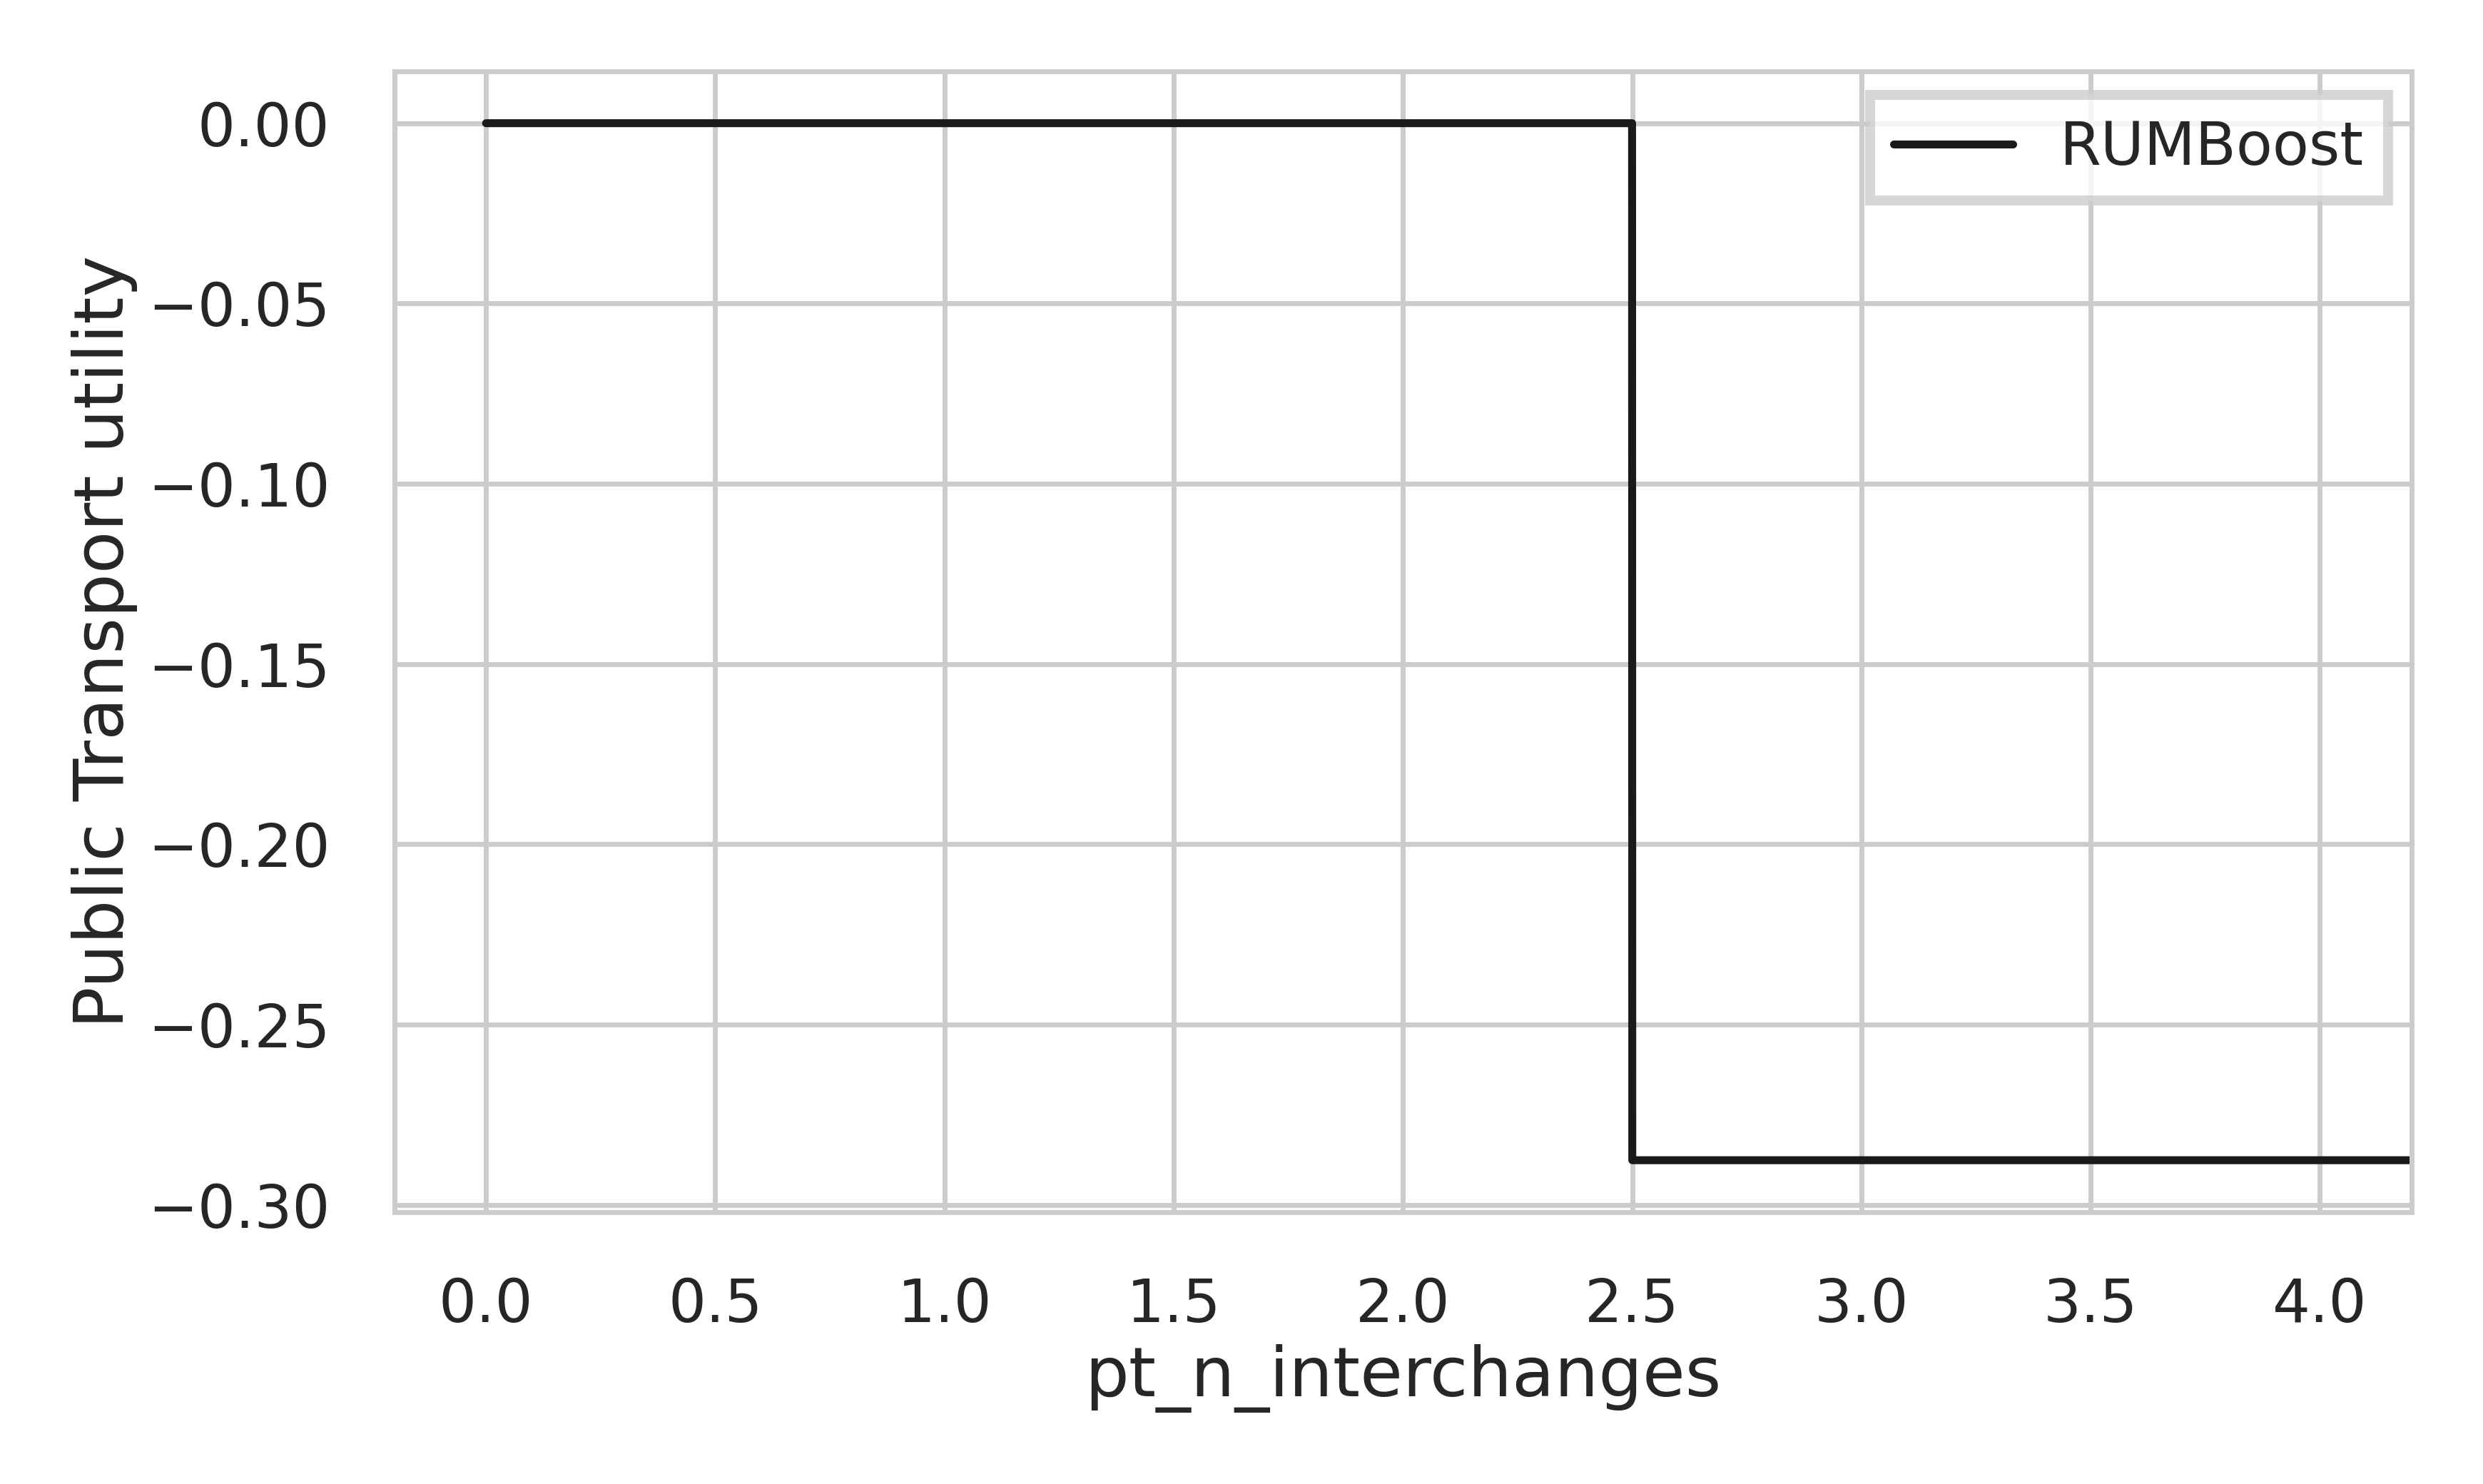

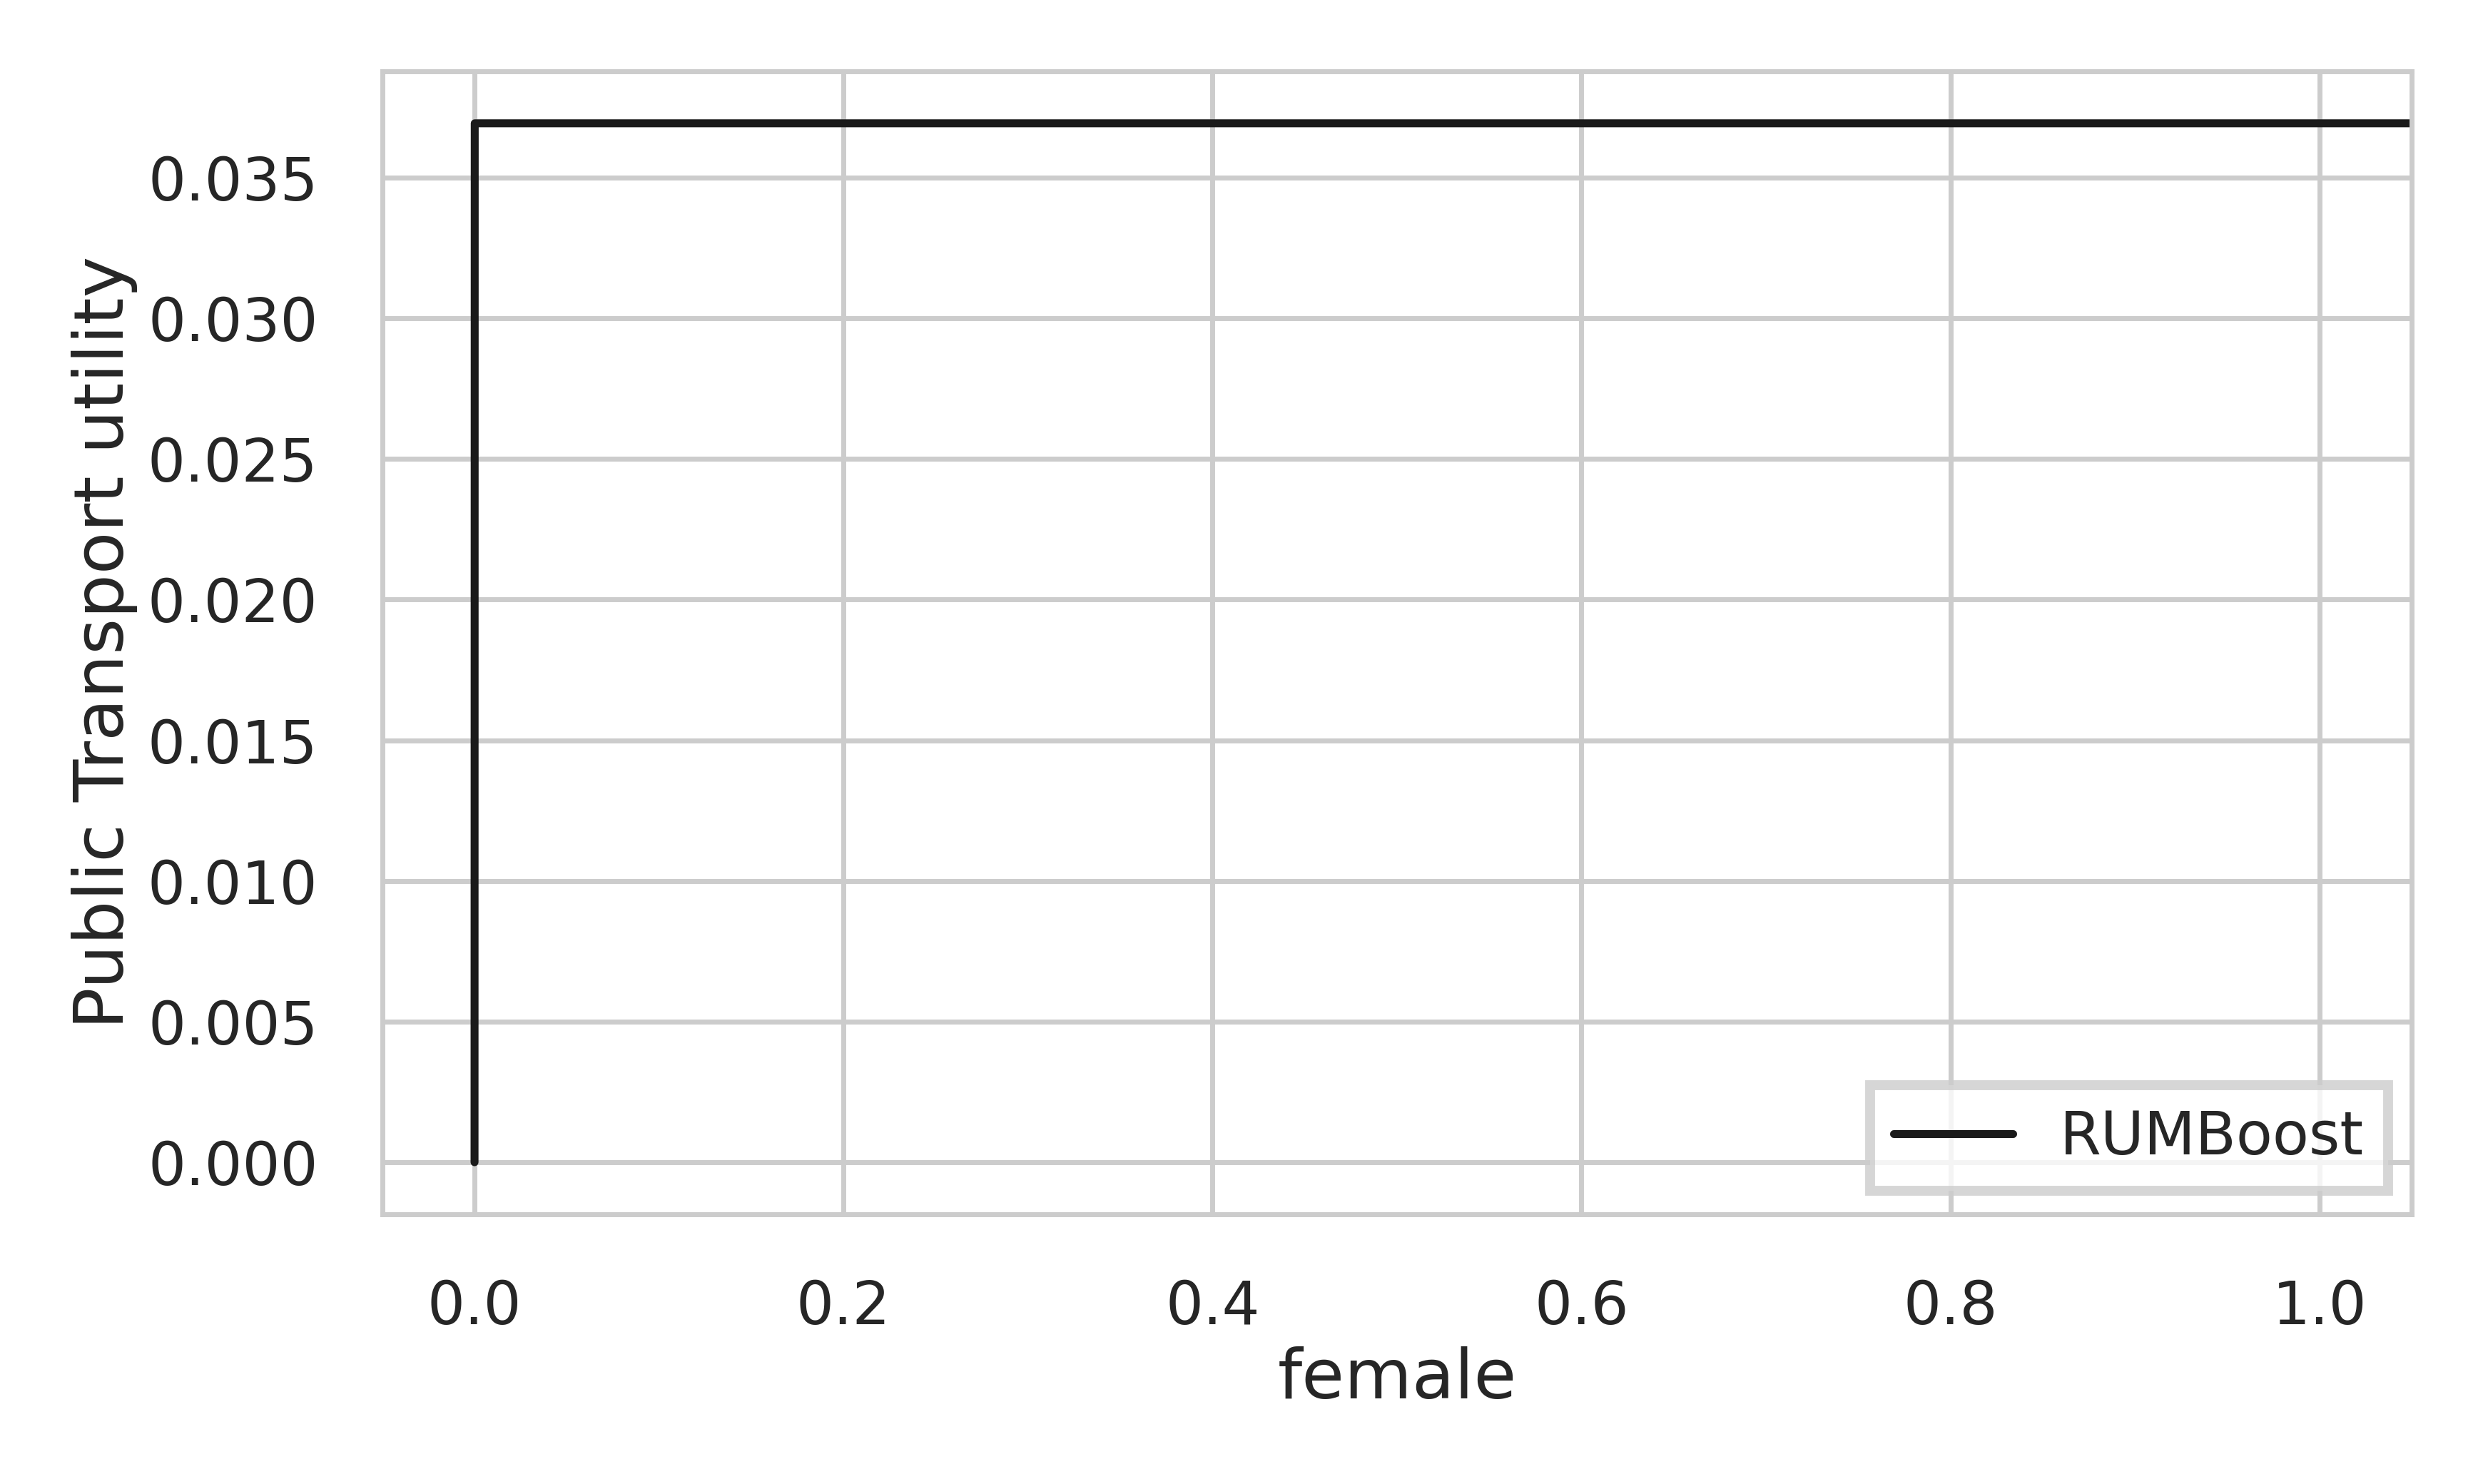

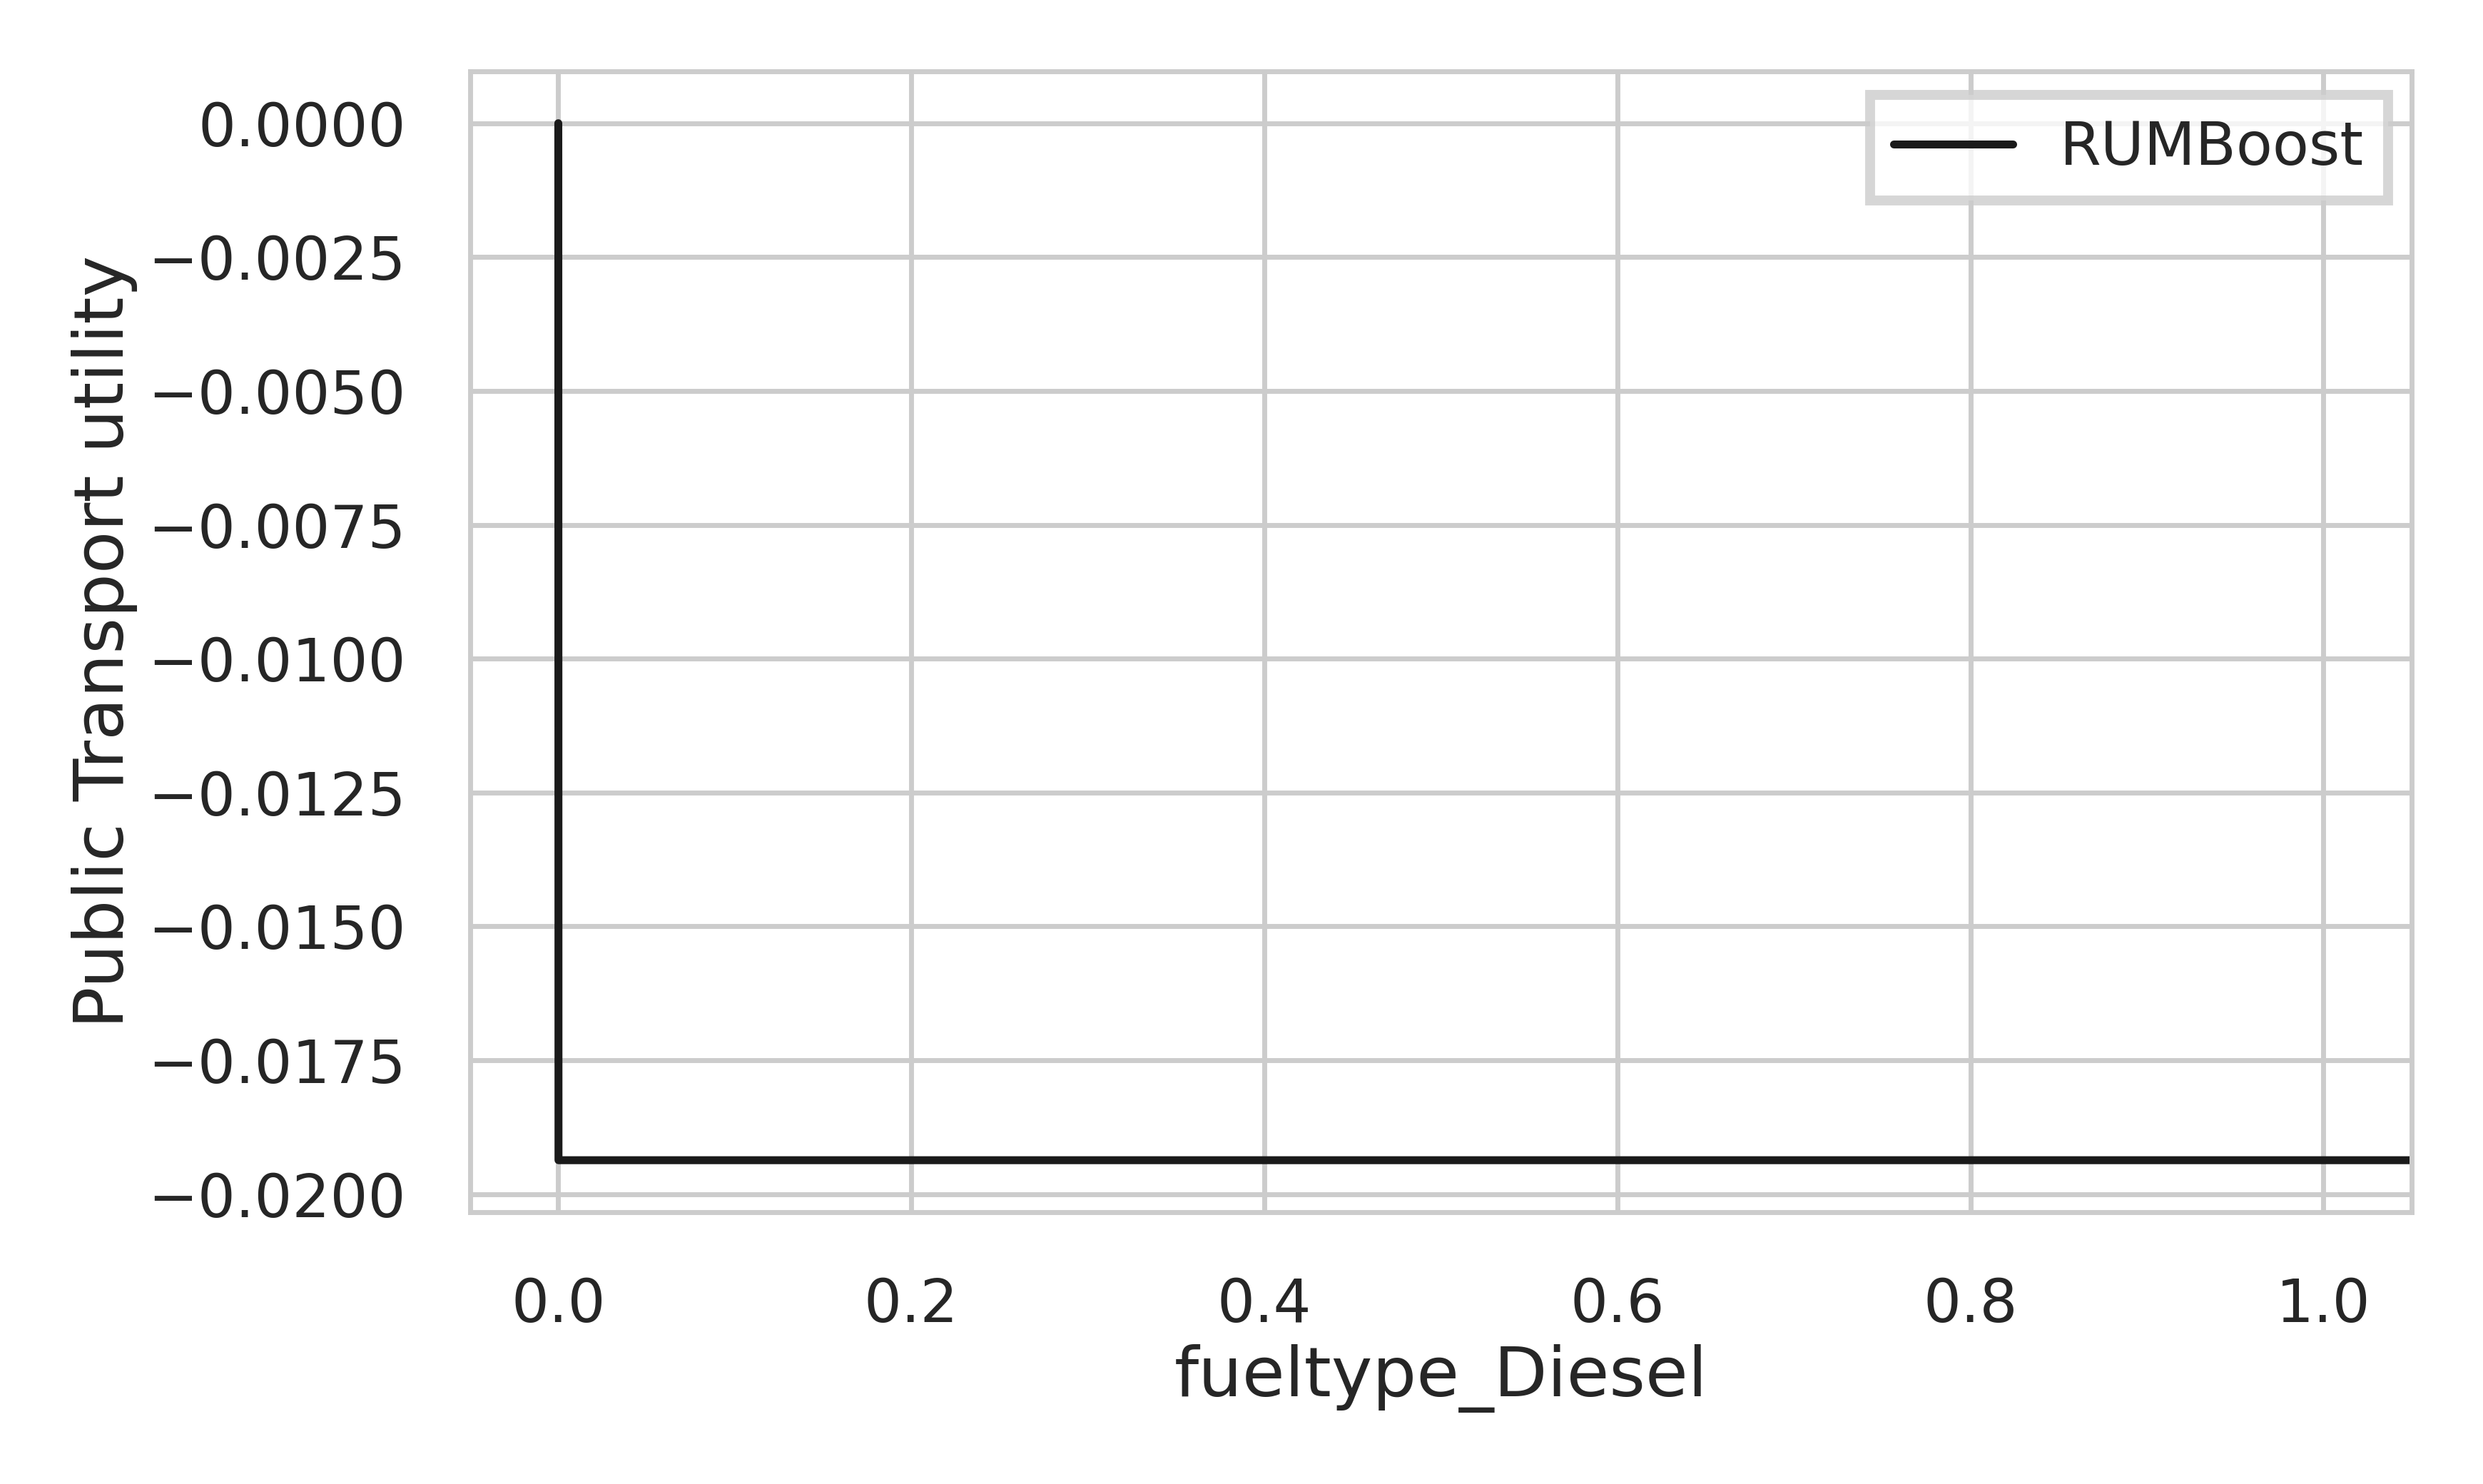

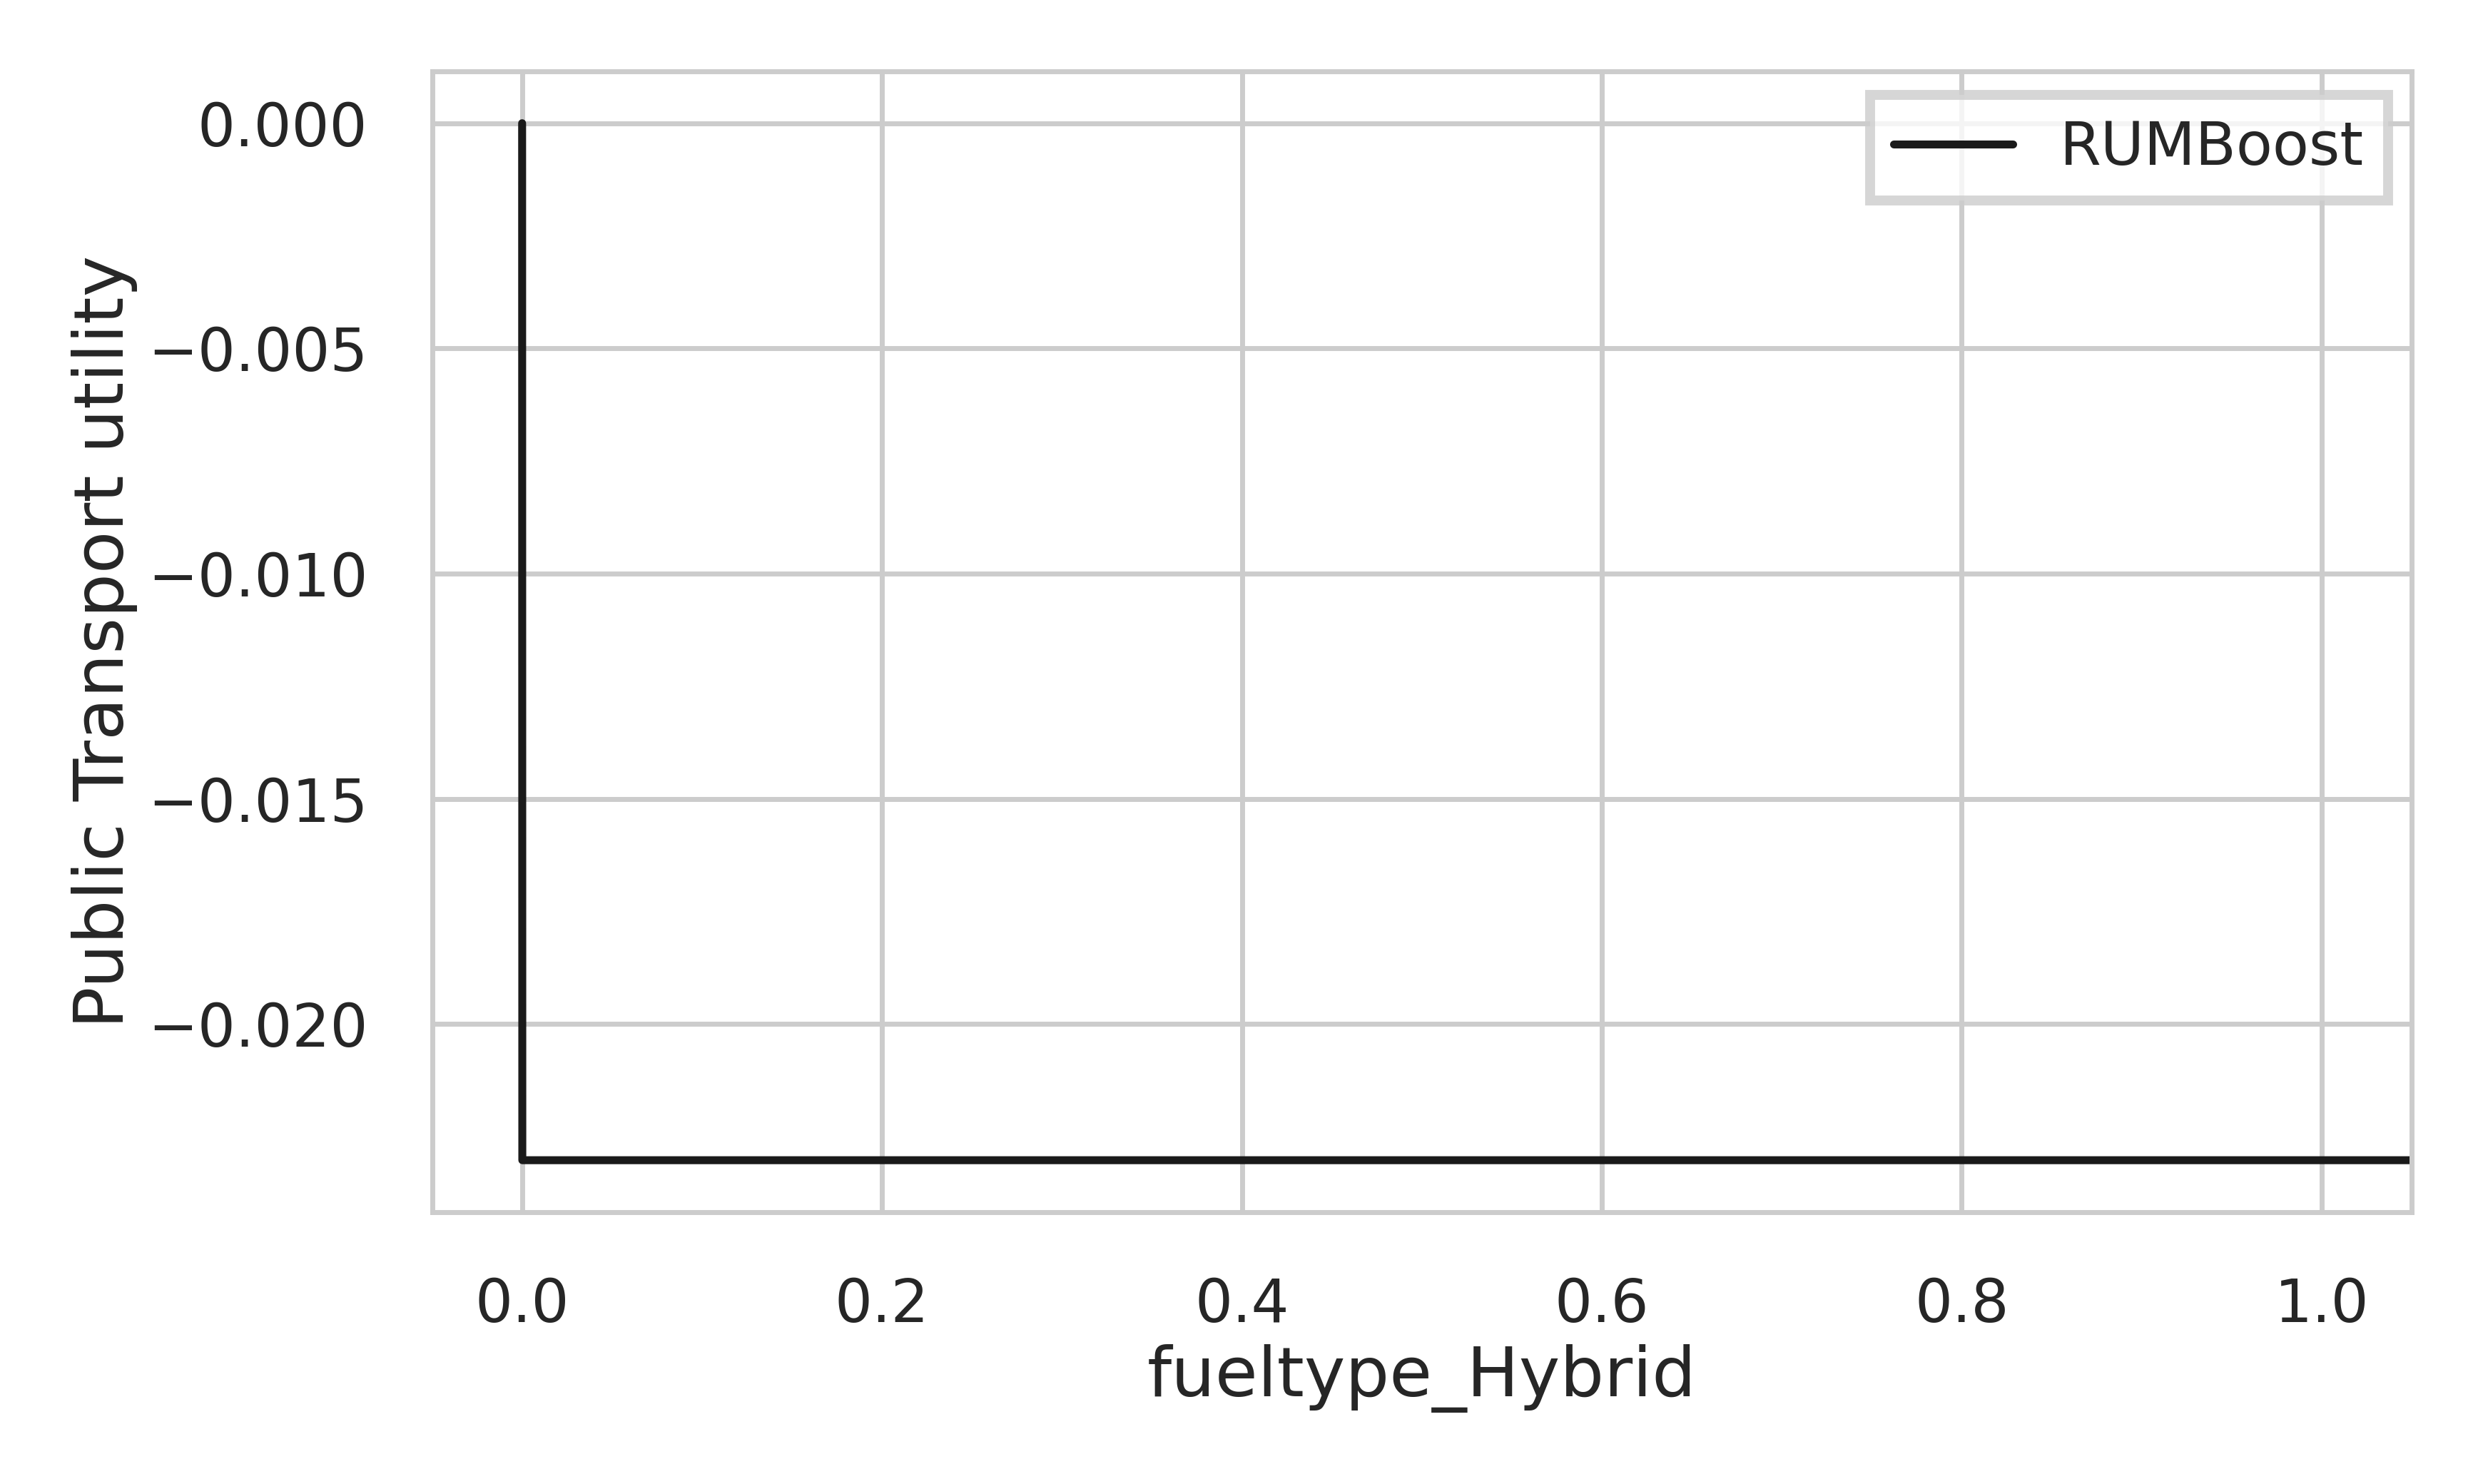

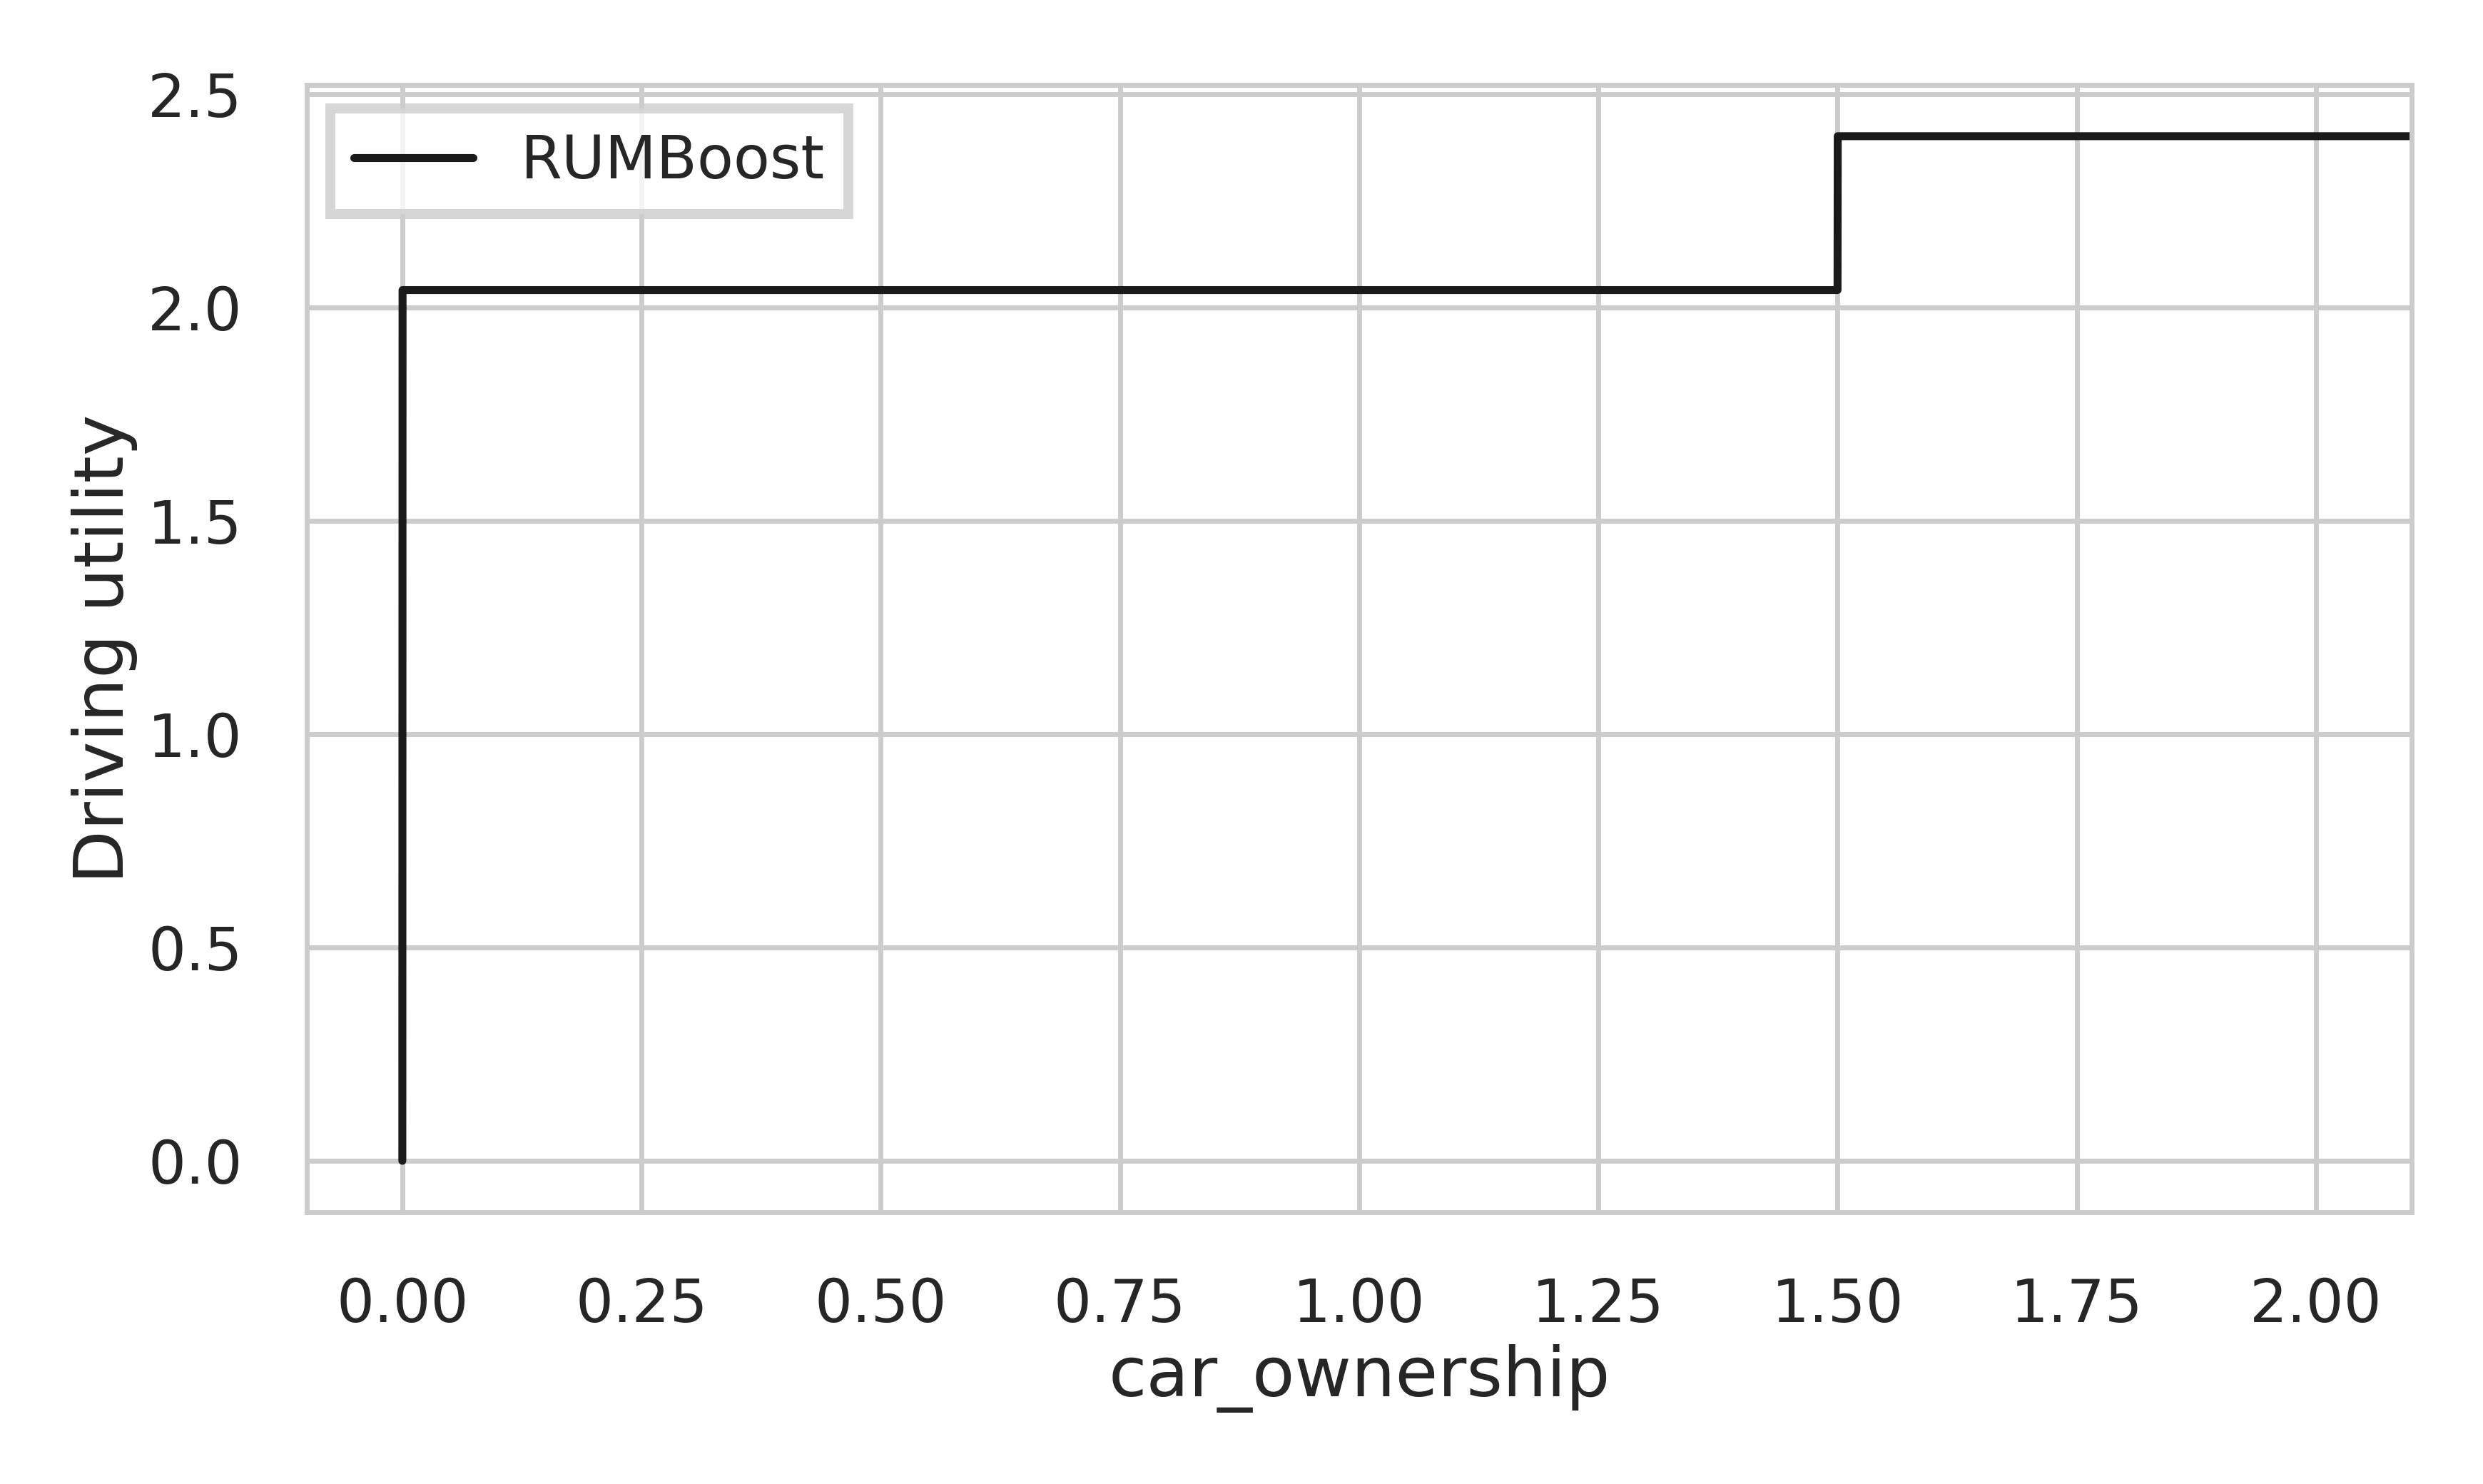

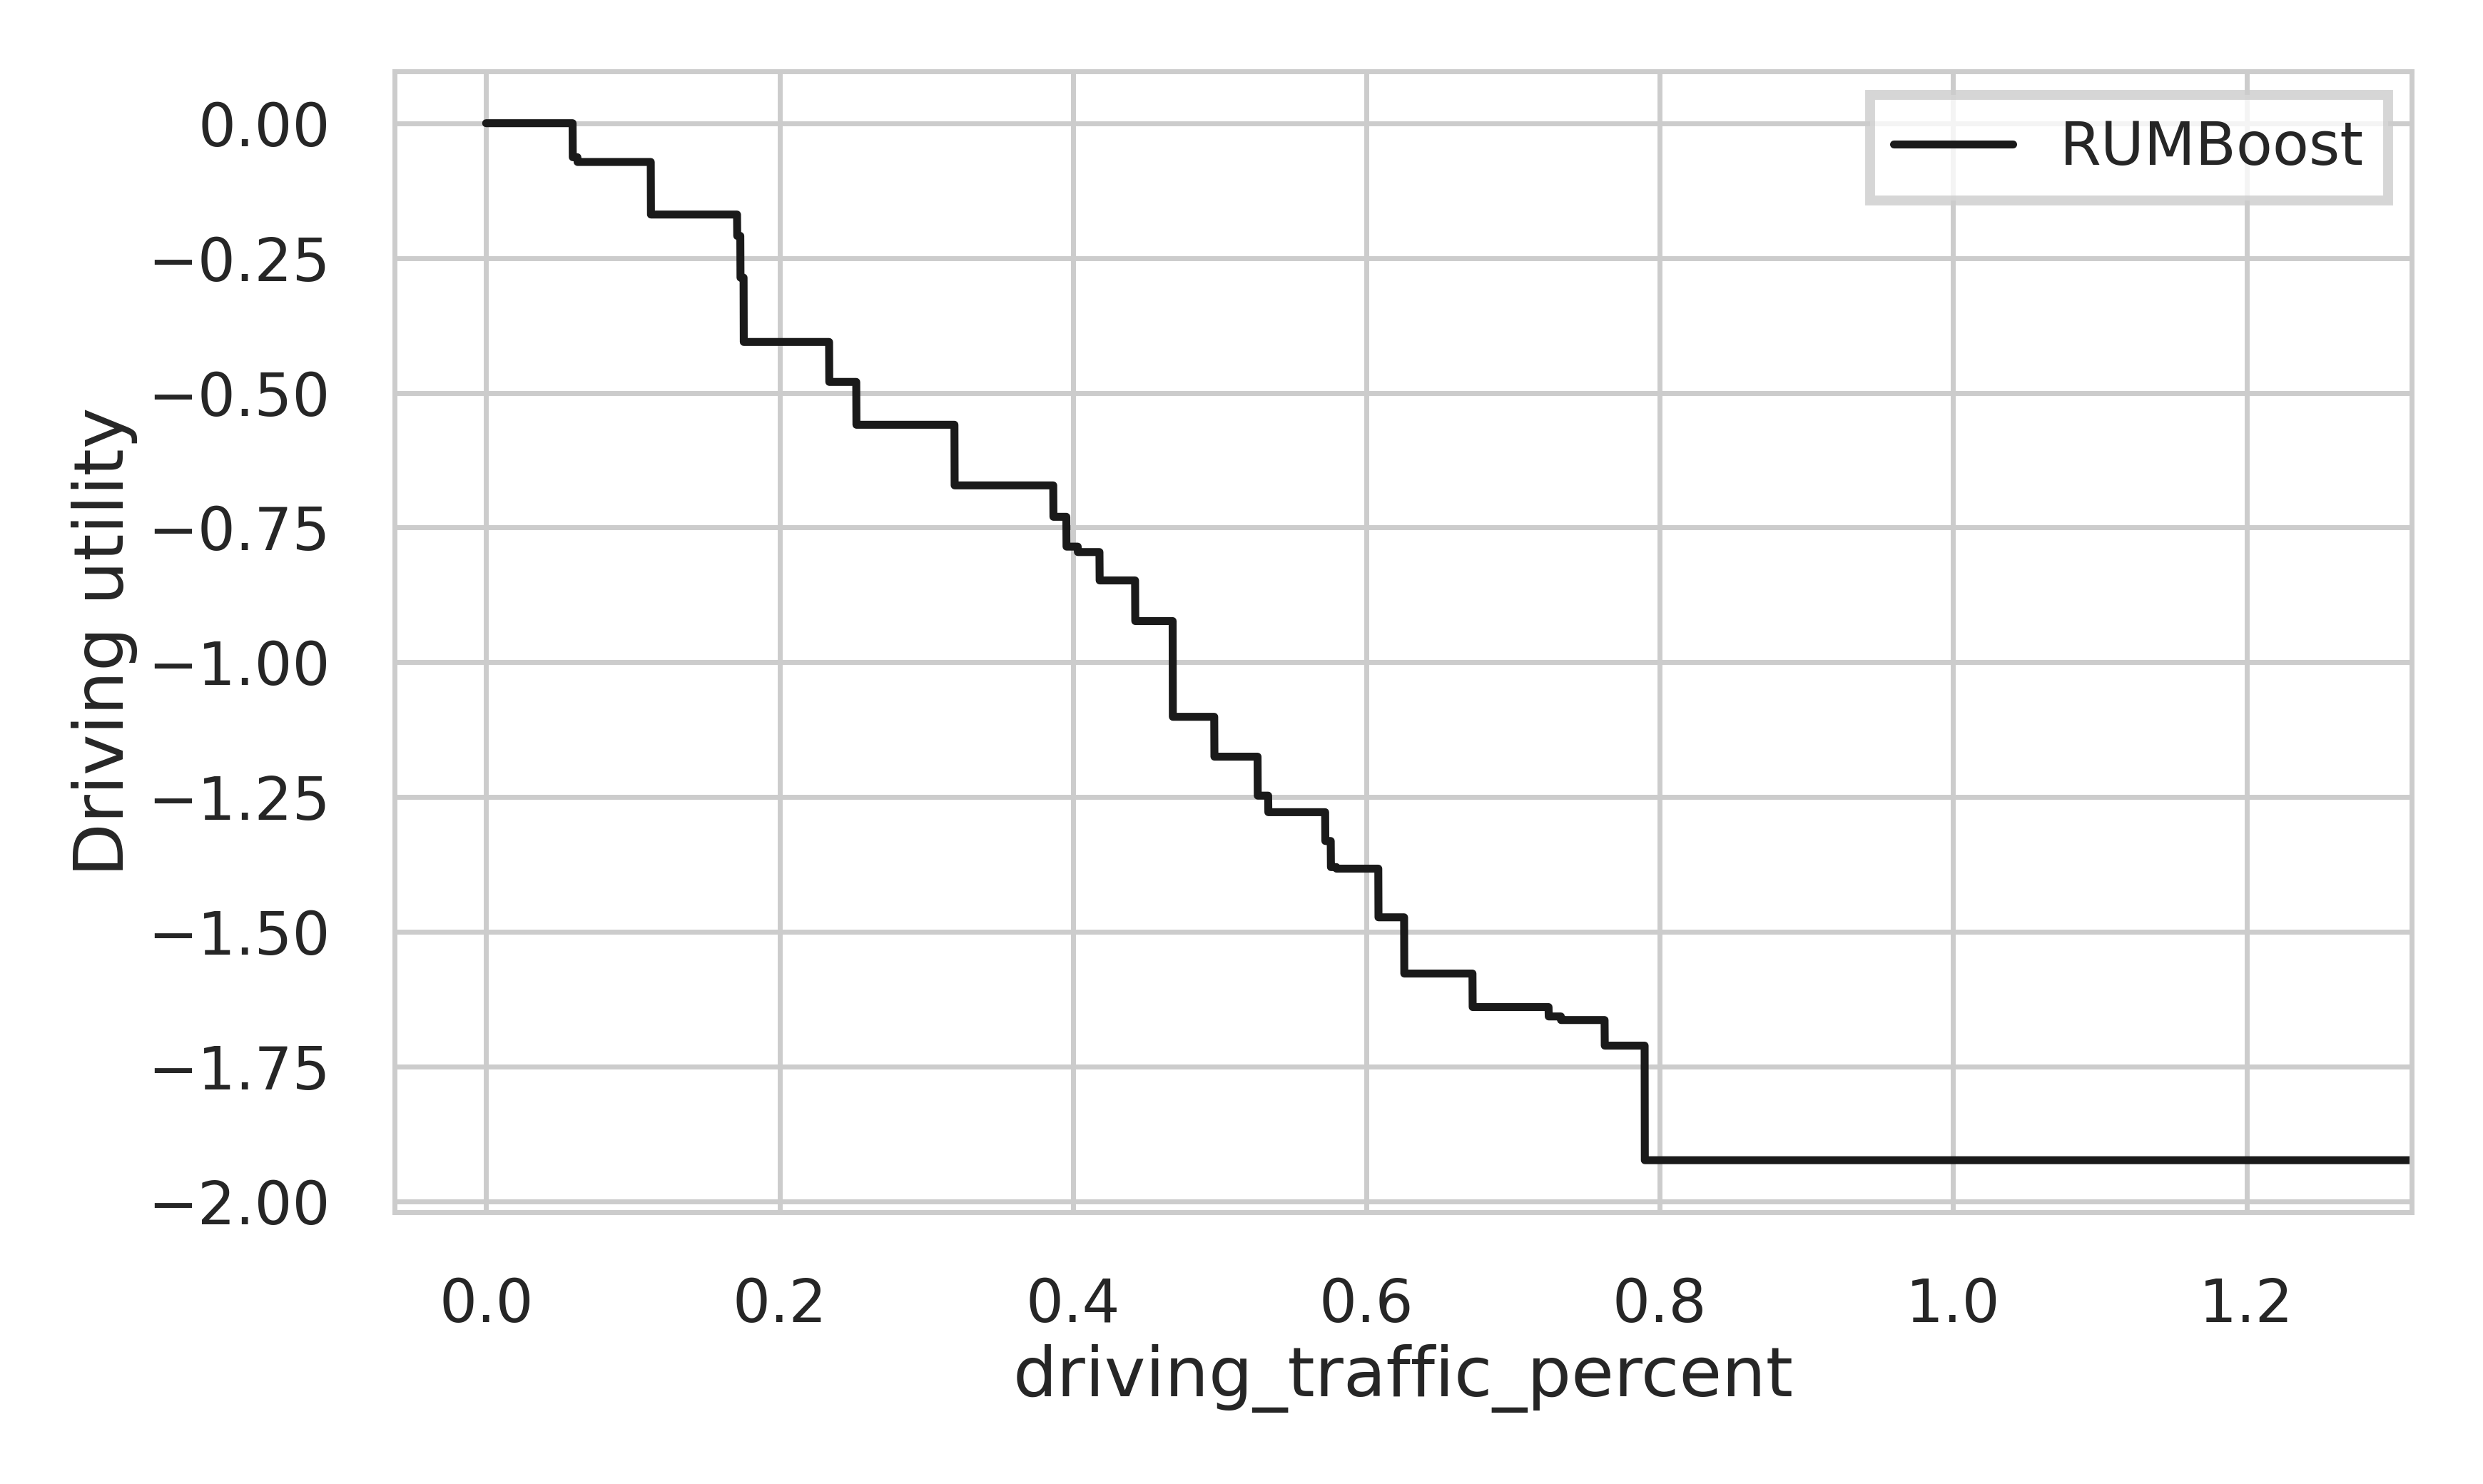

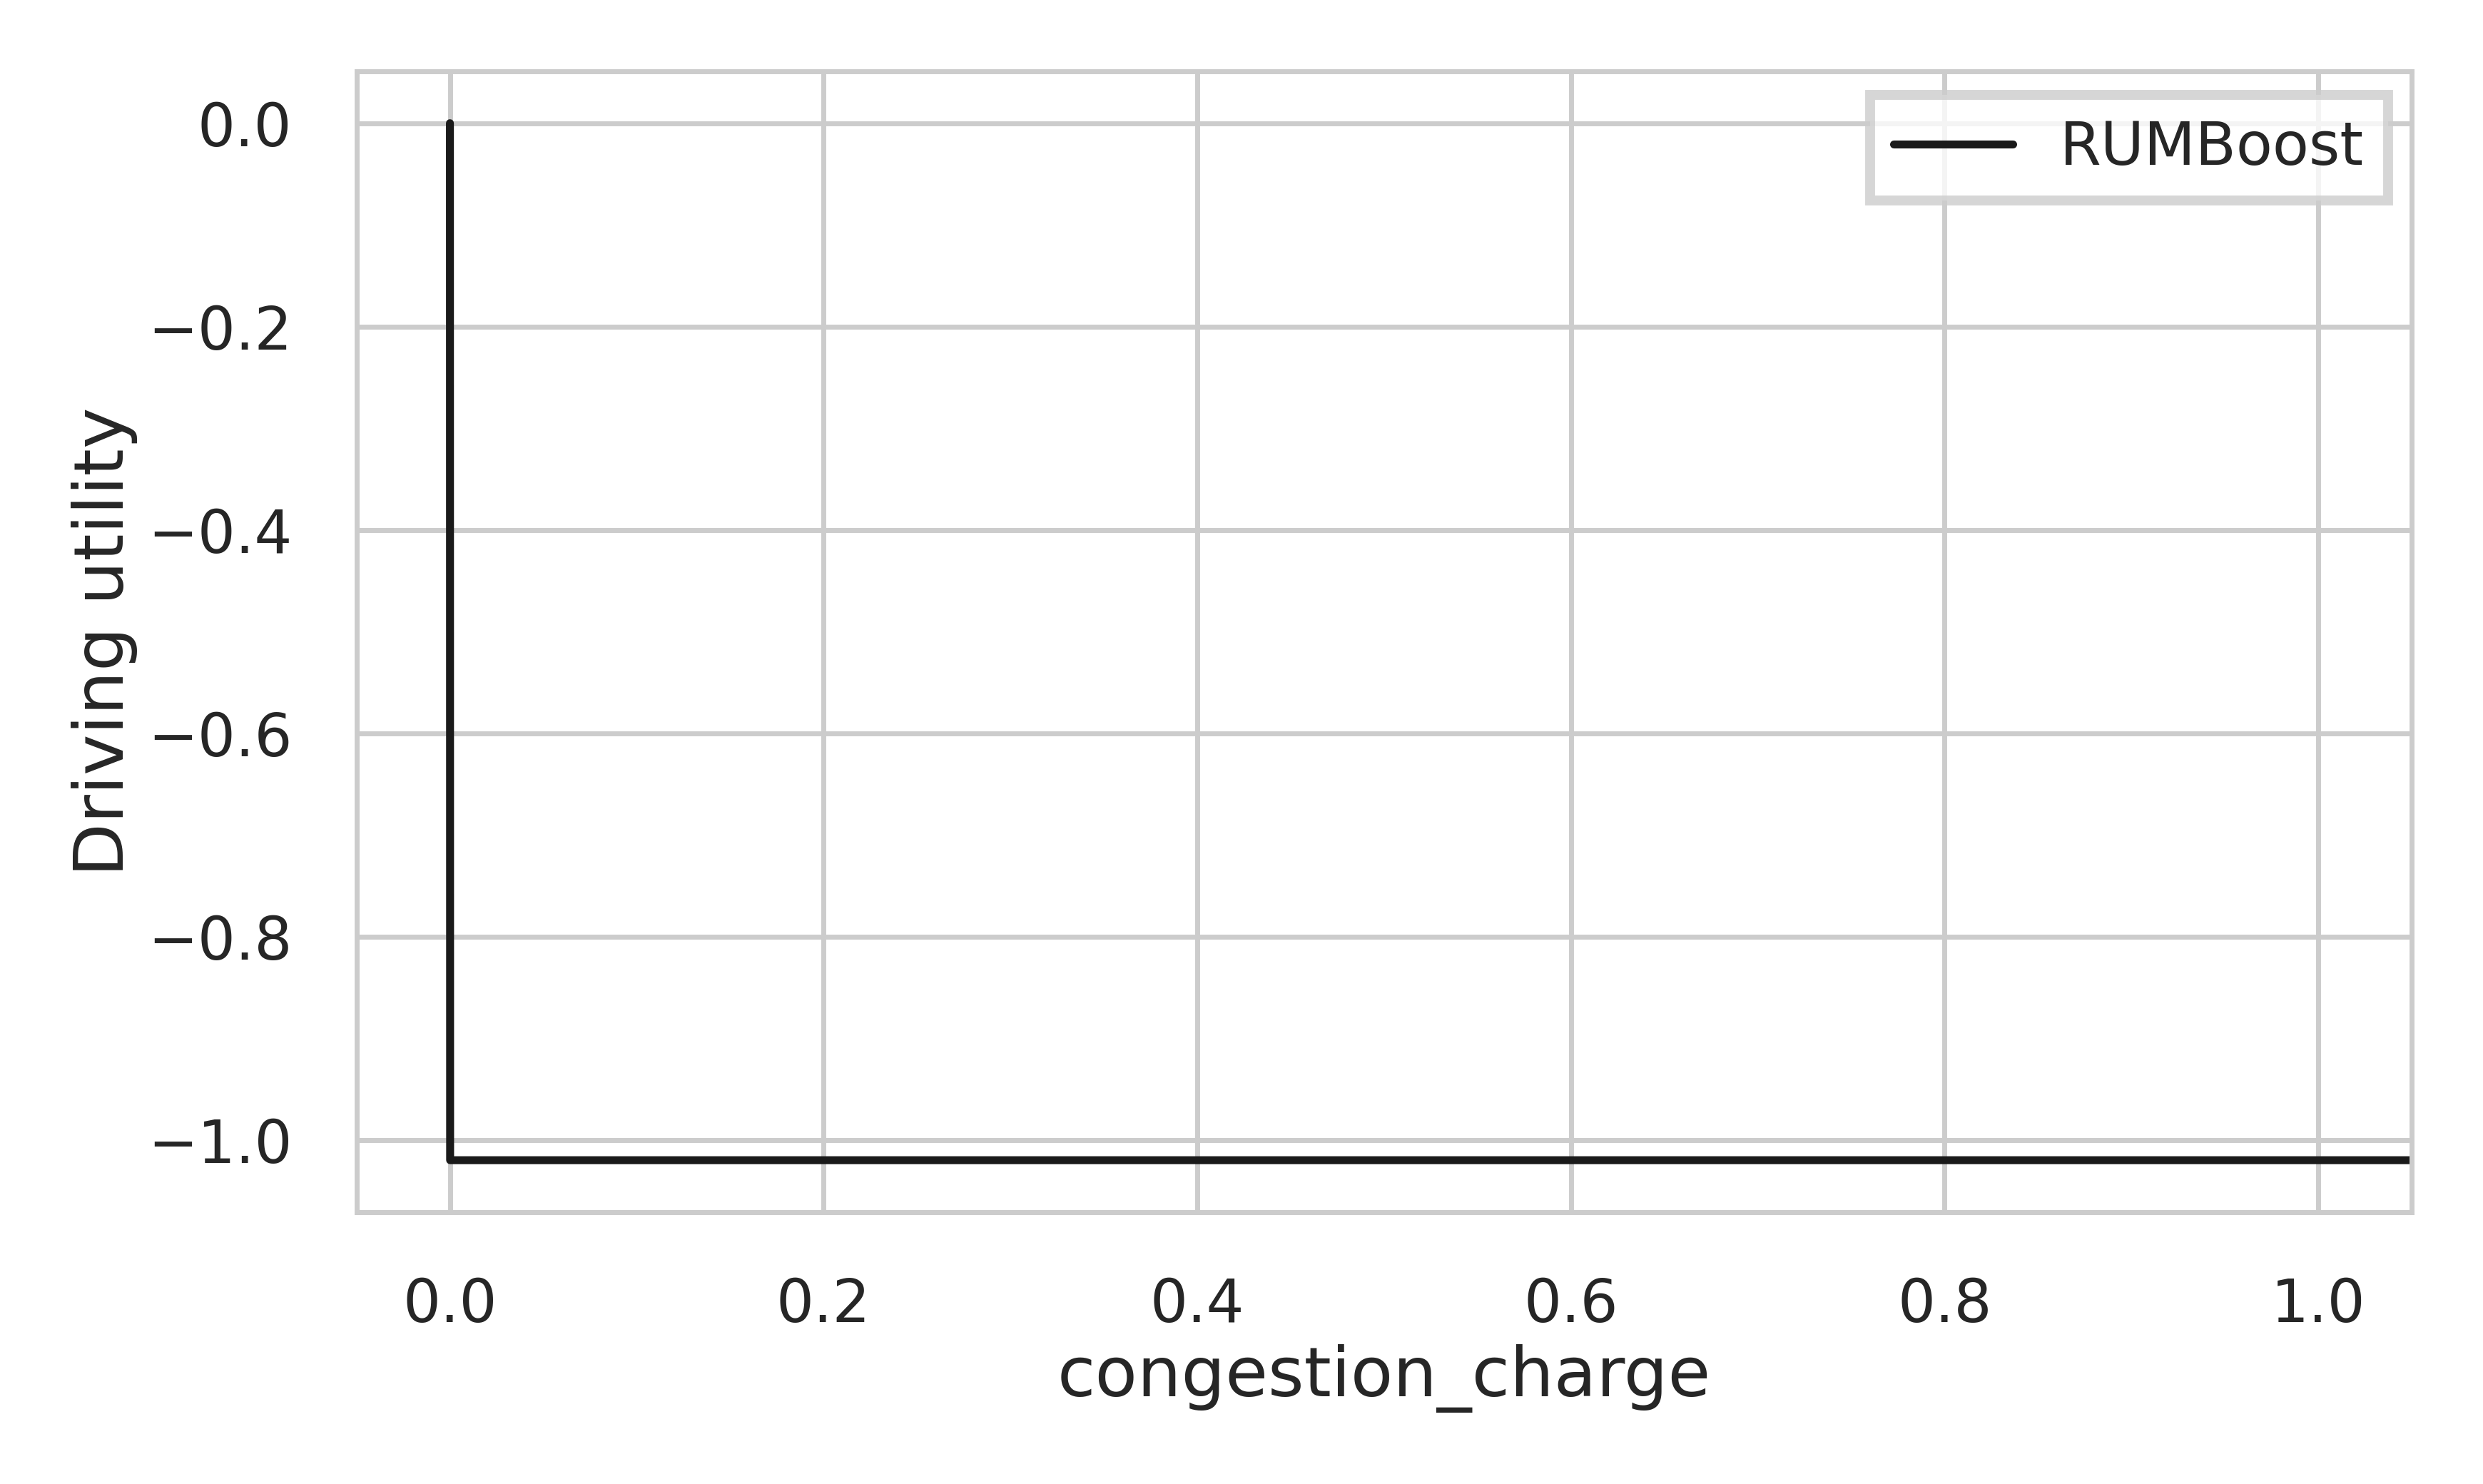

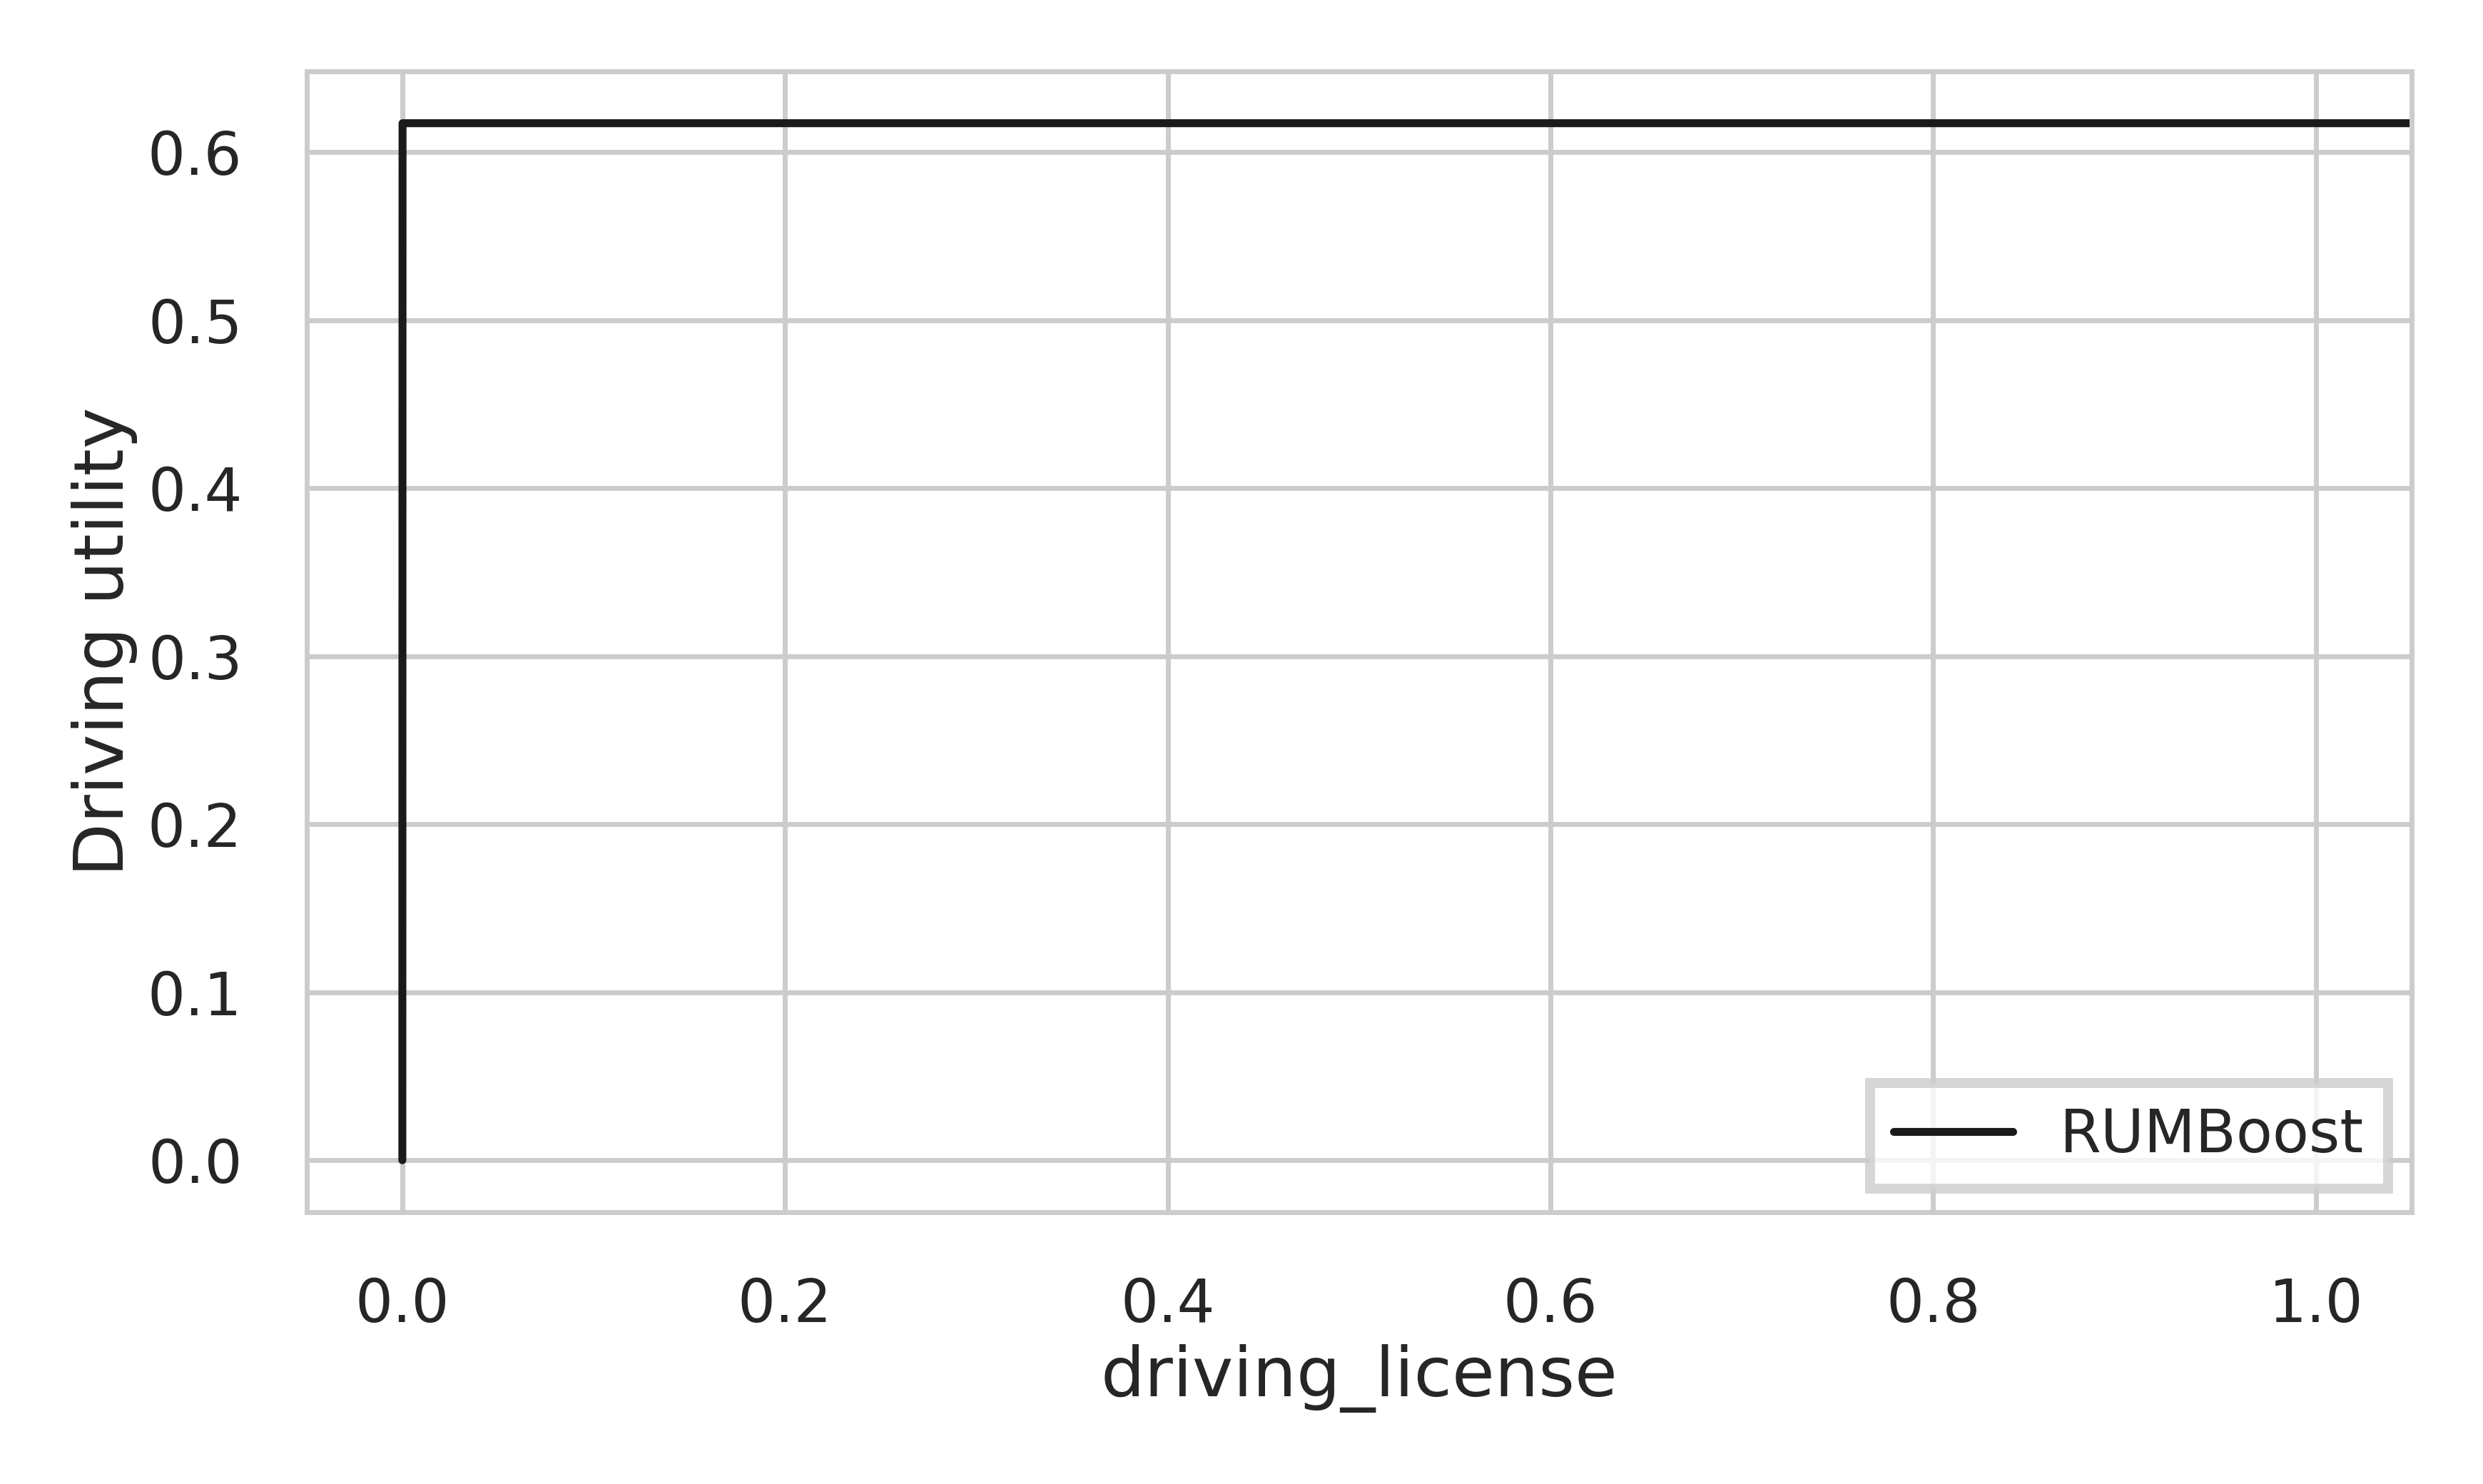

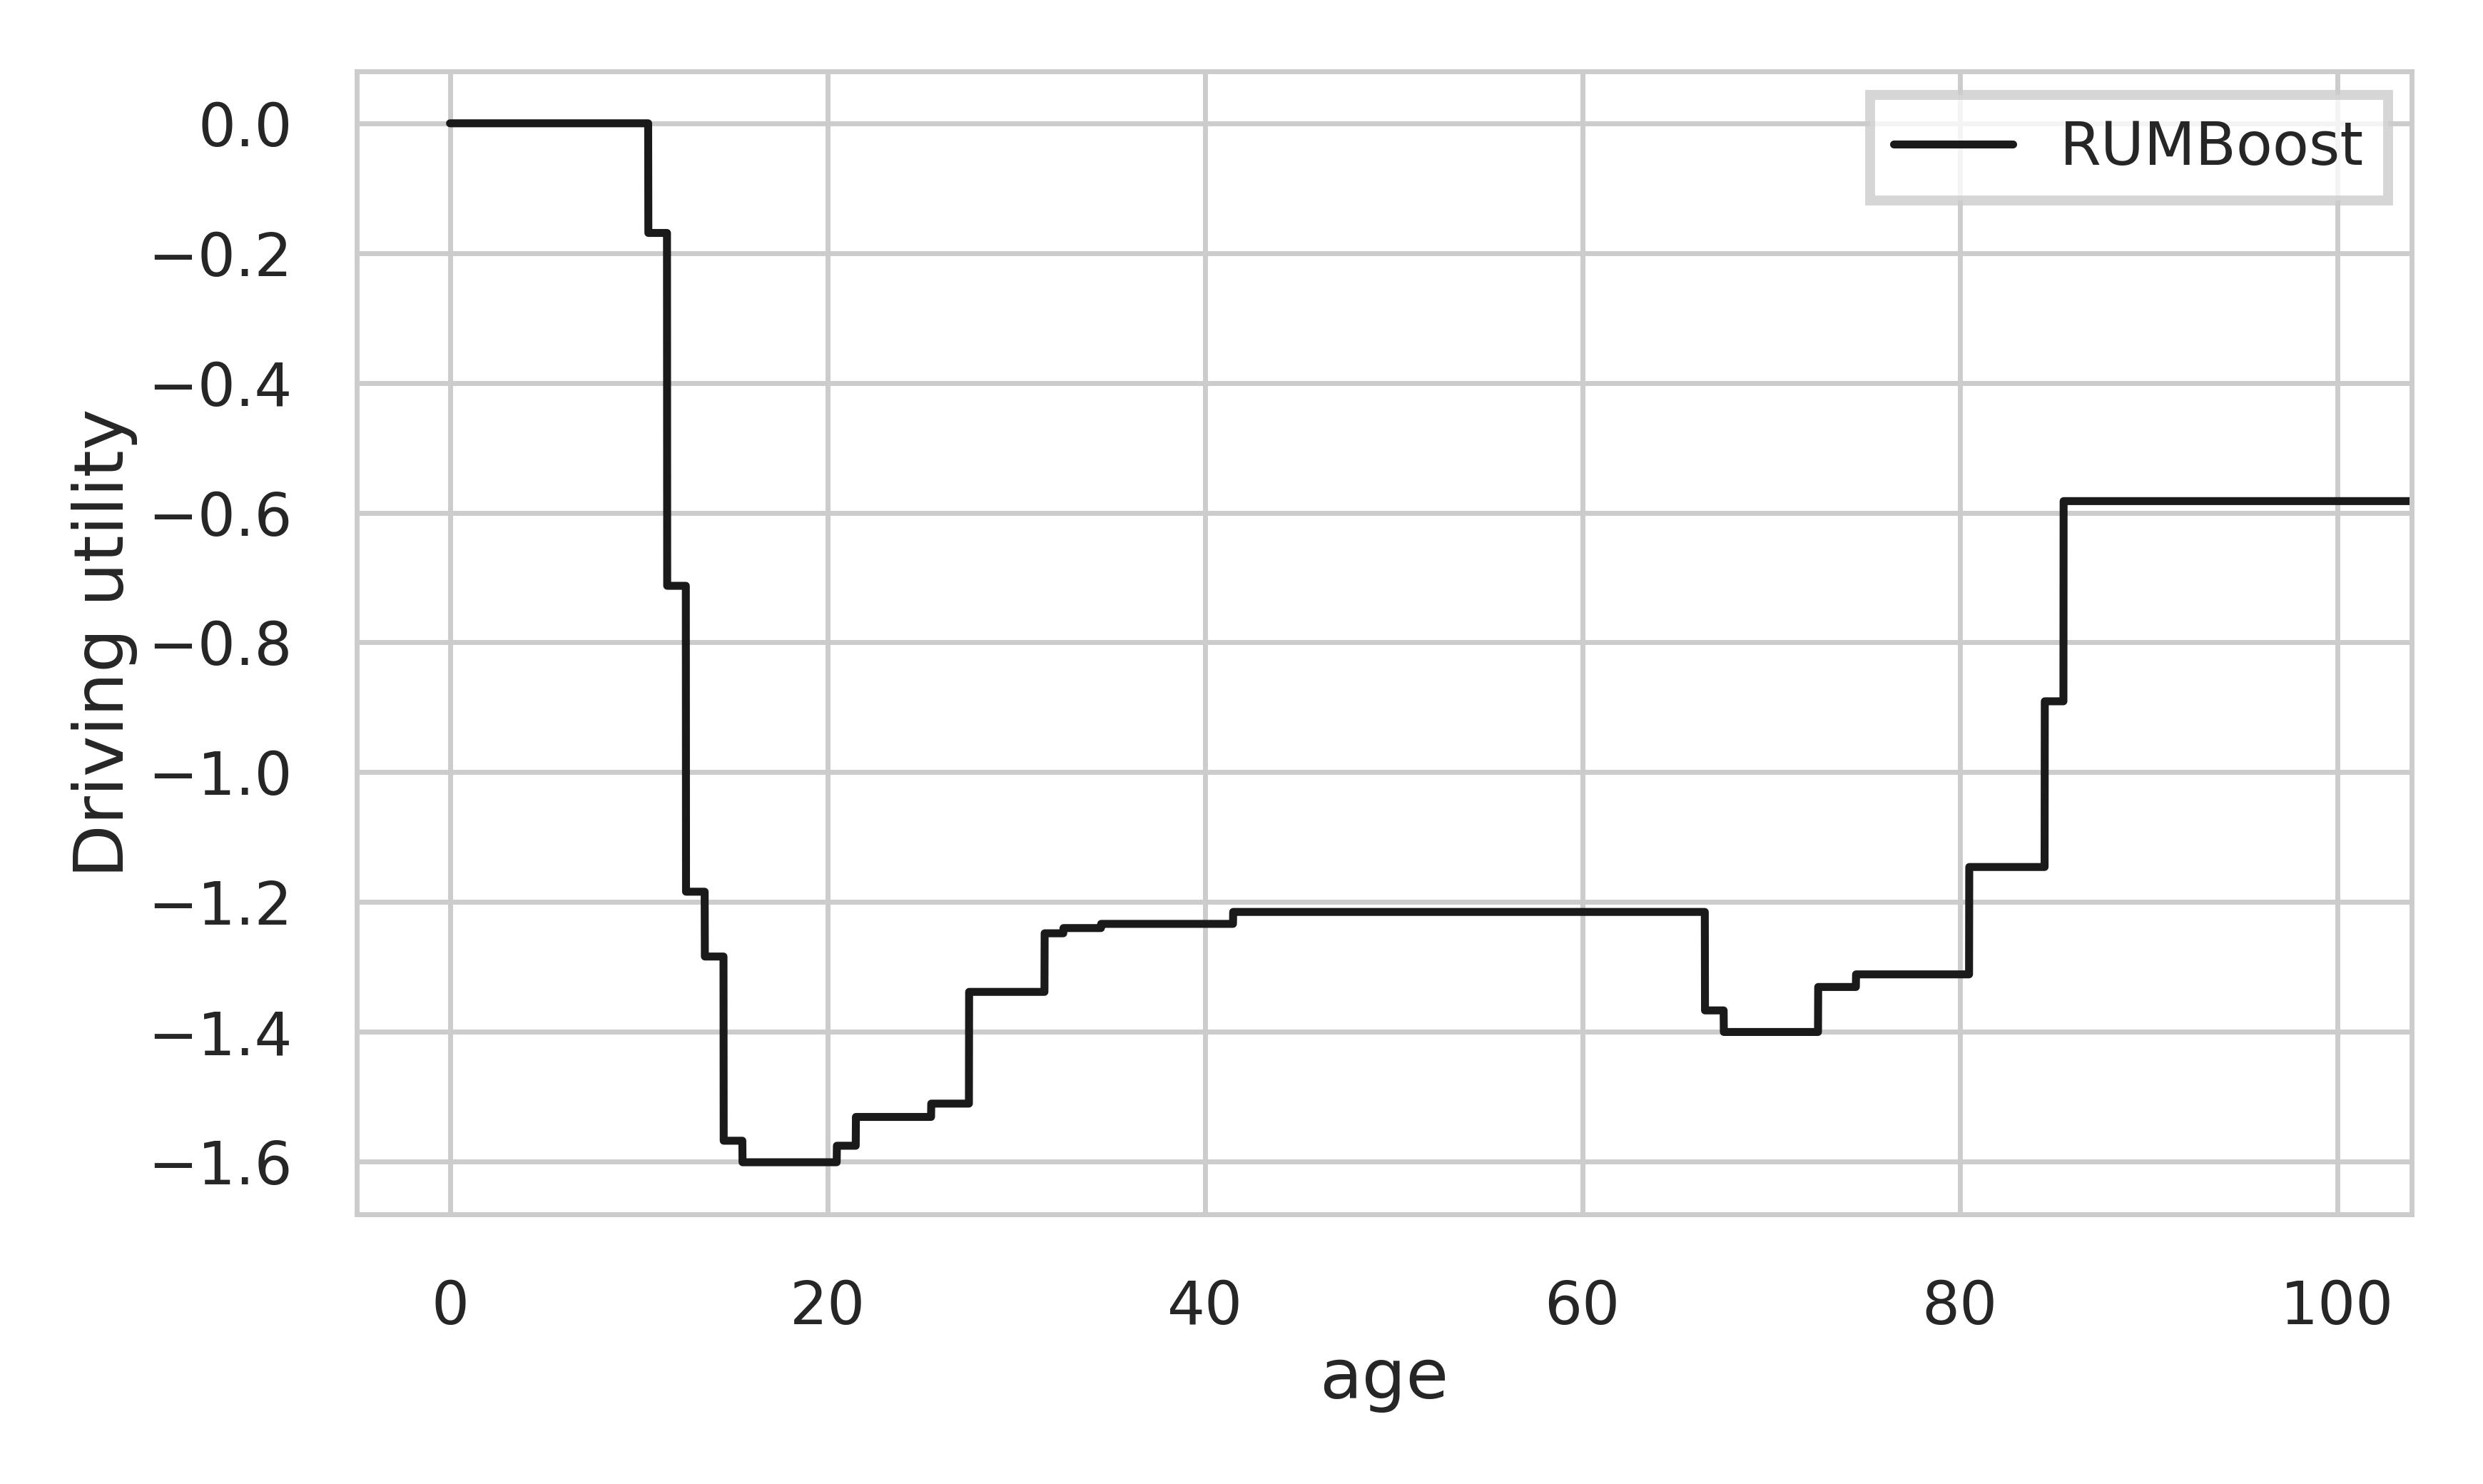

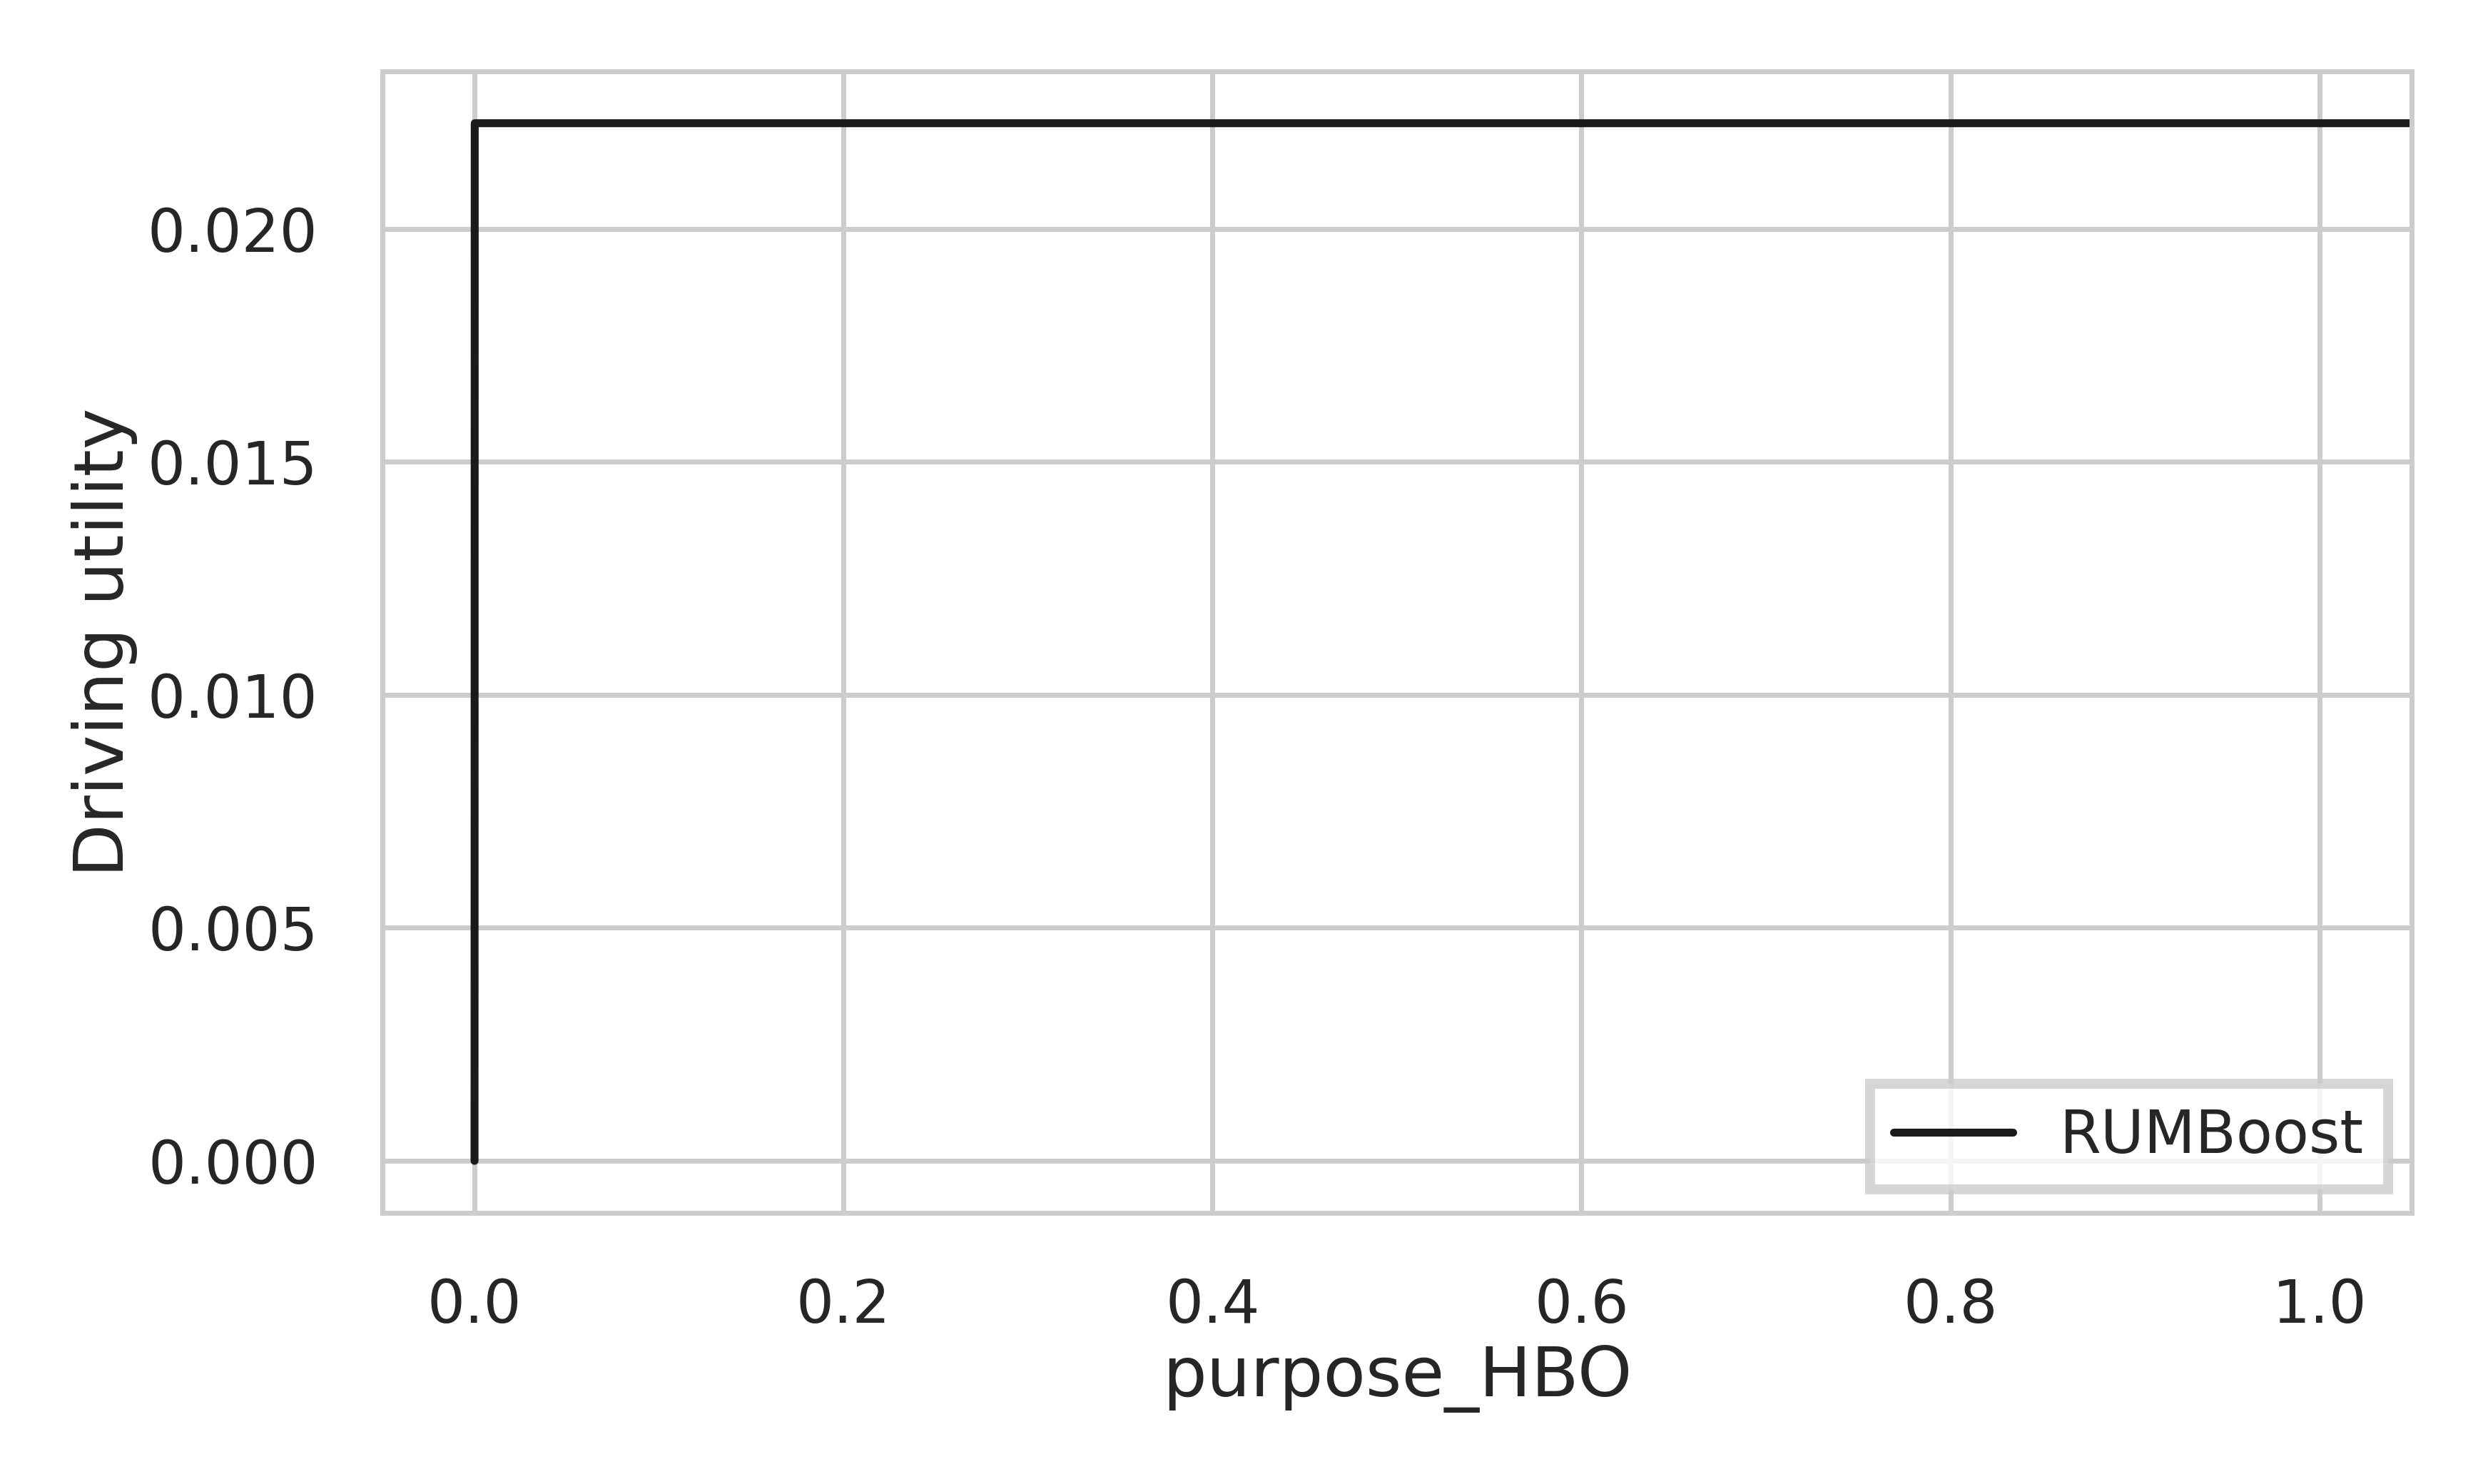

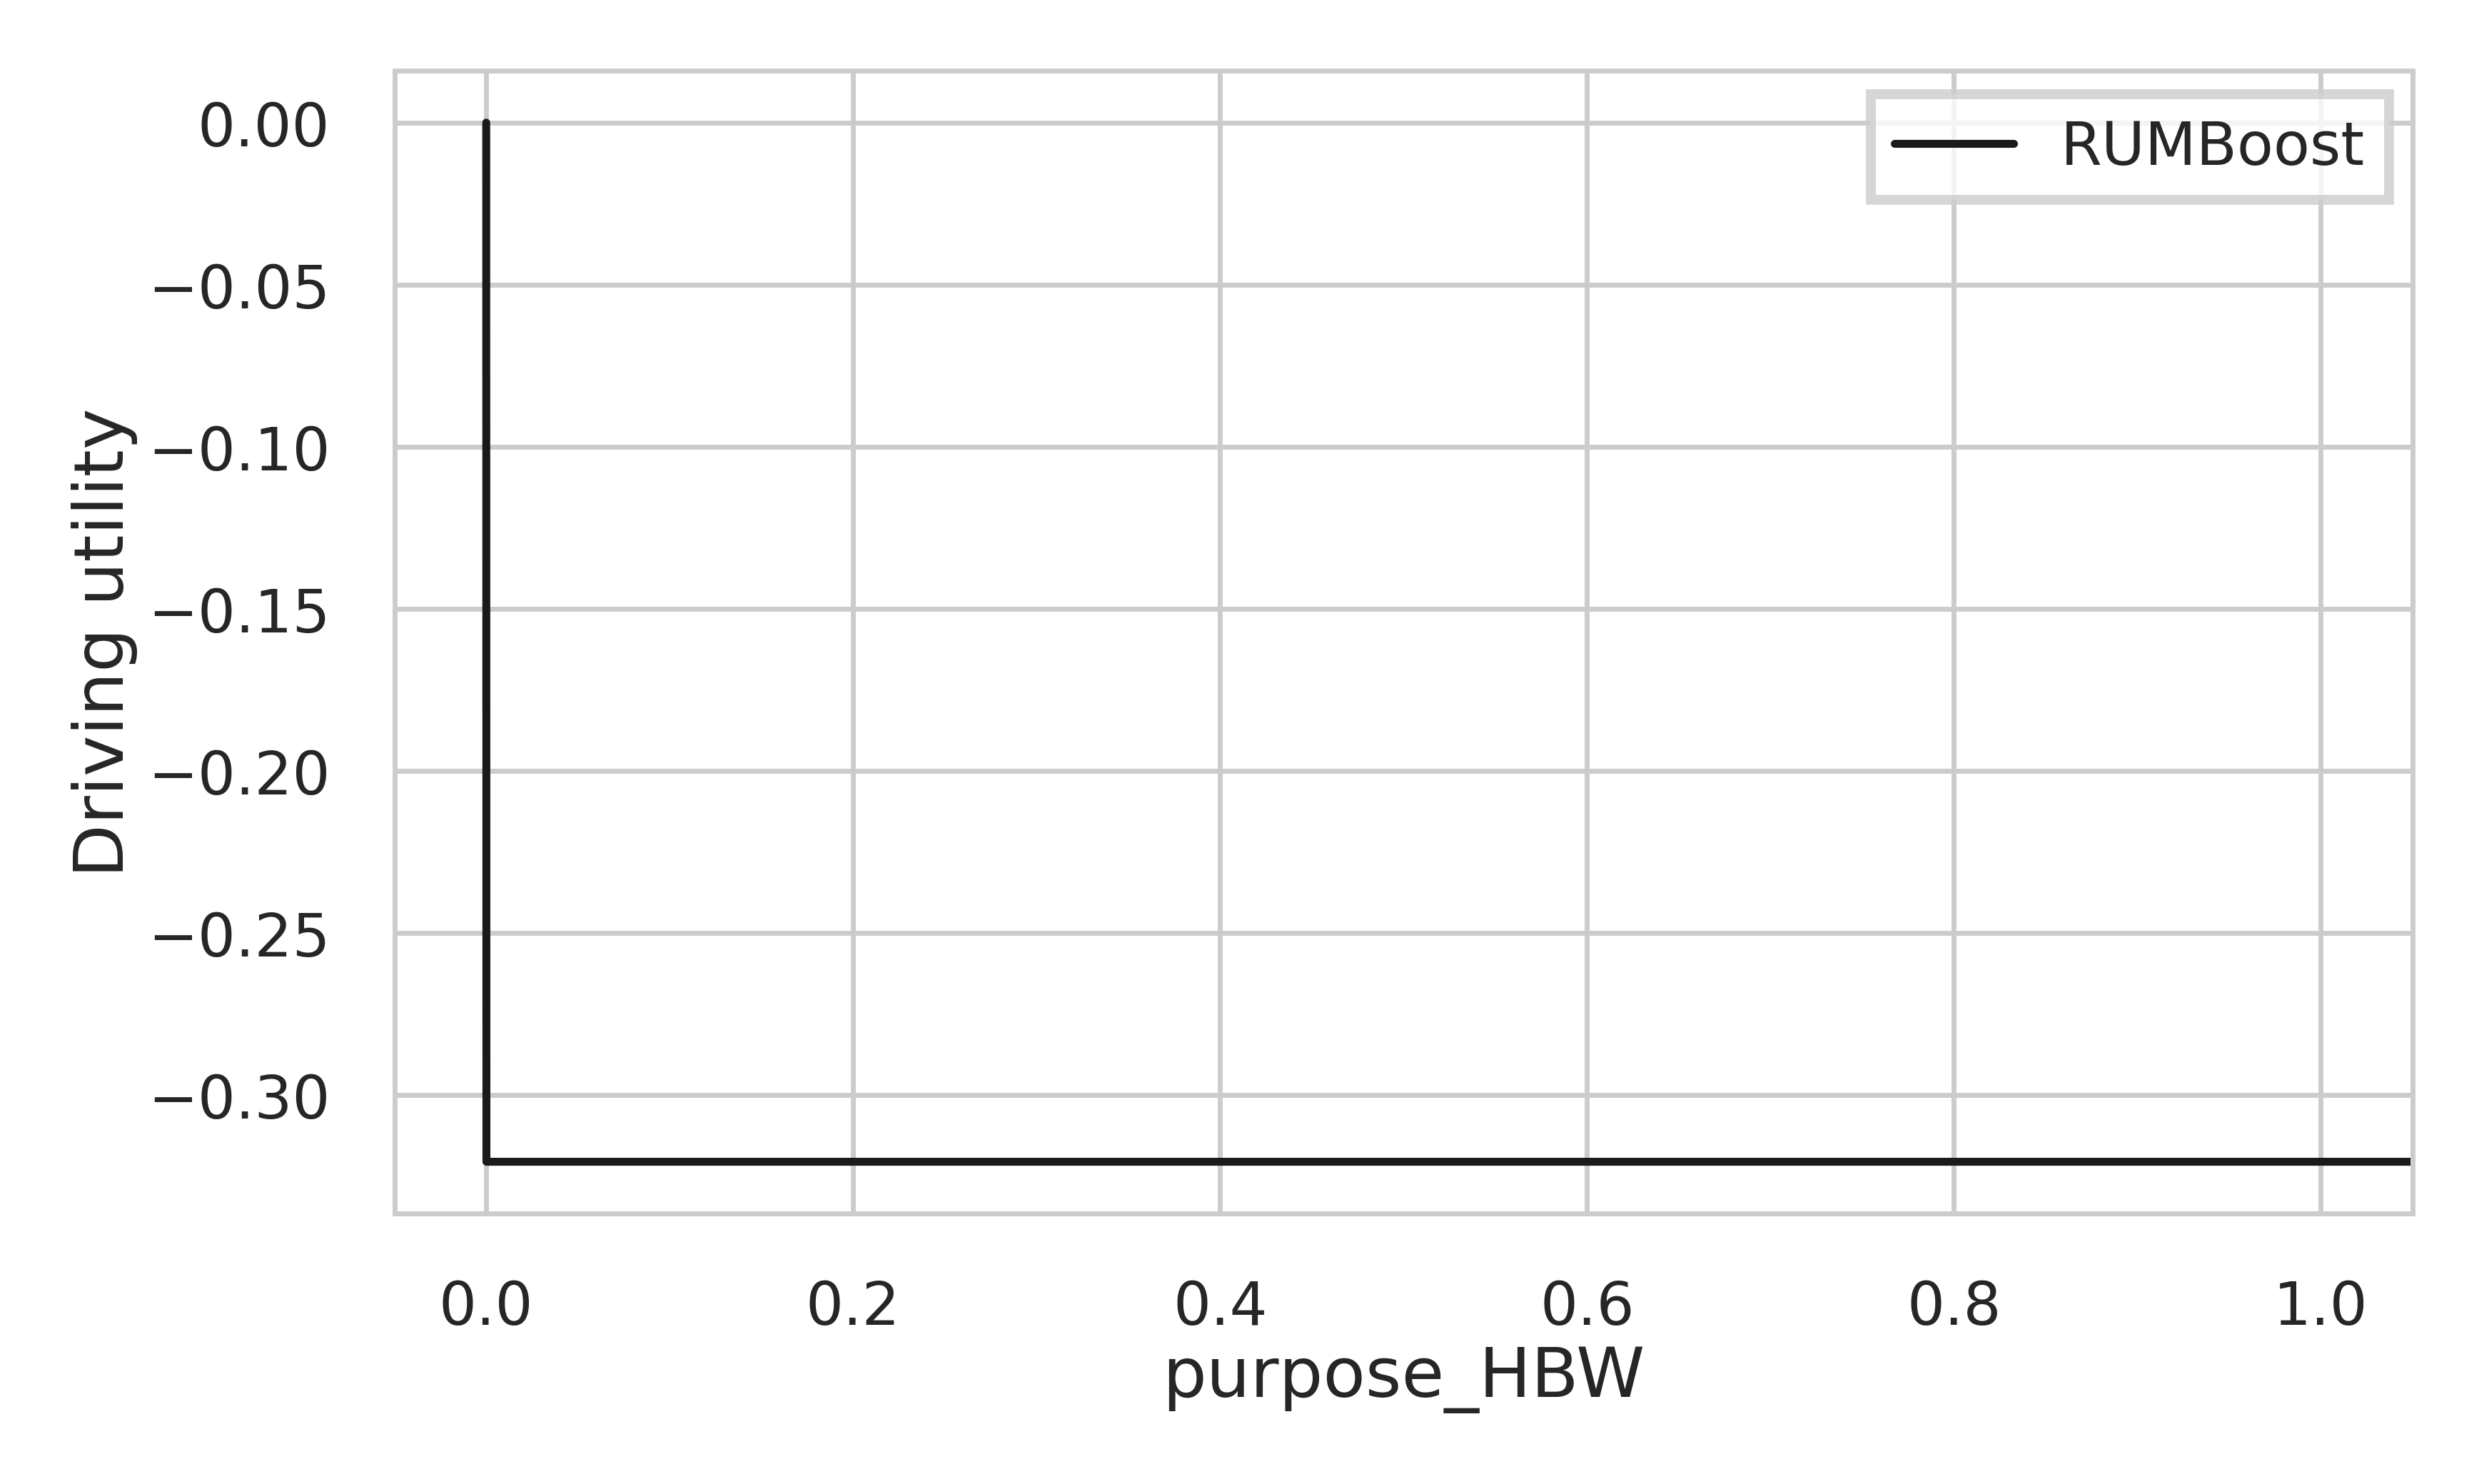

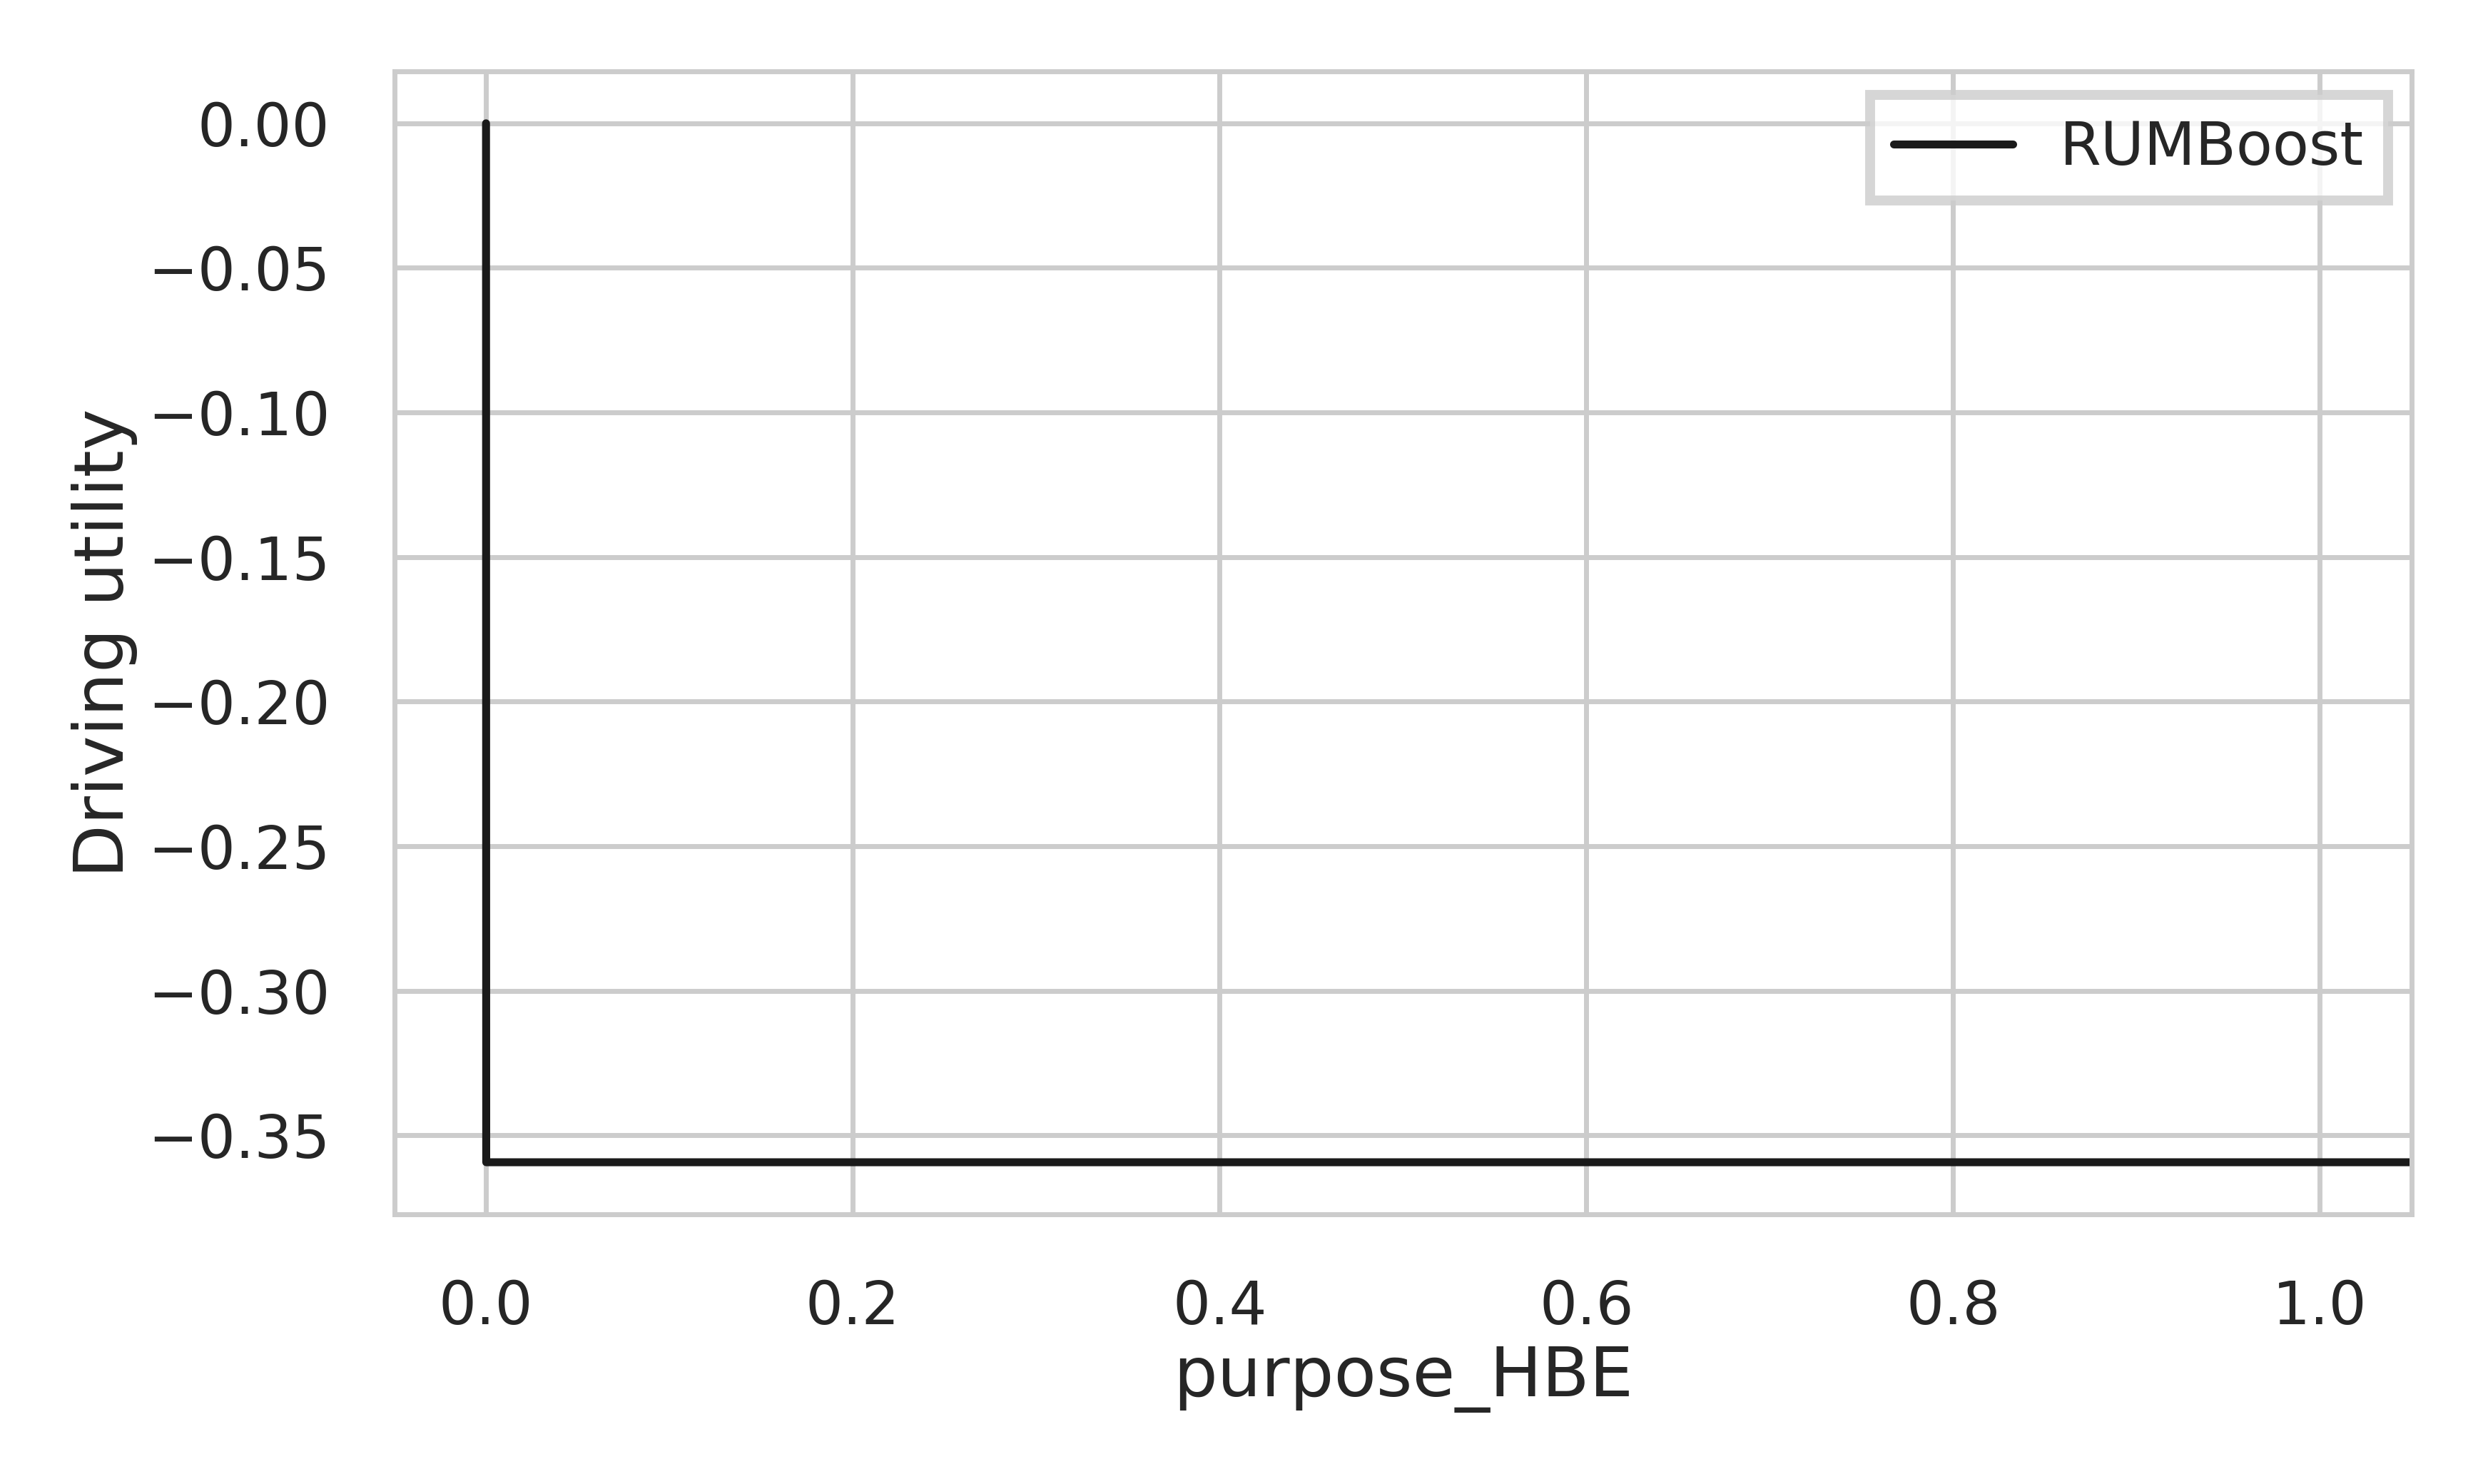

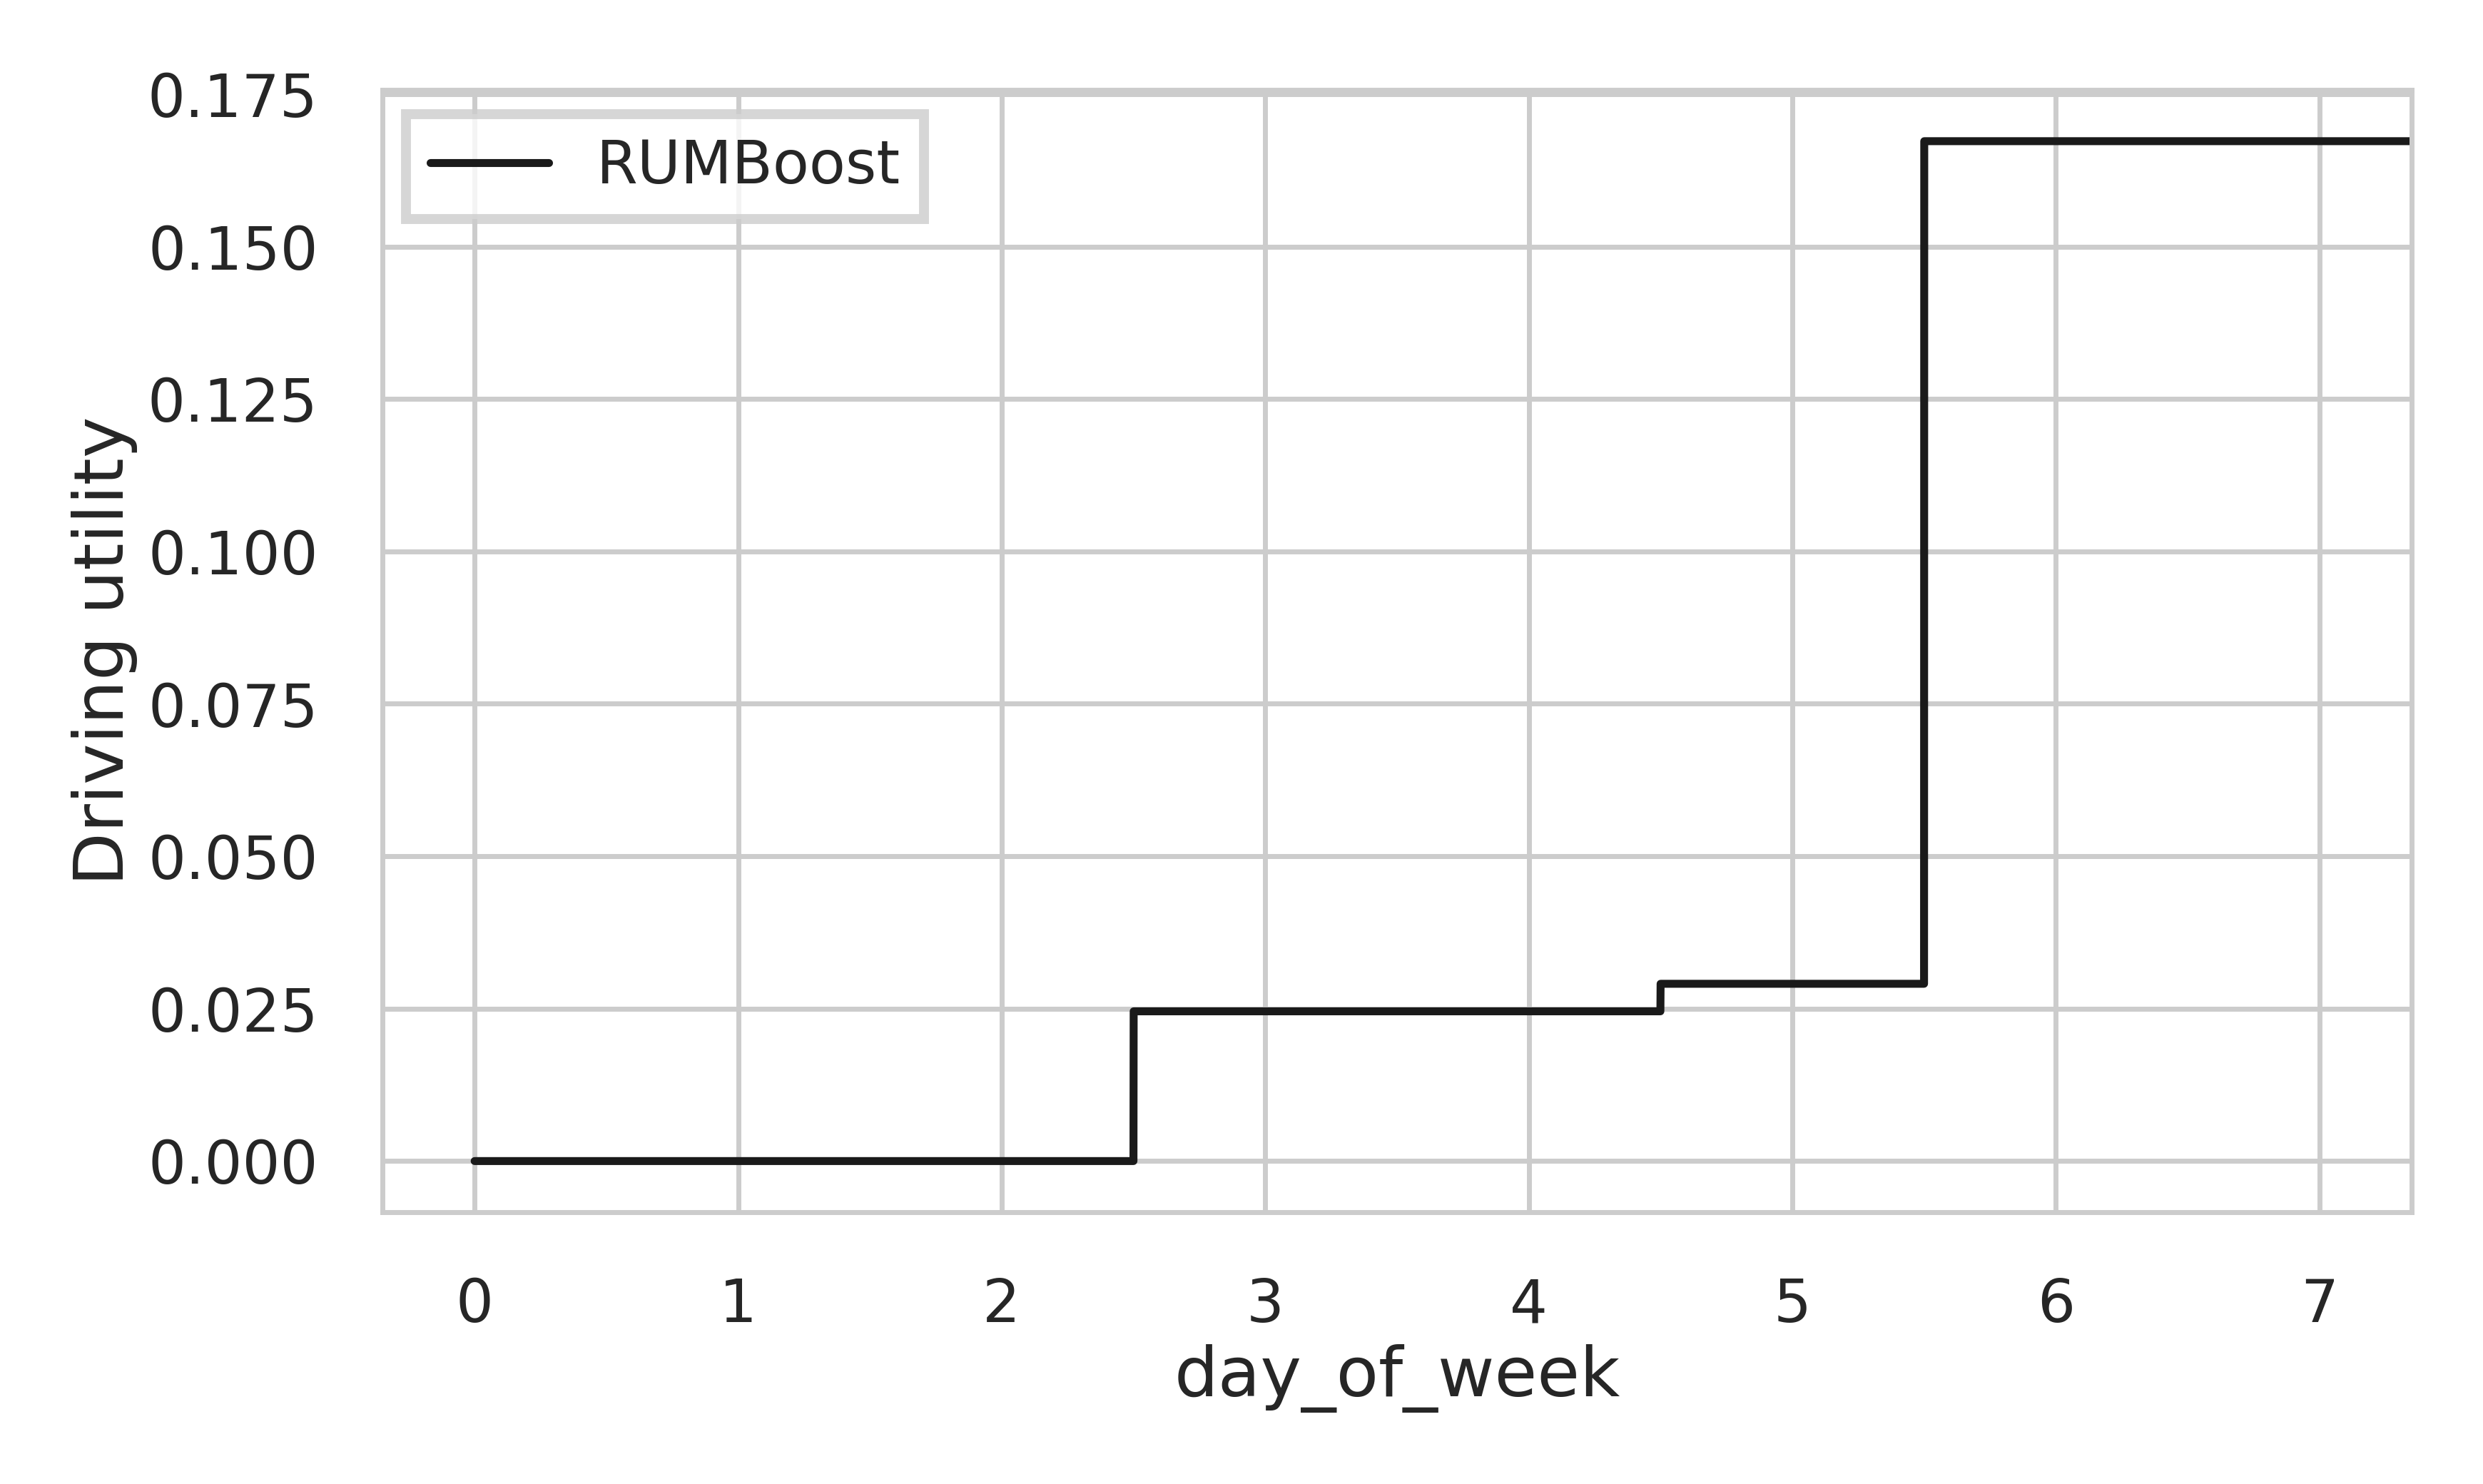

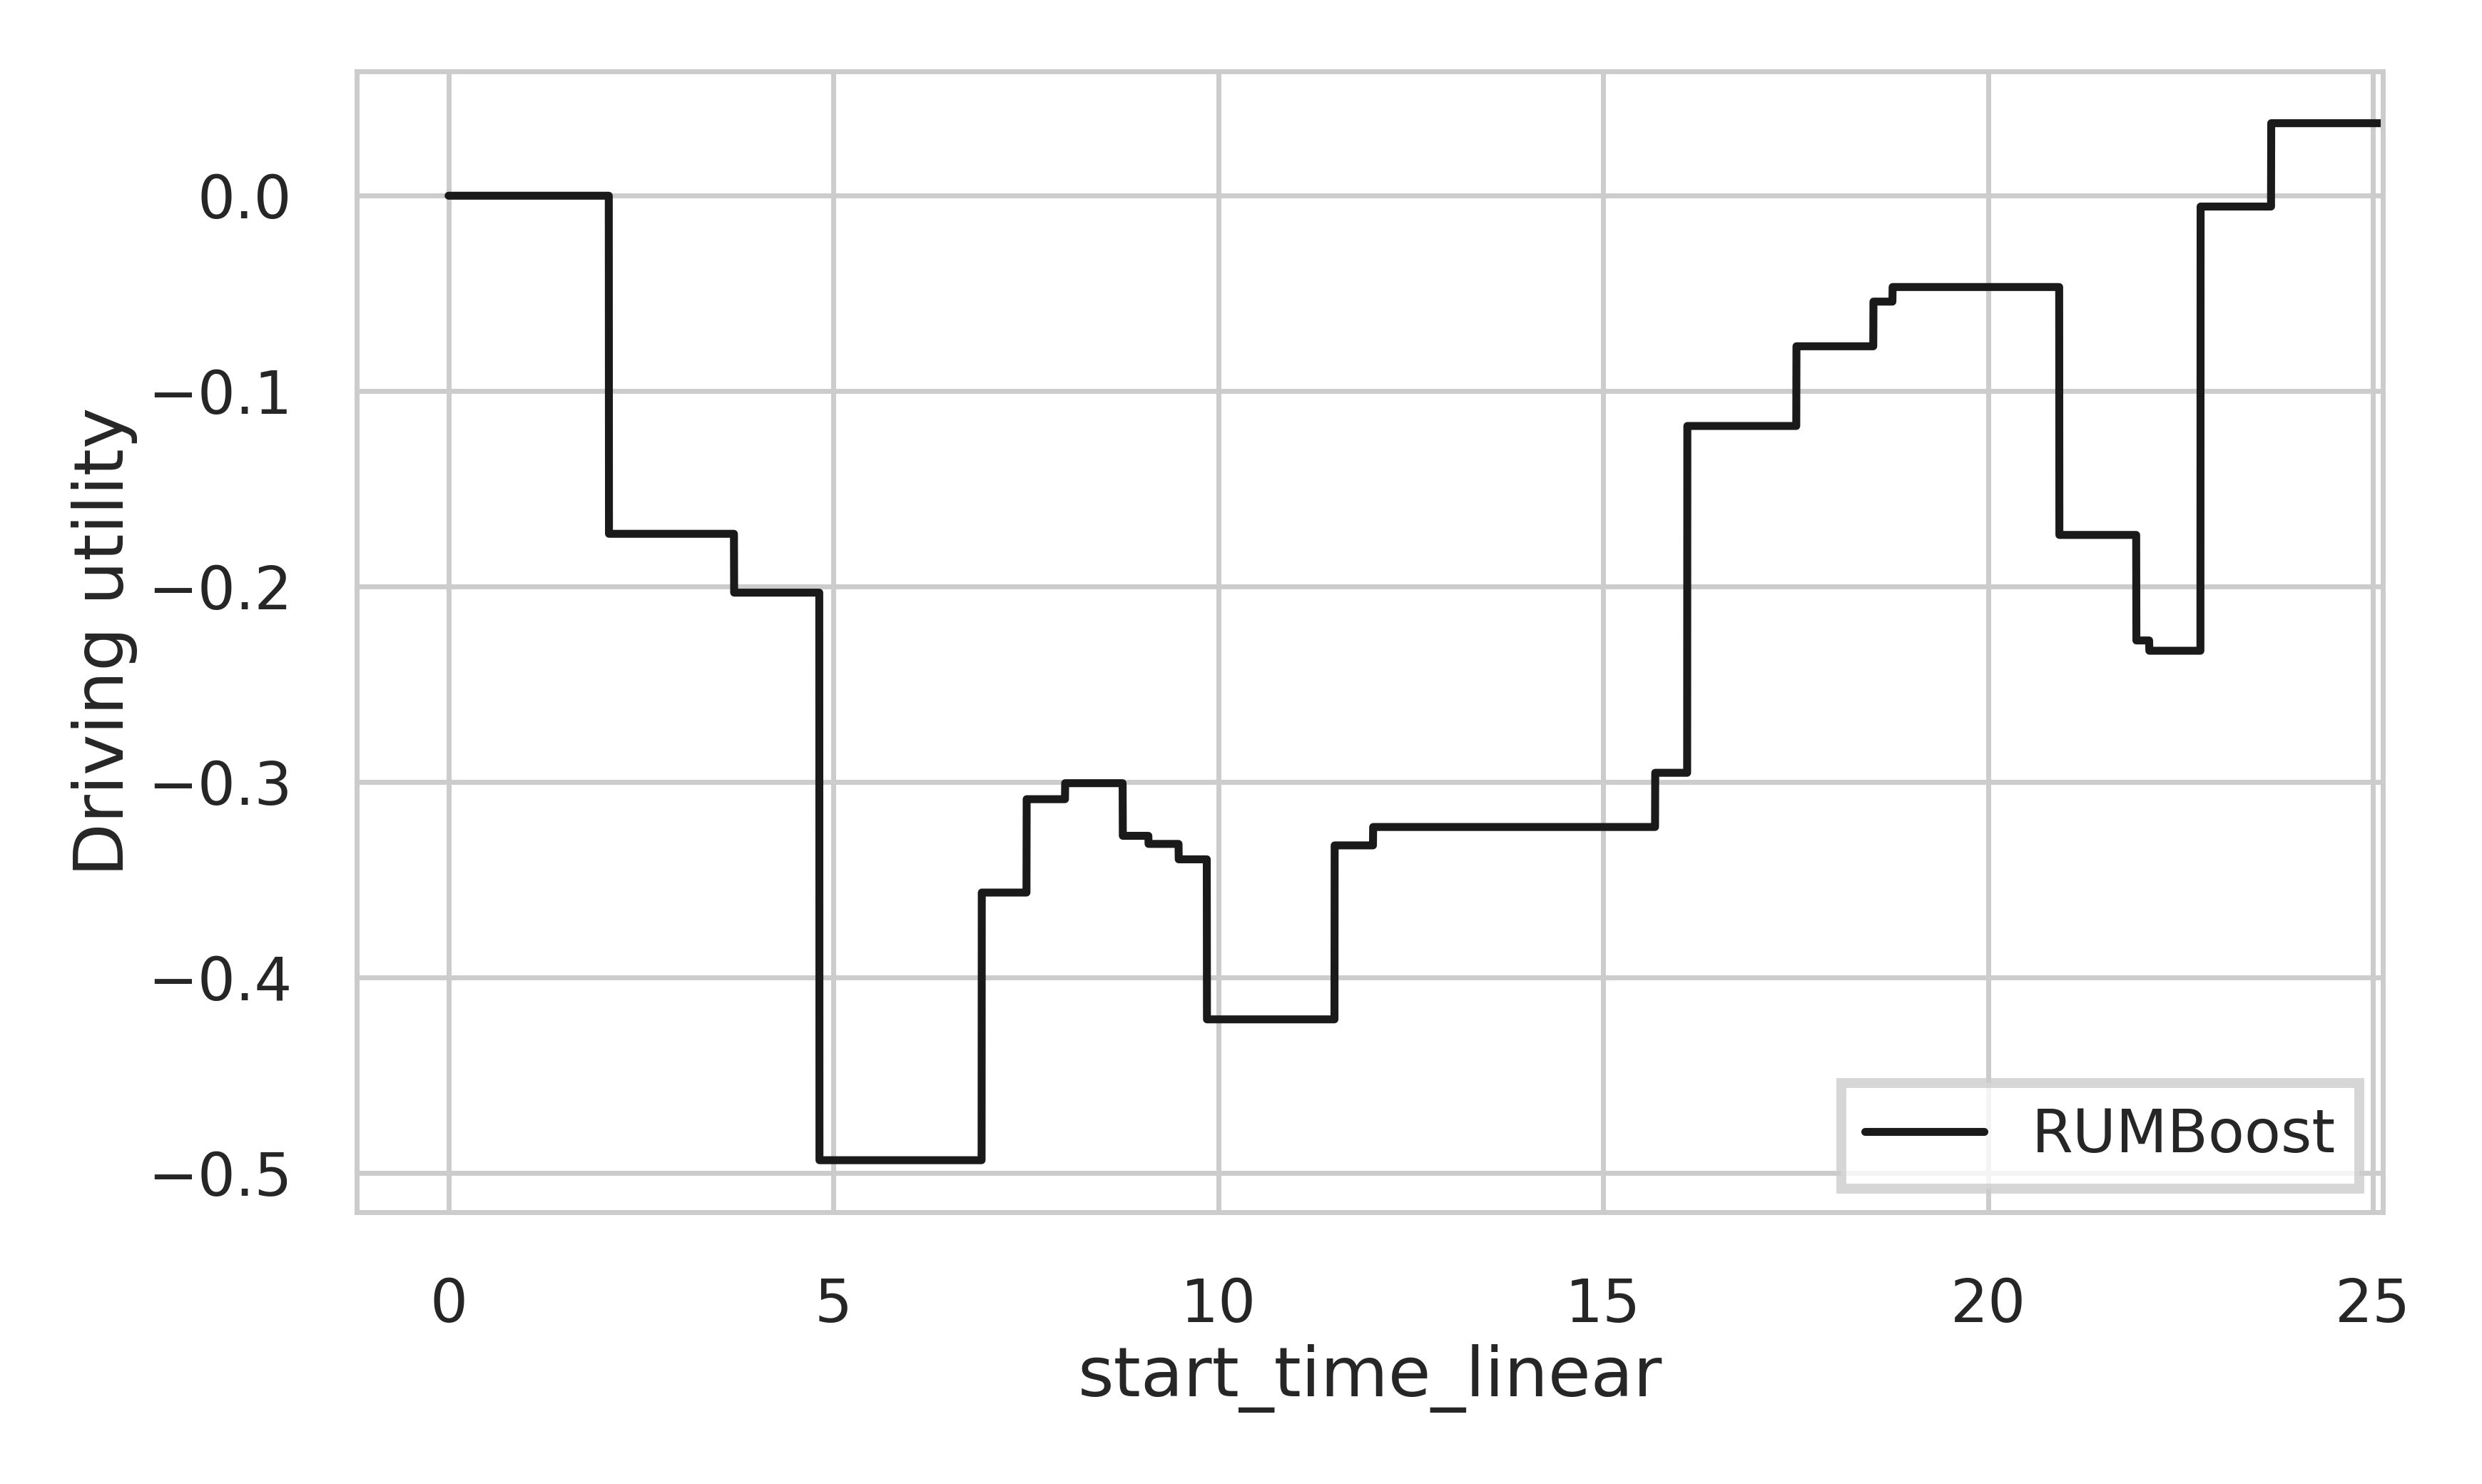

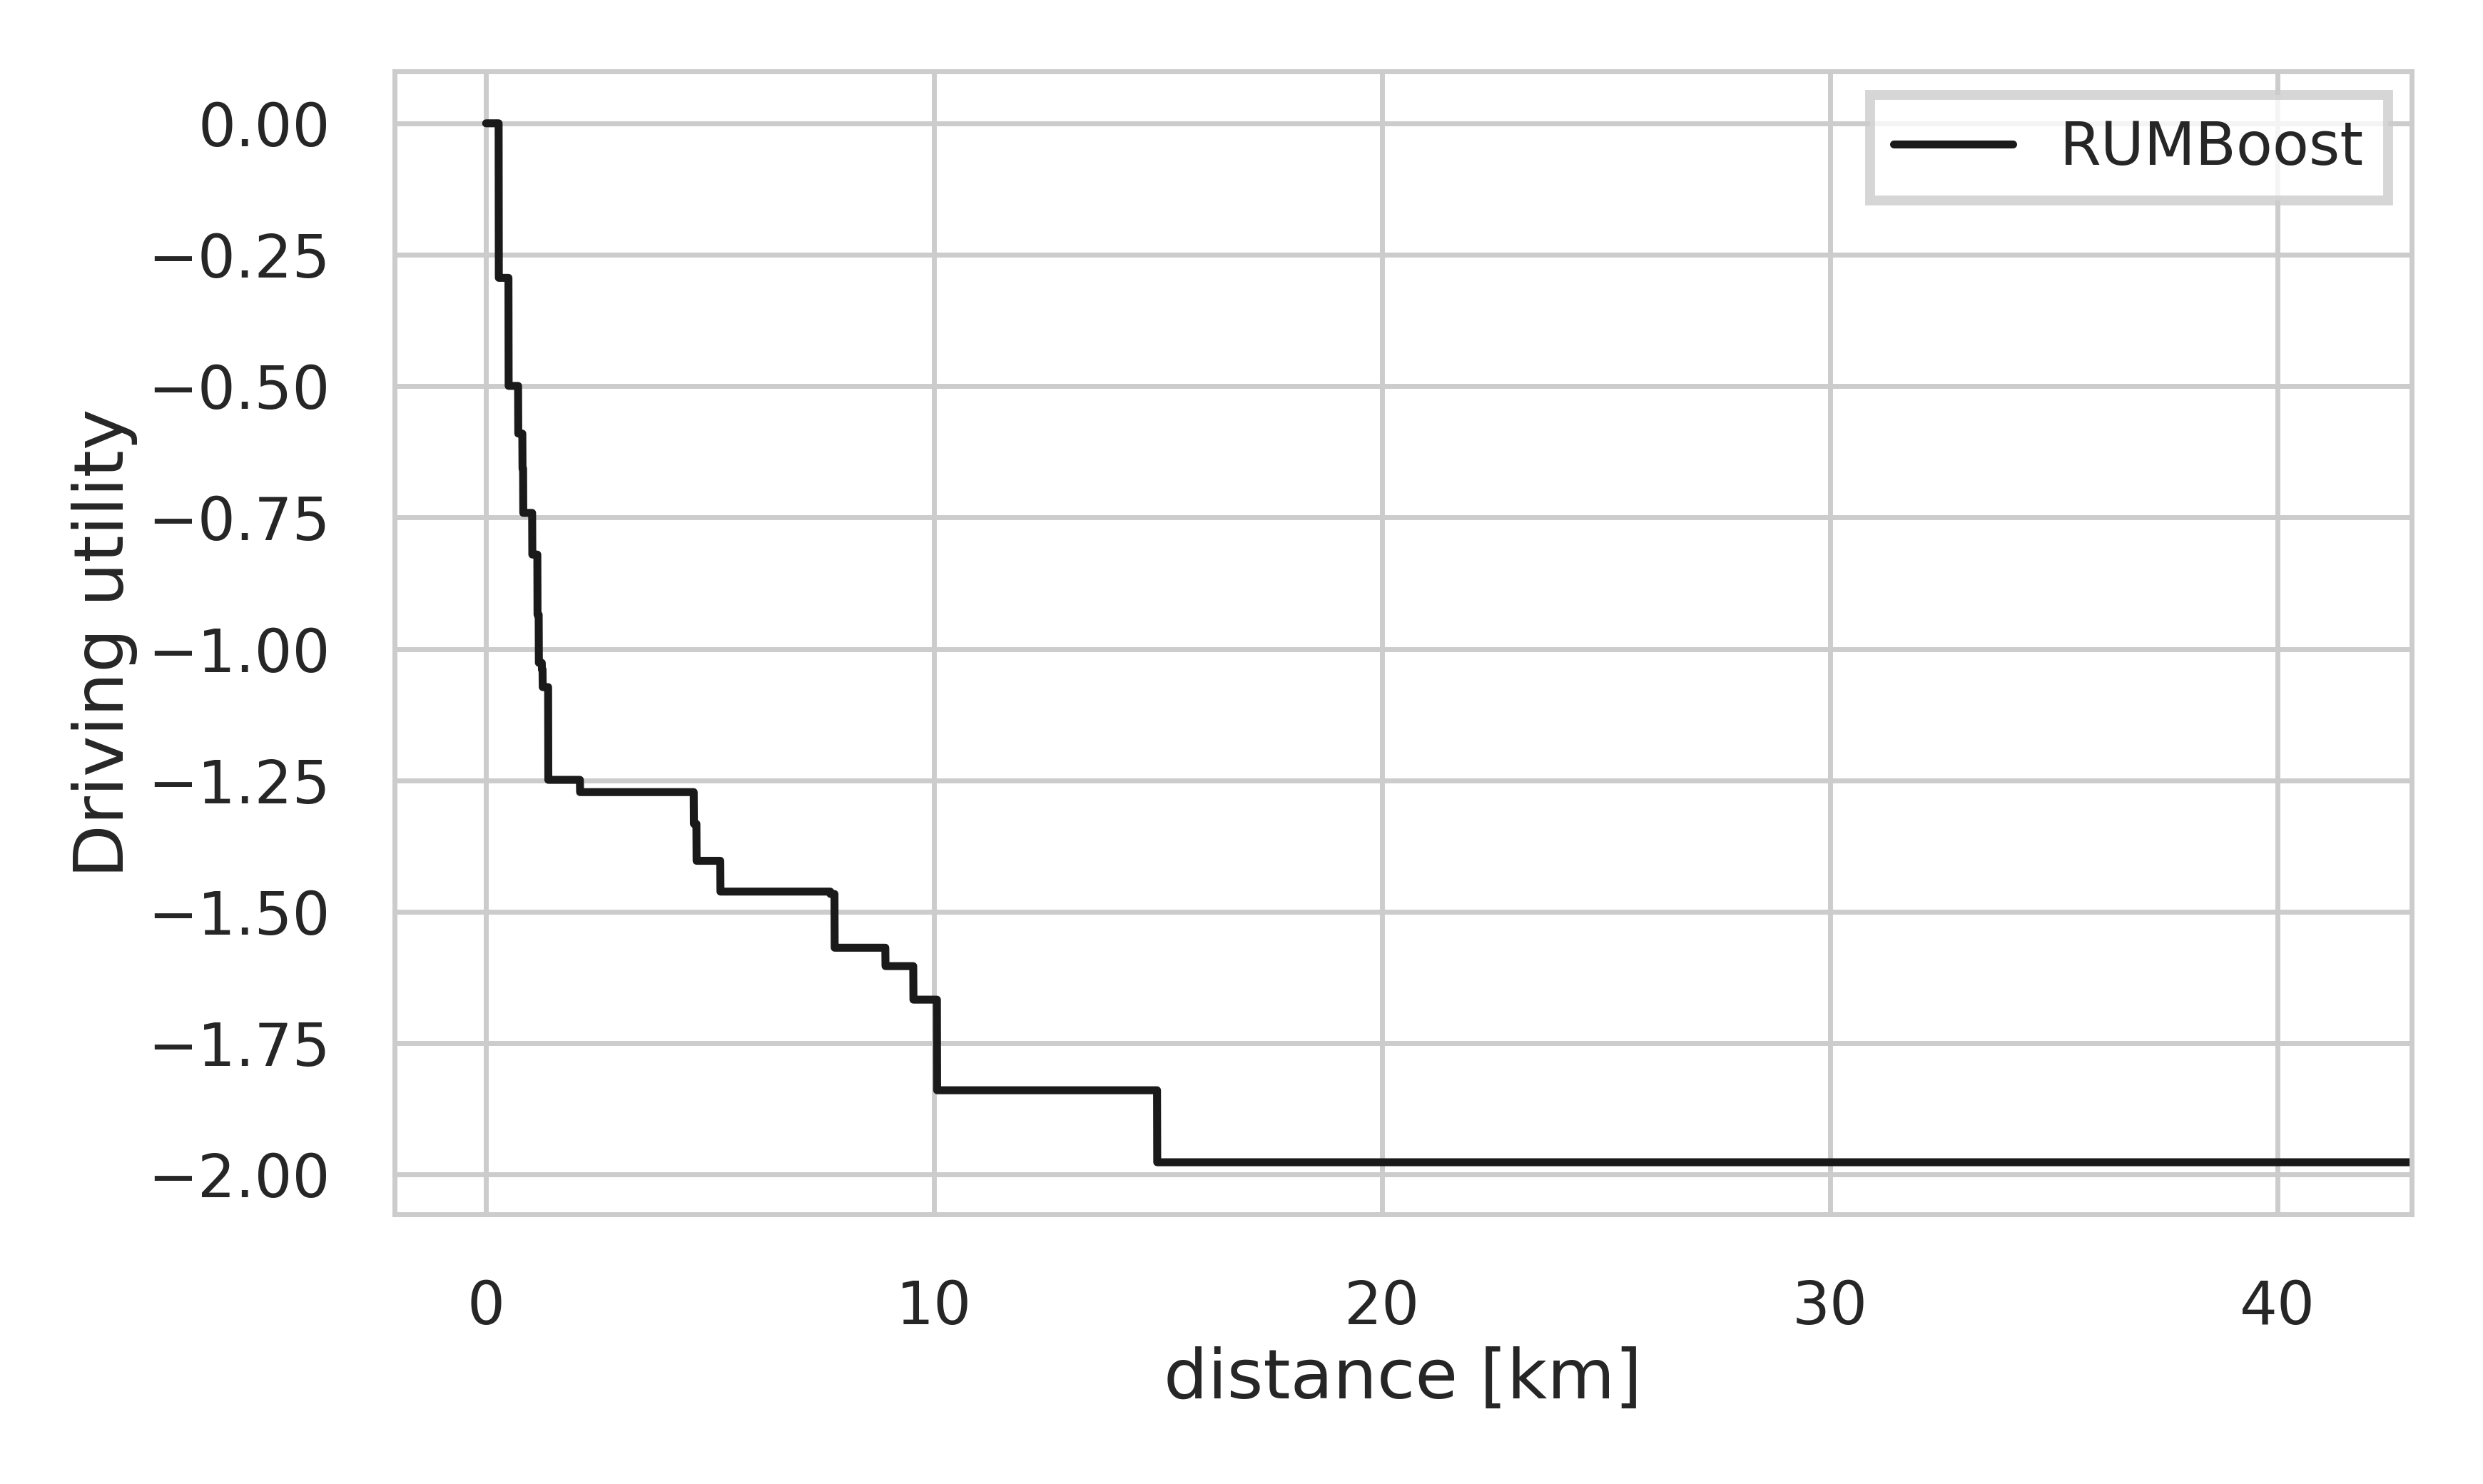

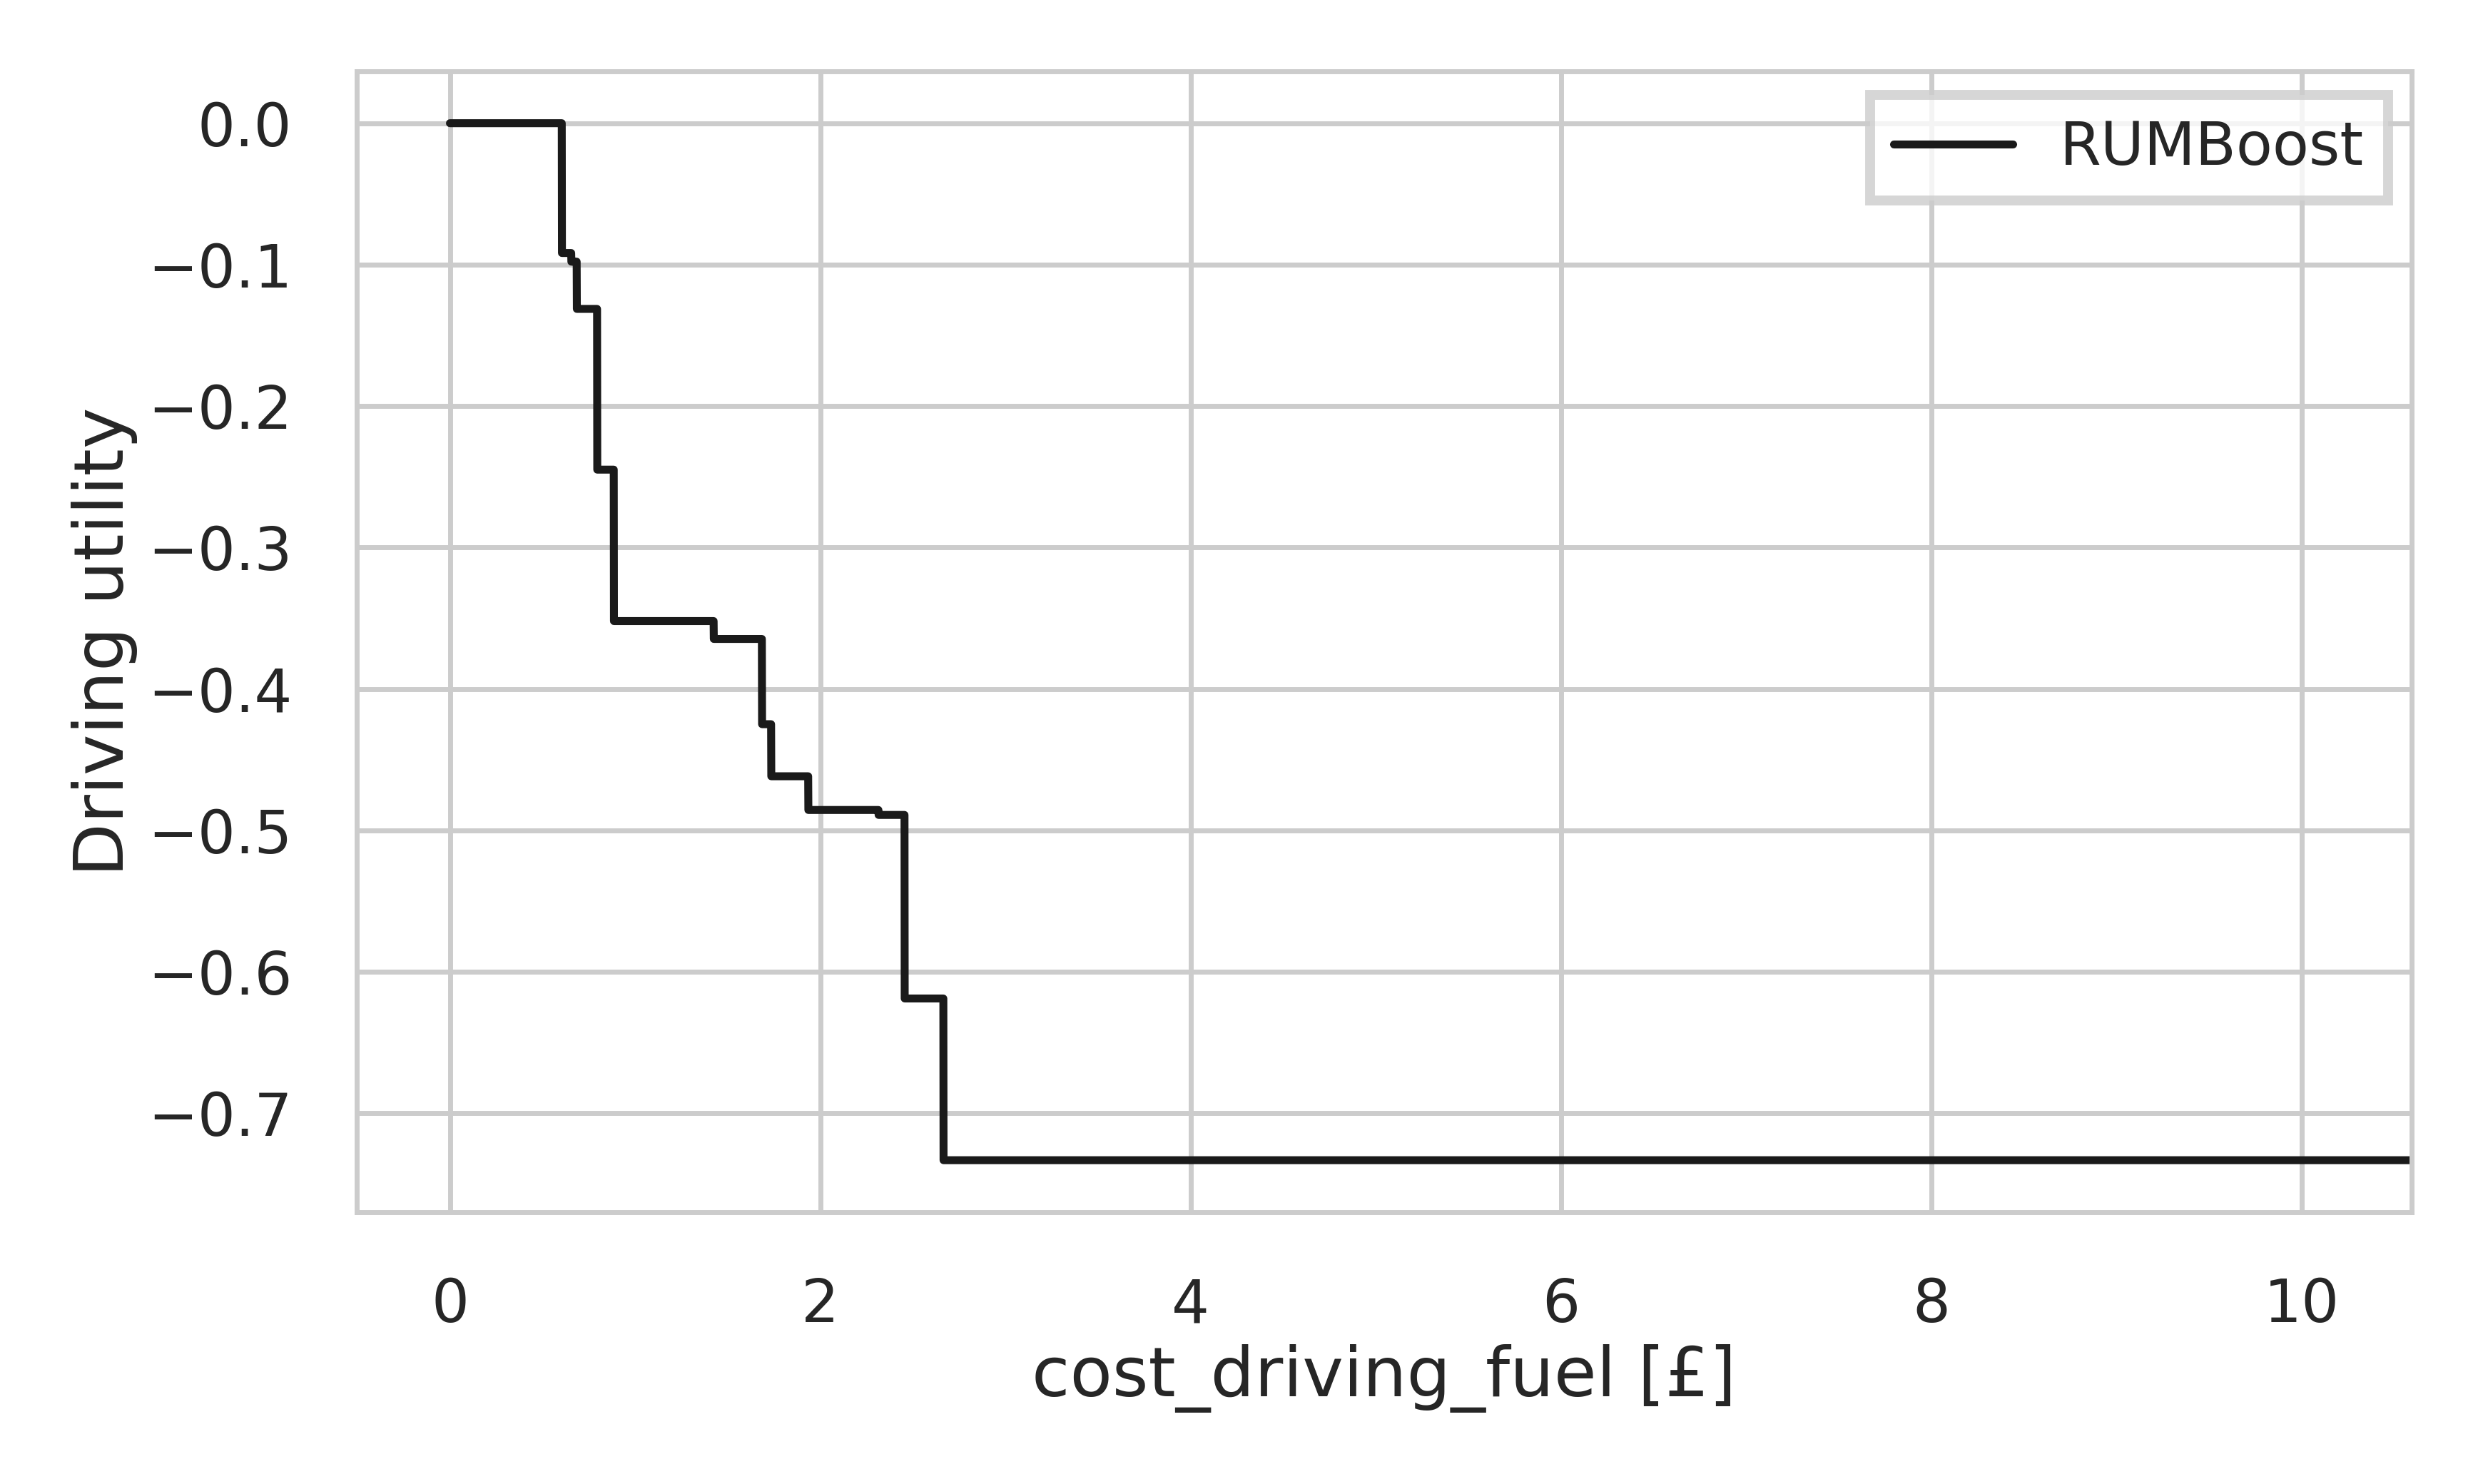

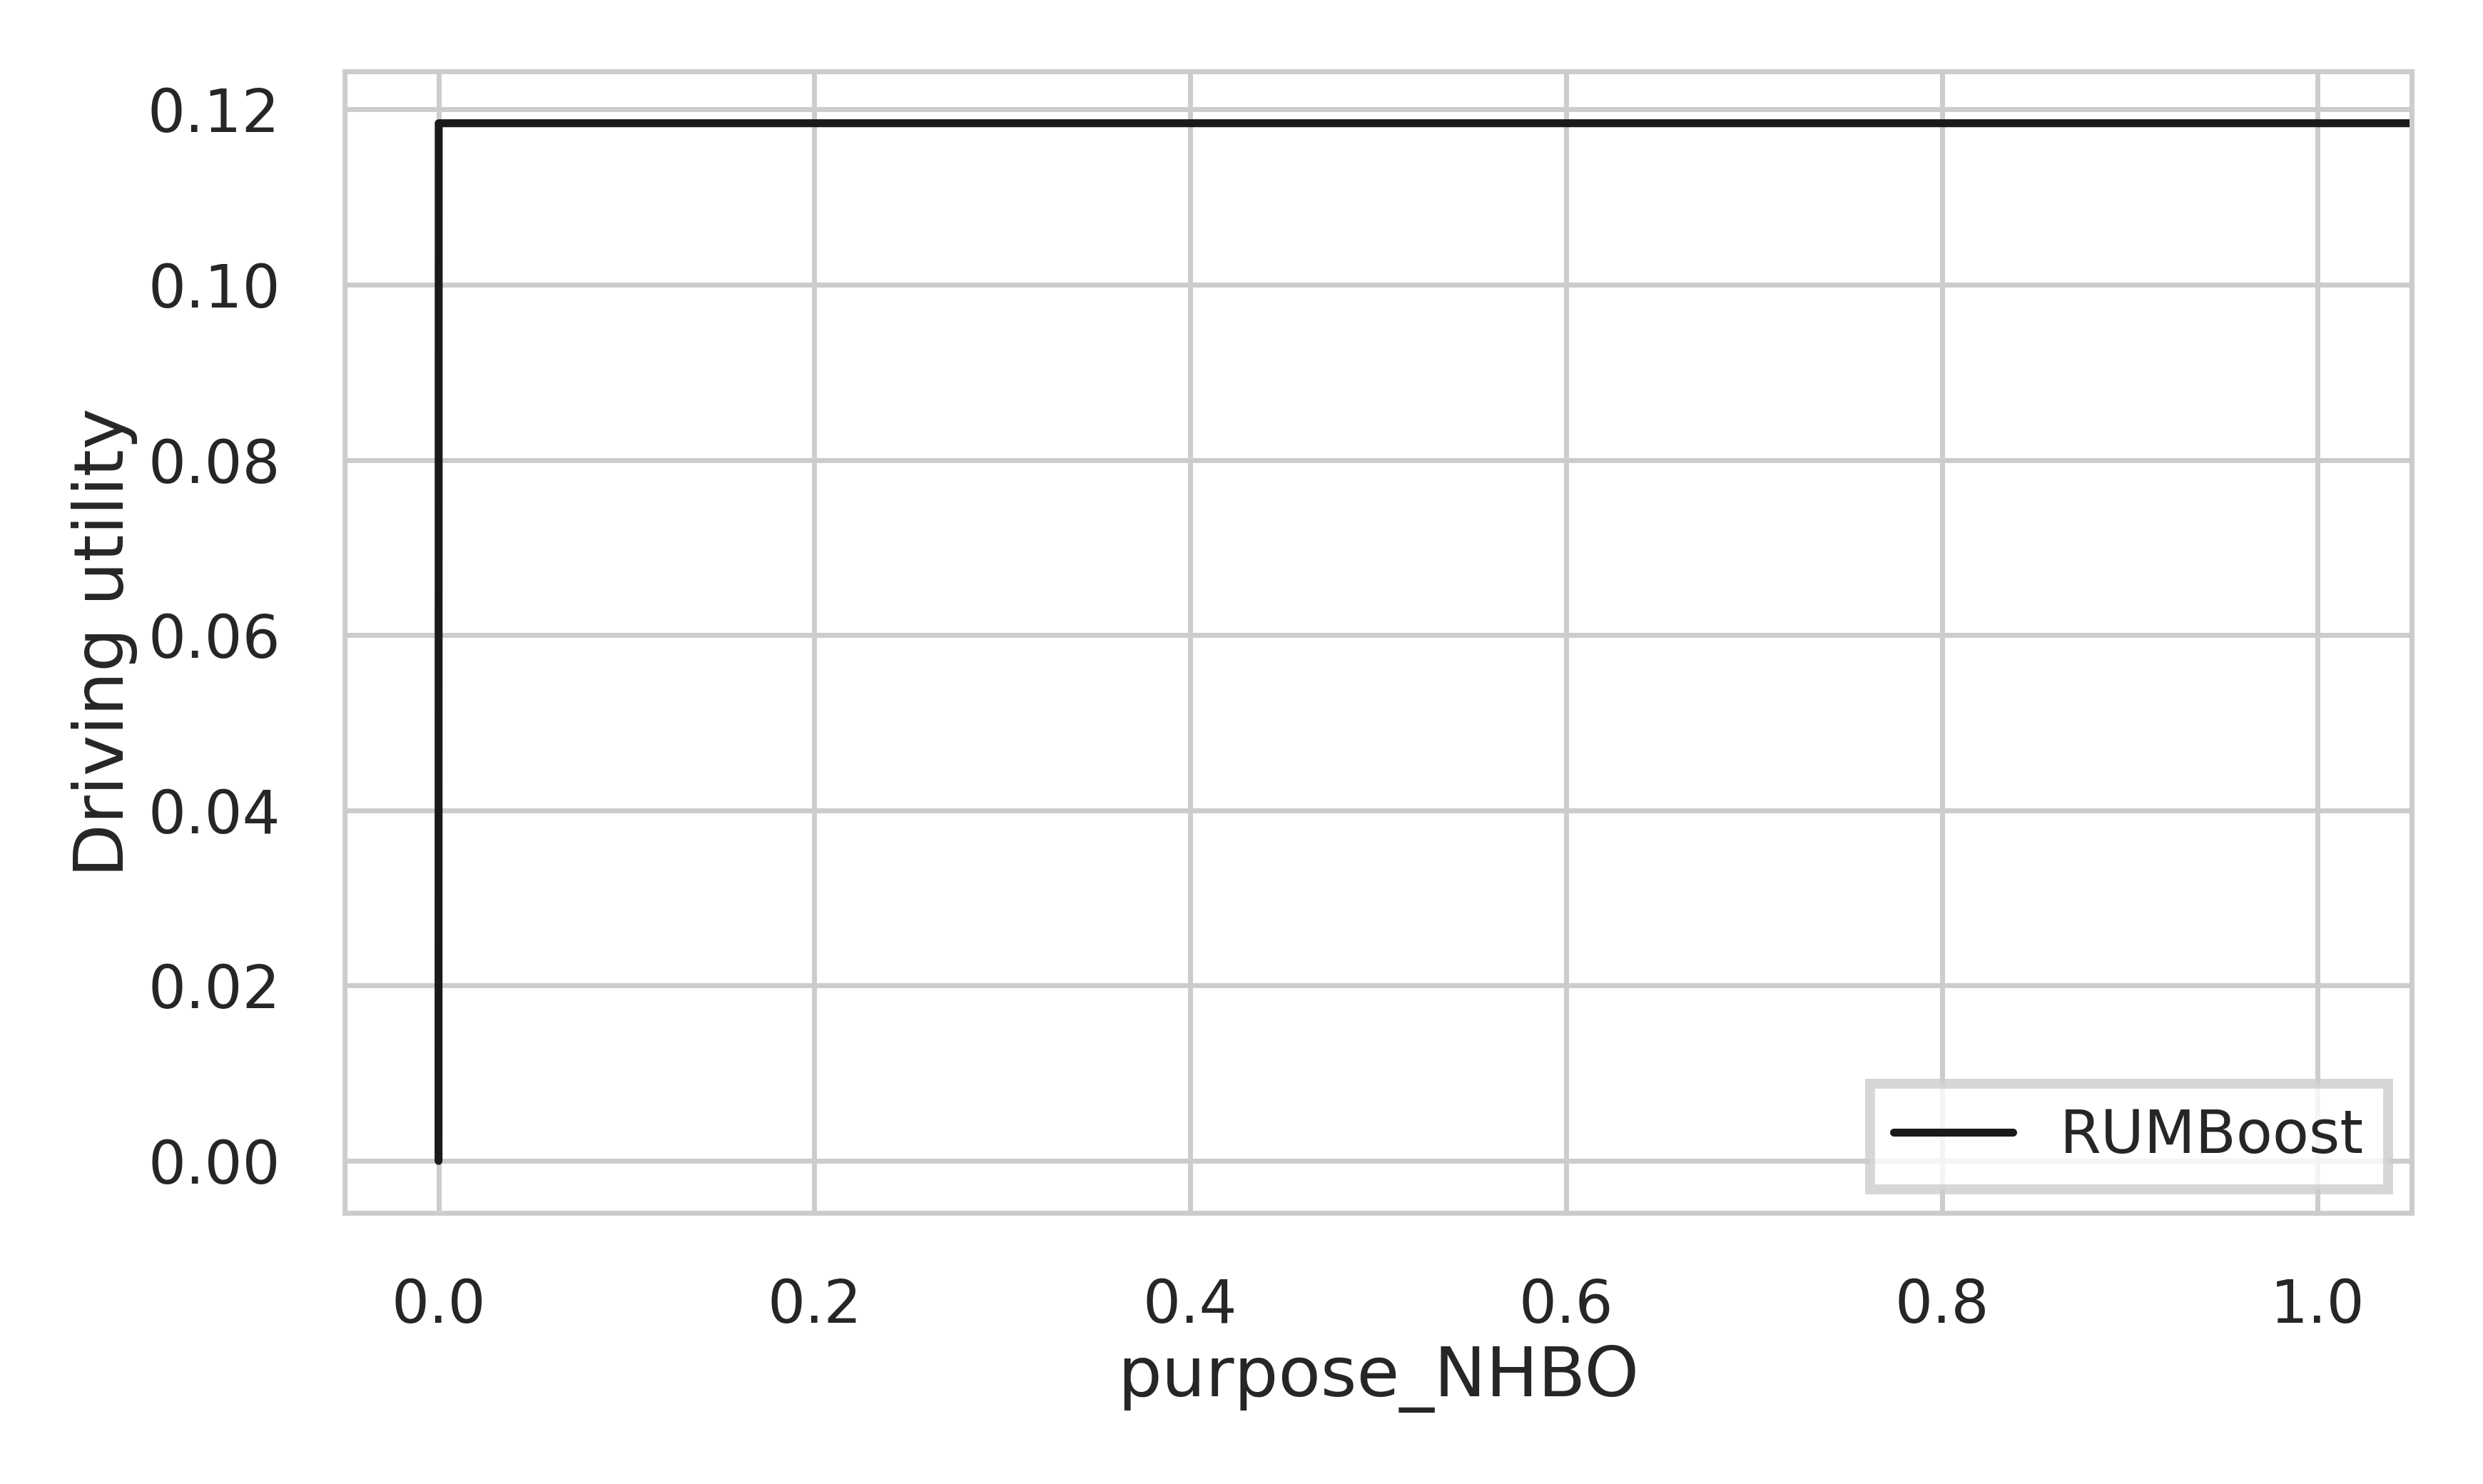

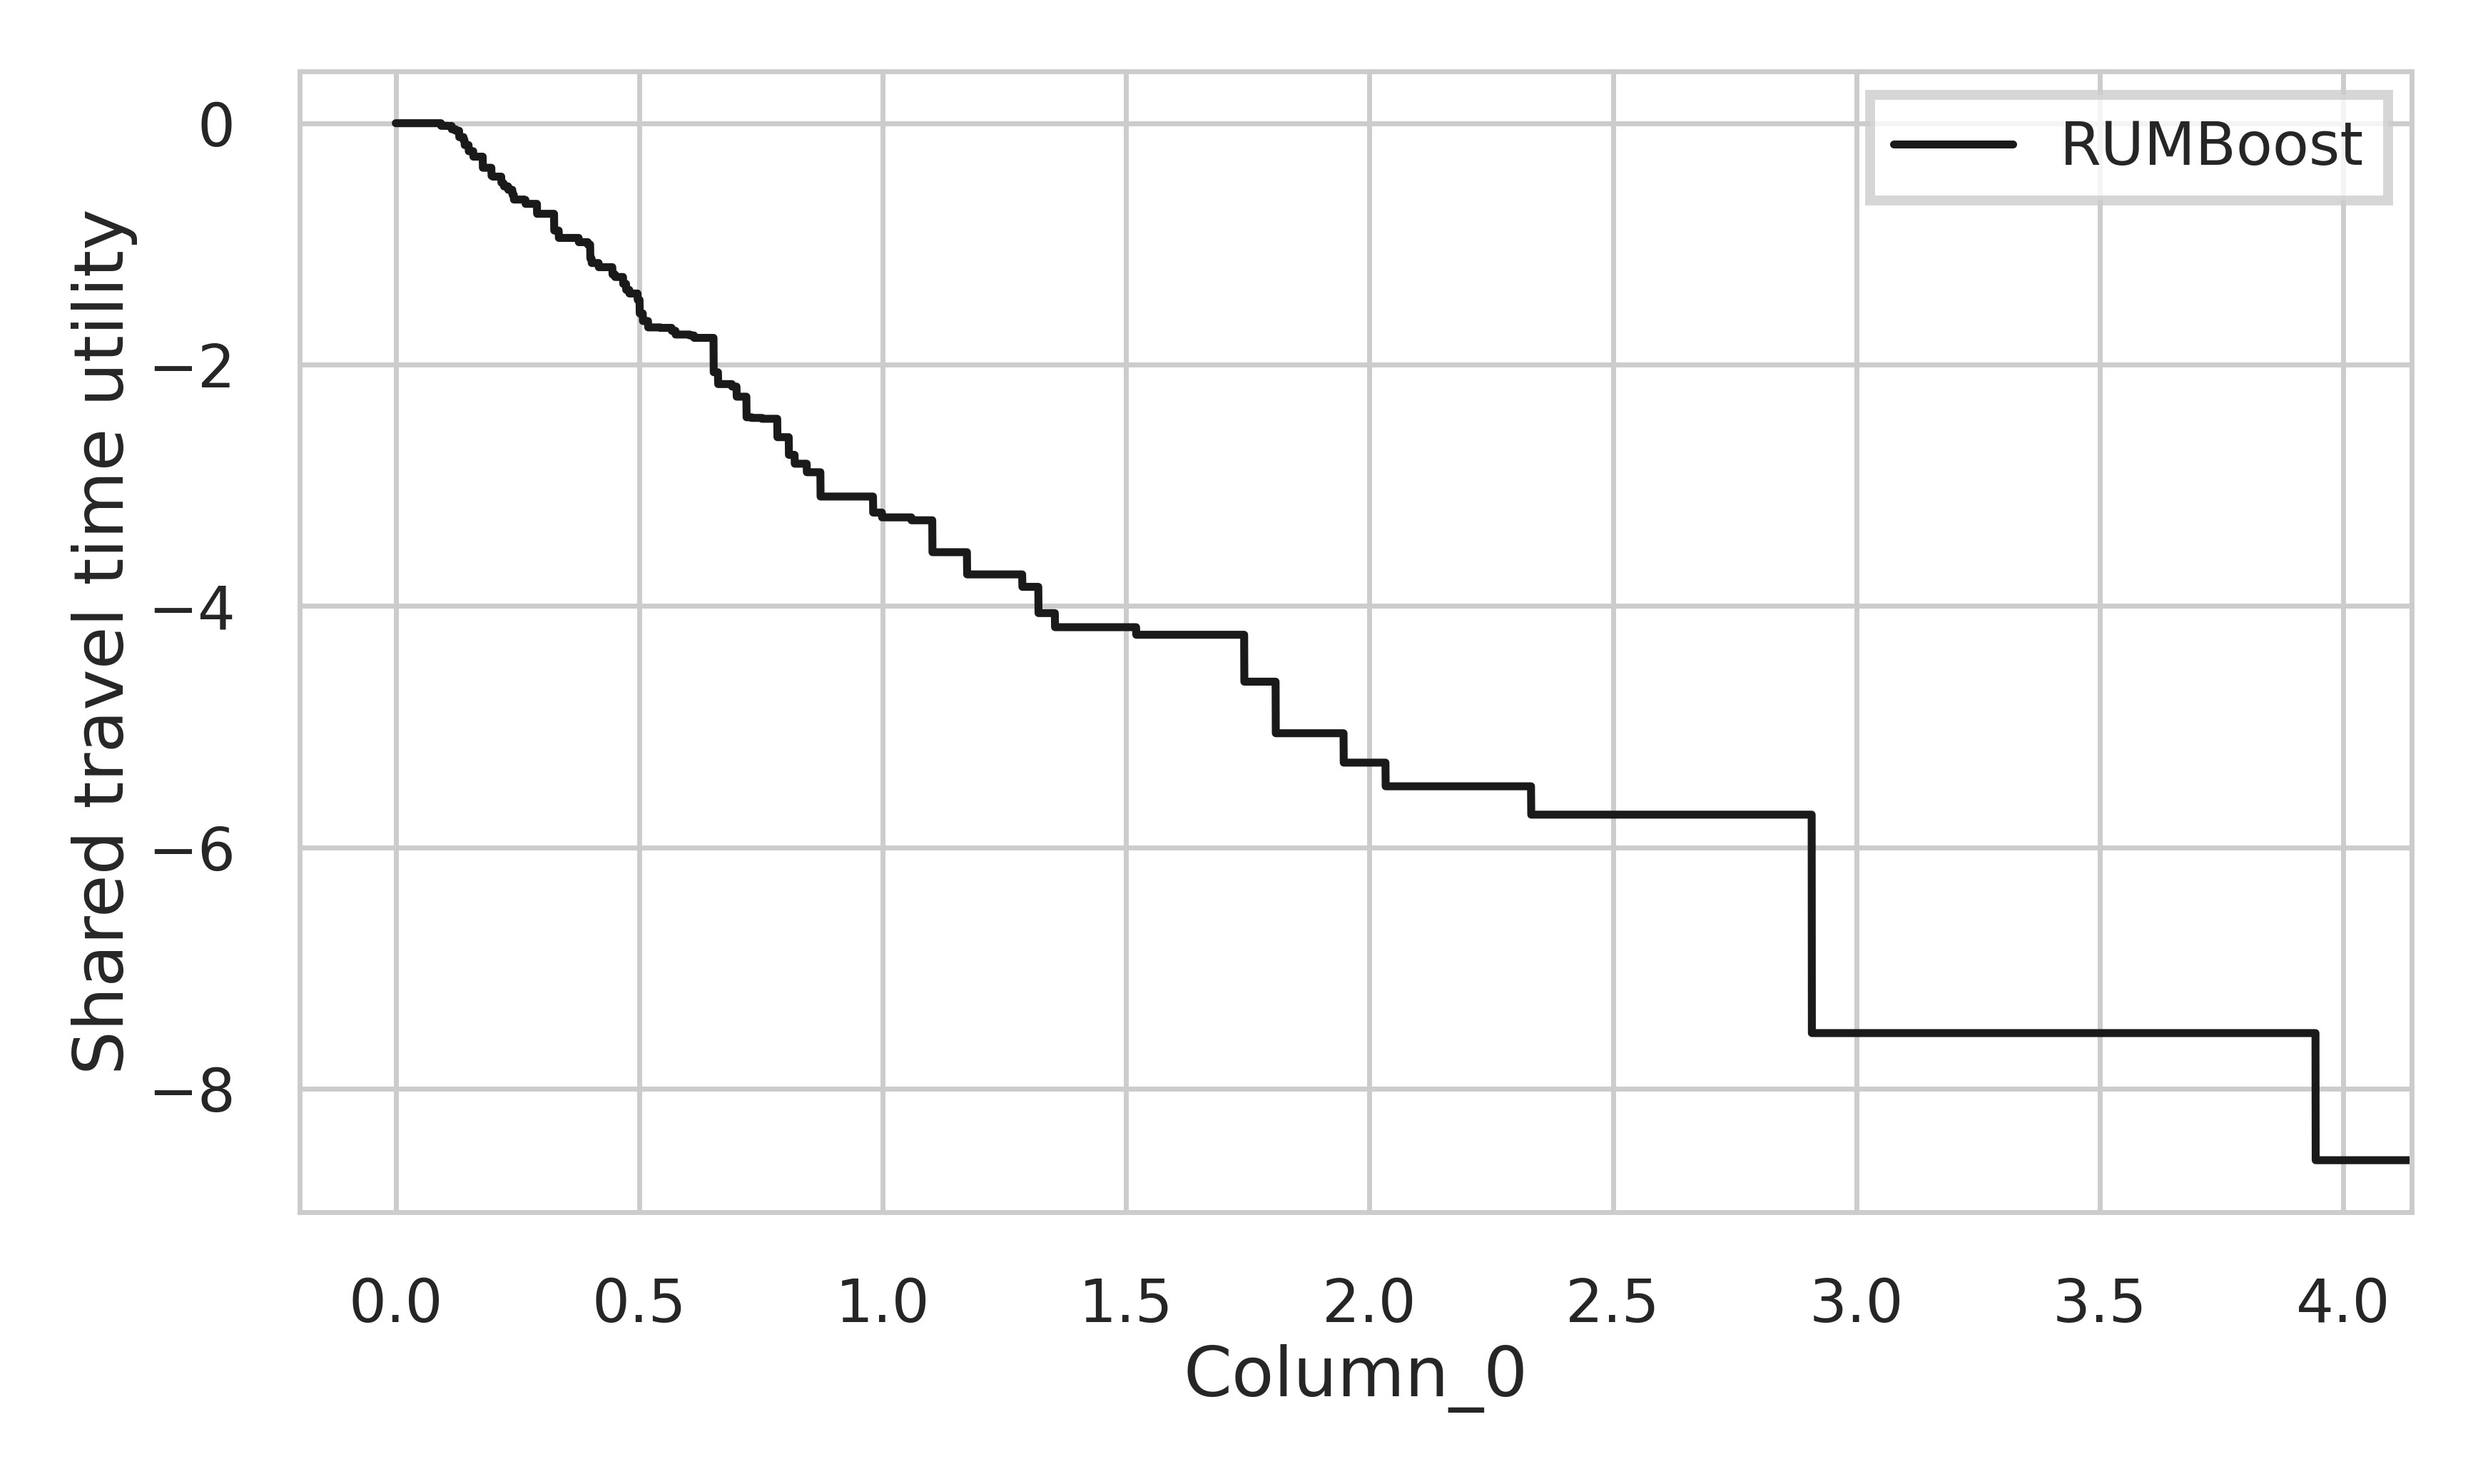

In [30]:
utility_names = {
    "0": "Walking",
    "1": "Cycling",
    "2": "Public Transport",
    "3": "Driving",
    "4": "Shared travel time",
}

plot_parameters(
    LPMCshared_model_fully_trained,
    LPMC_train,
    utility_names,
    only_1d=True,
)

# References

Salvadé, N., & Hillel, T. (2024). Rumboost: Gradient Boosted Random Utility Models. *arXiv preprint [arXiv:2401.11954](https://arxiv.org/abs/2401.11954)*

Hillel, T., Elshafie, M.Z.E.B., Jin, Y., 2018. Recreating passenger mode choice-sets for transport simulation: A case study of London, UK. Proceedings of the Institution of Civil Engineers - Smart Infrastructure and Construction 171, 29–42. https://doi.org/10.1680/jsmic.17.00018